In [48]:
from os.path import join
#PROJ = "My Drive/Capstone/"
PROJECT_PATH = "/Users/dilrajkaur/Desktop/UCEC/newdata/"

In [49]:
import numpy as np
from sklearn import linear_model
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.model_selection import RepeatedKFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plot
import pandas as pd
from sklearn import ensemble
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold 
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest,f_regression
# from sklearn.feature_selection import SelectKBest, chi2

import sys

if len(sys.argv) > 2:
  dataset_file_name = sys.argv[1]
  features_file_name = sys.argv[2]
  dataset_file_name = 'BRCA-final.csv'
  features_file_name = 'Pathways_geneset.Prrs.csv'
else:
  print ('You have entered wrong number of command line args please input first command line arg as dataset file path and second as features file path.')
  dataset_file_name = 'BRCA.csv'
  features_file_name = 'geneset2.csv'
  sys.exit(0)


In [50]:
dataset_file_name = 'UCEC-final.csv'
features_file_name = 'UCEC_genes330.csv'

In [51]:
df = pd.read_csv(join(PROJECT_PATH, dataset_file_name),low_memory=False)

In [52]:
df

bcr_patient_uuid bcr_patient_barcode  \
0    9583C10B-B21A-4863-98FA-61E735E64EA5        TCGA-2E-A9G8   
1    B43DE98D-4BB1-41A1-91F2-CE4E7EA4D0CA        TCGA-4E-A92E   
2    16AC4341-CF8F-45E2-B90B-2D12D5F74A59        TCGA-5B-A90C   
3    8751429B-4A11-451E-B978-DC9E9DB0EB36        TCGA-5S-A9Q8   
4    53707bb3-426a-43cb-830f-3eeed930295f        TCGA-A5-A0G1   
5    4abbd258-0f0c-4428-901d-625d47ad363a        TCGA-A5-A0G2   
6    8432401d-799f-4f2f-b536-e79e1e8be064        TCGA-A5-A0G3   
7    4806d9a6-e65d-4a82-b422-1b287980a0c6        TCGA-A5-A0G5   
8    45d58088-d3f4-4eb0-b75c-bcb98c0981dc        TCGA-A5-A0G9   
9    71fed998-8fac-4e6b-b38a-22c83e05e958        TCGA-A5-A0GA   
10   2f4458b6-3caf-4e33-890e-a04722badd1b        TCGA-A5-A0GB   
11   1486a031-b74d-4976-8b0b-4569e6978f49        TCGA-A5-A0GD   
12   a587e62e-430e-4f1b-82b7-6fbe856fdaf1        TCGA-A5-A0GE   
13   a8614c49-c7f1-4de9-bd2f-4764b094d604        TCGA-A5-A0GG   
14   32e33897-29c8-48f2-b833-98f37204e0e7        TCGA-A5-A0GH   
15   3b21b47e-a15c-4b10-9702-62a14afdfb8c        TCGA-A5-A0GI   
16   94817e78-78f5-4556-9394-610df65605e2        TCGA-A5-A0GJ   
17   976bb47a-d999-4e24-ad08-452fea73c846        TCGA-A5-A0GM   
18   a2a2dbda-d10c-49c4-86a8-61baf6160cda        TCGA-A5-A0GN   
19   0547cdfa-c488-4da0-9bb5-4cc63a637179        TCGA-A5-A0GP   
20   c8d672ed-9910-4f80-b222-38c833f55850        TCGA-A5-A0GQ   
21   82c51af5-4ba2-48fe-b5e2-a0f1c9d68f34        TCGA-A5-A0GR   
22   adc22472-e31d-419f-aeae-cb01b9423343        TCGA-A5-A0GU   
23   5e3b981e-73fe-4cc9-8c89-b420e8e2f426        TCGA-A5-A0GV   
24   5b6b9d0f-787c-4ae9-afd4-de7ce6c57a42        TCGA-A5-A0GW   
25   553f0ccd-4e6f-4ae2-9b39-97529eb3d826        TCGA-A5-A0GX   
26   39609d3c-f5d3-4bc4-b356-1403c6dd1cb5        TCGA-A5-A0R6   
27   02b25675-094d-4098-96da-51d121380fec        TCGA-A5-A0R7   
28   06d16b6b-9ca6-4cec-a785-f27aa4323cec        TCGA-A5-A0R8   
29   284174fd-1320-4617-9e99-75bd75df9bf3        TCGA-A5-A0R9   
..                                    ...                 ...   
511  601734DA-2D11-4745-A260-0965F58AADEA        TCGA-FI-A2F8   
512  25E7D9D6-7381-40E1-B7ED-1D8C936B7C5C        TCGA-FI-A2F9   
513  60E307DD-E11E-40BA-93C1-7E8A1F669F60        TCGA-FI-A3PV   
514  3E8E34C8-766A-4514-97F4-8000B5350AB9        TCGA-FI-A3PX   
515  FDB395E7-FF30-400D-861E-0CF2462EE390        TCGA-H5-A2HR   
516  3E41CF2F-3DE9-44C1-A819-BCE693BAF67D        TCGA-JU-AAVI   
517  D6303A05-F705-4413-8860-506A105D5B08        TCGA-K6-A3WQ   
518  1A36D5DE-A097-4323-90E9-F1B924A8A5D8        TCGA-KJ-A3U4   
519  6B35A816-F9C4-44D4-9824-5DEE4804B80D        TCGA-KP-A3VZ   
520  C9EBAEFF-6A27-4A6C-A34C-5337A3508A52        TCGA-KP-A3W0   
521  3BCE9803-E74C-462E-BD40-8EC337A66F3A        TCGA-KP-A3W1   
522  0264C9C2-6B6A-485C-98F5-AED4F52ED0CA        TCGA-KP-A3W3   
523  62DF1BD8-23A8-4E52-A483-6895B2F02494        TCGA-KP-A3W4   
524  22669A01-21D3-404C-AC19-CF0A6C03BB1D        TCGA-PG-A5BC   
525  E8C7195B-A26B-4D98-B1C5-0AA18385E9C8        TCGA-PG-A6IB   
526  4ADC20D7-5AF1-4126-9073-C7D7AE465D92        TCGA-PG-A7D5   
527  FF6B5FC8-0572-4B58-B3A5-BCDA41BADBC8        TCGA-PG-A914   
528  EA95897E-3FE0-4C79-B170-88B0F229794C        TCGA-PG-A915   
529  5EDAED6D-9914-4DF2-A843-D6009C36CBCC        TCGA-PG-A916   
530  B1B9173C-B370-4FE5-A263-C807E8A9709C        TCGA-PG-A917   
531  DF15901C-2508-42C9-BF06-026EFD89E51F        TCGA-QF-A5YS   
532  E4BCCEA0-0104-40C4-9E3C-2AD7262D918E        TCGA-QF-A5YT   
533  03381D49-E25F-4376-8E36-F47063A7D3FB        TCGA-QS-A5YQ   
534  6696CF88-3C43-482C-AABB-F1EA5CF565AA        TCGA-QS-A5YR   
535  8E8F19BD-DBAA-4738-BAD2-207F634CD63D        TCGA-QS-A744   
536  54AC877A-52FF-450C-9DF9-B7CD3FC8E2E2        TCGA-QS-A8F1   
537  3C2A6E30-A507-49F6-8B1F-36EB3AA41E60        TCGA-SJ-A6ZI   
538  FBFED398-2A44-44A9-83CF-657C29CB7D28        TCGA-SJ-A6ZJ   
539  C1F1DC90-2C67-4862-9E5F-078B861FFC6E        TCGA-SL-A6J9   
540  2A19051E-3AD1-444A-9D02-F895C26AC02C        TCGA-SL-A6J

In [53]:
df.head()
print (df.shape)

(541, 20572)


In [54]:
all_gene_set = pd.read_csv(join(PROJECT_PATH, features_file_name),header=None)

In [55]:
gene_set=pd.DataFrame()
gene_set['ALLOWED_GENES']=all_gene_set.iloc[:,0]
gene_set = gene_set.dropna()
gene_set.reset_index(drop=True)

ALLOWED_GENES
0            ACAN
1           ACOD1
2            AGER
3           ALPK1
4         ANKRD17
5            APOB
6           APPL1
7           APPL2
8           ARRB2
9           ASGR1
10          ASGR2
11           ATRN
12         ATRNL1
13           BCAN
14          BCL10
15          BIRC2
16          BIRC3
17         BPIFB1
18            BTK
19          C1QBP
20         CACTIN
21          CASP8
22           CAV1
23           CD14
24          CD163
25        CD163L1
26          CD207
27          CD209
28          CD248
29         CD300A
..            ...
301       TMPRSS4
302       TMPRSS5
303       TNFAIP3
304         TNIP1
305         TNIP2
306         TNIP3
307         TRAF3
308         TRAF6
309        TREML4
310          TRIL
311        TRIM15
312         TRIM5
313        TSPAN6
314         TYRO3
315         UBA52
316           UBB
317           UBC
318        UBE2D1
319        UBE2D2
320        UBE2D3
321         UBE2N
322        UBE2V1
323        UBQLN1
324          UFD1
325       UNC93B1
326       USP17L2
327          VCAN
328         WDFY1
329          XIAP
330        ZCCHC3

[331 rows x 1 columns]

gene_type = input ("\nEnter gene type:\n1. CTL\n2. NLR\n3. SR\n4. TLR\n5. SR_d\n6. ALL\n\n")

if int(gene_type) == 1:
  gene_set = pd.DataFrame({"ALLOWED_GENES": all_gene_set['CTL']})
elif int(gene_type) == 2:
  gene_set = pd.DataFrame({"ALLOWED_GENES": all_gene_set['NLR']})
elif int(gene_type) == 3:
  gene_set = pd.DataFrame({"ALLOWED_GENES": all_gene_set['SR']})
elif int(gene_type) == 4:
  gene_set = pd.DataFrame({"ALLOWED_GENES": all_gene_set['TLR']})
elif int(gene_type) == 5:
  gene_set = pd.DataFrame({"ALLOWED_GENES": all_gene_set['SR_d']})
elif int(gene_type) == 6:
  gene_set = pd.DataFrame({"ALLOWED_GENES": all_gene_set['ALL']})
  
gene_set = gene_set.dropna()
gene_set.reset_index(drop=True)

In [56]:
print(gene_set.head())
print(gene_set.shape)


  ALLOWED_GENES
0          ACAN
1         ACOD1
2          AGER
3         ALPK1
4       ANKRD17
(331, 1)


In [57]:
# for index, rows in gene_set.iterrows():
#   print (rows['ALLOWED_GENES'])

In [58]:
output_df = pd.DataFrame(columns=['bcr_patient_barcode', 'vital_status', 'OS.time_ACTUAL'])
final_df = pd.DataFrame(columns=['bcr_patient_barcode', 'vital_status'])
final_df['bcr_patient_barcode'] = df.loc[:,'bcr_patient_barcode']
final_df['vital_status'] = df.loc[:,'vital_status']


In [59]:
final_df.head()

bcr_patient_barcode  vital_status
0        TCGA-2E-A9G8             0
1        TCGA-4E-A92E             0
2        TCGA-5B-A90C             0
3        TCGA-5S-A9Q8             0
4        TCGA-A5-A0G1             1

In [60]:
missing_gene_df = pd.DataFrame(columns=['missing_genes'])

In [61]:
missing_gene_df

Empty DataFrame
Columns: [missing_genes]
Index: []

In [62]:
count_genes = 0
for index, rows in gene_set.iterrows():
  if (rows['ALLOWED_GENES'] in df.iloc[0, :]):
    #print(df.loc[:, rows['ALLOWED_GENES']])
    final_df[rows['ALLOWED_GENES']] = df.loc[:, rows['ALLOWED_GENES']]
    count_genes += 1
  else:
    #print(rows['ALLOWED_GENES'])
    missing_gene_df = missing_gene_df.append({'missing_genes' : rows['ALLOWED_GENES']}, ignore_index = True)

In [63]:
final_df['OS.time'] = df.loc[:,'OS.time']

In [64]:
#missing_gene_df.head()
missing_gene_df = missing_gene_df.dropna()
if len(missing_gene_df) > 0:
  print(f'Missing Genes:\n{missing_gene_df}')

Missing Genes:
   missing_genes
0          ACOD1
1         BPIFB1
2         CACTIN
3        CLEC19A
4        CLEC20A
5           CTSL
6          ERBIN
7          INAVA
8          KLRF2
9        MIR146A
10       MIR146B
11         MIR17
12        MIR19A
13        NLRP2B
14       NLRP3P1
15       NLRP9P1
16         NOP53
17        OTULIN
18         RAB7B
19        SCART1
20         SSC4D
21          TKFC
22          UFD1


In [17]:
final_df.head()
# count_genes

bcr_patient_barcode  vital_status  CLEC1B  CLEC3A      IRF7        CTSB  \
0        TCGA-2E-A9G8             0     0.0  0.4554  728.5974  77626.1384   
1        TCGA-4E-A92E             0     0.0  0.0000  909.7804  12549.0221   
2        TCGA-5B-A90C             0     0.0  0.0000  886.4028  37660.9294   
3        TCGA-5S-A9Q8             0     0.0  2.2263  353.2468   9659.3692   
4        TCGA-A5-A0G1             1     0.0  0.0000  731.6783  38601.7875   

      FCN1      RIPK2  NLRP10    NLRP9     SARM1  OS.time  
0  26.8670  1217.2131     0.0   8.6521  459.7587     1065  
1   2.8470  1875.2358     0.0   3.7960  498.7691        0  
2   1.7212   664.3718     0.0  37.8657  448.4509      883  
3   7.0501   375.1391     0.0  10.7607  300.7421       33  
4  12.7110  1076.4647     0.0   3.1778   47.0149     3251

In [65]:
final_df.shape

(541, 311)

In [66]:
# ...........SHUFFLING................
# final_df = final_df.sample(frac=1).reset_index(drop=True)
# ...........END_OF_SHUFFLING.........

X = final_df.loc[:, final_df.columns != 'OS.time']
Y = final_df.loc[:, 'OS.time']
X = X.loc[:,X.columns != 'bcr_patient_barcode']
X = X.loc[:,X.columns != 'vital_status']

Xallfeature = X
Yallfeature = Y

In [67]:
# xTrain, xTest, yTrain, yTest = train_test_split(X, Y, test_size = 1/5, random_state = 0)
features=len(X.columns)
print(features)


308


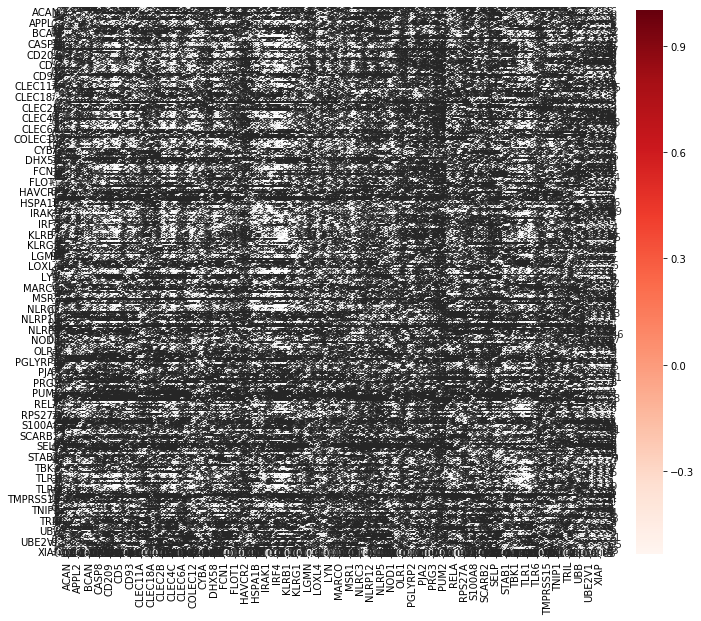

In [68]:
plt.figure(figsize=(12,10))
Xdf=pd.DataFrame(X)
cor = Xdf.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

CLEC1B    CLEC3A      IRF7      CTSB      FCN1     RIPK2    NLRP10  \
CLEC1B  1.000000  0.064615  0.056365  0.090776  0.223147  0.045982 -0.000090   
CLEC3A  0.064615  1.000000 -0.019814 -0.003821 -0.015857 -0.071558  0.054971   
IRF7    0.056365 -0.019814  1.000000  0.032035  0.093340 -0.035173  0.003628   
CTSB    0.090776 -0.003821  0.032035  1.000000  0.196528  0.028435 -0.059824   
FCN1    0.223147 -0.015857  0.093340  0.196528  1.000000 -0.016784  0.019770   
RIPK2   0.045982 -0.071558 -0.035173  0.028435 -0.016784  1.000000 -0.061757   
NLRP10 -0.000090  0.054971  0.003628 -0.059824  0.019770 -0.061757  1.000000   
NLRP9  -0.035729 -0.033035  0.108142 -0.134655 -0.036739  0.030344  0.281842   
SARM1  -0.019679  0.084944  0.038233 -0.052370 -0.038362 -0.228501  0.016078   

           NLRP9     SARM1  
CLEC1B -0.035729 -0.019679  
CLEC3A -0.033035  0.084944  
IRF7    0.108142  0.038233  
CTSB   -0.134655 -0.052370  
FCN1   -0.036739 -0.038362  
RIPK2   0.030344 -0.228501  
NLRP10  0.281842  0.016078  
NLRP9   1.000000  0.150606  
SARM1   0.150606  1.000000

In [23]:
stats_header_list=[]
stats_header =['Model','MAE','RMSE']
stats_header_list.append(stats_header)

In [24]:
parameterlist=[]

In [25]:
a = input("Enter\n1 for Linear Regression \n2 for Lasso Regression \n3 for Ridge Regression \n4 for SVR \n5 for Random Forest \n6 for LassoLars \n7 for Elastic Net \n8 for KNN\n9 for All\n\n")


Enter
1 for Linear Regression 
2 for Lasso Regression 
3 for Ridge Regression 
4 for SVR 
5 for Random Forest 
6 for LassoLars 
7 for Elastic Net 
8 for KNN
9 for All

9


In [26]:
feature_input = input("***FEATURE SELECTION***\n1. SelectKBest \n2. SelectFromModel\n3. Tree-Based\n4. No Feature Selection\n\n")

***FEATURE SELECTION***
1. SelectKBest 
2. SelectFromModel
3. Tree-Based
4. No Feature Selection

4


In [27]:
from sklearn.ensemble import ExtraTreesRegressor

if (int(feature_input) == 1):
  Xafterfeatureselect = SelectKBest(f_regression, k=int(features/2)).fit_transform(Xallfeature, Yallfeature)
  X=Xafterfeatureselect
  X=pd.DataFrame(X)

elif(int(feature_input) == 3):

  forest = ExtraTreesRegressor(n_estimators=250, random_state=0)
  forest.fit(Xallfeature, Yallfeature)
  importances = forest.feature_importances_

  std = np.std([tree.feature_importances_ for tree in forest.estimators_],
              axis=0)
  indices = np.argsort(importances)[::-1]

  # Selecting top n/2 features using tree based feature selection
  top_features_count = (int)(indices.size/2)
  # print (top_features_count)
  # print (indices[ 0 : top_features_count], '\n\n')
  X = Xallfeature.iloc[:, indices[0:top_features_count]]
  # print (X)

  # Print the feature ranking
  print("Feature ranking:")
  for f in range(Xallfeature.shape[1]):
      print("%d. Feature %d (%s): %f" % (f + 1, indices[f], Xallfeature.columns[indices[f]], importances[indices[f]]))
    

  # Plot the feature importances of the forest
  plt.figure(figsize=(20, 5))
  plt.title("Feature importances")
  plt.bar(range(Xallfeature.shape[1]), importances[indices],color="r", yerr=std[indices], align="center")
  plt.xticks(range(Xallfeature.shape[1]), indices)
  plt.xlim([-1, Xallfeature.shape[1]])
  plt.show()

elif (int(feature_input) == 4):
  X = Xallfeature



**LINEAR REGRESSION**

In [28]:
if ((int(a)==1) or (int(a)==9)) :
  if (int(feature_input)==2):
      selector = SelectFromModel(estimator=LinearRegression()).fit(Xallfeature, Yallfeature)
      Xafterfeatureselect=selector.transform(Xallfeature)
      X=pd.DataFrame(Xafterfeatureselect)

  tuned_parameters = {                   
                      'fit_intercept':[True, False],
                      'normalize':[True, False],
                      'copy_X' :[True, False],
                       'n_jobs':[-1],
                   }
  reg = GridSearchCV(LinearRegression(), tuned_parameters, n_jobs = -1, verbose = 3, scoring = 'explained_variance', cv = 5)
  reg.fit(X, Y)
  
  # output_df = pd.DataFrame(columns=['bcr_patient_barcode', 'vital_status', 'OS.time_ACTUAL'])
  
  param_dict = reg.best_params_
#   print ('Best Param', param_dict)
  fit_intercept = param_dict['fit_intercept']
  normalize = param_dict['normalize']
  copy_X = param_dict['copy_X']
  n_jobs = param_dict['n_jobs']
  mae = []
  rmse = []
  pred_list = list()
  temp_df_large = pd.DataFrame()



  
  rkf = KFold(n_splits=5)
  for train_index, test_index in rkf.split(X):
    xTrain, xTest = X.iloc[train_index], X.iloc[test_index]
    pidTrain, pidTest = df.iloc[train_index], df.iloc[test_index]
    yTrain, yTest = Y.iloc[train_index], Y.iloc[test_index]
    
    linearRegressor = LinearRegression( normalize= normalize , copy_X= copy_X , n_jobs=n_jobs, fit_intercept=fit_intercept)
    linearRegressor.fit(xTrain, yTrain)
    predictions = reg.predict (xTest)
    print ("Prediction Shape: ", predictions.shape)
    
    temp_df = pd.DataFrame({"bcr_patient_barcode": pidTest['bcr_patient_barcode'], "vital_status": pidTest['vital_status'], "OS.time_ACTUAL": pidTest['OS.time'], "OS.time_Linear": predictions})
    
    temp_df_large = temp_df_large.append(temp_df, ignore_index = True)
    
    if pred_list == []:
      pred_list = list(predictions)
    else:
      pred_list.extend(predictions)
        
    mae.append(metrics.mean_absolute_error(yTest,predictions))
    rmse.append(np.sqrt(metrics.mean_squared_error(yTest,predictions)))
  
  if output_df.empty:
    output_df = output_df.append(temp_df_large, ignore_index=True)
    print ('.......SHAPE.....1.....', temp_df_large.shape)
  else:
    output_df['OS.time_Linear'] = pd.Series(pred_list)
    print ('.......SHAPE.....2.....', output_df.shape)

  av_mae=sum(mae) / len(mae)
  av_rmse =  sum(rmse) / len(rmse)
  linear_regression_list= ['Linear Regression ',av_mae,av_rmse]
  stats_header_list.append(linear_regression_list)
  linear_regression_bestpm_header=['Linear Regression ','fit_intercept','normalize','copy_X','n_jobs']
  linear_regression_bestpm_list=['Linear Regression ',fit_intercept,normalize,copy_X,n_jobs]
  parameterlist.append(linear_regression_bestpm_header)
  parameterlist.append(linear_regression_bestpm_list)
  print('MAE',mae)
  print ('* Average MAE: ',av_mae )
  print('RMSE',rmse)
  print ('* Average RMSE: ',av_rmse)
  
  
 
  
  
  

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] copy_X=True, fit_intercept=True, n_jobs=-1, normalize=True ......
[CV] copy_X=True, fit_intercept=True, n_jobs=-1, normalize=True ......
[CV] copy_X=True, fit_intercept=True, n_jobs=-1, normalize=True ......
[CV] copy_X=True, fit_intercept=True, n_jobs=-1, normalize=True ......
[CV]  copy_X=True, fit_intercept=True, n_jobs=-1, normalize=True, score=-0.06290376898897954, total=   0.1s
[CV]  copy_X=True, fit_intercept=True, n_jobs=-1, normalize=True, score=0.0013996966251290655, total=   0.1s
[CV]  copy_X=True, fit_intercept=True, n_jobs=-1, normalize=True, score=0.0017066428117631371, total=   0.1s
[CV]  copy_X=True, fit_intercept=True, n_jobs=-1, normalize=True, score=0.02850074550382986, total=   0.2s
[CV] copy_X=True, fit_intercept=True, n_jobs=-1, normalize=True ......
[CV] copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False .....
[CV] copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False .....
[CV] copy_

[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.7s finished


Prediction Shape:  (109,)
Prediction Shape:  (108,)
Prediction Shape:  (108,)
Prediction Shape:  (108,)
Prediction Shape:  (108,)
.......SHAPE.....1..... (541, 4)
MAE [699.4783535426182, 594.2854101527854, 595.684961511982, 468.4530297322138, 400.99243760538127]
* Average MAE:  551.7788385089962
RMSE [905.5558566162152, 808.38021050902, 870.2821701949377, 571.6913857264167, 469.3088051292598]
* Average RMSE:  725.0436856351699


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)


**LASSO REGRESSION**

In [29]:
if ((int(a)==2) or (int(a)==9)):
  if (int(feature_input)==2):
      selector = SelectFromModel(estimator=linear_model.Lasso()).fit(Xallfeature, Yallfeature)
      Xafterfeatureselect=selector.transform(Xallfeature)
      X=pd.DataFrame(Xafterfeatureselect)
  tuned_parameters = {
                   
     'alpha': [0.001, 0.01, 0.1, 1, 10],
     'fit_intercept': [True, False],
     'normalize': [True, False], 
     'precompute': [True, False], 
     'copy_X': [True, False], 
     'max_iter':[100,1000],
     'tol':[0.0001,0.001,0.01], 
     'warm_start' :[True, False], 
     'positive': [True, False], 
     'random_state':[1,2], 

                       }
  reg = GridSearchCV(linear_model.Lasso(), tuned_parameters, n_jobs = -1, verbose = 3, cv = 5)
  reg.fit(X, Y)
  param_dict = reg.best_params_
  
  # output_df = pd.DataFrame(columns=['bcr_patient_barcode', 'vital_status', 'OS.time_ACTUAL', 'OS.time_PREDICTED'])

#   print ('Best Param', param_dict)
  fit_intercept = param_dict['fit_intercept']
  normalize = param_dict['normalize']
  precompute = param_dict['precompute']
  copy_X = param_dict['copy_X']
  max_iter = param_dict['max_iter']
  tol = param_dict['tol']
  warm_start = param_dict['warm_start']
  positive = param_dict['positive']
  random_state = param_dict['random_state']
  alpha = param_dict['alpha']
  mae = []
  rmse = []
  pred_list = list()
  temp_df_large = pd.DataFrame()
  rkf = KFold(n_splits=5)
  for train_index, test_index in rkf.split(X):
    xTrain, xTest = X.iloc[train_index], X.iloc[test_index]
    pidTrain, pidTest = df.iloc[train_index], df.iloc[test_index]
    yTrain, yTest = Y.iloc[train_index], Y.iloc[test_index]

    reg = linear_model.Lasso(alpha=alpha ,fit_intercept = fit_intercept , normalize = normalize , precompute = precompute ,copy_X =copy_X ,max_iter = max_iter ,tol= tol ,warm_start= warm_start ,positive= positive ,random_state = random_state )
    reg.fit(xTrain, yTrain)
    predictions = reg.predict (xTest)
    
    temp_df = pd.DataFrame({"bcr_patient_barcode": pidTest['bcr_patient_barcode'], "vital_status": pidTest['vital_status'], "OS.time_ACTUAL": pidTest['OS.time'], "OS.time_Lasso": predictions})
    
    temp_df_large = temp_df_large.append(temp_df, ignore_index = True)
    
    if pred_list == []:
      pred_list = list(predictions)
    else:
      pred_list.extend(predictions)
        
    mae.append(metrics.mean_absolute_error(yTest,predictions))
    rmse.append(np.sqrt(metrics.mean_squared_error(yTest,predictions)))
  
  if output_df.empty:
    output_df = output_df.append(temp_df_large, ignore_index=True)
  else:
    output_df['OS.time_Lasso'] = pd.Series(pred_list)
    
  av_mae=sum(mae) / len(mae)
  av_rmse =  sum(rmse) / len(rmse)
  lasso_regression_list= ['Lasso Regression ',av_mae,av_rmse]
  stats_header_list.append(lasso_regression_list)
  lasso_regression_bestpm_header=['Lasso Regression ','fit_intercept','normalize','copy_X','precompute','max_iter','tol','warm_start','positive','random_state']
  lasso_regression_bestpm_list=['Lasso Regression',fit_intercept,normalize,copy_X,precompute,max_iter,tol,warm_start,positive,random_state]
  parameterlist.append(lasso_regression_bestpm_header)
  parameterlist.append(lasso_regression_bestpm_list)
  print('MAE',mae)
  print ('* Average MAE: ',av_mae )
  print('RMSE',rmse)
  print ('* Average RMSE: ',av_rmse)
 
  
 
  
  

Fitting 5 folds for each of 3840 candidates, totalling 19200 fits
[CV] alpha=0.001, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=True, precompute=True, random_state=1, tol=0.0001, warm_start=True 
[CV] alpha=0.001, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=True, precompute=True, random_state=1, tol=0.0001, warm_start=True 
[CV] alpha=0.001, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=True, precompute=True, random_state=1, tol=0.0001, warm_start=True 
[CV] alpha=0.001, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=True, precompute=True, random_state=1, tol=0.0001, warm_start=True 
[CV]  alpha=0.001, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=True, precompute=True, random_state=1, tol=0.0001, warm_start=True, score=0.02620290546025716, total=   0.1s
[CV]  alpha=0.001, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=True, preco

[CV]  alpha=0.001, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=True, precompute=True, random_state=1, tol=0.001, warm_start=True, score=-0.8088886563518214, total=   0.0s
[CV] alpha=0.001, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=True, precompute=True, random_state=1, tol=0.001, warm_start=False 
[CV]  alpha=0.001, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=True, precompute=True, random_state=1, tol=0.01, warm_start=True, score=-0.012831039309741277, total=   0.0s
[CV] alpha=0.001, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=True, precompute=True, random_state=1, tol=0.01, warm_start=True 
[CV]  alpha=0.001, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=True, precompute=True, random_state=2, tol=0.001, warm_start=True, score=-0.012831852347741535, total=   0.0s
[CV]  alpha=0.001, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, posi

[CV]  alpha=0.001, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=True, precompute=True, random_state=2, tol=0.0001, warm_start=False, score=-0.012831933638356439, total=   0.0s
[CV]  alpha=0.001, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=True, precompute=True, random_state=2, tol=0.01, warm_start=False, score=-0.012831039309741277, total=   0.0s
[CV] alpha=0.001, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=True, precompute=True, random_state=2, tol=0.0001, warm_start=False 
[CV] alpha=0.001, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=True, precompute=True, random_state=2, tol=0.01, warm_start=False 
[CV]  alpha=0.001, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=True, precompute=True, random_state=2, tol=0.001, warm_start=False, score=-0.012831852347741535, total=   0.0s
[CV] alpha=0.001, copy_X=True, fit_intercept=True, max_iter=100, normalize=Tru

[CV] alpha=0.001, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=True, precompute=False, random_state=2, tol=0.0001, warm_start=True 
[CV] alpha=0.001, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=True, precompute=False, random_state=1, tol=0.01, warm_start=True 
[CV]  alpha=0.001, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=True, precompute=False, random_state=1, tol=0.001, warm_start=True, score=-0.22487582995517164, total=   0.0s
[CV]  alpha=0.001, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=True, precompute=False, random_state=1, tol=0.0001, warm_start=True, score=-0.8088853226304025, total=   0.0s
[CV] alpha=0.001, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=True, precompute=False, random_state=1, tol=0.0001, warm_start=False 
[CV] alpha=0.001, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=True, precompute=False, random_s

[CV] alpha=0.001, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=True, precompute=False, random_state=1, tol=0.001, warm_start=True 
[CV] alpha=0.001, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=True, precompute=False, random_state=2, tol=0.0001, warm_start=False 
[CV]  alpha=0.001, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=True, precompute=False, random_state=1, tol=0.001, warm_start=False, score=-0.22487582995517164, total=   0.0s
[CV] alpha=0.001, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=True, precompute=False, random_state=1, tol=0.001, warm_start=False 
[CV]  alpha=0.001, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=True, precompute=False, random_state=2, tol=0.0001, warm_start=False, score=-0.22487451428413507, total=   0.0s
[CV] alpha=0.001, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=True, precompute=False, rand

[CV]  alpha=0.001, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=False, precompute=True, random_state=1, tol=0.001, warm_start=True, score=-0.19388653704433056, total=   0.0s
[CV]  alpha=0.001, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=False, precompute=True, random_state=1, tol=0.0001, warm_start=True, score=-0.19388653704433056, total=   0.0s
[CV] alpha=0.001, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=False, precompute=True, random_state=1, tol=0.001, warm_start=True 
[CV] alpha=0.001, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=False, precompute=True, random_state=1, tol=0.0001, warm_start=True 
[CV]  alpha=0.001, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=False, precompute=True, random_state=1, tol=0.001, warm_start=True, score=-0.8754307678542737, total=   0.0s
[CV] alpha=0.001, copy_X=True, fit_intercept=True, max_iter=100, normalize=True,

[CV] alpha=0.001, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=False, precompute=True, random_state=1, tol=0.01, warm_start=True 
[CV] alpha=0.001, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=False, precompute=True, random_state=2, tol=0.0001, warm_start=True 
[CV]  alpha=0.001, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=False, precompute=True, random_state=1, tol=0.001, warm_start=False, score=-0.8754307678542737, total=   0.0s
[CV] alpha=0.001, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=False, precompute=True, random_state=1, tol=0.01, warm_start=True 
[CV]  alpha=0.001, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=False, precompute=True, random_state=2, tol=0.0001, warm_start=True, score=-0.04329526898315095, total=   0.0s
[CV] alpha=0.001, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=False, precompute=True, random_sta

[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    1.1s


[CV]  alpha=0.001, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=False, precompute=True, random_state=2, tol=0.0001, warm_start=False, score=0.02565349799076211, total=   0.0s
[CV]  alpha=0.001, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=False, precompute=True, random_state=2, tol=0.001, warm_start=False, score=0.025653683142102587, total=   0.0s
[CV] alpha=0.001, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=False, precompute=True, random_state=2, tol=0.0001, warm_start=False 
[CV]  alpha=0.001, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=False, precompute=True, random_state=2, tol=0.01, warm_start=True, score=-0.1938867053742277, total=   0.0s
[CV] alpha=0.001, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=False, precompute=True, random_state=2, tol=0.001, warm_start=False 
[CV] alpha=0.001, copy_X=True, fit_intercept=True, max_iter=100, normalize=Tru

[CV] alpha=0.001, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=False, precompute=False, random_state=1, tol=0.0001, warm_start=False 
[CV] alpha=0.001, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=False, precompute=True, random_state=2, tol=0.001, warm_start=False 
[CV]  alpha=0.001, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=False, precompute=True, random_state=2, tol=0.01, warm_start=False, score=-0.04329584993896707, total=   0.0s
[CV] alpha=0.001, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=False, precompute=True, random_state=2, tol=0.01, warm_start=False 
[CV]  alpha=0.001, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=False, precompute=True, random_state=2, tol=0.001, warm_start=False, score=-0.8754307678542737, total=   0.0s
[CV] alpha=0.001, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=False, precompute=True, random

[CV]  alpha=0.001, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=False, precompute=False, random_state=1, tol=0.001, warm_start=False, score=-0.1352213766484598, total=   0.0s
[CV]  alpha=0.001, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=False, precompute=False, random_state=1, tol=0.0001, warm_start=False, score=-0.8754234300939527, total=   0.0s
[CV] alpha=0.001, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=False, precompute=False, random_state=1, tol=0.001, warm_start=False 
[CV] alpha=0.001, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=False, precompute=False, random_state=1, tol=0.001, warm_start=True 
[CV]  alpha=0.001, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=False, precompute=False, random_state=1, tol=0.001, warm_start=False, score=-0.04329531647119356, total=   0.0s
[CV]  alpha=0.001, copy_X=True, fit_intercept=True, max_iter=100, normali

[CV] alpha=0.001, copy_X=True, fit_intercept=True, max_iter=100, normalize=False, positive=True, precompute=True, random_state=1, tol=0.0001, warm_start=True 
[CV]  alpha=0.001, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=False, precompute=False, random_state=2, tol=0.0001, warm_start=False, score=-0.8754234300939527, total=   0.0s
[CV] alpha=0.001, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=False, precompute=False, random_state=2, tol=0.001, warm_start=True 
[CV]  alpha=0.001, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=False, precompute=False, random_state=2, tol=0.001, warm_start=True, score=0.025653683142102587, total=   0.0s
[CV] alpha=0.001, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=False, precompute=False, random_state=2, tol=0.001, warm_start=True 
[CV]  alpha=0.001, copy_X=True, fit_intercept=True, max_iter=100, normalize=False, positive=True, precompute=True, ran

[CV] alpha=0.001, copy_X=True, fit_intercept=True, max_iter=100, normalize=False, positive=True, precompute=True, random_state=1, tol=0.001, warm_start=True 
[CV] alpha=0.001, copy_X=True, fit_intercept=True, max_iter=100, normalize=False, positive=True, precompute=True, random_state=1, tol=0.01, warm_start=True 
[CV]  alpha=0.001, copy_X=True, fit_intercept=True, max_iter=100, normalize=False, positive=True, precompute=True, random_state=1, tol=0.0001, warm_start=True, score=0.026209451569118917, total=   0.0s
[CV] alpha=0.001, copy_X=True, fit_intercept=True, max_iter=100, normalize=False, positive=True, precompute=True, random_state=1, tol=0.0001, warm_start=True 
[CV]  alpha=0.001, copy_X=True, fit_intercept=True, max_iter=100, normalize=False, positive=True, precompute=True, random_state=1, tol=0.0001, warm_start=False, score=0.026209451569118917, total=   0.0s
[CV]  alpha=0.001, copy_X=True, fit_intercept=True, max_iter=100, normalize=False, positive=True, precompute=True, random

[CV] alpha=0.001, copy_X=True, fit_intercept=True, max_iter=100, normalize=False, positive=True, precompute=True, random_state=1, tol=0.01, warm_start=True 
[CV] alpha=0.001, copy_X=True, fit_intercept=True, max_iter=100, normalize=False, positive=True, precompute=True, random_state=2, tol=0.0001, warm_start=False 
[CV]  alpha=0.001, copy_X=True, fit_intercept=True, max_iter=100, normalize=False, positive=True, precompute=True, random_state=2, tol=0.001, warm_start=True, score=-0.01282884909290316, total=   0.0s
[CV] alpha=0.001, copy_X=True, fit_intercept=True, max_iter=100, normalize=False, positive=True, precompute=True, random_state=2, tol=0.001, warm_start=True 
[CV]  alpha=0.001, copy_X=True, fit_intercept=True, max_iter=100, normalize=False, positive=True, precompute=True, random_state=1, tol=0.01, warm_start=False, score=-0.2249022671559504, total=   0.0s
[CV] alpha=0.001, copy_X=True, fit_intercept=True, max_iter=100, normalize=False, positive=True, precompute=True, random_sta

[CV]  alpha=0.001, copy_X=True, fit_intercept=True, max_iter=100, normalize=False, positive=True, precompute=True, random_state=2, tol=0.001, warm_start=False, score=-0.01282884909290316, total=   0.0s
[CV]  alpha=0.001, copy_X=True, fit_intercept=True, max_iter=100, normalize=False, positive=True, precompute=False, random_state=1, tol=0.0001, warm_start=False, score=-0.133124319718946, total=   0.0s
[CV] alpha=0.001, copy_X=True, fit_intercept=True, max_iter=100, normalize=False, positive=True, precompute=False, random_state=1, tol=0.0001, warm_start=False 
[CV] alpha=0.001, copy_X=True, fit_intercept=True, max_iter=100, normalize=False, positive=True, precompute=True, random_state=2, tol=0.001, warm_start=False 
[CV]  alpha=0.001, copy_X=True, fit_intercept=True, max_iter=100, normalize=False, positive=True, precompute=False, random_state=1, tol=0.0001, warm_start=False, score=-0.012828849174878476, total=   0.0s
[CV]  alpha=0.001, copy_X=True, fit_intercept=True, max_iter=100, norma

[CV] alpha=0.001, copy_X=True, fit_intercept=True, max_iter=100, normalize=False, positive=True, precompute=False, random_state=1, tol=0.01, warm_start=True 
[CV]  alpha=0.001, copy_X=True, fit_intercept=True, max_iter=100, normalize=False, positive=True, precompute=False, random_state=1, tol=0.001, warm_start=False, score=-0.2249022671559504, total=   0.0s
[CV]  alpha=0.001, copy_X=True, fit_intercept=True, max_iter=100, normalize=False, positive=True, precompute=False, random_state=1, tol=0.01, warm_start=True, score=-0.8089156085672662, total=   0.0s
[CV] alpha=0.001, copy_X=True, fit_intercept=True, max_iter=100, normalize=False, positive=True, precompute=False, random_state=1, tol=0.001, warm_start=False 
[CV] alpha=0.001, copy_X=True, fit_intercept=True, max_iter=100, normalize=False, positive=True, precompute=False, random_state=1, tol=0.001, warm_start=True 
[CV] alpha=0.001, copy_X=True, fit_intercept=True, max_iter=100, normalize=False, positive=True, precompute=False, random

[CV] alpha=0.001, copy_X=True, fit_intercept=True, max_iter=100, normalize=False, positive=True, precompute=False, random_state=2, tol=0.001, warm_start=False 
[CV] alpha=0.001, copy_X=True, fit_intercept=True, max_iter=100, normalize=False, positive=True, precompute=False, random_state=2, tol=0.0001, warm_start=False 
[CV]  alpha=0.001, copy_X=True, fit_intercept=True, max_iter=100, normalize=False, positive=True, precompute=False, random_state=1, tol=0.01, warm_start=False, score=-0.2249022671559504, total=   0.0s
[CV]  alpha=0.001, copy_X=True, fit_intercept=True, max_iter=100, normalize=False, positive=True, precompute=False, random_state=2, tol=0.001, warm_start=False, score=-0.2249022671559504, total=   0.0s
[CV] alpha=0.001, copy_X=True, fit_intercept=True, max_iter=100, normalize=False, positive=True, precompute=False, random_state=1, tol=0.01, warm_start=False 
[CV]  alpha=0.001, copy_X=True, fit_intercept=True, max_iter=100, normalize=False, positive=True, precompute=False, r

[CV] alpha=0.001, copy_X=True, fit_intercept=True, max_iter=100, normalize=False, positive=False, precompute=True, random_state=1, tol=0.001, warm_start=True 
[CV]  alpha=0.001, copy_X=True, fit_intercept=True, max_iter=100, normalize=False, positive=True, precompute=False, random_state=2, tol=0.01, warm_start=True, score=-0.13314163538151003, total=   0.0s
[CV] alpha=0.001, copy_X=True, fit_intercept=True, max_iter=100, normalize=False, positive=False, precompute=True, random_state=1, tol=0.01, warm_start=True 
[CV]  alpha=0.001, copy_X=True, fit_intercept=True, max_iter=100, normalize=False, positive=False, precompute=True, random_state=1, tol=0.001, warm_start=True, score=-0.043322386216063435, total=   0.0s
[CV] alpha=0.001, copy_X=True, fit_intercept=True, max_iter=100, normalize=False, positive=False, precompute=True, random_state=1, tol=0.001, warm_start=True 
[CV]  alpha=0.001, copy_X=True, fit_intercept=True, max_iter=100, normalize=False, positive=False, precompute=True, rand

[CV]  alpha=0.001, copy_X=True, fit_intercept=True, max_iter=100, normalize=False, positive=False, precompute=True, random_state=2, tol=0.0001, warm_start=True, score=-0.19391264683822018, total=   0.0s
[CV]  alpha=0.001, copy_X=True, fit_intercept=True, max_iter=100, normalize=False, positive=False, precompute=True, random_state=1, tol=0.001, warm_start=True, score=-0.135236323750767, total=   0.0s
[CV] alpha=0.001, copy_X=True, fit_intercept=True, max_iter=100, normalize=False, positive=False, precompute=True, random_state=2, tol=0.001, warm_start=True 
[CV] alpha=0.001, copy_X=True, fit_intercept=True, max_iter=100, normalize=False, positive=False, precompute=True, random_state=2, tol=0.0001, warm_start=True 
[CV]  alpha=0.001, copy_X=True, fit_intercept=True, max_iter=100, normalize=False, positive=False, precompute=True, random_state=2, tol=0.001, warm_start=True, score=-0.043322386216063435, total=   0.0s
[CV] alpha=0.001, copy_X=True, fit_intercept=True, max_iter=100, normalize=

[CV]  alpha=0.001, copy_X=True, fit_intercept=True, max_iter=100, normalize=False, positive=False, precompute=True, random_state=2, tol=0.0001, warm_start=False, score=-0.19391264683822018, total=   0.0s
[CV] alpha=0.001, copy_X=True, fit_intercept=True, max_iter=100, normalize=False, positive=False, precompute=True, random_state=2, tol=0.0001, warm_start=False 
[CV]  alpha=0.001, copy_X=True, fit_intercept=True, max_iter=100, normalize=False, positive=False, precompute=False, random_state=1, tol=0.0001, warm_start=True, score=-0.1939126468382204, total=   0.0s
[CV] alpha=0.001, copy_X=True, fit_intercept=True, max_iter=100, normalize=False, positive=False, precompute=False, random_state=1, tol=0.0001, warm_start=True 
[CV]  alpha=0.001, copy_X=True, fit_intercept=True, max_iter=100, normalize=False, positive=False, precompute=True, random_state=2, tol=0.0001, warm_start=False, score=-0.8754973771164933, total=   0.0s
[CV] alpha=0.001, copy_X=True, fit_intercept=True, max_iter=100, nor

[CV]  alpha=0.001, copy_X=True, fit_intercept=True, max_iter=100, normalize=False, positive=False, precompute=False, random_state=1, tol=0.0001, warm_start=False, score=-0.8754973771164929, total=   0.0s
[CV] alpha=0.001, copy_X=True, fit_intercept=True, max_iter=100, normalize=False, positive=False, precompute=False, random_state=1, tol=0.001, warm_start=False 
[CV] alpha=0.001, copy_X=True, fit_intercept=True, max_iter=100, normalize=False, positive=False, precompute=False, random_state=1, tol=0.001, warm_start=True 
[CV] alpha=0.001, copy_X=True, fit_intercept=True, max_iter=100, normalize=False, positive=False, precompute=False, random_state=1, tol=0.01, warm_start=True 
[CV]  alpha=0.001, copy_X=True, fit_intercept=True, max_iter=100, normalize=False, positive=False, precompute=False, random_state=1, tol=0.001, warm_start=False, score=-0.04332238621606321, total=   0.0s
[CV] alpha=0.001, copy_X=True, fit_intercept=True, max_iter=100, normalize=False, positive=False, precompute=Fal

[CV] alpha=0.001, copy_X=True, fit_intercept=True, max_iter=100, normalize=False, positive=False, precompute=False, random_state=2, tol=0.01, warm_start=False 
[CV] alpha=0.001, copy_X=True, fit_intercept=True, max_iter=100, normalize=False, positive=False, precompute=False, random_state=1, tol=0.01, warm_start=False 
[CV]  alpha=0.001, copy_X=True, fit_intercept=True, max_iter=100, normalize=False, positive=False, precompute=False, random_state=2, tol=0.01, warm_start=False, score=-0.1352363237488483, total=   0.0s
[CV]  alpha=0.001, copy_X=True, fit_intercept=True, max_iter=100, normalize=False, positive=False, precompute=False, random_state=1, tol=0.01, warm_start=False, score=-0.1939126468382204, total=   0.0s
[CV] alpha=0.001, copy_X=True, fit_intercept=True, max_iter=100, normalize=False, positive=False, precompute=False, random_state=2, tol=0.01, warm_start=False 
[CV] alpha=0.001, copy_X=True, fit_intercept=True, max_iter=100, normalize=False, positive=False, precompute=False, 

[CV] alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000, normalize=True, positive=True, precompute=True, random_state=1, tol=0.001, warm_start=True 
[CV] alpha=0.001, copy_X=True, fit_intercept=True, max_iter=100, normalize=False, positive=False, precompute=False, random_state=2, tol=0.001, warm_start=False 
[CV]  alpha=0.001, copy_X=True, fit_intercept=True, max_iter=100, normalize=False, positive=False, precompute=False, random_state=2, tol=0.001, warm_start=False, score=-0.8754973771164929, total=   0.0s
[CV] alpha=0.001, copy_X=True, fit_intercept=True, max_iter=100, normalize=False, positive=False, precompute=False, random_state=2, tol=0.01, warm_start=True 
[CV]  alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000, normalize=True, positive=True, precompute=True, random_state=1, tol=0.001, warm_start=True, score=-0.012831852347741535, total=   0.0s
[CV]  alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000, normalize=True, positive=True, precompute=True, ra

[CV]  alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000, normalize=True, positive=True, precompute=True, random_state=1, tol=0.001, warm_start=False, score=-0.13311590741929935, total=   0.0s
[CV] alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000, normalize=True, positive=True, precompute=True, random_state=1, tol=0.001, warm_start=False 
[CV]  alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000, normalize=True, positive=True, precompute=True, random_state=1, tol=0.0001, warm_start=False, score=-0.808885322630402, total=   0.0s
[CV]  alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000, normalize=True, positive=True, precompute=True, random_state=2, tol=0.0001, warm_start=True, score=-0.808885322630402, total=   0.0s
[CV] alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000, normalize=True, positive=True, precompute=True, random_state=2, tol=0.0001, warm_start=False 
[CV] alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000, normalize=Tr

[CV]  alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000, normalize=True, positive=True, precompute=True, random_state=2, tol=0.0001, warm_start=True, score=-0.13311590741929935, total=   0.0s
[CV]  alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000, normalize=True, positive=True, precompute=True, random_state=2, tol=0.01, warm_start=True, score=-0.012831039309741277, total=   0.0s
[CV] alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000, normalize=True, positive=True, precompute=False, random_state=1, tol=0.0001, warm_start=True 
[CV] alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000, normalize=True, positive=True, precompute=True, random_state=2, tol=0.01, warm_start=True 
[CV]  alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000, normalize=True, positive=True, precompute=False, random_state=1, tol=0.0001, warm_start=True, score=-0.01283193363835622, total=   0.0s
[CV]  alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000, normalize=

[CV]  alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000, normalize=True, positive=True, precompute=False, random_state=1, tol=0.001, warm_start=False, score=-0.8088886563518218, total=   0.0s
[CV]  alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000, normalize=True, positive=True, precompute=False, random_state=1, tol=0.0001, warm_start=False, score=-0.01283193363835622, total=   0.0s
[CV] alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000, normalize=True, positive=True, precompute=False, random_state=1, tol=0.0001, warm_start=False 
[CV] alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000, normalize=True, positive=True, precompute=False, random_state=1, tol=0.01, warm_start=True 
[CV]  alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000, normalize=True, positive=True, precompute=True, random_state=2, tol=0.01, warm_start=True, score=-0.8089161086816479, total=   0.0s
[CV] alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000, normalize=

[CV] alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000, normalize=True, positive=True, precompute=False, random_state=2, tol=0.01, warm_start=True 
[CV] alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000, normalize=True, positive=True, precompute=False, random_state=1, tol=0.01, warm_start=False 
[CV]  alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000, normalize=True, positive=True, precompute=False, random_state=2, tol=0.001, warm_start=True, score=-0.8088886563518218, total=   0.0s
[CV]  alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000, normalize=True, positive=True, precompute=False, random_state=2, tol=0.01, warm_start=True, score=-0.22487582995517164, total=   0.0s
[CV]  alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000, normalize=True, positive=True, precompute=False, random_state=2, tol=0.0001, warm_start=True, score=-0.01283193363835622, total=   0.1s
[CV] alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000, normalize=Tr

[CV] alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000, normalize=True, positive=True, precompute=False, random_state=2, tol=0.0001, warm_start=False 
[CV] alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000, normalize=True, positive=True, precompute=False, random_state=2, tol=0.01, warm_start=False 
[CV]  alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000, normalize=True, positive=True, precompute=False, random_state=2, tol=0.0001, warm_start=False, score=-0.22487451428413507, total=   0.0s
[CV]  alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000, normalize=True, positive=False, precompute=True, random_state=1, tol=0.0001, warm_start=True, score=-0.04329526898315095, total=   0.0s
[CV] alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000, normalize=True, positive=True, precompute=False, random_state=2, tol=0.0001, warm_start=False 
[CV] alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000, normalize=True, positive=False, precompute=Tru

[CV]  alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000, normalize=True, positive=False, precompute=True, random_state=1, tol=0.001, warm_start=True, score=-0.19388653704433056, total=   0.0s
[CV] alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000, normalize=True, positive=False, precompute=True, random_state=1, tol=0.0001, warm_start=False 
[CV] alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000, normalize=True, positive=False, precompute=True, random_state=1, tol=0.001, warm_start=True 
[CV] alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000, normalize=True, positive=False, precompute=True, random_state=1, tol=0.01, warm_start=False 
[CV]  alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000, normalize=True, positive=False, precompute=True, random_state=2, tol=0.0001, warm_start=False, score=0.02565349799076211, total=   0.0s
[CV] alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000, normalize=True, positive=False, precompute=True, r

[CV] alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000, normalize=True, positive=False, precompute=True, random_state=2, tol=0.0001, warm_start=True 
[CV] alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000, normalize=True, positive=False, precompute=True, random_state=1, tol=0.01, warm_start=True 
[CV]  alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000, normalize=True, positive=False, precompute=True, random_state=2, tol=0.001, warm_start=True, score=0.025653683142102587, total=   0.0s
[CV] alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000, normalize=True, positive=False, precompute=True, random_state=2, tol=0.001, warm_start=True 
[CV]  alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000, normalize=True, positive=False, precompute=True, random_state=2, tol=0.001, warm_start=True, score=-0.19388653704433056, total=   0.0s
[CV] alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000, normalize=True, positive=False, precompute=True, rand

[CV] alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000, normalize=True, positive=False, precompute=False, random_state=1, tol=0.001, warm_start=False 
[CV] alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000, normalize=True, positive=False, precompute=True, random_state=2, tol=0.01, warm_start=False 
[CV]  alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000, normalize=True, positive=False, precompute=False, random_state=1, tol=0.001, warm_start=False, score=-0.1352213766484598, total=   0.0s
[CV] alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000, normalize=True, positive=False, precompute=False, random_state=1, tol=0.001, warm_start=False 
[CV]  alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000, normalize=True, positive=False, precompute=True, random_state=2, tol=0.01, warm_start=False, score=0.025653683142102587, total=   0.0s
[CV]  alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000, normalize=True, positive=False, precompute=True

[CV] alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000, normalize=True, positive=False, precompute=False, random_state=2, tol=0.001, warm_start=True 
[CV]  alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000, normalize=True, positive=False, precompute=False, random_state=2, tol=0.001, warm_start=True, score=-0.04329531647119356, total=   0.0s
[CV]  alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000, normalize=True, positive=False, precompute=False, random_state=1, tol=0.0001, warm_start=True, score=0.02565349799076222, total=   0.0s
[CV] alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000, normalize=True, positive=False, precompute=False, random_state=1, tol=0.0001, warm_start=True 
[CV] alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000, normalize=True, positive=False, precompute=False, random_state=2, tol=0.001, warm_start=True 
[CV] alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000, normalize=True, positive=False, precompute=Fals

[CV]  alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000, normalize=True, positive=False, precompute=False, random_state=2, tol=0.01, warm_start=True, score=-0.8754695451904666, total=   0.0s
[CV] alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000, normalize=True, positive=False, precompute=False, random_state=2, tol=0.01, warm_start=False 
[CV]  alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000, normalize=True, positive=False, precompute=False, random_state=2, tol=0.001, warm_start=False, score=-0.1352213766484598, total=   0.0s
[CV] alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000, normalize=True, positive=False, precompute=False, random_state=2, tol=0.001, warm_start=False 
[CV]  alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000, normalize=True, positive=False, precompute=False, random_state=2, tol=0.01, warm_start=False, score=0.025653683142102587, total=   0.0s
[CV]  alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000, norma

[CV] alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=True, precompute=True, random_state=2, tol=0.0001, warm_start=True 
[CV] alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=True, precompute=True, random_state=1, tol=0.0001, warm_start=False 
[CV]  alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=True, precompute=True, random_state=1, tol=0.01, warm_start=True, score=-0.01282884909290316, total=   0.0s
[CV]  alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=True, precompute=True, random_state=2, tol=0.0001, warm_start=True, score=-0.8089156023170083, total=   0.0s
[CV] alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=True, precompute=True, random_state=2, tol=0.0001, warm_start=False 
[CV]  alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=True, precompute=True,

[CV] alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=True, precompute=True, random_state=2, tol=0.0001, warm_start=False 
[CV] alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=True, precompute=True, random_state=1, tol=0.01, warm_start=True 
[CV]  alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=True, precompute=True, random_state=2, tol=0.001, warm_start=True, score=-0.01282884909290316, total=   0.0s
[CV] alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=True, precompute=True, random_state=2, tol=0.001, warm_start=True 
[CV]  alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=True, precompute=True, random_state=1, tol=0.01, warm_start=False, score=-0.2249022671559504, total=   0.0s
[CV] alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=True, precompute=True, rand

[CV]  alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=True, precompute=True, random_state=2, tol=0.001, warm_start=False, score=-0.2249022671559504, total=   0.0s
[CV] alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=True, precompute=True, random_state=2, tol=0.001, warm_start=False 
[CV]  alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=True, precompute=False, random_state=1, tol=0.0001, warm_start=False, score=-0.133124319718946, total=   0.0s
[CV] alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=True, precompute=False, random_state=1, tol=0.0001, warm_start=False 
[CV]  alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=True, precompute=True, random_state=2, tol=0.001, warm_start=False, score=-0.8089156085672666, total=   0.0s
[CV]  alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000, norm

[CV]  alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=True, precompute=True, random_state=2, tol=0.01, warm_start=False, score=-0.13314163538151003, total=   0.0s
[CV] alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=True, precompute=True, random_state=2, tol=0.01, warm_start=False 
[CV]  alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=True, precompute=False, random_state=1, tol=0.001, warm_start=False, score=-0.2249022671559504, total=   0.0s
[CV] alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=True, precompute=False, random_state=1, tol=0.001, warm_start=False 
[CV]  alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=True, precompute=False, random_state=1, tol=0.001, warm_start=False, score=-0.8089156085672662, total=   0.0s
[CV] alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000, normal

[CV] alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=True, precompute=False, random_state=1, tol=0.01, warm_start=False 
[CV] alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=True, precompute=False, random_state=2, tol=0.01, warm_start=False 
[CV]  alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=True, precompute=False, random_state=2, tol=0.001, warm_start=True, score=0.026209451723185007, total=   0.0s
[CV] alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=True, precompute=False, random_state=2, tol=0.001, warm_start=True 
[CV]  alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=True, precompute=False, random_state=2, tol=0.01, warm_start=False, score=0.026209451723185007, total=   0.0s
[CV] alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=True, precompute=False

[CV]  alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=True, precompute=False, random_state=2, tol=0.01, warm_start=False, score=-0.8089156085672662, total=   0.0s
[CV] alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=False, precompute=True, random_state=1, tol=0.0001, warm_start=True 
[CV]  alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=False, precompute=True, random_state=1, tol=0.001, warm_start=False, score=0.025653837750744812, total=   0.0s
[CV] alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=False, precompute=True, random_state=1, tol=0.001, warm_start=False 
[CV]  alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=False, precompute=True, random_state=1, tol=0.0001, warm_start=True, score=-0.19391264683822018, total=   0.0s
[CV] alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000, no

[CV]  alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=False, precompute=True, random_state=1, tol=0.01, warm_start=True, score=-0.1352363237488483, total=   0.0s
[CV] alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=False, precompute=True, random_state=2, tol=0.0001, warm_start=False 
[CV]  alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=False, precompute=True, random_state=1, tol=0.01, warm_start=False, score=-0.1352363237488483, total=   0.0s
[CV] alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=False, precompute=True, random_state=1, tol=0.01, warm_start=False 
[CV] alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=False, precompute=True, random_state=2, tol=0.001, warm_start=True 
[CV]  alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=False, precompute=True

[CV] alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=False, precompute=True, random_state=2, tol=0.01, warm_start=False 
[CV]  alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=False, precompute=True, random_state=2, tol=0.001, warm_start=False, score=-0.043322386216063435, total=   0.0s
[CV] alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=False, precompute=True, random_state=2, tol=0.001, warm_start=False 
[CV]  alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=False, precompute=True, random_state=2, tol=0.001, warm_start=True, score=-0.135236323750767, total=   0.0s
[CV]  alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=False, precompute=True, random_state=2, tol=0.0001, warm_start=True, score=0.025653837750744812, total=   0.0s
[CV] alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000, nor

[CV]  alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=False, precompute=False, random_state=1, tol=0.01, warm_start=True, score=-0.043322386219064146, total=   0.0s
[CV] alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=False, precompute=False, random_state=1, tol=0.01, warm_start=True 
[CV] alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=False, precompute=False, random_state=1, tol=0.0001, warm_start=False 
[CV] alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=False, precompute=False, random_state=1, tol=0.01, warm_start=True 
[CV]  alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=False, precompute=False, random_state=1, tol=0.0001, warm_start=False, score=-0.13523632375076677, total=   0.0s
[CV]  alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=False, precomp

[CV]  alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=False, precompute=False, random_state=1, tol=0.01, warm_start=True, score=-0.1352363237488483, total=   0.0s
[CV] alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=False, precompute=False, random_state=2, tol=0.01, warm_start=True 
[CV]  alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=False, precompute=False, random_state=1, tol=0.01, warm_start=False, score=-0.1939126468382204, total=   0.0s
[CV] alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=False, precompute=False, random_state=1, tol=0.01, warm_start=False 
[CV]  alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=False, precompute=False, random_state=2, tol=0.01, warm_start=True, score=-0.043322386219064146, total=   0.0s
[CV]  alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000, nor

[CV]  alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=False, precompute=False, random_state=2, tol=0.001, warm_start=False, score=-0.1939126468382204, total=   0.0s
[CV] alpha=0.001, copy_X=True, fit_intercept=False, max_iter=100, normalize=True, positive=True, precompute=True, random_state=1, tol=0.001, warm_start=False 
[CV] alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=False, precompute=False, random_state=2, tol=0.001, warm_start=False 
[CV]  alpha=0.001, copy_X=True, fit_intercept=False, max_iter=100, normalize=True, positive=True, precompute=True, random_state=1, tol=0.001, warm_start=False, score=-0.007848881240644756, total=   0.0s
[CV] alpha=0.001, copy_X=True, fit_intercept=False, max_iter=100, normalize=True, positive=True, precompute=True, random_state=1, tol=0.001, warm_start=False 
[CV]  alpha=0.001, copy_X=True, fit_intercept=False, max_iter=100, normalize=True, positive=True, precompute=True

[CV] alpha=0.001, copy_X=True, fit_intercept=False, max_iter=100, normalize=True, positive=True, precompute=True, random_state=1, tol=0.01, warm_start=True 
[CV]  alpha=0.001, copy_X=True, fit_intercept=False, max_iter=100, normalize=True, positive=True, precompute=True, random_state=2, tol=0.0001, warm_start=True, score=-0.033663106936274945, total=   0.0s
[CV] alpha=0.001, copy_X=True, fit_intercept=False, max_iter=100, normalize=True, positive=True, precompute=True, random_state=2, tol=0.0001, warm_start=True 
[CV]  alpha=0.001, copy_X=True, fit_intercept=False, max_iter=100, normalize=True, positive=True, precompute=True, random_state=1, tol=0.0001, warm_start=False, score=-0.033663106936274945, total=   0.0s
[CV] alpha=0.001, copy_X=True, fit_intercept=False, max_iter=100, normalize=True, positive=True, precompute=True, random_state=1, tol=0.0001, warm_start=False 
[CV]  alpha=0.001, copy_X=True, fit_intercept=False, max_iter=100, normalize=True, positive=True, precompute=True, ra

[CV]  alpha=0.001, copy_X=True, fit_intercept=False, max_iter=100, normalize=True, positive=True, precompute=True, random_state=2, tol=0.001, warm_start=False, score=-0.007848881240644756, total=   0.0s
[CV] alpha=0.001, copy_X=True, fit_intercept=False, max_iter=100, normalize=True, positive=True, precompute=True, random_state=2, tol=0.001, warm_start=False 
[CV] alpha=0.001, copy_X=True, fit_intercept=False, max_iter=100, normalize=True, positive=True, precompute=False, random_state=1, tol=0.0001, warm_start=True 
[CV]  alpha=0.001, copy_X=True, fit_intercept=False, max_iter=100, normalize=True, positive=True, precompute=True, random_state=2, tol=0.0001, warm_start=False, score=-0.9281836045544005, total=   0.0s
[CV] alpha=0.001, copy_X=True, fit_intercept=False, max_iter=100, normalize=True, positive=True, precompute=True, random_state=2, tol=0.001, warm_start=True 
[CV]  alpha=0.001, copy_X=True, fit_intercept=False, max_iter=100, normalize=True, positive=True, precompute=True, ran

[CV] alpha=0.001, copy_X=True, fit_intercept=False, max_iter=100, normalize=True, positive=True, precompute=True, random_state=2, tol=0.01, warm_start=True 
[CV]  alpha=0.001, copy_X=True, fit_intercept=False, max_iter=100, normalize=True, positive=True, precompute=False, random_state=1, tol=0.0001, warm_start=False, score=-0.37499800507046377, total=   0.0s
[CV]  alpha=0.001, copy_X=True, fit_intercept=False, max_iter=100, normalize=True, positive=True, precompute=False, random_state=1, tol=0.001, warm_start=False, score=-0.007848881240644756, total=   0.0s
[CV] alpha=0.001, copy_X=True, fit_intercept=False, max_iter=100, normalize=True, positive=True, precompute=False, random_state=1, tol=0.0001, warm_start=False 
[CV] alpha=0.001, copy_X=True, fit_intercept=False, max_iter=100, normalize=True, positive=True, precompute=False, random_state=1, tol=0.001, warm_start=False 
[CV]  alpha=0.001, copy_X=True, fit_intercept=False, max_iter=100, normalize=True, positive=True, precompute=True,

[CV] alpha=0.001, copy_X=True, fit_intercept=False, max_iter=100, normalize=True, positive=True, precompute=False, random_state=1, tol=0.01, warm_start=False 
[CV]  alpha=0.001, copy_X=True, fit_intercept=False, max_iter=100, normalize=True, positive=True, precompute=False, random_state=1, tol=0.001, warm_start=True, score=-0.007848881240644756, total=   0.0s
[CV] alpha=0.001, copy_X=True, fit_intercept=False, max_iter=100, normalize=True, positive=True, precompute=False, random_state=1, tol=0.001, warm_start=True 
[CV]  alpha=0.001, copy_X=True, fit_intercept=False, max_iter=100, normalize=True, positive=True, precompute=False, random_state=1, tol=0.01, warm_start=True, score=-0.2338806421768007, total=   0.0s
[CV]  alpha=0.001, copy_X=True, fit_intercept=False, max_iter=100, normalize=True, positive=True, precompute=False, random_state=1, tol=0.001, warm_start=True, score=-0.2338806421768007, total=   0.0s
[CV] alpha=0.001, copy_X=True, fit_intercept=False, max_iter=100, normalize=Tr

[CV]  alpha=0.001, copy_X=True, fit_intercept=False, max_iter=100, normalize=True, positive=True, precompute=False, random_state=2, tol=0.01, warm_start=False, score=-0.007785784991494182, total=   0.0s
[CV] alpha=0.001, copy_X=True, fit_intercept=False, max_iter=100, normalize=True, positive=True, precompute=False, random_state=2, tol=0.01, warm_start=False 
[CV]  alpha=0.001, copy_X=True, fit_intercept=False, max_iter=100, normalize=True, positive=True, precompute=False, random_state=2, tol=0.001, warm_start=True, score=-0.007848881240644756, total=   0.0s
[CV] alpha=0.001, copy_X=True, fit_intercept=False, max_iter=100, normalize=True, positive=True, precompute=False, random_state=2, tol=0.001, warm_start=True 
[CV]  alpha=0.001, copy_X=True, fit_intercept=False, max_iter=100, normalize=True, positive=True, precompute=False, random_state=2, tol=0.01, warm_start=False, score=-0.2338806421768007, total=   0.0s
[CV]  alpha=0.001, copy_X=True, fit_intercept=False, max_iter=100, normaliz

[CV] alpha=0.001, copy_X=True, fit_intercept=False, max_iter=100, normalize=True, positive=False, precompute=True, random_state=2, tol=0.0001, warm_start=True 
[CV]  alpha=0.001, copy_X=True, fit_intercept=False, max_iter=100, normalize=True, positive=False, precompute=True, random_state=1, tol=0.01, warm_start=True, score=-0.9440050070728994, total=   0.0s
[CV] alpha=0.001, copy_X=True, fit_intercept=False, max_iter=100, normalize=True, positive=False, precompute=True, random_state=1, tol=0.01, warm_start=False 
[CV]  alpha=0.001, copy_X=True, fit_intercept=False, max_iter=100, normalize=True, positive=False, precompute=True, random_state=1, tol=0.001, warm_start=False, score=-0.06925764767242182, total=   0.0s
[CV] alpha=0.001, copy_X=True, fit_intercept=False, max_iter=100, normalize=True, positive=False, precompute=True, random_state=1, tol=0.001, warm_start=False 
[CV]  alpha=0.001, copy_X=True, fit_intercept=False, max_iter=100, normalize=True, positive=False, precompute=True, ra

[CV]  alpha=0.001, copy_X=True, fit_intercept=False, max_iter=100, normalize=True, positive=False, precompute=True, random_state=2, tol=0.001, warm_start=True, score=-0.34194219136551696, total=   0.0s
[CV] alpha=0.001, copy_X=True, fit_intercept=False, max_iter=100, normalize=True, positive=False, precompute=True, random_state=2, tol=0.001, warm_start=True 
[CV] alpha=0.001, copy_X=True, fit_intercept=False, max_iter=100, normalize=True, positive=False, precompute=True, random_state=2, tol=0.0001, warm_start=False 
[CV]  alpha=0.001, copy_X=True, fit_intercept=False, max_iter=100, normalize=True, positive=False, precompute=True, random_state=2, tol=0.0001, warm_start=True, score=-0.2281967091566235, total=   0.0s
[CV] alpha=0.001, copy_X=True, fit_intercept=False, max_iter=100, normalize=True, positive=False, precompute=False, random_state=1, tol=0.0001, warm_start=True 


[Parallel(n_jobs=-1)]: Done 1072 tasks      | elapsed:    8.1s


[CV]  alpha=0.001, copy_X=True, fit_intercept=False, max_iter=100, normalize=True, positive=False, precompute=True, random_state=2, tol=0.0001, warm_start=False, score=-0.34194219136551696, total=   0.0s
[CV]  alpha=0.001, copy_X=True, fit_intercept=False, max_iter=100, normalize=True, positive=False, precompute=False, random_state=1, tol=0.0001, warm_start=True, score=-0.06925764767242093, total=   0.0s
[CV] alpha=0.001, copy_X=True, fit_intercept=False, max_iter=100, normalize=True, positive=False, precompute=False, random_state=1, tol=0.0001, warm_start=True 
[CV]  alpha=0.001, copy_X=True, fit_intercept=False, max_iter=100, normalize=True, positive=False, precompute=True, random_state=2, tol=0.01, warm_start=True, score=-0.34194219131543235, total=   0.0s
[CV] alpha=0.001, copy_X=True, fit_intercept=False, max_iter=100, normalize=True, positive=False, precompute=True, random_state=2, tol=0.01, warm_start=True 
[CV]  alpha=0.001, copy_X=True, fit_intercept=False, max_iter=100, norma

[CV]  alpha=0.001, copy_X=True, fit_intercept=False, max_iter=100, normalize=True, positive=False, precompute=True, random_state=2, tol=0.01, warm_start=False, score=-0.34194219131543235, total=   0.0s
[CV] alpha=0.001, copy_X=True, fit_intercept=False, max_iter=100, normalize=True, positive=False, precompute=True, random_state=2, tol=0.01, warm_start=True 
[CV] alpha=0.001, copy_X=True, fit_intercept=False, max_iter=100, normalize=True, positive=False, precompute=True, random_state=2, tol=0.01, warm_start=False 
[CV]  alpha=0.001, copy_X=True, fit_intercept=False, max_iter=100, normalize=True, positive=False, precompute=False, random_state=1, tol=0.001, warm_start=True, score=-0.9440050070728994, total=   0.0s
[CV] alpha=0.001, copy_X=True, fit_intercept=False, max_iter=100, normalize=True, positive=False, precompute=False, random_state=1, tol=0.0001, warm_start=False 
[CV] alpha=0.001, copy_X=True, fit_intercept=False, max_iter=100, normalize=True, positive=False, precompute=False, r

[CV] alpha=0.001, copy_X=True, fit_intercept=False, max_iter=100, normalize=True, positive=False, precompute=False, random_state=2, tol=0.0001, warm_start=True 
[CV] alpha=0.001, copy_X=True, fit_intercept=False, max_iter=100, normalize=True, positive=False, precompute=False, random_state=2, tol=0.0001, warm_start=False 
[CV]  alpha=0.001, copy_X=True, fit_intercept=False, max_iter=100, normalize=True, positive=False, precompute=False, random_state=1, tol=0.001, warm_start=False, score=-0.06925764767242093, total=   0.0s
[CV]  alpha=0.001, copy_X=True, fit_intercept=False, max_iter=100, normalize=True, positive=False, precompute=False, random_state=1, tol=0.001, warm_start=True, score=-0.009705278409686713, total=   0.0s
[CV]  alpha=0.001, copy_X=True, fit_intercept=False, max_iter=100, normalize=True, positive=False, precompute=False, random_state=2, tol=0.0001, warm_start=True, score=-0.009705278409686713, total=   0.0s
[CV] alpha=0.001, copy_X=True, fit_intercept=False, max_iter=100

[CV] alpha=0.001, copy_X=True, fit_intercept=False, max_iter=100, normalize=False, positive=True, precompute=True, random_state=1, tol=0.0001, warm_start=True 
[CV] alpha=0.001, copy_X=True, fit_intercept=False, max_iter=100, normalize=True, positive=False, precompute=False, random_state=2, tol=0.0001, warm_start=False 
[CV]  alpha=0.001, copy_X=True, fit_intercept=False, max_iter=100, normalize=False, positive=True, precompute=True, random_state=1, tol=0.0001, warm_start=False, score=-0.007845511475136124, total=   0.0s
[CV] alpha=0.001, copy_X=True, fit_intercept=False, max_iter=100, normalize=False, positive=True, precompute=True, random_state=1, tol=0.0001, warm_start=False 
[CV]  alpha=0.001, copy_X=True, fit_intercept=False, max_iter=100, normalize=True, positive=False, precompute=False, random_state=2, tol=0.0001, warm_start=False, score=-0.9440050061575274, total=   0.0s
[CV] alpha=0.001, copy_X=True, fit_intercept=False, max_iter=100, normalize=True, positive=False, precompute

[CV]  alpha=0.001, copy_X=True, fit_intercept=False, max_iter=100, normalize=False, positive=True, precompute=True, random_state=1, tol=0.0001, warm_start=False, score=-0.9281836045544005, total=   0.0s
[CV]  alpha=0.001, copy_X=True, fit_intercept=False, max_iter=100, normalize=True, positive=False, precompute=False, random_state=2, tol=0.001, warm_start=False, score=-0.9440050070728994, total=   0.0s
[CV] alpha=0.001, copy_X=True, fit_intercept=False, max_iter=100, normalize=False, positive=True, precompute=True, random_state=1, tol=0.001, warm_start=True 
[CV]  alpha=0.001, copy_X=True, fit_intercept=False, max_iter=100, normalize=False, positive=True, precompute=True, random_state=1, tol=0.01, warm_start=True, score=-0.9285284880389542, total=   0.0s
[CV] alpha=0.001, copy_X=True, fit_intercept=False, max_iter=100, normalize=False, positive=True, precompute=True, random_state=1, tol=0.01, warm_start=False 
[CV] alpha=0.001, copy_X=True, fit_intercept=False, max_iter=100, normalize=

[CV]  alpha=0.001, copy_X=True, fit_intercept=False, max_iter=100, normalize=False, positive=True, precompute=True, random_state=2, tol=0.01, warm_start=True, score=-0.033663106936274945, total=   0.0s
[CV] alpha=0.001, copy_X=True, fit_intercept=False, max_iter=100, normalize=False, positive=True, precompute=True, random_state=2, tol=0.01, warm_start=True 
[CV]  alpha=0.001, copy_X=True, fit_intercept=False, max_iter=100, normalize=False, positive=True, precompute=True, random_state=2, tol=0.001, warm_start=False, score=-0.007848881240644756, total=   0.0s
[CV] alpha=0.001, copy_X=True, fit_intercept=False, max_iter=100, normalize=False, positive=True, precompute=True, random_state=2, tol=0.001, warm_start=False 
[CV]  alpha=0.001, copy_X=True, fit_intercept=False, max_iter=100, normalize=False, positive=True, precompute=True, random_state=2, tol=0.0001, warm_start=False, score=-0.007845511475136124, total=   0.0s
[CV] alpha=0.001, copy_X=True, fit_intercept=False, max_iter=100, norma

[CV]  alpha=0.001, copy_X=True, fit_intercept=False, max_iter=100, normalize=False, positive=True, precompute=True, random_state=2, tol=0.01, warm_start=True, score=-0.007785784991494405, total=   0.0s
[CV] alpha=0.001, copy_X=True, fit_intercept=False, max_iter=100, normalize=False, positive=True, precompute=False, random_state=1, tol=0.0001, warm_start=False 
[CV] alpha=0.001, copy_X=True, fit_intercept=False, max_iter=100, normalize=False, positive=True, precompute=True, random_state=2, tol=0.01, warm_start=True 
[CV]  alpha=0.001, copy_X=True, fit_intercept=False, max_iter=100, normalize=False, positive=True, precompute=True, random_state=2, tol=0.0001, warm_start=False, score=-0.37499800507046377, total=   0.0s
[CV]  alpha=0.001, copy_X=True, fit_intercept=False, max_iter=100, normalize=False, positive=True, precompute=False, random_state=1, tol=0.0001, warm_start=False, score=-0.37499800507046377, total=   0.0s
[CV]  alpha=0.001, copy_X=True, fit_intercept=False, max_iter=100, no

[CV]  alpha=0.001, copy_X=True, fit_intercept=False, max_iter=100, normalize=False, positive=True, precompute=False, random_state=2, tol=0.001, warm_start=True, score=-0.03366310693627472, total=   0.0s
[CV]  alpha=0.001, copy_X=True, fit_intercept=False, max_iter=100, normalize=False, positive=True, precompute=False, random_state=2, tol=0.0001, warm_start=True, score=-0.928183604554403, total=   0.0s
[CV] alpha=0.001, copy_X=True, fit_intercept=False, max_iter=100, normalize=False, positive=True, precompute=False, random_state=2, tol=0.001, warm_start=True 
[CV] alpha=0.001, copy_X=True, fit_intercept=False, max_iter=100, normalize=False, positive=True, precompute=False, random_state=2, tol=0.0001, warm_start=False 
[CV]  alpha=0.001, copy_X=True, fit_intercept=False, max_iter=100, normalize=False, positive=True, precompute=False, random_state=2, tol=0.001, warm_start=True, score=-0.3749990064484429, total=   0.0s
[CV]  alpha=0.001, copy_X=True, fit_intercept=False, max_iter=100, norm

[CV] alpha=0.001, copy_X=True, fit_intercept=False, max_iter=100, normalize=False, positive=True, precompute=False, random_state=1, tol=0.01, warm_start=False 
[CV]  alpha=0.001, copy_X=True, fit_intercept=False, max_iter=100, normalize=False, positive=True, precompute=False, random_state=2, tol=0.01, warm_start=True, score=-0.007785784991494182, total=   0.0s
[CV] alpha=0.001, copy_X=True, fit_intercept=False, max_iter=100, normalize=False, positive=False, precompute=True, random_state=1, tol=0.0001, warm_start=True 
[CV]  alpha=0.001, copy_X=True, fit_intercept=False, max_iter=100, normalize=False, positive=True, precompute=False, random_state=1, tol=0.01, warm_start=False, score=-0.03366310693627472, total=   0.0s
[CV] alpha=0.001, copy_X=True, fit_intercept=False, max_iter=100, normalize=False, positive=True, precompute=False, random_state=1, tol=0.01, warm_start=False 
[CV]  alpha=0.001, copy_X=True, fit_intercept=False, max_iter=100, normalize=False, positive=True, precompute=Fal

[CV]  alpha=0.001, copy_X=True, fit_intercept=False, max_iter=100, normalize=False, positive=False, precompute=True, random_state=1, tol=0.0001, warm_start=False, score=-0.2281967091566235, total=   0.0s
[CV]  alpha=0.001, copy_X=True, fit_intercept=False, max_iter=100, normalize=False, positive=False, precompute=True, random_state=1, tol=0.001, warm_start=True, score=-0.9440050070728994, total=   0.0s
[CV] alpha=0.001, copy_X=True, fit_intercept=False, max_iter=100, normalize=False, positive=False, precompute=True, random_state=1, tol=0.0001, warm_start=False 
[CV] alpha=0.001, copy_X=True, fit_intercept=False, max_iter=100, normalize=False, positive=False, precompute=True, random_state=1, tol=0.001, warm_start=False 
[CV]  alpha=0.001, copy_X=True, fit_intercept=False, max_iter=100, normalize=False, positive=True, precompute=False, random_state=2, tol=0.01, warm_start=False, score=-0.2338806421768007, total=   0.0s
[CV] alpha=0.001, copy_X=True, fit_intercept=False, max_iter=100, nor

[CV]  alpha=0.001, copy_X=True, fit_intercept=False, max_iter=100, normalize=False, positive=False, precompute=True, random_state=2, tol=0.0001, warm_start=True, score=-0.06925764767242182, total=   0.0s
[CV] alpha=0.001, copy_X=True, fit_intercept=False, max_iter=100, normalize=False, positive=False, precompute=True, random_state=2, tol=0.0001, warm_start=True 
[CV] alpha=0.001, copy_X=True, fit_intercept=False, max_iter=100, normalize=False, positive=False, precompute=True, random_state=2, tol=0.0001, warm_start=True 
[CV]  alpha=0.001, copy_X=True, fit_intercept=False, max_iter=100, normalize=False, positive=False, precompute=True, random_state=2, tol=0.001, warm_start=True, score=-0.06925764767242182, total=   0.0s
[CV]  alpha=0.001, copy_X=True, fit_intercept=False, max_iter=100, normalize=False, positive=False, precompute=True, random_state=1, tol=0.01, warm_start=True, score=-0.22819670914796109, total=   0.0s
[CV] alpha=0.001, copy_X=True, fit_intercept=False, max_iter=100, nor

[CV] alpha=0.001, copy_X=True, fit_intercept=False, max_iter=100, normalize=False, positive=False, precompute=True, random_state=2, tol=0.001, warm_start=False 
[CV]  alpha=0.001, copy_X=True, fit_intercept=False, max_iter=100, normalize=False, positive=False, precompute=False, random_state=1, tol=0.0001, warm_start=False, score=-0.22819670915662305, total=   0.0s
[CV]  alpha=0.001, copy_X=True, fit_intercept=False, max_iter=100, normalize=False, positive=False, precompute=True, random_state=2, tol=0.001, warm_start=False, score=-0.34194219136551696, total=   0.0s
[CV]  alpha=0.001, copy_X=True, fit_intercept=False, max_iter=100, normalize=False, positive=False, precompute=True, random_state=2, tol=0.01, warm_start=False, score=-0.06925764764428277, total=   0.0s
[CV]  alpha=0.001, copy_X=True, fit_intercept=False, max_iter=100, normalize=False, positive=False, precompute=True, random_state=2, tol=0.0001, warm_start=False, score=-0.34194219136551696, total=   0.0s
[CV] alpha=0.001, cop

[CV] alpha=0.001, copy_X=True, fit_intercept=False, max_iter=100, normalize=False, positive=False, precompute=False, random_state=1, tol=0.01, warm_start=True 
[CV]  alpha=0.001, copy_X=True, fit_intercept=False, max_iter=100, normalize=False, positive=False, precompute=False, random_state=1, tol=0.001, warm_start=False, score=-0.009705278409686713, total=   0.0s
[CV] alpha=0.001, copy_X=True, fit_intercept=False, max_iter=100, normalize=False, positive=False, precompute=False, random_state=1, tol=0.001, warm_start=False 
[CV]  alpha=0.001, copy_X=True, fit_intercept=False, max_iter=100, normalize=False, positive=False, precompute=False, random_state=2, tol=0.0001, warm_start=True, score=-0.06925764767242093, total=   0.0s
[CV]  alpha=0.001, copy_X=True, fit_intercept=False, max_iter=100, normalize=False, positive=False, precompute=False, random_state=1, tol=0.01, warm_start=True, score=-0.3419421913154317, total=   0.0s
[CV]  alpha=0.001, copy_X=True, fit_intercept=False, max_iter=100

[CV]  alpha=0.001, copy_X=True, fit_intercept=False, max_iter=100, normalize=False, positive=False, precompute=False, random_state=2, tol=0.0001, warm_start=False, score=-0.3419421913655163, total=   0.0s
[CV]  alpha=0.001, copy_X=True, fit_intercept=False, max_iter=100, normalize=False, positive=False, precompute=False, random_state=2, tol=0.001, warm_start=False, score=-0.3419421913655163, total=   0.0s
[CV] alpha=0.001, copy_X=True, fit_intercept=False, max_iter=100, normalize=False, positive=False, precompute=False, random_state=2, tol=0.0001, warm_start=False 
[CV] alpha=0.001, copy_X=True, fit_intercept=False, max_iter=100, normalize=False, positive=False, precompute=False, random_state=2, tol=0.001, warm_start=False 
[CV]  alpha=0.001, copy_X=True, fit_intercept=False, max_iter=100, normalize=False, positive=False, precompute=False, random_state=1, tol=0.01, warm_start=False, score=-0.0692576476442821, total=   0.0s
[CV]  alpha=0.001, copy_X=True, fit_intercept=False, max_iter=1

[CV] alpha=0.001, copy_X=True, fit_intercept=False, max_iter=1000, normalize=True, positive=True, precompute=True, random_state=1, tol=0.0001, warm_start=True 
[CV]  alpha=0.001, copy_X=True, fit_intercept=False, max_iter=100, normalize=False, positive=False, precompute=False, random_state=2, tol=0.01, warm_start=True, score=-0.9440050070728994, total=   0.0s
[CV]  alpha=0.001, copy_X=True, fit_intercept=False, max_iter=1000, normalize=True, positive=True, precompute=True, random_state=1, tol=0.001, warm_start=False, score=-0.007848881240644756, total=   0.0s
[CV] alpha=0.001, copy_X=True, fit_intercept=False, max_iter=1000, normalize=True, positive=True, precompute=True, random_state=1, tol=0.001, warm_start=False 
[CV]  alpha=0.001, copy_X=True, fit_intercept=False, max_iter=1000, normalize=True, positive=True, precompute=True, random_state=1, tol=0.01, warm_start=True, score=-0.9285284880389542, total=   0.0s
[CV] alpha=0.001, copy_X=True, fit_intercept=False, max_iter=100, normaliz

[CV] alpha=0.001, copy_X=True, fit_intercept=False, max_iter=1000, normalize=True, positive=True, precompute=True, random_state=1, tol=0.01, warm_start=True 
[CV]  alpha=0.001, copy_X=True, fit_intercept=False, max_iter=1000, normalize=True, positive=True, precompute=True, random_state=1, tol=0.01, warm_start=False, score=-0.9285284880389542, total=   0.0s
[CV]  alpha=0.001, copy_X=True, fit_intercept=False, max_iter=1000, normalize=True, positive=True, precompute=True, random_state=1, tol=0.0001, warm_start=True, score=-0.23387820608390486, total=   0.0s
[CV] alpha=0.001, copy_X=True, fit_intercept=False, max_iter=1000, normalize=True, positive=True, precompute=True, random_state=2, tol=0.0001, warm_start=True 
[CV]  alpha=0.001, copy_X=True, fit_intercept=False, max_iter=1000, normalize=True, positive=True, precompute=True, random_state=1, tol=0.0001, warm_start=False, score=-0.9281836045544005, total=   0.0s
[CV] alpha=0.001, copy_X=True, fit_intercept=False, max_iter=1000, normaliz

[CV] alpha=0.001, copy_X=True, fit_intercept=False, max_iter=1000, normalize=True, positive=True, precompute=False, random_state=1, tol=0.0001, warm_start=False 
[CV]  alpha=0.001, copy_X=True, fit_intercept=False, max_iter=1000, normalize=True, positive=True, precompute=True, random_state=2, tol=0.001, warm_start=False, score=-0.23388064217680138, total=   0.0s
[CV] alpha=0.001, copy_X=True, fit_intercept=False, max_iter=1000, normalize=True, positive=True, precompute=True, random_state=2, tol=0.001, warm_start=False 
[CV]  alpha=0.001, copy_X=True, fit_intercept=False, max_iter=1000, normalize=True, positive=True, precompute=False, random_state=1, tol=0.0001, warm_start=False, score=-0.03366310693627472, total=   0.0s
[CV]  alpha=0.001, copy_X=True, fit_intercept=False, max_iter=1000, normalize=True, positive=True, precompute=True, random_state=2, tol=0.0001, warm_start=False, score=-0.007845511475136124, total=   0.0s
[CV] alpha=0.001, copy_X=True, fit_intercept=False, max_iter=1000

[CV] alpha=0.001, copy_X=True, fit_intercept=False, max_iter=1000, normalize=True, positive=True, precompute=False, random_state=1, tol=0.0001, warm_start=True 
[CV] alpha=0.001, copy_X=True, fit_intercept=False, max_iter=1000, normalize=True, positive=True, precompute=False, random_state=1, tol=0.001, warm_start=True 
[CV]  alpha=0.001, copy_X=True, fit_intercept=False, max_iter=1000, normalize=True, positive=True, precompute=True, random_state=2, tol=0.01, warm_start=True, score=-0.23388064217680138, total=   0.0s
[CV]  alpha=0.001, copy_X=True, fit_intercept=False, max_iter=1000, normalize=True, positive=True, precompute=True, random_state=2, tol=0.001, warm_start=True, score=-0.23388064217680138, total=   0.0s
[CV]  alpha=0.001, copy_X=True, fit_intercept=False, max_iter=1000, normalize=True, positive=True, precompute=False, random_state=1, tol=0.0001, warm_start=True, score=-0.23387820608390442, total=   0.0s
[CV] alpha=0.001, copy_X=True, fit_intercept=False, max_iter=1000, norma

[CV]  alpha=0.001, copy_X=True, fit_intercept=False, max_iter=1000, normalize=True, positive=True, precompute=False, random_state=2, tol=0.001, warm_start=False, score=-0.3749990064484429, total=   0.0s
[CV]  alpha=0.001, copy_X=True, fit_intercept=False, max_iter=1000, normalize=True, positive=True, precompute=False, random_state=1, tol=0.01, warm_start=False, score=-0.2338806421768007, total=   0.0s
[CV]  alpha=0.001, copy_X=True, fit_intercept=False, max_iter=1000, normalize=True, positive=True, precompute=False, random_state=2, tol=0.001, warm_start=True, score=-0.007848881240644756, total=   0.0s
[CV] alpha=0.001, copy_X=True, fit_intercept=False, max_iter=1000, normalize=True, positive=True, precompute=False, random_state=2, tol=0.001, warm_start=False 
[CV] alpha=0.001, copy_X=True, fit_intercept=False, max_iter=1000, normalize=True, positive=True, precompute=False, random_state=2, tol=0.001, warm_start=True 
[CV] alpha=0.001, copy_X=True, fit_intercept=False, max_iter=1000, nor

[CV]  alpha=0.001, copy_X=True, fit_intercept=False, max_iter=1000, normalize=True, positive=False, precompute=True, random_state=1, tol=0.001, warm_start=True, score=-0.9440050070728994, total=   0.0s
[CV] alpha=0.001, copy_X=True, fit_intercept=False, max_iter=1000, normalize=True, positive=True, precompute=False, random_state=2, tol=0.01, warm_start=True 
[CV]  alpha=0.001, copy_X=True, fit_intercept=False, max_iter=1000, normalize=True, positive=True, precompute=False, random_state=2, tol=0.01, warm_start=True, score=-0.2338806421768007, total=   0.1s
[CV] alpha=0.001, copy_X=True, fit_intercept=False, max_iter=1000, normalize=True, positive=False, precompute=True, random_state=1, tol=0.01, warm_start=True 
[CV]  alpha=0.001, copy_X=True, fit_intercept=False, max_iter=1000, normalize=True, positive=True, precompute=False, random_state=2, tol=0.01, warm_start=True, score=-0.3749870057546356, total=   0.0s
[CV] alpha=0.001, copy_X=True, fit_intercept=False, max_iter=1000, normalize=T

[CV]  alpha=0.001, copy_X=True, fit_intercept=False, max_iter=1000, normalize=True, positive=False, precompute=True, random_state=1, tol=0.001, warm_start=False, score=-0.22819670914846046, total=   0.0s
[CV] alpha=0.001, copy_X=True, fit_intercept=False, max_iter=1000, normalize=True, positive=False, precompute=True, random_state=1, tol=0.001, warm_start=False 
[CV] alpha=0.001, copy_X=True, fit_intercept=False, max_iter=1000, normalize=True, positive=False, precompute=True, random_state=2, tol=0.0001, warm_start=True 
[CV]  alpha=0.001, copy_X=True, fit_intercept=False, max_iter=1000, normalize=True, positive=False, precompute=True, random_state=1, tol=0.0001, warm_start=False, score=-0.06925764767242182, total=   0.0s
[CV] alpha=0.001, copy_X=True, fit_intercept=False, max_iter=1000, normalize=True, positive=False, precompute=True, random_state=1, tol=0.0001, warm_start=False 
[CV]  alpha=0.001, copy_X=True, fit_intercept=False, max_iter=1000, normalize=True, positive=False, precomp

[CV] alpha=0.001, copy_X=True, fit_intercept=False, max_iter=1000, normalize=True, positive=False, precompute=True, random_state=2, tol=0.0001, warm_start=False 
[CV]  alpha=0.001, copy_X=True, fit_intercept=False, max_iter=1000, normalize=True, positive=False, precompute=True, random_state=2, tol=0.001, warm_start=True, score=-0.9440050070728994, total=   0.0s
[CV]  alpha=0.001, copy_X=True, fit_intercept=False, max_iter=1000, normalize=True, positive=False, precompute=False, random_state=1, tol=0.0001, warm_start=True, score=-0.3419421913655163, total=   0.0s
[CV] alpha=0.001, copy_X=True, fit_intercept=False, max_iter=1000, normalize=True, positive=False, precompute=True, random_state=2, tol=0.001, warm_start=False 
[CV] alpha=0.001, copy_X=True, fit_intercept=False, max_iter=1000, normalize=True, positive=False, precompute=False, random_state=1, tol=0.0001, warm_start=True 
[CV]  alpha=0.001, copy_X=True, fit_intercept=False, max_iter=1000, normalize=True, positive=False, precomput

[CV] alpha=0.001, copy_X=True, fit_intercept=False, max_iter=1000, normalize=True, positive=False, precompute=True, random_state=2, tol=0.001, warm_start=False 
[CV]  alpha=0.001, copy_X=True, fit_intercept=False, max_iter=1000, normalize=True, positive=False, precompute=False, random_state=1, tol=0.001, warm_start=True, score=-0.06925764767242093, total=   0.0s
[CV] alpha=0.001, copy_X=True, fit_intercept=False, max_iter=1000, normalize=True, positive=False, precompute=False, random_state=1, tol=0.001, warm_start=True 
[CV]  alpha=0.001, copy_X=True, fit_intercept=False, max_iter=1000, normalize=True, positive=False, precompute=False, random_state=1, tol=0.0001, warm_start=True, score=-0.009705278409686713, total=   0.0s
[CV] alpha=0.001, copy_X=True, fit_intercept=False, max_iter=1000, normalize=True, positive=False, precompute=False, random_state=1, tol=0.0001, warm_start=True 
[CV]  alpha=0.001, copy_X=True, fit_intercept=False, max_iter=1000, normalize=True, positive=False, precom

[CV]  alpha=0.001, copy_X=True, fit_intercept=False, max_iter=1000, normalize=True, positive=False, precompute=False, random_state=2, tol=0.001, warm_start=True, score=-0.3419421913655163, total=   0.0s
[CV] alpha=0.001, copy_X=True, fit_intercept=False, max_iter=1000, normalize=True, positive=False, precompute=False, random_state=2, tol=0.0001, warm_start=False 
[CV] alpha=0.001, copy_X=True, fit_intercept=False, max_iter=1000, normalize=True, positive=False, precompute=False, random_state=2, tol=0.001, warm_start=True 
[CV]  alpha=0.001, copy_X=True, fit_intercept=False, max_iter=1000, normalize=True, positive=False, precompute=False, random_state=1, tol=0.001, warm_start=False, score=-0.9440050070728994, total=   0.0s
[CV] alpha=0.001, copy_X=True, fit_intercept=False, max_iter=1000, normalize=True, positive=False, precompute=False, random_state=1, tol=0.01, warm_start=True 
[CV]  alpha=0.001, copy_X=True, fit_intercept=False, max_iter=1000, normalize=True, positive=False, precomput

[CV]  alpha=0.001, copy_X=False, fit_intercept=True, max_iter=100, normalize=False, positive=True, precompute=False, random_state=1, tol=0.0001, warm_start=False, score=-0.012828849174878476, total=   0.0s
[CV] alpha=0.001, copy_X=False, fit_intercept=True, max_iter=100, normalize=False, positive=True, precompute=False, random_state=1, tol=0.0001, warm_start=False 
[CV]  alpha=0.001, copy_X=False, fit_intercept=True, max_iter=100, normalize=False, positive=True, precompute=True, random_state=2, tol=0.01, warm_start=True, score=-0.8089156085672666, total=   0.0s
[CV]  alpha=0.001, copy_X=False, fit_intercept=True, max_iter=100, normalize=False, positive=True, precompute=False, random_state=1, tol=0.001, warm_start=False, score=-0.13314163538151003, total=   0.0s
[CV] alpha=0.001, copy_X=False, fit_intercept=True, max_iter=100, normalize=False, positive=True, precompute=True, random_state=2, tol=0.01, warm_start=False 
[CV] alpha=0.001, copy_X=False, fit_intercept=True, max_iter=100, nor

[CV] alpha=0.001, copy_X=False, fit_intercept=True, max_iter=100, normalize=False, positive=True, precompute=False, random_state=1, tol=0.0001, warm_start=True 
[CV] alpha=0.001, copy_X=False, fit_intercept=True, max_iter=100, normalize=False, positive=True, precompute=True, random_state=2, tol=0.01, warm_start=True 
[CV]  alpha=0.001, copy_X=False, fit_intercept=True, max_iter=100, normalize=False, positive=True, precompute=False, random_state=1, tol=0.01, warm_start=True, score=-0.2249022671559504, total=   0.0s
[CV] alpha=0.001, copy_X=False, fit_intercept=True, max_iter=100, normalize=False, positive=True, precompute=False, random_state=1, tol=0.01, warm_start=True 
[CV]  alpha=0.001, copy_X=False, fit_intercept=True, max_iter=100, normalize=False, positive=True, precompute=False, random_state=1, tol=0.0001, warm_start=True, score=0.026209451569118917, total=   0.0s
[CV] alpha=0.001, copy_X=False, fit_intercept=True, max_iter=100, normalize=False, positive=True, precompute=False, r

[CV] alpha=0.001, copy_X=False, fit_intercept=True, max_iter=100, normalize=False, positive=True, precompute=False, random_state=2, tol=0.001, warm_start=True 
[CV]  alpha=0.001, copy_X=False, fit_intercept=True, max_iter=100, normalize=False, positive=True, precompute=False, random_state=2, tol=0.01, warm_start=False, score=-0.13314163538151003, total=   0.0s
[CV] alpha=0.001, copy_X=False, fit_intercept=True, max_iter=100, normalize=False, positive=True, precompute=False, random_state=2, tol=0.01, warm_start=False 
[CV]  alpha=0.001, copy_X=False, fit_intercept=True, max_iter=100, normalize=False, positive=True, precompute=False, random_state=2, tol=0.001, warm_start=True, score=0.026209451723185007, total=   0.0s
[CV] alpha=0.001, copy_X=False, fit_intercept=True, max_iter=100, normalize=False, positive=True, precompute=False, random_state=2, tol=0.001, warm_start=True 
[CV]  alpha=0.001, copy_X=False, fit_intercept=True, max_iter=100, normalize=False, positive=True, precompute=Fals

[CV] alpha=0.001, copy_X=False, fit_intercept=True, max_iter=100, normalize=False, positive=False, precompute=True, random_state=1, tol=0.001, warm_start=False 
[CV]  alpha=0.001, copy_X=False, fit_intercept=True, max_iter=100, normalize=False, positive=False, precompute=True, random_state=1, tol=0.0001, warm_start=True, score=-0.043322386216063435, total=   0.0s
[CV] alpha=0.001, copy_X=False, fit_intercept=True, max_iter=100, normalize=False, positive=False, precompute=True, random_state=1, tol=0.0001, warm_start=True 
[CV]  alpha=0.001, copy_X=False, fit_intercept=True, max_iter=100, normalize=False, positive=False, precompute=True, random_state=1, tol=0.01, warm_start=True, score=-0.043322386219064146, total=   0.0s
[CV]  alpha=0.001, copy_X=False, fit_intercept=True, max_iter=100, normalize=False, positive=False, precompute=True, random_state=2, tol=0.0001, warm_start=True, score=-0.043322386216063435, total=   0.0s
[CV]  alpha=0.001, copy_X=False, fit_intercept=True, max_iter=100

[CV] alpha=0.001, copy_X=False, fit_intercept=True, max_iter=100, normalize=False, positive=False, precompute=True, random_state=2, tol=0.0001, warm_start=False 
[CV] alpha=0.001, copy_X=False, fit_intercept=True, max_iter=100, normalize=False, positive=False, precompute=True, random_state=1, tol=0.01, warm_start=False 
[CV]  alpha=0.001, copy_X=False, fit_intercept=True, max_iter=100, normalize=False, positive=False, precompute=True, random_state=1, tol=0.001, warm_start=False, score=-0.8754973771164933, total=   0.0s
[CV]  alpha=0.001, copy_X=False, fit_intercept=True, max_iter=100, normalize=False, positive=False, precompute=True, random_state=1, tol=0.01, warm_start=False, score=-0.19391264683822018, total=   0.0s
[CV] alpha=0.001, copy_X=False, fit_intercept=True, max_iter=100, normalize=False, positive=False, precompute=True, random_state=1, tol=0.01, warm_start=True 
[CV] alpha=0.001, copy_X=False, fit_intercept=True, max_iter=100, normalize=False, positive=False, precompute=Tru

[CV]  alpha=0.001, copy_X=False, fit_intercept=True, max_iter=100, normalize=False, positive=False, precompute=False, random_state=1, tol=0.0001, warm_start=True, score=-0.8754973771164929, total=   0.0s
[CV]  alpha=0.001, copy_X=False, fit_intercept=True, max_iter=100, normalize=False, positive=False, precompute=False, random_state=1, tol=0.001, warm_start=False, score=-0.13523632375076677, total=   0.0s
[CV] alpha=0.001, copy_X=False, fit_intercept=True, max_iter=100, normalize=False, positive=False, precompute=False, random_state=1, tol=0.0001, warm_start=False 
[CV] alpha=0.001, copy_X=False, fit_intercept=True, max_iter=100, normalize=False, positive=False, precompute=False, random_state=1, tol=0.001, warm_start=False 
[CV]  alpha=0.001, copy_X=False, fit_intercept=True, max_iter=100, normalize=False, positive=False, precompute=True, random_state=2, tol=0.01, warm_start=True, score=-0.043322386219064146, total=   0.1s
[CV] alpha=0.001, copy_X=False, fit_intercept=True, max_iter=10

[CV] alpha=0.001, copy_X=False, fit_intercept=True, max_iter=100, normalize=False, positive=False, precompute=True, random_state=2, tol=0.001, warm_start=False 
[CV]  alpha=0.001, copy_X=False, fit_intercept=True, max_iter=100, normalize=False, positive=False, precompute=False, random_state=1, tol=0.01, warm_start=True, score=-0.043322386219064146, total=   0.0s
[CV] alpha=0.001, copy_X=False, fit_intercept=True, max_iter=100, normalize=False, positive=False, precompute=False, random_state=1, tol=0.01, warm_start=True 
[CV]  alpha=0.001, copy_X=False, fit_intercept=True, max_iter=100, normalize=False, positive=False, precompute=False, random_state=1, tol=0.01, warm_start=True, score=-0.1939126468382204, total=   0.0s
[CV] alpha=0.001, copy_X=False, fit_intercept=True, max_iter=100, normalize=False, positive=False, precompute=False, random_state=1, tol=0.01, warm_start=True 
[CV]  alpha=0.001, copy_X=False, fit_intercept=True, max_iter=100, normalize=False, positive=False, precompute=Fa

[CV]  alpha=0.001, copy_X=False, fit_intercept=True, max_iter=100, normalize=False, positive=False, precompute=False, random_state=2, tol=0.0001, warm_start=False, score=-0.1939126468382204, total=   0.0s
[CV] alpha=0.001, copy_X=False, fit_intercept=True, max_iter=100, normalize=False, positive=False, precompute=False, random_state=2, tol=0.0001, warm_start=False 
[CV] alpha=0.001, copy_X=False, fit_intercept=True, max_iter=100, normalize=False, positive=False, precompute=False, random_state=2, tol=0.001, warm_start=False 
[CV] alpha=0.001, copy_X=False, fit_intercept=True, max_iter=100, normalize=False, positive=False, precompute=False, random_state=2, tol=0.01, warm_start=True 
[CV]  alpha=0.001, copy_X=False, fit_intercept=True, max_iter=100, normalize=False, positive=False, precompute=False, random_state=1, tol=0.01, warm_start=True, score=-0.8754973771164929, total=   0.1s
[CV] alpha=0.001, copy_X=False, fit_intercept=True, max_iter=100, normalize=False, positive=False, precomput

[CV] alpha=0.001, copy_X=False, fit_intercept=True, max_iter=1000, normalize=True, positive=True, precompute=True, random_state=1, tol=0.001, warm_start=True 
[CV] alpha=0.001, copy_X=False, fit_intercept=True, max_iter=100, normalize=False, positive=False, precompute=False, random_state=2, tol=0.01, warm_start=True 
[CV]  alpha=0.001, copy_X=False, fit_intercept=True, max_iter=1000, normalize=True, positive=True, precompute=True, random_state=1, tol=0.0001, warm_start=True, score=-0.13311590741929935, total=   0.0s
[CV]  alpha=0.001, copy_X=False, fit_intercept=True, max_iter=1000, normalize=True, positive=True, precompute=True, random_state=1, tol=0.001, warm_start=True, score=-0.012831852347741535, total=   0.0s
[CV] alpha=0.001, copy_X=False, fit_intercept=True, max_iter=1000, normalize=True, positive=True, precompute=True, random_state=1, tol=0.001, warm_start=True 
[CV]  alpha=0.001, copy_X=False, fit_intercept=True, max_iter=100, normalize=False, positive=False, precompute=False

[CV]  alpha=0.001, copy_X=False, fit_intercept=True, max_iter=1000, normalize=True, positive=True, precompute=True, random_state=1, tol=0.01, warm_start=False, score=-0.13313313833313756, total=   0.0s
[CV]  alpha=0.001, copy_X=False, fit_intercept=True, max_iter=1000, normalize=True, positive=True, precompute=True, random_state=2, tol=0.0001, warm_start=False, score=0.02620290546025716, total=   0.0s
[CV]  alpha=0.001, copy_X=False, fit_intercept=True, max_iter=1000, normalize=True, positive=True, precompute=True, random_state=1, tol=0.0001, warm_start=False, score=-0.012831933638356439, total=   0.0s
[CV] alpha=0.001, copy_X=False, fit_intercept=True, max_iter=1000, normalize=True, positive=True, precompute=True, random_state=2, tol=0.0001, warm_start=False 
[CV] alpha=0.001, copy_X=False, fit_intercept=True, max_iter=1000, normalize=True, positive=True, precompute=True, random_state=1, tol=0.01, warm_start=False 
[CV] alpha=0.001, copy_X=False, fit_intercept=True, max_iter=1000, nor

[CV] alpha=0.001, copy_X=False, fit_intercept=True, max_iter=1000, normalize=True, positive=True, precompute=True, random_state=2, tol=0.001, warm_start=False 
[CV] alpha=0.001, copy_X=False, fit_intercept=True, max_iter=1000, normalize=True, positive=True, precompute=False, random_state=1, tol=0.0001, warm_start=True 
[CV]  alpha=0.001, copy_X=False, fit_intercept=True, max_iter=1000, normalize=True, positive=True, precompute=False, random_state=1, tol=0.0001, warm_start=True, score=-0.01283193363835622, total=   0.0s
[CV]  alpha=0.001, copy_X=False, fit_intercept=True, max_iter=1000, normalize=True, positive=True, precompute=True, random_state=2, tol=0.001, warm_start=True, score=-0.13311590741929935, total=   0.0s
[CV] alpha=0.001, copy_X=False, fit_intercept=True, max_iter=1000, normalize=True, positive=True, precompute=False, random_state=1, tol=0.0001, warm_start=True 
[CV] alpha=0.001, copy_X=False, fit_intercept=True, max_iter=1000, normalize=True, positive=True, precompute=Fal

[CV]  alpha=0.001, copy_X=False, fit_intercept=False, max_iter=100, normalize=True, positive=False, precompute=False, random_state=2, tol=0.0001, warm_start=False, score=-0.009705278409686713, total=   0.0s
[CV] alpha=0.001, copy_X=False, fit_intercept=False, max_iter=100, normalize=True, positive=False, precompute=False, random_state=2, tol=0.0001, warm_start=False 
[CV]  alpha=0.001, copy_X=False, fit_intercept=False, max_iter=100, normalize=True, positive=False, precompute=False, random_state=1, tol=0.01, warm_start=False, score=-0.0692576476442821, total=   0.0s
[CV] alpha=0.001, copy_X=False, fit_intercept=False, max_iter=100, normalize=True, positive=False, precompute=False, random_state=1, tol=0.01, warm_start=False 
[CV]  alpha=0.001, copy_X=False, fit_intercept=False, max_iter=100, normalize=True, positive=False, precompute=False, random_state=1, tol=0.01, warm_start=False, score=-0.3419421913154317, total=   0.0s
[CV] alpha=0.001, copy_X=False, fit_intercept=False, max_iter=1

[CV] alpha=0.001, copy_X=False, fit_intercept=False, max_iter=100, normalize=True, positive=False, precompute=False, random_state=2, tol=0.001, warm_start=False 
[CV] alpha=0.001, copy_X=False, fit_intercept=False, max_iter=100, normalize=False, positive=True, precompute=True, random_state=1, tol=0.001, warm_start=True 
[CV]  alpha=0.001, copy_X=False, fit_intercept=False, max_iter=100, normalize=True, positive=False, precompute=False, random_state=2, tol=0.001, warm_start=False, score=-0.3419421913655163, total=   0.0s
[CV] alpha=0.001, copy_X=False, fit_intercept=False, max_iter=100, normalize=True, positive=False, precompute=False, random_state=2, tol=0.001, warm_start=False 
[CV]  alpha=0.001, copy_X=False, fit_intercept=False, max_iter=100, normalize=True, positive=False, precompute=False, random_state=2, tol=0.001, warm_start=False, score=-0.9440050070728994, total=   0.0s
[CV] alpha=0.001, copy_X=False, fit_intercept=False, max_iter=100, normalize=True, positive=False, precomput

[CV] alpha=0.001, copy_X=False, fit_intercept=False, max_iter=100, normalize=False, positive=True, precompute=True, random_state=1, tol=0.0001, warm_start=False 
[CV] alpha=0.001, copy_X=False, fit_intercept=False, max_iter=100, normalize=False, positive=True, precompute=True, random_state=2, tol=0.0001, warm_start=False 
[CV]  alpha=0.001, copy_X=False, fit_intercept=False, max_iter=100, normalize=False, positive=True, precompute=True, random_state=1, tol=0.01, warm_start=False, score=-0.23388064217680138, total=   0.0s
[CV]  alpha=0.001, copy_X=False, fit_intercept=False, max_iter=100, normalize=False, positive=True, precompute=True, random_state=1, tol=0.0001, warm_start=False, score=-0.9281836045544005, total=   0.0s
[CV] alpha=0.001, copy_X=False, fit_intercept=False, max_iter=100, normalize=False, positive=True, precompute=True, random_state=1, tol=0.01, warm_start=False 
[CV]  alpha=0.001, copy_X=False, fit_intercept=False, max_iter=100, normalize=False, positive=True, precomput

[CV]  alpha=0.001, copy_X=False, fit_intercept=False, max_iter=100, normalize=False, positive=True, precompute=False, random_state=1, tol=0.0001, warm_start=True, score=-0.03366310693627472, total=   0.0s
[CV] alpha=0.001, copy_X=False, fit_intercept=False, max_iter=100, normalize=False, positive=True, precompute=False, random_state=1, tol=0.0001, warm_start=True 
[CV]  alpha=0.001, copy_X=False, fit_intercept=False, max_iter=100, normalize=False, positive=True, precompute=True, random_state=2, tol=0.01, warm_start=True, score=-0.37498700575463606, total=   0.0s
[CV] alpha=0.001, copy_X=False, fit_intercept=False, max_iter=100, normalize=False, positive=True, precompute=True, random_state=2, tol=0.01, warm_start=True 
[CV]  alpha=0.001, copy_X=False, fit_intercept=False, max_iter=100, normalize=False, positive=True, precompute=False, random_state=1, tol=0.0001, warm_start=True, score=-0.37499800507046377, total=   0.0s
[CV] alpha=0.001, copy_X=False, fit_intercept=False, max_iter=100, 

[CV]  alpha=0.001, copy_X=False, fit_intercept=False, max_iter=100, normalize=False, positive=True, precompute=True, random_state=2, tol=0.001, warm_start=False, score=-0.9285284880389542, total=   0.0s
[CV] alpha=0.001, copy_X=False, fit_intercept=False, max_iter=100, normalize=False, positive=True, precompute=False, random_state=1, tol=0.001, warm_start=False 
[CV] alpha=0.001, copy_X=False, fit_intercept=False, max_iter=100, normalize=False, positive=True, precompute=True, random_state=2, tol=0.01, warm_start=True 
[CV]  alpha=0.001, copy_X=False, fit_intercept=False, max_iter=100, normalize=False, positive=True, precompute=False, random_state=1, tol=0.0001, warm_start=False, score=-0.03366310693627472, total=   0.0s
[CV] alpha=0.001, copy_X=False, fit_intercept=False, max_iter=100, normalize=False, positive=True, precompute=False, random_state=1, tol=0.0001, warm_start=False 
[CV]  alpha=0.001, copy_X=False, fit_intercept=False, max_iter=100, normalize=False, positive=True, precomp

[CV]  alpha=0.001, copy_X=False, fit_intercept=False, max_iter=100, normalize=False, positive=True, precompute=False, random_state=1, tol=0.01, warm_start=False, score=-0.2338806421768007, total=   0.0s
[CV]  alpha=0.001, copy_X=False, fit_intercept=False, max_iter=100, normalize=False, positive=True, precompute=False, random_state=2, tol=0.001, warm_start=True, score=-0.3749990064484429, total=   0.0s
[CV] alpha=0.001, copy_X=False, fit_intercept=False, max_iter=100, normalize=False, positive=True, precompute=False, random_state=1, tol=0.01, warm_start=False 
[CV] alpha=0.001, copy_X=False, fit_intercept=False, max_iter=100, normalize=False, positive=True, precompute=False, random_state=2, tol=0.001, warm_start=True 
[CV]  alpha=0.001, copy_X=False, fit_intercept=False, max_iter=100, normalize=False, positive=True, precompute=False, random_state=1, tol=0.001, warm_start=False, score=-0.9285284880389562, total=   0.0s
[CV] alpha=0.001, copy_X=False, fit_intercept=False, max_iter=100, n

[CV]  alpha=0.001, copy_X=False, fit_intercept=False, max_iter=100, normalize=False, positive=True, precompute=False, random_state=2, tol=0.0001, warm_start=False, score=-0.03366310693627472, total=   0.0s
[CV] alpha=0.001, copy_X=False, fit_intercept=False, max_iter=100, normalize=False, positive=True, precompute=False, random_state=1, tol=0.01, warm_start=False 
[CV] alpha=0.001, copy_X=False, fit_intercept=False, max_iter=100, normalize=False, positive=True, precompute=False, random_state=2, tol=0.0001, warm_start=False 
[CV]  alpha=0.001, copy_X=False, fit_intercept=False, max_iter=100, normalize=False, positive=True, precompute=False, random_state=1, tol=0.01, warm_start=False, score=-0.9285284880389562, total=   0.0s
[CV]  alpha=0.001, copy_X=False, fit_intercept=False, max_iter=100, normalize=False, positive=True, precompute=False, random_state=2, tol=0.0001, warm_start=False, score=-0.37499800507046377, total=   0.0s
[CV] alpha=0.001, copy_X=False, fit_intercept=False, max_iter

[CV] alpha=0.001, copy_X=False, fit_intercept=False, max_iter=100, normalize=False, positive=False, precompute=True, random_state=2, tol=0.0001, warm_start=True 
[CV]  alpha=0.001, copy_X=False, fit_intercept=False, max_iter=100, normalize=False, positive=False, precompute=True, random_state=1, tol=0.01, warm_start=True, score=-0.9440050070728994, total=   0.0s
[CV]  alpha=0.001, copy_X=False, fit_intercept=False, max_iter=100, normalize=False, positive=False, precompute=True, random_state=2, tol=0.0001, warm_start=True, score=-0.06925764767242182, total=   0.0s
[CV] alpha=0.001, copy_X=False, fit_intercept=False, max_iter=100, normalize=False, positive=False, precompute=True, random_state=1, tol=0.01, warm_start=False 
[CV] alpha=0.001, copy_X=False, fit_intercept=False, max_iter=100, normalize=False, positive=False, precompute=True, random_state=2, tol=0.0001, warm_start=True 
[CV]  alpha=0.001, copy_X=False, fit_intercept=False, max_iter=100, normalize=False, positive=False, precomp

[CV] alpha=0.001, copy_X=False, fit_intercept=False, max_iter=100, normalize=False, positive=False, precompute=True, random_state=2, tol=0.0001, warm_start=True 
[CV] alpha=0.001, copy_X=False, fit_intercept=False, max_iter=100, normalize=False, positive=False, precompute=True, random_state=2, tol=0.001, warm_start=True 
[CV]  alpha=0.001, copy_X=False, fit_intercept=False, max_iter=100, normalize=False, positive=False, precompute=True, random_state=2, tol=0.001, warm_start=True, score=-0.06925764767242182, total=   0.0s
[CV] alpha=0.001, copy_X=False, fit_intercept=False, max_iter=100, normalize=False, positive=False, precompute=True, random_state=2, tol=0.01, warm_start=True 
[CV] alpha=0.001, copy_X=False, fit_intercept=False, max_iter=100, normalize=False, positive=False, precompute=True, random_state=2, tol=0.001, warm_start=True 
[CV]  alpha=0.001, copy_X=False, fit_intercept=False, max_iter=100, normalize=False, positive=False, precompute=True, random_state=2, tol=0.001, warm_st

[CV] alpha=0.001, copy_X=False, fit_intercept=False, max_iter=100, normalize=False, positive=False, precompute=True, random_state=2, tol=0.01, warm_start=False 
[CV] alpha=0.001, copy_X=False, fit_intercept=False, max_iter=100, normalize=False, positive=False, precompute=False, random_state=1, tol=0.001, warm_start=False 
[CV]  alpha=0.001, copy_X=False, fit_intercept=False, max_iter=100, normalize=False, positive=False, precompute=False, random_state=1, tol=0.001, warm_start=False, score=-0.009705278409686713, total=   0.0s
[CV]  alpha=0.001, copy_X=False, fit_intercept=False, max_iter=100, normalize=False, positive=False, precompute=False, random_state=1, tol=0.0001, warm_start=False, score=-0.06925764767242093, total=   0.0s
[CV] alpha=0.001, copy_X=False, fit_intercept=False, max_iter=100, normalize=False, positive=False, precompute=False, random_state=1, tol=0.001, warm_start=False 
[CV] alpha=0.001, copy_X=False, fit_intercept=False, max_iter=100, normalize=False, positive=False,

[CV]  alpha=0.001, copy_X=False, fit_intercept=False, max_iter=100, normalize=False, positive=False, precompute=False, random_state=1, tol=0.001, warm_start=False, score=-0.3419421913655163, total=   0.0s
[CV] alpha=0.001, copy_X=False, fit_intercept=False, max_iter=100, normalize=False, positive=False, precompute=False, random_state=1, tol=0.01, warm_start=False 
[CV] alpha=0.001, copy_X=False, fit_intercept=False, max_iter=100, normalize=False, positive=False, precompute=False, random_state=1, tol=0.001, warm_start=False 
[CV]  alpha=0.001, copy_X=False, fit_intercept=False, max_iter=100, normalize=False, positive=False, precompute=False, random_state=2, tol=0.0001, warm_start=True, score=-0.3419421913655163, total=   0.0s
[CV]  alpha=0.001, copy_X=False, fit_intercept=False, max_iter=100, normalize=False, positive=False, precompute=False, random_state=1, tol=0.01, warm_start=False, score=-0.009705278481090707, total=   0.0s
[CV] alpha=0.001, copy_X=False, fit_intercept=False, max_it

[CV] alpha=0.001, copy_X=False, fit_intercept=False, max_iter=100, normalize=False, positive=False, precompute=False, random_state=2, tol=0.0001, warm_start=False 
[CV] alpha=0.001, copy_X=False, fit_intercept=False, max_iter=100, normalize=False, positive=False, precompute=False, random_state=1, tol=0.01, warm_start=False 
[CV]  alpha=0.001, copy_X=False, fit_intercept=False, max_iter=100, normalize=False, positive=False, precompute=False, random_state=2, tol=0.01, warm_start=False, score=-0.0692576476442821, total=   0.0s
[CV]  alpha=0.001, copy_X=False, fit_intercept=False, max_iter=100, normalize=False, positive=False, precompute=False, random_state=2, tol=0.01, warm_start=True, score=-0.009705278481090707, total=   0.0s
[CV] alpha=0.001, copy_X=False, fit_intercept=False, max_iter=100, normalize=False, positive=False, precompute=False, random_state=2, tol=0.01, warm_start=True 
[CV] alpha=0.001, copy_X=False, fit_intercept=False, max_iter=100, normalize=False, positive=False, prec

[CV]  alpha=0.001, copy_X=False, fit_intercept=False, max_iter=1000, normalize=True, positive=True, precompute=True, random_state=1, tol=0.0001, warm_start=True, score=-0.033663106936274945, total=   0.0s
[CV] alpha=0.001, copy_X=False, fit_intercept=False, max_iter=1000, normalize=True, positive=True, precompute=True, random_state=1, tol=0.0001, warm_start=True 
[CV]  alpha=0.001, copy_X=False, fit_intercept=False, max_iter=1000, normalize=True, positive=True, precompute=True, random_state=1, tol=0.0001, warm_start=True, score=-0.007845511475136124, total=   0.0s
[CV] alpha=0.001, copy_X=False, fit_intercept=False, max_iter=1000, normalize=True, positive=True, precompute=True, random_state=1, tol=0.0001, warm_start=True 
[CV] alpha=0.001, copy_X=False, fit_intercept=False, max_iter=1000, normalize=True, positive=True, precompute=True, random_state=1, tol=0.001, warm_start=False 
[CV]  alpha=0.001, copy_X=False, fit_intercept=False, max_iter=1000, normalize=True, positive=True, precomp

[CV] alpha=0.001, copy_X=False, fit_intercept=False, max_iter=1000, normalize=True, positive=True, precompute=True, random_state=2, tol=0.0001, warm_start=False 
[CV] alpha=0.001, copy_X=False, fit_intercept=False, max_iter=1000, normalize=True, positive=True, precompute=True, random_state=1, tol=0.01, warm_start=False 
[CV]  alpha=0.001, copy_X=False, fit_intercept=False, max_iter=1000, normalize=True, positive=True, precompute=True, random_state=1, tol=0.01, warm_start=True, score=-0.007785784991494405, total=   0.0s
[CV]  alpha=0.001, copy_X=False, fit_intercept=False, max_iter=1000, normalize=True, positive=True, precompute=True, random_state=2, tol=0.0001, warm_start=False, score=-0.033663106936274945, total=   0.0s
[CV] alpha=0.001, copy_X=False, fit_intercept=False, max_iter=1000, normalize=True, positive=True, precompute=True, random_state=2, tol=0.0001, warm_start=False 
[CV] alpha=0.001, copy_X=False, fit_intercept=False, max_iter=1000, normalize=True, positive=True, precompu

[CV] alpha=0.001, copy_X=False, fit_intercept=False, max_iter=1000, normalize=True, positive=True, precompute=False, random_state=1, tol=0.0001, warm_start=False 
[CV] alpha=0.001, copy_X=False, fit_intercept=False, max_iter=1000, normalize=True, positive=True, precompute=True, random_state=2, tol=0.01, warm_start=True 
[CV]  alpha=0.001, copy_X=False, fit_intercept=False, max_iter=1000, normalize=True, positive=True, precompute=True, random_state=2, tol=0.001, warm_start=False, score=-0.007848881240644756, total=   0.0s
[CV] alpha=0.001, copy_X=False, fit_intercept=False, max_iter=1000, normalize=True, positive=True, precompute=False, random_state=1, tol=0.001, warm_start=True 
[CV] alpha=0.001, copy_X=False, fit_intercept=False, max_iter=1000, normalize=True, positive=True, precompute=True, random_state=2, tol=0.001, warm_start=False 
[CV]  alpha=0.001, copy_X=False, fit_intercept=False, max_iter=1000, normalize=True, positive=True, precompute=False, random_state=1, tol=0.0001, warm_

[CV] alpha=0.001, copy_X=False, fit_intercept=False, max_iter=1000, normalize=True, positive=True, precompute=True, random_state=2, tol=0.01, warm_start=True 
[CV]  alpha=0.001, copy_X=False, fit_intercept=False, max_iter=1000, normalize=True, positive=True, precompute=False, random_state=1, tol=0.001, warm_start=True, score=-0.2338806421768007, total=   0.0s
[CV]  alpha=0.001, copy_X=False, fit_intercept=False, max_iter=1000, normalize=True, positive=True, precompute=False, random_state=1, tol=0.001, warm_start=False, score=-0.9285284880389562, total=   0.0s
[CV] alpha=0.001, copy_X=False, fit_intercept=False, max_iter=1000, normalize=True, positive=True, precompute=False, random_state=1, tol=0.01, warm_start=True 
[CV]  alpha=0.001, copy_X=False, fit_intercept=False, max_iter=1000, normalize=True, positive=True, precompute=True, random_state=2, tol=0.01, warm_start=False, score=-0.9285284880389542, total=   0.0s
[CV] alpha=0.001, copy_X=False, fit_intercept=False, max_iter=1000, norm

[CV]  alpha=0.001, copy_X=False, fit_intercept=False, max_iter=1000, normalize=True, positive=True, precompute=False, random_state=2, tol=0.001, warm_start=False, score=-0.2338806421768007, total=   0.0s
[CV]  alpha=0.001, copy_X=False, fit_intercept=False, max_iter=1000, normalize=True, positive=True, precompute=False, random_state=2, tol=0.0001, warm_start=False, score=-0.03366310693627472, total=   0.0s
[CV]  alpha=0.001, copy_X=False, fit_intercept=False, max_iter=1000, normalize=True, positive=True, precompute=False, random_state=1, tol=0.01, warm_start=False, score=-0.3749870057546356, total=   0.0s
[CV] alpha=0.001, copy_X=False, fit_intercept=False, max_iter=1000, normalize=True, positive=True, precompute=False, random_state=2, tol=0.001, warm_start=False 
[CV] alpha=0.001, copy_X=False, fit_intercept=False, max_iter=1000, normalize=True, positive=True, precompute=False, random_state=2, tol=0.0001, warm_start=False 
[CV] alpha=0.001, copy_X=False, fit_intercept=False, max_iter=

[CV] alpha=0.001, copy_X=False, fit_intercept=False, max_iter=1000, normalize=True, positive=False, precompute=True, random_state=1, tol=0.0001, warm_start=True 
[CV]  alpha=0.001, copy_X=False, fit_intercept=False, max_iter=1000, normalize=True, positive=True, precompute=False, random_state=2, tol=0.01, warm_start=True, score=-0.2338806421768007, total=   0.0s
[CV] alpha=0.001, copy_X=False, fit_intercept=False, max_iter=1000, normalize=True, positive=False, precompute=True, random_state=1, tol=0.001, warm_start=True 
[CV]  alpha=0.001, copy_X=False, fit_intercept=False, max_iter=1000, normalize=True, positive=True, precompute=False, random_state=2, tol=0.001, warm_start=True, score=-0.2338806421768007, total=   0.1s
[CV]  alpha=0.001, copy_X=False, fit_intercept=False, max_iter=1000, normalize=True, positive=False, precompute=True, random_state=1, tol=0.001, warm_start=True, score=-0.06925764767242182, total=   0.0s
[CV]  alpha=0.001, copy_X=False, fit_intercept=False, max_iter=1000,

[CV]  alpha=0.001, copy_X=False, fit_intercept=False, max_iter=1000, normalize=True, positive=False, precompute=True, random_state=1, tol=0.0001, warm_start=False, score=-0.9440050061575285, total=   0.0s
[CV]  alpha=0.001, copy_X=False, fit_intercept=False, max_iter=1000, normalize=True, positive=False, precompute=True, random_state=1, tol=0.001, warm_start=False, score=-0.06925764767242182, total=   0.0s
[CV] alpha=0.001, copy_X=False, fit_intercept=False, max_iter=1000, normalize=True, positive=False, precompute=True, random_state=1, tol=0.001, warm_start=True 
[CV] alpha=0.001, copy_X=False, fit_intercept=False, max_iter=1000, normalize=True, positive=False, precompute=True, random_state=1, tol=0.001, warm_start=False 
[CV]  alpha=0.001, copy_X=False, fit_intercept=False, max_iter=1000, normalize=True, positive=False, precompute=True, random_state=1, tol=0.01, warm_start=False, score=-0.06925764764428277, total=   0.0s
[CV]  alpha=0.001, copy_X=False, fit_intercept=False, max_iter=

[CV] alpha=0.001, copy_X=False, fit_intercept=False, max_iter=1000, normalize=True, positive=False, precompute=True, random_state=2, tol=0.001, warm_start=True 
[CV]  alpha=0.001, copy_X=False, fit_intercept=False, max_iter=1000, normalize=True, positive=False, precompute=False, random_state=1, tol=0.0001, warm_start=True, score=-0.3419421913655163, total=   0.0s
[CV] alpha=0.001, copy_X=False, fit_intercept=False, max_iter=1000, normalize=True, positive=False, precompute=False, random_state=1, tol=0.0001, warm_start=True 
[CV]  alpha=0.001, copy_X=False, fit_intercept=False, max_iter=1000, normalize=True, positive=False, precompute=True, random_state=2, tol=0.01, warm_start=True, score=-0.34194219131543235, total=   0.0s
[CV] alpha=0.001, copy_X=False, fit_intercept=False, max_iter=1000, normalize=True, positive=False, precompute=True, random_state=2, tol=0.01, warm_start=True 
[CV]  alpha=0.001, copy_X=False, fit_intercept=False, max_iter=1000, normalize=True, positive=False, precomp

[CV] alpha=0.001, copy_X=False, fit_intercept=False, max_iter=1000, normalize=True, positive=False, precompute=True, random_state=2, tol=0.01, warm_start=False 
[CV]  alpha=0.001, copy_X=False, fit_intercept=False, max_iter=1000, normalize=True, positive=False, precompute=False, random_state=1, tol=0.001, warm_start=True, score=-0.009705278409686713, total=   0.0s
[CV] alpha=0.001, copy_X=False, fit_intercept=False, max_iter=1000, normalize=True, positive=False, precompute=False, random_state=1, tol=0.001, warm_start=True 
[CV]  alpha=0.001, copy_X=False, fit_intercept=False, max_iter=1000, normalize=True, positive=False, precompute=True, random_state=2, tol=0.001, warm_start=False, score=-0.9440050070728994, total=   0.1s
[CV]  alpha=0.001, copy_X=False, fit_intercept=False, max_iter=1000, normalize=True, positive=False, precompute=True, random_state=2, tol=0.01, warm_start=False, score=-0.06925764764428277, total=   0.0s
[CV] alpha=0.001, copy_X=False, fit_intercept=False, max_iter=1

[CV] alpha=0.001, copy_X=False, fit_intercept=False, max_iter=1000, normalize=True, positive=False, precompute=False, random_state=2, tol=0.0001, warm_start=False 
[CV]  alpha=0.001, copy_X=False, fit_intercept=False, max_iter=1000, normalize=True, positive=False, precompute=False, random_state=2, tol=0.0001, warm_start=False, score=-0.22819670915662305, total=   0.0s
[CV]  alpha=0.001, copy_X=False, fit_intercept=False, max_iter=1000, normalize=True, positive=False, precompute=False, random_state=1, tol=0.01, warm_start=True, score=-0.22819670914796042, total=   0.0s
[CV] alpha=0.001, copy_X=False, fit_intercept=False, max_iter=1000, normalize=True, positive=False, precompute=False, random_state=2, tol=0.0001, warm_start=False 
[CV] alpha=0.001, copy_X=False, fit_intercept=False, max_iter=1000, normalize=True, positive=False, precompute=False, random_state=2, tol=0.001, warm_start=True 
[CV]  alpha=0.001, copy_X=False, fit_intercept=False, max_iter=1000, normalize=True, positive=False

[CV]  alpha=0.01, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=True, precompute=False, random_state=2, tol=0.01, warm_start=False, score=-0.13305710737204146, total=   0.0s
[CV] alpha=0.01, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=True, precompute=False, random_state=2, tol=0.0001, warm_start=True 
[CV] alpha=0.01, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=True, precompute=False, random_state=2, tol=0.01, warm_start=False 
[CV]  alpha=0.01, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=True, precompute=False, random_state=2, tol=0.0001, warm_start=True, score=0.0261437266674247, total=   0.0s
[CV] alpha=0.01, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=True, precompute=False, random_state=2, tol=0.0001, warm_start=True 
[CV]  alpha=0.01, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=True, precompute=False, random_state=2

[CV]  alpha=0.01, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=False, precompute=True, random_state=1, tol=0.0001, warm_start=True, score=-0.19366069317636003, total=   0.1s
[CV]  alpha=0.01, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=False, precompute=True, random_state=1, tol=0.0001, warm_start=True, score=-0.13509265829852612, total=   0.0s
[CV] alpha=0.01, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=False, precompute=True, random_state=2, tol=0.0001, warm_start=True 
[CV] alpha=0.01, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=False, precompute=True, random_state=1, tol=0.0001, warm_start=True 
[CV]  alpha=0.01, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=False, precompute=True, random_state=1, tol=0.01, warm_start=True, score=-0.8749832110606424, total=   0.0s
[CV] alpha=0.01, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, posi

[CV]  alpha=0.01, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=False, precompute=True, random_state=1, tol=0.01, warm_start=True, score=0.0256600056126679, total=   0.0s
[CV] alpha=0.01, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=False, precompute=True, random_state=1, tol=0.01, warm_start=True 
[CV]  alpha=0.01, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=False, precompute=True, random_state=1, tol=0.01, warm_start=False, score=-0.8749832110606424, total=   0.0s
[CV] alpha=0.01, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=False, precompute=True, random_state=2, tol=0.0001, warm_start=True 
[CV]  alpha=0.01, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=False, precompute=True, random_state=1, tol=0.001, warm_start=True, score=0.025653338749516807, total=   0.0s
[CV] alpha=0.01, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=F

[CV] alpha=0.01, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=False, precompute=False, random_state=1, tol=0.001, warm_start=False 
[CV] alpha=0.01, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=False, precompute=False, random_state=1, tol=0.0001, warm_start=False 
[CV]  alpha=0.01, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=False, precompute=True, random_state=2, tol=0.01, warm_start=True, score=-0.8749832110606424, total=   0.0s
[CV] alpha=0.01, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=False, precompute=True, random_state=2, tol=0.01, warm_start=False 
[CV]  alpha=0.01, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=False, precompute=False, random_state=1, tol=0.0001, warm_start=False, score=-0.13509265829852635, total=   0.0s
[CV] alpha=0.01, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=False, precompute=False, random_st

[CV]  alpha=0.01, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=False, precompute=True, random_state=2, tol=0.01, warm_start=False, score=-0.8749832110606424, total=   0.0s
[CV] alpha=0.01, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=False, precompute=False, random_state=1, tol=0.0001, warm_start=True 
[CV] alpha=0.01, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=False, precompute=True, random_state=2, tol=0.01, warm_start=True 
[CV]  alpha=0.01, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=False, precompute=False, random_state=1, tol=0.0001, warm_start=True, score=0.02565222409035273, total=   0.0s
[CV] alpha=0.01, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=False, precompute=False, random_state=1, tol=0.0001, warm_start=True 
[CV]  alpha=0.01, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=False, precompute=False, random_stat

[CV] alpha=0.01, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=False, precompute=False, random_state=2, tol=0.01, warm_start=False 
[CV] alpha=0.01, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=False, precompute=False, random_state=1, tol=0.01, warm_start=False 
[CV]  alpha=0.01, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=False, precompute=False, random_state=1, tol=0.01, warm_start=False, score=0.025660005612667566, total=   0.0s
[CV] alpha=0.01, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=False, precompute=False, random_state=1, tol=0.01, warm_start=False 
[CV]  alpha=0.01, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=False, precompute=False, random_state=2, tol=0.0001, warm_start=False, score=-0.8747391939164268, total=   0.0s
[CV]  alpha=0.01, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=False, precompute=False, random_s

[CV] alpha=0.01, copy_X=True, fit_intercept=True, max_iter=100, normalize=False, positive=True, precompute=True, random_state=1, tol=0.001, warm_start=True 
[CV] alpha=0.01, copy_X=True, fit_intercept=True, max_iter=100, normalize=False, positive=True, precompute=True, random_state=1, tol=0.0001, warm_start=True 
[CV]  alpha=0.01, copy_X=True, fit_intercept=True, max_iter=100, normalize=False, positive=True, precompute=True, random_state=1, tol=0.0001, warm_start=True, score=0.026209873123321018, total=   0.0s
[CV]  alpha=0.01, copy_X=True, fit_intercept=True, max_iter=100, normalize=False, positive=True, precompute=True, random_state=1, tol=0.01, warm_start=True, score=-0.22490186810898405, total=   0.0s
[CV]  alpha=0.01, copy_X=True, fit_intercept=True, max_iter=100, normalize=False, positive=True, precompute=True, random_state=1, tol=0.001, warm_start=True, score=-0.8089173493189372, total=   0.0s
[CV] alpha=0.01, copy_X=True, fit_intercept=True, max_iter=100, normalize=False, posit

[CV] alpha=0.01, copy_X=True, fit_intercept=True, max_iter=100, normalize=False, positive=True, precompute=True, random_state=2, tol=0.001, warm_start=True 
[CV]  alpha=0.01, copy_X=True, fit_intercept=True, max_iter=100, normalize=False, positive=True, precompute=True, random_state=2, tol=0.0001, warm_start=False, score=0.026209873123321018, total=   0.0s
[CV] alpha=0.01, copy_X=True, fit_intercept=True, max_iter=100, normalize=False, positive=True, precompute=True, random_state=1, tol=0.001, warm_start=False 
[CV] alpha=0.01, copy_X=True, fit_intercept=True, max_iter=100, normalize=False, positive=True, precompute=True, random_state=2, tol=0.0001, warm_start=False 
[CV]  alpha=0.01, copy_X=True, fit_intercept=True, max_iter=100, normalize=False, positive=True, precompute=True, random_state=1, tol=0.01, warm_start=False, score=-0.012828506070314384, total=   0.0s
[CV] alpha=0.01, copy_X=True, fit_intercept=True, max_iter=100, normalize=False, positive=True, precompute=True, random_sta

[CV]  alpha=0.01, copy_X=True, fit_intercept=True, max_iter=100, normalize=False, positive=True, precompute=True, random_state=2, tol=0.01, warm_start=False, score=-0.13314169791190866, total=   0.0s
[CV] alpha=0.01, copy_X=True, fit_intercept=True, max_iter=100, normalize=False, positive=True, precompute=True, random_state=2, tol=0.01, warm_start=False 
[CV]  alpha=0.01, copy_X=True, fit_intercept=True, max_iter=100, normalize=False, positive=True, precompute=False, random_state=1, tol=0.0001, warm_start=False, score=-0.13312441232583194, total=   0.0s
[CV] alpha=0.01, copy_X=True, fit_intercept=True, max_iter=100, normalize=False, positive=True, precompute=False, random_state=1, tol=0.0001, warm_start=False 
[CV]  alpha=0.01, copy_X=True, fit_intercept=True, max_iter=100, normalize=False, positive=True, precompute=True, random_state=2, tol=0.001, warm_start=True, score=0.026209874079102136, total=   0.0s
[CV]  alpha=0.01, copy_X=True, fit_intercept=True, max_iter=100, normalize=False

[CV]  alpha=0.01, copy_X=True, fit_intercept=True, max_iter=100, normalize=False, positive=True, precompute=False, random_state=1, tol=0.0001, warm_start=True, score=-0.13312441232583194, total=   0.0s
[CV] alpha=0.01, copy_X=True, fit_intercept=True, max_iter=100, normalize=False, positive=True, precompute=False, random_state=2, tol=0.0001, warm_start=True 
[CV]  alpha=0.01, copy_X=True, fit_intercept=True, max_iter=100, normalize=False, positive=True, precompute=True, random_state=2, tol=0.001, warm_start=False, score=-0.8089173493189372, total=   0.0s
[CV]  alpha=0.01, copy_X=True, fit_intercept=True, max_iter=100, normalize=False, positive=True, precompute=False, random_state=1, tol=0.01, warm_start=True, score=-0.012828506070314384, total=   0.0s
[CV] alpha=0.01, copy_X=True, fit_intercept=True, max_iter=100, normalize=False, positive=True, precompute=True, random_state=2, tol=0.01, warm_start=True 
[CV] alpha=0.01, copy_X=True, fit_intercept=True, max_iter=100, normalize=False, p

[CV]  alpha=0.01, copy_X=True, fit_intercept=True, max_iter=100, normalize=False, positive=True, precompute=False, random_state=1, tol=0.01, warm_start=False, score=-0.13314169791190866, total=   0.0s
[CV] alpha=0.01, copy_X=True, fit_intercept=True, max_iter=100, normalize=False, positive=True, precompute=False, random_state=1, tol=0.01, warm_start=False 
[CV]  alpha=0.01, copy_X=True, fit_intercept=True, max_iter=100, normalize=False, positive=True, precompute=False, random_state=1, tol=0.01, warm_start=False, score=-0.012828506070314384, total=   0.0s
[CV]  alpha=0.01, copy_X=True, fit_intercept=True, max_iter=100, normalize=False, positive=True, precompute=False, random_state=2, tol=0.001, warm_start=False, score=0.026209874079102136, total=   0.0s
[CV] alpha=0.01, copy_X=True, fit_intercept=True, max_iter=100, normalize=False, positive=True, precompute=False, random_state=1, tol=0.01, warm_start=False 
[CV] alpha=0.01, copy_X=True, fit_intercept=True, max_iter=100, normalize=False

[CV]  alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=False, precompute=False, random_state=2, tol=0.001, warm_start=True, score=0.02565668266581911, total=   0.0s
[CV] alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=False, precompute=False, random_state=2, tol=0.01, warm_start=False 
[CV] alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=False, precompute=False, random_state=2, tol=0.001, warm_start=True 
[CV]  alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=False, precompute=False, random_state=2, tol=0.01, warm_start=False, score=-0.1352394951936955, total=   0.0s
[CV] alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=False, precompute=False, random_state=2, tol=0.01, warm_start=False 
[CV]  alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=False, precompute=False,

[CV]  alpha=0.01, copy_X=True, fit_intercept=False, max_iter=100, normalize=True, positive=True, precompute=True, random_state=1, tol=0.001, warm_start=False, score=-0.03366244073114144, total=   0.0s
[CV]  alpha=0.01, copy_X=True, fit_intercept=False, max_iter=100, normalize=True, positive=True, precompute=True, random_state=1, tol=0.0001, warm_start=True, score=-0.9281856593296771, total=   0.0s
[CV] alpha=0.01, copy_X=True, fit_intercept=False, max_iter=100, normalize=True, positive=True, precompute=True, random_state=1, tol=0.001, warm_start=False 
[CV] alpha=0.01, copy_X=True, fit_intercept=False, max_iter=100, normalize=True, positive=True, precompute=True, random_state=1, tol=0.0001, warm_start=False 
[CV]  alpha=0.01, copy_X=True, fit_intercept=False, max_iter=100, normalize=True, positive=True, precompute=True, random_state=1, tol=0.001, warm_start=False, score=-0.37500108658980613, total=   0.0s
[CV] alpha=0.01, copy_X=True, fit_intercept=False, max_iter=100, normalize=True, 

[CV]  alpha=0.01, copy_X=True, fit_intercept=False, max_iter=100, normalize=True, positive=True, precompute=True, random_state=1, tol=0.001, warm_start=True, score=-0.007848713669217577, total=   0.0s
[CV] alpha=0.01, copy_X=True, fit_intercept=False, max_iter=100, normalize=True, positive=True, precompute=True, random_state=1, tol=0.001, warm_start=True 
[CV]  alpha=0.01, copy_X=True, fit_intercept=False, max_iter=100, normalize=True, positive=True, precompute=True, random_state=2, tol=0.001, warm_start=True, score=-0.37500108658980613, total=   0.0s
[CV]  alpha=0.01, copy_X=True, fit_intercept=False, max_iter=100, normalize=True, positive=True, precompute=True, random_state=2, tol=0.001, warm_start=True, score=-0.23388059730735367, total=   0.0s
[CV]  alpha=0.01, copy_X=True, fit_intercept=False, max_iter=100, normalize=True, positive=True, precompute=True, random_state=1, tol=0.001, warm_start=True, score=-0.23388059730735367, total=   0.0s
[CV] alpha=0.01, copy_X=True, fit_intercep

[CV]  alpha=0.01, copy_X=True, fit_intercept=False, max_iter=100, normalize=True, positive=True, precompute=True, random_state=2, tol=0.01, warm_start=False, score=-0.23388059730735367, total=   0.0s
[CV]  alpha=0.01, copy_X=True, fit_intercept=False, max_iter=100, normalize=True, positive=True, precompute=True, random_state=2, tol=0.001, warm_start=False, score=-0.007848713669217577, total=   0.0s
[CV] alpha=0.01, copy_X=True, fit_intercept=False, max_iter=100, normalize=True, positive=True, precompute=True, random_state=2, tol=0.001, warm_start=False 
[CV] alpha=0.01, copy_X=True, fit_intercept=False, max_iter=100, normalize=True, positive=True, precompute=True, random_state=2, tol=0.01, warm_start=False 
[CV] alpha=0.01, copy_X=True, fit_intercept=False, max_iter=100, normalize=True, positive=True, precompute=False, random_state=1, tol=0.001, warm_start=False 
[CV] alpha=0.01, copy_X=True, fit_intercept=False, max_iter=100, normalize=True, positive=True, precompute=False, random_sta

[CV] alpha=0.01, copy_X=True, fit_intercept=False, max_iter=100, normalize=True, positive=True, precompute=False, random_state=1, tol=0.001, warm_start=True 
[CV] alpha=0.01, copy_X=True, fit_intercept=False, max_iter=100, normalize=True, positive=True, precompute=False, random_state=2, tol=0.0001, warm_start=True 
[CV]  alpha=0.01, copy_X=True, fit_intercept=False, max_iter=100, normalize=True, positive=True, precompute=False, random_state=1, tol=0.001, warm_start=True, score=-0.23388059730735367, total=   0.0s
[CV]  alpha=0.01, copy_X=True, fit_intercept=False, max_iter=100, normalize=True, positive=True, precompute=True, random_state=2, tol=0.01, warm_start=True, score=-0.23388059730735367, total=   0.0s
[CV] alpha=0.01, copy_X=True, fit_intercept=False, max_iter=100, normalize=True, positive=True, precompute=False, random_state=2, tol=0.001, warm_start=True 
[CV] alpha=0.01, copy_X=True, fit_intercept=False, max_iter=100, normalize=True, positive=True, precompute=False, random_stat

[CV] alpha=0.01, copy_X=True, fit_intercept=False, max_iter=100, normalize=True, positive=True, precompute=False, random_state=1, tol=0.01, warm_start=False 
[CV]  alpha=0.01, copy_X=True, fit_intercept=False, max_iter=100, normalize=True, positive=True, precompute=False, random_state=1, tol=0.01, warm_start=False, score=-0.9285305405196898, total=   0.0s
[CV] alpha=0.01, copy_X=True, fit_intercept=False, max_iter=100, normalize=True, positive=True, precompute=False, random_state=2, tol=0.0001, warm_start=True 
[CV]  alpha=0.01, copy_X=True, fit_intercept=False, max_iter=100, normalize=True, positive=True, precompute=False, random_state=2, tol=0.0001, warm_start=False, score=-0.03366244383120476, total=   0.0s
[CV]  alpha=0.01, copy_X=True, fit_intercept=False, max_iter=100, normalize=True, positive=True, precompute=False, random_state=2, tol=0.0001, warm_start=True, score=-0.007845343724500298, total=   0.0s
[CV] alpha=0.01, copy_X=True, fit_intercept=False, max_iter=100, normalize=Tr

[CV]  alpha=0.01, copy_X=True, fit_intercept=False, max_iter=100, normalize=True, positive=False, precompute=True, random_state=1, tol=0.01, warm_start=True, score=-0.9440021571458124, total=   0.0s
[CV] alpha=0.01, copy_X=True, fit_intercept=False, max_iter=100, normalize=True, positive=False, precompute=True, random_state=1, tol=0.01, warm_start=False 
[CV]  alpha=0.01, copy_X=True, fit_intercept=False, max_iter=100, normalize=True, positive=False, precompute=True, random_state=2, tol=0.0001, warm_start=True, score=-0.3419527458820695, total=   0.0s
[CV] alpha=0.01, copy_X=True, fit_intercept=False, max_iter=100, normalize=True, positive=False, precompute=True, random_state=2, tol=0.0001, warm_start=True 
[CV]  alpha=0.01, copy_X=True, fit_intercept=False, max_iter=100, normalize=True, positive=False, precompute=True, random_state=1, tol=0.0001, warm_start=False, score=-0.22819924948637582, total=   0.0s
[CV] alpha=0.01, copy_X=True, fit_intercept=False, max_iter=100, normalize=True,

[Parallel(n_jobs=-1)]: Done 4912 tasks      | elapsed:   32.9s


[CV]  alpha=0.01, copy_X=True, fit_intercept=False, max_iter=100, normalize=True, positive=False, precompute=True, random_state=1, tol=0.001, warm_start=False, score=-0.9440021571458124, total=   0.0s
[CV]  alpha=0.01, copy_X=True, fit_intercept=False, max_iter=100, normalize=True, positive=False, precompute=True, random_state=2, tol=0.0001, warm_start=True, score=-0.009702466488406003, total=   0.0s
[CV] alpha=0.01, copy_X=True, fit_intercept=False, max_iter=100, normalize=True, positive=False, precompute=True, random_state=2, tol=0.0001, warm_start=True 
[CV] alpha=0.01, copy_X=True, fit_intercept=False, max_iter=100, normalize=True, positive=False, precompute=True, random_state=1, tol=0.01, warm_start=True 
[CV]  alpha=0.01, copy_X=True, fit_intercept=False, max_iter=100, normalize=True, positive=False, precompute=True, random_state=2, tol=0.0001, warm_start=False, score=-0.9440021567801788, total=   0.0s
[CV] alpha=0.01, copy_X=True, fit_intercept=False, max_iter=100, normalize=Tru

[CV] alpha=0.01, copy_X=True, fit_intercept=False, max_iter=100, normalize=True, positive=False, precompute=False, random_state=1, tol=0.001, warm_start=False 
[CV] alpha=0.01, copy_X=True, fit_intercept=False, max_iter=100, normalize=True, positive=False, precompute=True, random_state=2, tol=0.01, warm_start=False 
[CV]  alpha=0.01, copy_X=True, fit_intercept=False, max_iter=100, normalize=True, positive=False, precompute=False, random_state=1, tol=0.001, warm_start=False, score=-0.06922936899112808, total=   0.0s
[CV] alpha=0.01, copy_X=True, fit_intercept=False, max_iter=100, normalize=True, positive=False, precompute=False, random_state=1, tol=0.001, warm_start=False 
[CV]  alpha=0.01, copy_X=True, fit_intercept=False, max_iter=100, normalize=True, positive=False, precompute=False, random_state=1, tol=0.0001, warm_start=False, score=-0.009702466488406891, total=   0.1s
[CV]  alpha=0.01, copy_X=True, fit_intercept=False, max_iter=100, normalize=True, positive=False, precompute=True,

[CV]  alpha=0.01, copy_X=True, fit_intercept=False, max_iter=100, normalize=True, positive=False, precompute=False, random_state=1, tol=0.0001, warm_start=True, score=-0.009702466488406891, total=   0.0s
[CV] alpha=0.01, copy_X=True, fit_intercept=False, max_iter=100, normalize=True, positive=False, precompute=False, random_state=2, tol=0.0001, warm_start=True 
[CV] alpha=0.01, copy_X=True, fit_intercept=False, max_iter=100, normalize=True, positive=False, precompute=True, random_state=2, tol=0.01, warm_start=True 
[CV]  alpha=0.01, copy_X=True, fit_intercept=False, max_iter=100, normalize=True, positive=False, precompute=False, random_state=2, tol=0.0001, warm_start=True, score=-0.06922936899112808, total=   0.0s
[CV] alpha=0.01, copy_X=True, fit_intercept=False, max_iter=100, normalize=True, positive=False, precompute=False, random_state=2, tol=0.0001, warm_start=True 
[CV] alpha=0.01, copy_X=True, fit_intercept=False, max_iter=100, normalize=True, positive=False, precompute=False, r

[CV]  alpha=0.01, copy_X=True, fit_intercept=False, max_iter=100, normalize=True, positive=False, precompute=False, random_state=2, tol=0.01, warm_start=False, score=-0.06922936899112808, total=   0.0s
[CV]  alpha=0.01, copy_X=True, fit_intercept=False, max_iter=100, normalize=True, positive=False, precompute=False, random_state=2, tol=0.001, warm_start=False, score=-0.22819924954125015, total=   0.0s
[CV] alpha=0.01, copy_X=True, fit_intercept=False, max_iter=100, normalize=True, positive=False, precompute=False, random_state=2, tol=0.01, warm_start=False 
[CV] alpha=0.01, copy_X=True, fit_intercept=False, max_iter=100, normalize=True, positive=False, precompute=False, random_state=2, tol=0.001, warm_start=False 
[CV]  alpha=0.01, copy_X=True, fit_intercept=False, max_iter=100, normalize=True, positive=False, precompute=False, random_state=1, tol=0.01, warm_start=False, score=-0.341952745868354, total=   0.0s
[CV] alpha=0.01, copy_X=True, fit_intercept=False, max_iter=100, normalize=T

[CV] alpha=0.01, copy_X=True, fit_intercept=False, max_iter=1000, normalize=False, positive=False, precompute=True, random_state=1, tol=0.001, warm_start=True 
[CV]  alpha=0.01, copy_X=True, fit_intercept=False, max_iter=1000, normalize=False, positive=False, precompute=True, random_state=2, tol=0.0001, warm_start=True, score=-0.009702466488406003, total=   0.0s
[CV]  alpha=0.01, copy_X=True, fit_intercept=False, max_iter=1000, normalize=False, positive=False, precompute=True, random_state=2, tol=0.0001, warm_start=False, score=-0.06922936899112897, total=   0.0s
[CV] alpha=0.01, copy_X=True, fit_intercept=False, max_iter=1000, normalize=False, positive=False, precompute=True, random_state=2, tol=0.0001, warm_start=True 
[CV] alpha=0.01, copy_X=True, fit_intercept=False, max_iter=1000, normalize=False, positive=False, precompute=True, random_state=2, tol=0.0001, warm_start=False 
[CV]  alpha=0.01, copy_X=True, fit_intercept=False, max_iter=1000, normalize=False, positive=False, precomp

[CV] alpha=0.01, copy_X=True, fit_intercept=False, max_iter=1000, normalize=False, positive=False, precompute=True, random_state=2, tol=0.001, warm_start=False 
[CV]  alpha=0.01, copy_X=True, fit_intercept=False, max_iter=1000, normalize=False, positive=False, precompute=True, random_state=2, tol=0.01, warm_start=False, score=-0.009702465160807527, total=   0.0s
[CV] alpha=0.01, copy_X=True, fit_intercept=False, max_iter=1000, normalize=False, positive=False, precompute=True, random_state=2, tol=0.01, warm_start=False 
[CV]  alpha=0.01, copy_X=True, fit_intercept=False, max_iter=1000, normalize=False, positive=False, precompute=True, random_state=2, tol=0.01, warm_start=False, score=-0.22819924954125037, total=   0.0s
[CV] alpha=0.01, copy_X=True, fit_intercept=False, max_iter=1000, normalize=False, positive=False, precompute=True, random_state=2, tol=0.01, warm_start=False 
[CV] alpha=0.01, copy_X=True, fit_intercept=False, max_iter=1000, normalize=False, positive=False, precompute=Fa

[CV]  alpha=0.01, copy_X=True, fit_intercept=False, max_iter=1000, normalize=False, positive=False, precompute=False, random_state=1, tol=0.0001, warm_start=False, score=-0.9440021567801862, total=   0.0s
[CV] alpha=0.01, copy_X=True, fit_intercept=False, max_iter=1000, normalize=False, positive=False, precompute=False, random_state=1, tol=0.001, warm_start=True 
[CV]  alpha=0.01, copy_X=True, fit_intercept=False, max_iter=1000, normalize=False, positive=False, precompute=False, random_state=1, tol=0.001, warm_start=True, score=-0.009702466323841419, total=   0.0s
[CV] alpha=0.01, copy_X=True, fit_intercept=False, max_iter=1000, normalize=False, positive=False, precompute=False, random_state=1, tol=0.001, warm_start=True 
[CV]  alpha=0.01, copy_X=True, fit_intercept=False, max_iter=1000, normalize=False, positive=False, precompute=False, random_state=1, tol=0.001, warm_start=True, score=-0.22819924954125015, total=   0.0s
[CV]  alpha=0.01, copy_X=True, fit_intercept=False, max_iter=100

[CV] alpha=0.01, copy_X=True, fit_intercept=False, max_iter=1000, normalize=False, positive=False, precompute=False, random_state=1, tol=0.01, warm_start=False 
[CV]  alpha=0.01, copy_X=True, fit_intercept=False, max_iter=1000, normalize=False, positive=False, precompute=False, random_state=1, tol=0.01, warm_start=False, score=-0.9440021571458201, total=   0.0s
[CV]  alpha=0.01, copy_X=True, fit_intercept=False, max_iter=1000, normalize=False, positive=False, precompute=False, random_state=2, tol=0.01, warm_start=True, score=-0.9440021571458201, total=   0.0s
[CV] alpha=0.01, copy_X=True, fit_intercept=False, max_iter=1000, normalize=False, positive=False, precompute=False, random_state=2, tol=0.0001, warm_start=True 
[CV] alpha=0.01, copy_X=True, fit_intercept=False, max_iter=1000, normalize=False, positive=False, precompute=False, random_state=2, tol=0.01, warm_start=False 
[CV]  alpha=0.01, copy_X=True, fit_intercept=False, max_iter=1000, normalize=False, positive=False, precompute=

[CV]  alpha=0.01, copy_X=True, fit_intercept=False, max_iter=1000, normalize=False, positive=False, precompute=False, random_state=2, tol=0.01, warm_start=True, score=-0.22819924954125015, total=   0.0s
[CV]  alpha=0.01, copy_X=False, fit_intercept=True, max_iter=100, normalize=True, positive=True, precompute=True, random_state=1, tol=0.001, warm_start=True, score=-0.012859440330412975, total=   0.0s
[CV] alpha=0.01, copy_X=False, fit_intercept=True, max_iter=100, normalize=True, positive=True, precompute=True, random_state=1, tol=0.01, warm_start=True 
[CV] alpha=0.01, copy_X=False, fit_intercept=True, max_iter=100, normalize=True, positive=True, precompute=True, random_state=1, tol=0.001, warm_start=True 
[CV]  alpha=0.01, copy_X=False, fit_intercept=True, max_iter=100, normalize=True, positive=True, precompute=True, random_state=1, tol=0.01, warm_start=True, score=-0.012858628520778346, total=   0.0s
[CV]  alpha=0.01, copy_X=False, fit_intercept=True, max_iter=100, normalize=True, p

[CV] alpha=0.01, copy_X=False, fit_intercept=True, max_iter=100, normalize=True, positive=True, precompute=True, random_state=1, tol=0.001, warm_start=False 
[CV]  alpha=0.01, copy_X=False, fit_intercept=True, max_iter=100, normalize=True, positive=True, precompute=True, random_state=1, tol=0.01, warm_start=False, score=-0.13305710737204124, total=   0.0s
[CV] alpha=0.01, copy_X=False, fit_intercept=True, max_iter=100, normalize=True, positive=True, precompute=True, random_state=1, tol=0.01, warm_start=False 
[CV]  alpha=0.01, copy_X=False, fit_intercept=True, max_iter=100, normalize=True, positive=True, precompute=True, random_state=1, tol=0.001, warm_start=False, score=-0.8086417544058642, total=   0.0s
[CV] alpha=0.01, copy_X=False, fit_intercept=True, max_iter=100, normalize=True, positive=True, precompute=True, random_state=1, tol=0.01, warm_start=True 
[CV]  alpha=0.01, copy_X=False, fit_intercept=True, max_iter=100, normalize=True, positive=True, precompute=True, random_state=1,

[CV]  alpha=0.01, copy_X=False, fit_intercept=True, max_iter=100, normalize=True, positive=True, precompute=True, random_state=2, tol=0.001, warm_start=False, score=-0.1330406613255768, total=   0.0s
[CV] alpha=0.01, copy_X=False, fit_intercept=True, max_iter=100, normalize=True, positive=True, precompute=True, random_state=2, tol=0.001, warm_start=False 
[CV] alpha=0.01, copy_X=False, fit_intercept=True, max_iter=100, normalize=True, positive=True, precompute=True, random_state=2, tol=0.01, warm_start=True 
[CV]  alpha=0.01, copy_X=False, fit_intercept=True, max_iter=100, normalize=True, positive=True, precompute=True, random_state=2, tol=0.001, warm_start=True, score=-0.1330406613255768, total=   0.0s
[CV] alpha=0.01, copy_X=False, fit_intercept=True, max_iter=100, normalize=True, positive=True, precompute=False, random_state=1, tol=0.001, warm_start=True 
[CV]  alpha=0.01, copy_X=False, fit_intercept=True, max_iter=100, normalize=True, positive=True, precompute=True, random_state=2,

[CV] alpha=0.01, copy_X=False, fit_intercept=True, max_iter=100, normalize=True, positive=True, precompute=True, random_state=2, tol=0.01, warm_start=True 
[CV] alpha=0.01, copy_X=False, fit_intercept=True, max_iter=100, normalize=True, positive=True, precompute=False, random_state=1, tol=0.0001, warm_start=False 
[CV] alpha=0.01, copy_X=False, fit_intercept=True, max_iter=100, normalize=True, positive=True, precompute=True, random_state=2, tol=0.01, warm_start=False 
[CV]  alpha=0.01, copy_X=False, fit_intercept=True, max_iter=100, normalize=True, positive=True, precompute=False, random_state=1, tol=0.0001, warm_start=False, score=-0.8086144751383588, total=   0.0s
[CV] alpha=0.01, copy_X=False, fit_intercept=True, max_iter=100, normalize=True, positive=True, precompute=False, random_state=1, tol=0.001, warm_start=True 
[CV]  alpha=0.01, copy_X=False, fit_intercept=True, max_iter=100, normalize=True, positive=True, precompute=True, random_state=2, tol=0.01, warm_start=True, score=-0.1

[CV]  alpha=0.01, copy_X=False, fit_intercept=True, max_iter=100, normalize=True, positive=True, precompute=False, random_state=2, tol=0.01, warm_start=False, score=0.026154211796938998, total=   0.0s
[CV] alpha=0.01, copy_X=False, fit_intercept=True, max_iter=100, normalize=True, positive=True, precompute=False, random_state=2, tol=0.01, warm_start=False 
[CV] alpha=0.01, copy_X=False, fit_intercept=True, max_iter=100, normalize=True, positive=True, precompute=False, random_state=2, tol=0.001, warm_start=False 
[CV]  alpha=0.01, copy_X=False, fit_intercept=True, max_iter=100, normalize=True, positive=True, precompute=False, random_state=2, tol=0.01, warm_start=False, score=-0.13305710737204146, total=   0.0s
[CV] alpha=0.01, copy_X=False, fit_intercept=True, max_iter=100, normalize=True, positive=True, precompute=False, random_state=2, tol=0.01, warm_start=False 
[CV]  alpha=0.01, copy_X=False, fit_intercept=True, max_iter=100, normalize=True, positive=True, precompute=False, random_s

[CV]  alpha=0.01, copy_X=False, fit_intercept=True, max_iter=100, normalize=True, positive=True, precompute=False, random_state=2, tol=0.0001, warm_start=False, score=-0.8086144751383588, total=   0.0s
[CV]  alpha=0.01, copy_X=False, fit_intercept=True, max_iter=100, normalize=True, positive=False, precompute=True, random_state=1, tol=0.0001, warm_start=True, score=-0.19366069317636003, total=   0.0s
[CV] alpha=0.01, copy_X=False, fit_intercept=True, max_iter=100, normalize=True, positive=True, precompute=False, random_state=2, tol=0.001, warm_start=True 
[CV] alpha=0.01, copy_X=False, fit_intercept=True, max_iter=100, normalize=True, positive=False, precompute=True, random_state=1, tol=0.0001, warm_start=True 
[CV]  alpha=0.01, copy_X=False, fit_intercept=True, max_iter=100, normalize=True, positive=True, precompute=False, random_state=2, tol=0.001, warm_start=True, score=0.02614395330346031, total=   0.0s
[CV] alpha=0.01, copy_X=False, fit_intercept=True, max_iter=100, normalize=True

[CV] alpha=0.01, copy_X=False, fit_intercept=True, max_iter=100, normalize=True, positive=False, precompute=True, random_state=1, tol=0.0001, warm_start=False 
[CV]  alpha=0.01, copy_X=False, fit_intercept=True, max_iter=100, normalize=True, positive=False, precompute=True, random_state=2, tol=0.0001, warm_start=False, score=-0.13509265829852612, total=   0.0s
[CV]  alpha=0.01, copy_X=False, fit_intercept=True, max_iter=100, normalize=True, positive=False, precompute=True, random_state=1, tol=0.001, warm_start=False, score=-0.04303023872738221, total=   0.0s
[CV] alpha=0.01, copy_X=False, fit_intercept=True, max_iter=100, normalize=True, positive=False, precompute=True, random_state=2, tol=0.0001, warm_start=False 
[CV] alpha=0.01, copy_X=False, fit_intercept=True, max_iter=100, normalize=True, positive=False, precompute=True, random_state=1, tol=0.001, warm_start=False 
[CV]  alpha=0.01, copy_X=False, fit_intercept=True, max_iter=100, normalize=True, positive=False, precompute=True, r

[CV] alpha=0.01, copy_X=False, fit_intercept=True, max_iter=1000, normalize=True, positive=False, precompute=True, random_state=2, tol=0.001, warm_start=False 
[CV]  alpha=0.01, copy_X=False, fit_intercept=True, max_iter=1000, normalize=True, positive=False, precompute=True, random_state=2, tol=0.01, warm_start=False, score=-0.043033779726418864, total=   0.0s
[CV]  alpha=0.01, copy_X=False, fit_intercept=True, max_iter=1000, normalize=True, positive=False, precompute=False, random_state=1, tol=0.0001, warm_start=False, score=-0.8747391939164268, total=   0.0s
[CV] alpha=0.01, copy_X=False, fit_intercept=True, max_iter=1000, normalize=True, positive=False, precompute=True, random_state=2, tol=0.01, warm_start=False 
[CV] alpha=0.01, copy_X=False, fit_intercept=True, max_iter=1000, normalize=True, positive=False, precompute=False, random_state=1, tol=0.001, warm_start=True 
[CV]  alpha=0.01, copy_X=False, fit_intercept=True, max_iter=1000, normalize=True, positive=False, precompute=True

[CV]  alpha=0.01, copy_X=False, fit_intercept=True, max_iter=1000, normalize=True, positive=False, precompute=False, random_state=1, tol=0.01, warm_start=True, score=-0.1350886769327888, total=   0.0s
[CV] alpha=0.01, copy_X=False, fit_intercept=True, max_iter=1000, normalize=True, positive=False, precompute=False, random_state=2, tol=0.01, warm_start=True 
[CV]  alpha=0.01, copy_X=False, fit_intercept=True, max_iter=1000, normalize=True, positive=False, precompute=False, random_state=1, tol=0.01, warm_start=True, score=-0.8749832110606426, total=   0.0s
[CV]  alpha=0.01, copy_X=False, fit_intercept=True, max_iter=1000, normalize=True, positive=False, precompute=False, random_state=2, tol=0.01, warm_start=True, score=-0.043033779726419086, total=   0.0s
[CV] alpha=0.01, copy_X=False, fit_intercept=True, max_iter=1000, normalize=True, positive=False, precompute=False, random_state=1, tol=0.01, warm_start=False 
[CV] alpha=0.01, copy_X=False, fit_intercept=True, max_iter=1000, normalize=

[CV]  alpha=0.01, copy_X=False, fit_intercept=True, max_iter=1000, normalize=True, positive=False, precompute=False, random_state=2, tol=0.001, warm_start=False, score=-0.19366142207929782, total=   0.0s
[CV]  alpha=0.01, copy_X=False, fit_intercept=True, max_iter=1000, normalize=True, positive=False, precompute=False, random_state=2, tol=0.0001, warm_start=False, score=-0.19366069317636003, total=   0.0s
[CV] alpha=0.01, copy_X=False, fit_intercept=True, max_iter=1000, normalize=True, positive=False, precompute=False, random_state=2, tol=0.001, warm_start=False 
[CV] alpha=0.01, copy_X=False, fit_intercept=True, max_iter=1000, normalize=True, positive=False, precompute=False, random_state=2, tol=0.0001, warm_start=False 
[CV]  alpha=0.01, copy_X=False, fit_intercept=True, max_iter=1000, normalize=True, positive=False, precompute=False, random_state=2, tol=0.001, warm_start=False, score=-0.8747777153646159, total=   0.0s
[CV]  alpha=0.01, copy_X=False, fit_intercept=True, max_iter=1000

[CV]  alpha=0.01, copy_X=False, fit_intercept=True, max_iter=1000, normalize=False, positive=True, precompute=True, random_state=1, tol=0.01, warm_start=False, score=0.02620988000788249, total=   0.0s
[CV] alpha=0.01, copy_X=False, fit_intercept=True, max_iter=1000, normalize=False, positive=True, precompute=True, random_state=1, tol=0.01, warm_start=False 
[CV]  alpha=0.01, copy_X=False, fit_intercept=True, max_iter=1000, normalize=False, positive=True, precompute=True, random_state=1, tol=0.0001, warm_start=False, score=-0.13312441232583194, total=   0.0s
[CV] alpha=0.01, copy_X=False, fit_intercept=True, max_iter=1000, normalize=False, positive=True, precompute=True, random_state=1, tol=0.0001, warm_start=False 
[CV]  alpha=0.01, copy_X=False, fit_intercept=True, max_iter=1000, normalize=False, positive=True, precompute=True, random_state=1, tol=0.001, warm_start=False, score=-0.13314169791190866, total=   0.0s
[CV]  alpha=0.01, copy_X=False, fit_intercept=True, max_iter=1000, norma

[CV] alpha=0.01, copy_X=False, fit_intercept=True, max_iter=1000, normalize=False, positive=True, precompute=True, random_state=2, tol=0.01, warm_start=True 
[CV] alpha=0.01, copy_X=False, fit_intercept=True, max_iter=1000, normalize=False, positive=True, precompute=True, random_state=2, tol=0.001, warm_start=True 
[CV]  alpha=0.01, copy_X=False, fit_intercept=True, max_iter=1000, normalize=False, positive=True, precompute=True, random_state=2, tol=0.001, warm_start=True, score=-0.012828506070314384, total=   0.0s
[CV]  alpha=0.01, copy_X=False, fit_intercept=True, max_iter=1000, normalize=False, positive=True, precompute=True, random_state=2, tol=0.01, warm_start=True, score=-0.012828506070314384, total=   0.0s
[CV] alpha=0.01, copy_X=False, fit_intercept=True, max_iter=1000, normalize=False, positive=True, precompute=True, random_state=2, tol=0.001, warm_start=True 
[CV] alpha=0.01, copy_X=False, fit_intercept=True, max_iter=1000, normalize=False, positive=True, precompute=True, rand

[CV]  alpha=0.01, copy_X=False, fit_intercept=True, max_iter=1000, normalize=False, positive=True, precompute=False, random_state=1, tol=0.001, warm_start=False, score=-0.012828506070314384, total=   0.0s
[CV]  alpha=0.01, copy_X=False, fit_intercept=True, max_iter=1000, normalize=False, positive=True, precompute=True, random_state=2, tol=0.01, warm_start=False, score=-0.13314169791190866, total=   0.0s
[CV] alpha=0.01, copy_X=False, fit_intercept=True, max_iter=1000, normalize=False, positive=True, precompute=False, random_state=1, tol=0.001, warm_start=False 
[CV] alpha=0.01, copy_X=False, fit_intercept=True, max_iter=1000, normalize=False, positive=True, precompute=True, random_state=2, tol=0.01, warm_start=False 
[CV]  alpha=0.01, copy_X=False, fit_intercept=True, max_iter=1000, normalize=False, positive=True, precompute=True, random_state=2, tol=0.001, warm_start=False, score=-0.012828506070314384, total=   0.0s
[CV]  alpha=0.01, copy_X=False, fit_intercept=True, max_iter=1000, no

[CV] alpha=0.01, copy_X=False, fit_intercept=True, max_iter=1000, normalize=False, positive=True, precompute=False, random_state=2, tol=0.0001, warm_start=True 
[CV]  alpha=0.01, copy_X=False, fit_intercept=True, max_iter=1000, normalize=False, positive=True, precompute=False, random_state=2, tol=0.0001, warm_start=True, score=-0.22490182444643203, total=   0.0s
[CV] alpha=0.01, copy_X=False, fit_intercept=True, max_iter=1000, normalize=False, positive=True, precompute=False, random_state=2, tol=0.0001, warm_start=True 
[CV]  alpha=0.01, copy_X=False, fit_intercept=True, max_iter=1000, normalize=False, positive=True, precompute=False, random_state=2, tol=0.0001, warm_start=True, score=-0.8089172983806316, total=   0.0s
[CV] alpha=0.01, copy_X=False, fit_intercept=True, max_iter=1000, normalize=False, positive=True, precompute=False, random_state=2, tol=0.0001, warm_start=False 
[CV]  alpha=0.01, copy_X=False, fit_intercept=True, max_iter=1000, normalize=False, positive=True, precompute

[CV] alpha=0.01, copy_X=False, fit_intercept=True, max_iter=1000, normalize=False, positive=True, precompute=False, random_state=2, tol=0.001, warm_start=False 
[CV] alpha=0.01, copy_X=False, fit_intercept=True, max_iter=1000, normalize=False, positive=False, precompute=True, random_state=1, tol=0.0001, warm_start=True 
[CV] alpha=0.01, copy_X=False, fit_intercept=True, max_iter=1000, normalize=False, positive=True, precompute=False, random_state=1, tol=0.01, warm_start=False 
[CV]  alpha=0.01, copy_X=False, fit_intercept=True, max_iter=1000, normalize=False, positive=True, precompute=False, random_state=2, tol=0.001, warm_start=False, score=-0.8089173493189372, total=   0.0s
[CV] alpha=0.01, copy_X=False, fit_intercept=True, max_iter=1000, normalize=False, positive=True, precompute=False, random_state=2, tol=0.01, warm_start=True 
[CV]  alpha=0.01, copy_X=False, fit_intercept=True, max_iter=1000, normalize=False, positive=True, precompute=False, random_state=1, tol=0.01, warm_start=Fa

[CV] alpha=0.01, copy_X=False, fit_intercept=True, max_iter=1000, normalize=False, positive=False, precompute=True, random_state=2, tol=0.0001, warm_start=True 
[CV]  alpha=0.01, copy_X=False, fit_intercept=True, max_iter=1000, normalize=False, positive=False, precompute=True, random_state=1, tol=0.001, warm_start=True, score=-0.19392006025910602, total=   0.0s
[CV] alpha=0.01, copy_X=False, fit_intercept=True, max_iter=1000, normalize=False, positive=False, precompute=True, random_state=1, tol=0.001, warm_start=True 
[CV]  alpha=0.01, copy_X=False, fit_intercept=True, max_iter=1000, normalize=False, positive=False, precompute=True, random_state=1, tol=0.0001, warm_start=True, score=-0.8754850488506924, total=   0.0s
[CV] alpha=0.01, copy_X=False, fit_intercept=True, max_iter=1000, normalize=False, positive=False, precompute=True, random_state=1, tol=0.0001, warm_start=False 
[CV]  alpha=0.01, copy_X=False, fit_intercept=True, max_iter=1000, normalize=False, positive=False, precompute=

[CV] alpha=0.01, copy_X=False, fit_intercept=True, max_iter=1000, normalize=False, positive=False, precompute=True, random_state=1, tol=0.001, warm_start=True 
[CV] alpha=0.01, copy_X=False, fit_intercept=True, max_iter=1000, normalize=False, positive=False, precompute=True, random_state=2, tol=0.0001, warm_start=True 
[CV]  alpha=0.01, copy_X=False, fit_intercept=True, max_iter=1000, normalize=False, positive=False, precompute=True, random_state=2, tol=0.0001, warm_start=True, score=0.025656682663284133, total=   0.0s
[CV]  alpha=0.01, copy_X=False, fit_intercept=True, max_iter=1000, normalize=False, positive=False, precompute=True, random_state=2, tol=0.0001, warm_start=False, score=-0.8754850488506924, total=   0.0s
[CV] alpha=0.01, copy_X=False, fit_intercept=True, max_iter=1000, normalize=False, positive=False, precompute=True, random_state=2, tol=0.0001, warm_start=True 
[CV] alpha=0.01, copy_X=False, fit_intercept=True, max_iter=1000, normalize=False, positive=False, precompute=

[CV]  alpha=0.01, copy_X=False, fit_intercept=True, max_iter=1000, normalize=False, positive=False, precompute=True, random_state=2, tol=0.001, warm_start=False, score=0.02565668266581911, total=   0.0s
[CV]  alpha=0.01, copy_X=False, fit_intercept=True, max_iter=1000, normalize=False, positive=False, precompute=True, random_state=1, tol=0.01, warm_start=True, score=-0.1352394951936955, total=   0.0s
[CV] alpha=0.01, copy_X=False, fit_intercept=True, max_iter=1000, normalize=False, positive=False, precompute=True, random_state=2, tol=0.001, warm_start=False 
[CV]  alpha=0.01, copy_X=False, fit_intercept=False, max_iter=100, normalize=False, positive=True, precompute=False, random_state=2, tol=0.01, warm_start=False, score=-0.3749890829904299, total=   0.0s
[CV] alpha=0.01, copy_X=False, fit_intercept=False, max_iter=100, normalize=False, positive=True, precompute=False, random_state=2, tol=0.0001, warm_start=True 
[CV]  alpha=0.01, copy_X=False, fit_intercept=False, max_iter=100, norma

[CV] alpha=0.01, copy_X=False, fit_intercept=False, max_iter=100, normalize=False, positive=False, precompute=True, random_state=1, tol=0.0001, warm_start=False 
[CV] alpha=0.01, copy_X=False, fit_intercept=False, max_iter=100, normalize=False, positive=False, precompute=True, random_state=2, tol=0.0001, warm_start=True 
[CV]  alpha=0.01, copy_X=False, fit_intercept=False, max_iter=100, normalize=False, positive=False, precompute=True, random_state=1, tol=0.001, warm_start=False, score=-0.009702466323840753, total=   0.0s
[CV]  alpha=0.01, copy_X=False, fit_intercept=False, max_iter=100, normalize=False, positive=False, precompute=True, random_state=1, tol=0.01, warm_start=True, score=-0.3419527458683509, total=   0.0s
[CV] alpha=0.01, copy_X=False, fit_intercept=False, max_iter=100, normalize=False, positive=False, precompute=True, random_state=1, tol=0.001, warm_start=False 
[CV] alpha=0.01, copy_X=False, fit_intercept=False, max_iter=100, normalize=False, positive=False, precompute=

[CV] alpha=0.01, copy_X=False, fit_intercept=False, max_iter=100, normalize=False, positive=False, precompute=True, random_state=2, tol=0.0001, warm_start=False 
[CV] alpha=0.01, copy_X=False, fit_intercept=False, max_iter=100, normalize=False, positive=False, precompute=True, random_state=1, tol=0.01, warm_start=True 
[CV]  alpha=0.01, copy_X=False, fit_intercept=False, max_iter=100, normalize=False, positive=False, precompute=True, random_state=1, tol=0.01, warm_start=False, score=-0.9440021571458124, total=   0.0s
[CV]  alpha=0.01, copy_X=False, fit_intercept=False, max_iter=100, normalize=False, positive=False, precompute=True, random_state=2, tol=0.001, warm_start=True, score=-0.06922936899112897, total=   0.0s
[CV] alpha=0.01, copy_X=False, fit_intercept=False, max_iter=100, normalize=False, positive=False, precompute=True, random_state=2, tol=0.0001, warm_start=True 
[CV] alpha=0.01, copy_X=False, fit_intercept=False, max_iter=100, normalize=False, positive=False, precompute=Tru

[CV] alpha=0.01, copy_X=False, fit_intercept=False, max_iter=100, normalize=False, positive=False, precompute=True, random_state=2, tol=0.001, warm_start=False 
[CV] alpha=0.01, copy_X=False, fit_intercept=False, max_iter=100, normalize=False, positive=False, precompute=False, random_state=1, tol=0.001, warm_start=True 
[CV]  alpha=0.01, copy_X=False, fit_intercept=False, max_iter=100, normalize=False, positive=False, precompute=False, random_state=1, tol=0.001, warm_start=True, score=-0.3419527458820728, total=   0.0s
[CV] alpha=0.01, copy_X=False, fit_intercept=False, max_iter=100, normalize=False, positive=False, precompute=False, random_state=1, tol=0.001, warm_start=True 
[CV]  alpha=0.01, copy_X=False, fit_intercept=False, max_iter=100, normalize=False, positive=False, precompute=False, random_state=1, tol=0.001, warm_start=True, score=-0.9440021571458201, total=   0.0s
[CV] alpha=0.01, copy_X=False, fit_intercept=False, max_iter=100, normalize=False, positive=False, precompute=F

[CV]  alpha=0.01, copy_X=False, fit_intercept=False, max_iter=100, normalize=False, positive=False, precompute=True, random_state=2, tol=0.01, warm_start=False, score=-0.9440021571458124, total=   0.0s
[CV]  alpha=0.01, copy_X=False, fit_intercept=False, max_iter=100, normalize=False, positive=False, precompute=False, random_state=2, tol=0.0001, warm_start=True, score=-0.06922936899112808, total=   0.0s
[CV] alpha=0.01, copy_X=False, fit_intercept=False, max_iter=100, normalize=False, positive=False, precompute=False, random_state=1, tol=0.001, warm_start=True 
[CV] alpha=0.01, copy_X=False, fit_intercept=False, max_iter=100, normalize=False, positive=False, precompute=False, random_state=2, tol=0.0001, warm_start=True 
[CV] alpha=0.01, copy_X=False, fit_intercept=False, max_iter=100, normalize=False, positive=False, precompute=False, random_state=1, tol=0.0001, warm_start=True 
[CV]  alpha=0.01, copy_X=False, fit_intercept=False, max_iter=100, normalize=False, positive=False, precompu

[CV]  alpha=0.01, copy_X=False, fit_intercept=False, max_iter=100, normalize=False, positive=False, precompute=False, random_state=2, tol=0.01, warm_start=False, score=-0.22819924954125015, total=   0.0s
[CV] alpha=0.01, copy_X=False, fit_intercept=False, max_iter=100, normalize=False, positive=False, precompute=False, random_state=2, tol=0.01, warm_start=False 
[CV]  alpha=0.01, copy_X=False, fit_intercept=False, max_iter=100, normalize=False, positive=False, precompute=False, random_state=1, tol=0.01, warm_start=True, score=-0.9440021571458201, total=   0.0s
[CV] alpha=0.01, copy_X=False, fit_intercept=False, max_iter=100, normalize=False, positive=False, precompute=False, random_state=1, tol=0.01, warm_start=False 
[CV]  alpha=0.01, copy_X=False, fit_intercept=False, max_iter=100, normalize=False, positive=False, precompute=False, random_state=1, tol=0.01, warm_start=False, score=-0.00970246516080775, total=   0.0s
[CV]  alpha=0.01, copy_X=False, fit_intercept=False, max_iter=100, n

[CV]  alpha=0.01, copy_X=False, fit_intercept=False, max_iter=100, normalize=False, positive=False, precompute=False, random_state=2, tol=0.01, warm_start=True, score=-0.22819924954125015, total=   0.0s
[CV] alpha=0.01, copy_X=False, fit_intercept=False, max_iter=1000, normalize=True, positive=True, precompute=True, random_state=2, tol=0.0001, warm_start=True 
[CV] alpha=0.01, copy_X=False, fit_intercept=False, max_iter=1000, normalize=True, positive=True, precompute=True, random_state=1, tol=0.001, warm_start=True 
[CV]  alpha=0.01, copy_X=False, fit_intercept=False, max_iter=1000, normalize=True, positive=True, precompute=True, random_state=2, tol=0.0001, warm_start=True, score=-0.03366244383120498, total=   0.0s
[CV] alpha=0.01, copy_X=False, fit_intercept=False, max_iter=1000, normalize=True, positive=True, precompute=True, random_state=2, tol=0.0001, warm_start=True 
[CV]  alpha=0.01, copy_X=False, fit_intercept=False, max_iter=1000, normalize=True, positive=True, precompute=True,

[CV] alpha=0.01, copy_X=False, fit_intercept=False, max_iter=1000, normalize=True, positive=True, precompute=True, random_state=2, tol=0.0001, warm_start=False 
[CV]  alpha=0.01, copy_X=False, fit_intercept=False, max_iter=1000, normalize=True, positive=True, precompute=True, random_state=1, tol=0.01, warm_start=False, score=-0.03366048457116588, total=   0.0s
[CV]  alpha=0.01, copy_X=False, fit_intercept=False, max_iter=1000, normalize=True, positive=True, precompute=True, random_state=1, tol=0.0001, warm_start=False, score=-0.3750000850981028, total=   0.0s
[CV] alpha=0.01, copy_X=False, fit_intercept=False, max_iter=1000, normalize=True, positive=True, precompute=True, random_state=1, tol=0.0001, warm_start=False 
[CV] alpha=0.01, copy_X=False, fit_intercept=False, max_iter=1000, normalize=True, positive=True, precompute=True, random_state=1, tol=0.01, warm_start=False 
[CV]  alpha=0.01, copy_X=False, fit_intercept=False, max_iter=1000, normalize=True, positive=True, precompute=True

[CV]  alpha=0.01, copy_X=False, fit_intercept=False, max_iter=1000, normalize=True, positive=True, precompute=False, random_state=1, tol=0.001, warm_start=True, score=-0.37500108658980524, total=   0.0s
[CV]  alpha=0.01, copy_X=False, fit_intercept=False, max_iter=1000, normalize=True, positive=True, precompute=False, random_state=1, tol=0.0001, warm_start=True, score=-0.9281856593296778, total=   0.0s
[CV] alpha=0.01, copy_X=False, fit_intercept=False, max_iter=1000, normalize=True, positive=True, precompute=True, random_state=2, tol=0.001, warm_start=False 
[CV] alpha=0.01, copy_X=False, fit_intercept=False, max_iter=1000, normalize=True, positive=True, precompute=False, random_state=1, tol=0.0001, warm_start=False 
[CV] alpha=0.01, copy_X=False, fit_intercept=False, max_iter=1000, normalize=True, positive=True, precompute=False, random_state=1, tol=0.001, warm_start=True 
[CV]  alpha=0.01, copy_X=False, fit_intercept=False, max_iter=1000, normalize=True, positive=True, precompute=Fa

[CV] alpha=0.01, copy_X=False, fit_intercept=False, max_iter=1000, normalize=True, positive=True, precompute=False, random_state=1, tol=0.01, warm_start=True 
[CV]  alpha=0.01, copy_X=False, fit_intercept=False, max_iter=1000, normalize=True, positive=True, precompute=True, random_state=2, tol=0.01, warm_start=False, score=-0.37498908299043054, total=   0.0s
[CV] alpha=0.01, copy_X=False, fit_intercept=False, max_iter=1000, normalize=True, positive=True, precompute=True, random_state=2, tol=0.01, warm_start=False 
[CV]  alpha=0.01, copy_X=False, fit_intercept=False, max_iter=1000, normalize=True, positive=True, precompute=True, random_state=2, tol=0.01, warm_start=True, score=-0.23388059730735367, total=   0.0s
[CV]  alpha=0.01, copy_X=False, fit_intercept=False, max_iter=1000, normalize=True, positive=True, precompute=False, random_state=1, tol=0.01, warm_start=True, score=-0.007785616027460084, total=   0.0s
[CV] alpha=0.01, copy_X=False, fit_intercept=False, max_iter=1000, normalize

[CV]  alpha=0.01, copy_X=False, fit_intercept=False, max_iter=1000, normalize=True, positive=True, precompute=False, random_state=2, tol=0.01, warm_start=False, score=-0.23388059730735367, total=   0.0s
[CV] alpha=0.01, copy_X=False, fit_intercept=False, max_iter=1000, normalize=True, positive=True, precompute=False, random_state=2, tol=0.01, warm_start=False 
[CV] alpha=0.01, copy_X=False, fit_intercept=False, max_iter=1000, normalize=True, positive=True, precompute=False, random_state=2, tol=0.001, warm_start=False 
[CV]  alpha=0.01, copy_X=False, fit_intercept=False, max_iter=1000, normalize=True, positive=True, precompute=False, random_state=2, tol=0.0001, warm_start=False, score=-0.007845343724500298, total=   0.0s
[CV]  alpha=0.01, copy_X=False, fit_intercept=False, max_iter=1000, normalize=True, positive=True, precompute=False, random_state=2, tol=0.01, warm_start=False, score=-0.03366048457116588, total=   0.0s
[CV] alpha=0.01, copy_X=False, fit_intercept=False, max_iter=1000, 

[CV]  alpha=0.01, copy_X=False, fit_intercept=False, max_iter=1000, normalize=True, positive=False, precompute=True, random_state=1, tol=0.0001, warm_start=True, score=-0.06922936899112897, total=   0.0s
[CV] alpha=0.01, copy_X=False, fit_intercept=False, max_iter=1000, normalize=True, positive=True, precompute=False, random_state=2, tol=0.001, warm_start=True 
[CV]  alpha=0.1, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=True, precompute=False, random_state=2, tol=0.01, warm_start=True, score=-0.013020729218224725, total=   0.0s
[CV] alpha=0.1, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=True, precompute=False, random_state=2, tol=0.01, warm_start=True 
[CV]  alpha=0.1, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=True, precompute=False, random_state=1, tol=0.01, warm_start=False, score=-0.8062292377370914, total=   0.0s
[CV] alpha=0.1, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, posit

[CV] alpha=0.1, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=False, precompute=True, random_state=1, tol=0.0001, warm_start=False 
[CV]  alpha=0.1, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=False, precompute=True, random_state=1, tol=0.0001, warm_start=True, score=0.02554591509338156, total=   0.1s
[CV] alpha=0.1, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=False, precompute=True, random_state=1, tol=0.0001, warm_start=True 
[CV]  alpha=0.1, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=False, precompute=True, random_state=1, tol=0.001, warm_start=True, score=-0.19159741524198304, total=   0.0s
[CV]  alpha=0.1, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=False, precompute=True, random_state=1, tol=0.01, warm_start=True, score=-0.04039174402543311, total=   0.0s
[CV] alpha=0.1, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=F

[Parallel(n_jobs=-1)]: Done 7792 tasks      | elapsed:   52.7s


[CV]  alpha=0.1, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=False, precompute=True, random_state=1, tol=0.001, warm_start=False, score=-0.04039331729281348, total=   0.1s
[CV] alpha=0.1, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=False, precompute=True, random_state=1, tol=0.001, warm_start=False 
[CV]  alpha=0.1, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=False, precompute=True, random_state=1, tol=0.01, warm_start=False, score=0.02558570041814623, total=   0.0s
[CV] alpha=0.1, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=False, precompute=True, random_state=1, tol=0.01, warm_start=False 
[CV]  alpha=0.1, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=False, precompute=True, random_state=1, tol=0.001, warm_start=False, score=-0.19159741524198304, total=   0.0s
[CV] alpha=0.1, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=F

[CV] alpha=0.1, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=False, precompute=True, random_state=2, tol=0.01, warm_start=False 
[CV] alpha=0.1, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=False, precompute=True, random_state=2, tol=0.001, warm_start=False 
[CV]  alpha=0.1, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=False, precompute=True, random_state=2, tol=0.0001, warm_start=True, score=-0.13389105967276005, total=   0.0s
[CV]  alpha=0.1, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=False, precompute=True, random_state=2, tol=0.01, warm_start=True, score=-0.8682314493277767, total=   0.0s
[CV] alpha=0.1, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=False, precompute=False, random_state=1, tol=0.001, warm_start=True 
[CV]  alpha=0.1, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=False, precompute=True, random_state=2, tol=

[CV] alpha=0.1, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=False, precompute=False, random_state=1, tol=0.0001, warm_start=False 
[CV]  alpha=0.1, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=False, precompute=False, random_state=1, tol=0.0001, warm_start=True, score=0.02554591509338156, total=   0.0s
[CV] alpha=0.1, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=False, precompute=False, random_state=1, tol=0.0001, warm_start=True 
[CV]  alpha=0.1, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=False, precompute=False, random_state=1, tol=0.01, warm_start=True, score=-0.19160209823082375, total=   0.0s
[CV]  alpha=0.1, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=False, precompute=False, random_state=1, tol=0.001, warm_start=False, score=-0.1338895046192079, total=   0.0s
[CV] alpha=0.1, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, posit

[CV]  alpha=0.1, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=False, precompute=False, random_state=1, tol=0.01, warm_start=False, score=-0.04039174402543311, total=   0.0s
[CV] alpha=0.1, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=False, precompute=False, random_state=2, tol=0.001, warm_start=False 
[CV]  alpha=0.1, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=False, precompute=False, random_state=2, tol=0.0001, warm_start=False, score=-0.8680034289072807, total=   0.0s
[CV] alpha=0.1, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=False, precompute=False, random_state=1, tol=0.01, warm_start=False 
[CV] alpha=0.1, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=False, precompute=False, random_state=2, tol=0.001, warm_start=True 
[CV]  alpha=0.1, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=False, precompute=False, random_state=

[CV]  alpha=0.1, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=False, precompute=False, random_state=2, tol=0.01, warm_start=True, score=-0.8682314493277754, total=   0.0s
[CV]  alpha=0.1, copy_X=True, fit_intercept=True, max_iter=100, normalize=False, positive=True, precompute=True, random_state=1, tol=0.001, warm_start=True, score=-0.012825078295204628, total=   0.0s
[CV] alpha=0.1, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=False, precompute=False, random_state=2, tol=0.01, warm_start=False 
[CV]  alpha=0.1, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=False, precompute=False, random_state=2, tol=0.01, warm_start=True, score=-0.13388234124081277, total=   0.0s
[CV] alpha=0.1, copy_X=True, fit_intercept=True, max_iter=100, normalize=False, positive=True, precompute=True, random_state=1, tol=0.01, warm_start=True 
[CV] alpha=0.1, copy_X=True, fit_intercept=True, max_iter=100, normalize=False, positive=Tr

[CV] alpha=0.1, copy_X=True, fit_intercept=True, max_iter=100, normalize=False, positive=True, precompute=True, random_state=1, tol=0.001, warm_start=False 
[CV] alpha=0.1, copy_X=True, fit_intercept=True, max_iter=100, normalize=False, positive=True, precompute=True, random_state=1, tol=0.001, warm_start=True 
[CV]  alpha=0.1, copy_X=True, fit_intercept=True, max_iter=100, normalize=False, positive=True, precompute=True, random_state=1, tol=0.01, warm_start=False, score=-0.13314232377248025, total=   0.0s
[CV] alpha=0.1, copy_X=True, fit_intercept=True, max_iter=100, normalize=False, positive=True, precompute=True, random_state=1, tol=0.01, warm_start=False 
[CV]  alpha=0.1, copy_X=True, fit_intercept=True, max_iter=100, normalize=False, positive=True, precompute=True, random_state=1, tol=0.001, warm_start=False, score=-0.2248974410664202, total=   0.0s
[CV] alpha=0.1, copy_X=True, fit_intercept=True, max_iter=100, normalize=False, positive=True, precompute=True, random_state=1, tol=0

[CV] alpha=0.1, copy_X=True, fit_intercept=True, max_iter=100, normalize=False, positive=True, precompute=False, random_state=1, tol=0.0001, warm_start=True 
[CV]  alpha=0.1, copy_X=True, fit_intercept=True, max_iter=100, normalize=False, positive=True, precompute=True, random_state=2, tol=0.01, warm_start=True, score=-0.8089346727299185, total=   0.0s
[CV] alpha=0.1, copy_X=True, fit_intercept=True, max_iter=100, normalize=False, positive=True, precompute=True, random_state=2, tol=0.01, warm_start=False 
[CV]  alpha=0.1, copy_X=True, fit_intercept=True, max_iter=100, normalize=False, positive=True, precompute=True, random_state=2, tol=0.001, warm_start=False, score=0.026214091868860697, total=   0.0s
[CV]  alpha=0.1, copy_X=True, fit_intercept=True, max_iter=100, normalize=False, positive=True, precompute=False, random_state=1, tol=0.0001, warm_start=True, score=-0.8089342561477981, total=   0.0s
[CV] alpha=0.1, copy_X=True, fit_intercept=True, max_iter=100, normalize=False, positive=

[CV]  alpha=0.1, copy_X=True, fit_intercept=True, max_iter=100, normalize=False, positive=True, precompute=False, random_state=1, tol=0.001, warm_start=True, score=0.026214091868860697, total=   0.0s
[CV] alpha=0.1, copy_X=True, fit_intercept=True, max_iter=100, normalize=False, positive=True, precompute=False, random_state=1, tol=0.001, warm_start=True 
[CV]  alpha=0.1, copy_X=True, fit_intercept=True, max_iter=100, normalize=False, positive=True, precompute=True, random_state=2, tol=0.01, warm_start=True, score=-0.13314232377248025, total=   0.0s
[CV]  alpha=0.1, copy_X=True, fit_intercept=True, max_iter=100, normalize=False, positive=True, precompute=True, random_state=2, tol=0.01, warm_start=False, score=-0.2248974410664202, total=   0.0s
[CV] alpha=0.1, copy_X=True, fit_intercept=True, max_iter=100, normalize=False, positive=True, precompute=True, random_state=2, tol=0.01, warm_start=False 
[CV] alpha=0.1, copy_X=True, fit_intercept=True, max_iter=100, normalize=False, positive=Tr

[CV] alpha=0.1, copy_X=True, fit_intercept=True, max_iter=100, normalize=False, positive=True, precompute=False, random_state=1, tol=0.001, warm_start=False 
[CV]  alpha=0.1, copy_X=True, fit_intercept=True, max_iter=100, normalize=False, positive=True, precompute=False, random_state=2, tol=0.001, warm_start=True, score=-0.8089346727299187, total=   0.0s
[CV] alpha=0.1, copy_X=True, fit_intercept=True, max_iter=100, normalize=False, positive=True, precompute=False, random_state=2, tol=0.001, warm_start=False 
[CV]  alpha=0.1, copy_X=True, fit_intercept=True, max_iter=100, normalize=False, positive=True, precompute=False, random_state=1, tol=0.001, warm_start=False, score=-0.012825078295204628, total=   0.0s
[CV] alpha=0.1, copy_X=True, fit_intercept=True, max_iter=100, normalize=False, positive=True, precompute=False, random_state=1, tol=0.001, warm_start=False 
[CV]  alpha=0.1, copy_X=True, fit_intercept=True, max_iter=100, normalize=False, positive=True, precompute=False, random_stat

[CV] alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=True, precompute=True, random_state=2, tol=0.01, warm_start=False 
[CV]  alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=True, precompute=True, random_state=2, tol=0.001, warm_start=True, score=-0.13314232377248025, total=   0.1s
[CV]  alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=True, precompute=True, random_state=2, tol=0.001, warm_start=False, score=-0.8089346727299185, total=   0.1s
[CV] alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=True, precompute=False, random_state=1, tol=0.001, warm_start=True 
[CV] alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=True, precompute=True, random_state=2, tol=0.01, warm_start=True 
[CV]  alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=True, precompute=True, random_state=2,

[CV]  alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=True, precompute=False, random_state=1, tol=0.0001, warm_start=True, score=0.026214091868860697, total=   0.0s
[CV] alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=True, precompute=False, random_state=1, tol=0.001, warm_start=False 
[CV] alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=True, precompute=False, random_state=1, tol=0.0001, warm_start=True 
[CV]  alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=True, precompute=False, random_state=1, tol=0.001, warm_start=False, score=-0.8089346727299187, total=   0.0s
[CV] alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=True, precompute=False, random_state=1, tol=0.01, warm_start=True 
[CV]  alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=True, precompute=False, random_

[CV]  alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=True, precompute=False, random_state=2, tol=0.001, warm_start=False, score=0.026214091868860697, total=   0.1s
[CV] alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=True, precompute=False, random_state=2, tol=0.001, warm_start=False 
[CV]  alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=True, precompute=False, random_state=2, tol=0.0001, warm_start=False, score=-0.1331253390770719, total=   0.0s
[CV] alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=True, precompute=False, random_state=2, tol=0.0001, warm_start=False 
[CV]  alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=False, precompute=True, random_state=1, tol=0.0001, warm_start=True, score=-0.19399445102410517, total=   0.0s
[CV]  alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=

[CV] alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=False, precompute=True, random_state=1, tol=0.01, warm_start=False 
[CV] alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=False, precompute=True, random_state=1, tol=0.001, warm_start=False 
[CV] alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=False, precompute=True, random_state=1, tol=0.0001, warm_start=False 
[CV]  alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=True, precompute=False, random_state=2, tol=0.01, warm_start=False, score=-0.8089346727299187, total=   0.0s
[CV] alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=False, precompute=True, random_state=1, tol=0.0001, warm_start=True 
[CV]  alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=False, precompute=True, random_state=1, tol=0.0001, warm_start=False, sco

[CV] alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=False, precompute=True, random_state=2, tol=0.001, warm_start=True 
[CV]  alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=False, precompute=True, random_state=1, tol=0.01, warm_start=False, score=-0.19399445102410517, total=   0.0s
[CV] alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=False, precompute=True, random_state=1, tol=0.01, warm_start=False 
[CV]  alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=False, precompute=True, random_state=2, tol=0.0001, warm_start=False, score=-0.1352712627166277, total=   0.0s
[CV]  alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=False, precompute=True, random_state=1, tol=0.01, warm_start=False, score=-0.8753618111191732, total=   0.0s
[CV] alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, 

[CV] alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=False, precompute=True, random_state=2, tol=0.001, warm_start=True 
[CV]  alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=False, precompute=False, random_state=1, tol=0.0001, warm_start=False, score=-0.19399445102410495, total=   0.0s
[CV] alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=False, precompute=False, random_state=1, tol=0.0001, warm_start=False 
[CV]  alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=False, precompute=False, random_state=1, tol=0.0001, warm_start=False, score=-0.8753618111191728, total=   0.0s
[CV] alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=False, precompute=False, random_state=1, tol=0.001, warm_start=True 
[CV]  alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=False, precompute=True, 

[CV] alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=False, precompute=False, random_state=1, tol=0.001, warm_start=True 
[CV]  alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=False, precompute=False, random_state=1, tol=0.0001, warm_start=True, score=-0.13527126271662795, total=   0.0s
[CV]  alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=False, precompute=False, random_state=2, tol=0.0001, warm_start=True, score=-0.04307916885935059, total=   0.0s
[CV]  alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=False, precompute=False, random_state=1, tol=0.01, warm_start=False, score=-0.13527126251031873, total=   0.0s
[CV]  alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=False, precompute=False, random_state=1, tol=0.001, warm_start=True, score=-0.19399445102410495, total=   0.0s
[CV] alpha=0.1, copy_X=True, fi

[CV] alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=False, precompute=False, random_state=2, tol=0.01, warm_start=True 
[CV]  alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=False, precompute=False, random_state=2, tol=0.0001, warm_start=False, score=-0.04307916885935059, total=   0.0s
[CV]  alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=False, precompute=False, random_state=1, tol=0.001, warm_start=False, score=-0.19399445102410495, total=   0.0s
[CV] alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=False, precompute=False, random_state=2, tol=0.0001, warm_start=False 
[CV]  alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=False, precompute=False, random_state=2, tol=0.01, warm_start=True, score=-0.043079169010308505, total=   0.0s
[CV] alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000, normaliz

[CV] alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=False, precompute=False, random_state=2, tol=0.01, warm_start=False 
[CV] alpha=0.1, copy_X=True, fit_intercept=False, max_iter=100, normalize=True, positive=True, precompute=True, random_state=1, tol=0.0001, warm_start=False 
[CV]  alpha=0.1, copy_X=True, fit_intercept=False, max_iter=100, normalize=True, positive=True, precompute=True, random_state=1, tol=0.001, warm_start=True, score=-0.3750219535555257, total=   0.0s
[CV] alpha=0.1, copy_X=True, fit_intercept=False, max_iter=100, normalize=True, positive=True, precompute=True, random_state=1, tol=0.001, warm_start=True 
[CV] alpha=0.1, copy_X=True, fit_intercept=False, max_iter=100, normalize=True, positive=True, precompute=True, random_state=1, tol=0.01, warm_start=True 
[CV]  alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=False, precompute=False, random_state=2, tol=0.01, warm_start=False, score=-0.19399

[CV]  alpha=0.1, copy_X=True, fit_intercept=False, max_iter=100, normalize=True, positive=True, precompute=True, random_state=1, tol=0.0001, warm_start=False, score=-0.9282064267735379, total=   0.0s
[CV] alpha=0.1, copy_X=True, fit_intercept=False, max_iter=100, normalize=True, positive=True, precompute=True, random_state=1, tol=0.001, warm_start=True 
[CV]  alpha=0.1, copy_X=True, fit_intercept=False, max_iter=100, normalize=True, positive=True, precompute=True, random_state=1, tol=0.001, warm_start=False, score=-0.9285510739478462, total=   0.0s
[CV] alpha=0.1, copy_X=True, fit_intercept=False, max_iter=100, normalize=True, positive=True, precompute=True, random_state=1, tol=0.01, warm_start=True 
[CV]  alpha=0.1, copy_X=True, fit_intercept=False, max_iter=100, normalize=True, positive=True, precompute=True, random_state=2, tol=0.0001, warm_start=True, score=-0.9282064267735379, total=   0.0s
[CV] alpha=0.1, copy_X=True, fit_intercept=False, max_iter=100, normalize=True, positive=Tr

[CV]  alpha=0.1, copy_X=True, fit_intercept=False, max_iter=100, normalize=True, positive=True, precompute=True, random_state=2, tol=0.01, warm_start=True, score=-0.9285510739478462, total=   0.0s
[CV] alpha=0.1, copy_X=True, fit_intercept=False, max_iter=100, normalize=True, positive=True, precompute=True, random_state=2, tol=0.01, warm_start=False 
[CV]  alpha=0.1, copy_X=True, fit_intercept=False, max_iter=100, normalize=True, positive=True, precompute=False, random_state=1, tol=0.0001, warm_start=False, score=-0.007843578214540736, total=   0.0s
[CV]  alpha=0.1, copy_X=True, fit_intercept=False, max_iter=100, normalize=True, positive=True, precompute=True, random_state=2, tol=0.0001, warm_start=False, score=-0.9282064267735379, total=   0.0s
[CV] alpha=0.1, copy_X=True, fit_intercept=False, max_iter=100, normalize=True, positive=True, precompute=True, random_state=2, tol=0.001, warm_start=True 
[CV]  alpha=0.1, copy_X=True, fit_intercept=False, max_iter=100, normalize=True, positiv

[CV]  alpha=0.1, copy_X=True, fit_intercept=False, max_iter=1000, normalize=True, positive=True, precompute=False, random_state=2, tol=0.01, warm_start=True, score=-0.23388017841191067, total=   0.0s
[CV] alpha=0.1, copy_X=True, fit_intercept=False, max_iter=1000, normalize=True, positive=False, precompute=True, random_state=1, tol=0.01, warm_start=True 
[CV]  alpha=0.1, copy_X=True, fit_intercept=False, max_iter=1000, normalize=True, positive=False, precompute=True, random_state=1, tol=0.0001, warm_start=True, score=-0.22822470255653227, total=   0.0s
[CV] alpha=0.1, copy_X=True, fit_intercept=False, max_iter=1000, normalize=True, positive=False, precompute=True, random_state=2, tol=0.0001, warm_start=True 
[CV]  alpha=0.1, copy_X=True, fit_intercept=False, max_iter=1000, normalize=True, positive=False, precompute=True, random_state=1, tol=0.01, warm_start=True, score=-0.0689471568340525, total=   0.0s
[CV] alpha=0.1, copy_X=True, fit_intercept=False, max_iter=1000, normalize=True, po

[CV] alpha=0.1, copy_X=True, fit_intercept=False, max_iter=1000, normalize=True, positive=False, precompute=True, random_state=2, tol=0.0001, warm_start=False 
[CV]  alpha=0.1, copy_X=True, fit_intercept=False, max_iter=1000, normalize=True, positive=False, precompute=True, random_state=1, tol=0.001, warm_start=False, score=-0.3420585018653357, total=   0.0s
[CV]  alpha=0.1, copy_X=True, fit_intercept=False, max_iter=1000, normalize=True, positive=False, precompute=True, random_state=1, tol=0.001, warm_start=True, score=-0.009674411949367467, total=   0.0s
[CV] alpha=0.1, copy_X=True, fit_intercept=False, max_iter=1000, normalize=True, positive=False, precompute=True, random_state=1, tol=0.001, warm_start=True 
[CV] alpha=0.1, copy_X=True, fit_intercept=False, max_iter=1000, normalize=True, positive=False, precompute=True, random_state=1, tol=0.001, warm_start=False 
[CV]  alpha=0.1, copy_X=True, fit_intercept=False, max_iter=1000, normalize=True, positive=False, precompute=True, rando

[CV] alpha=0.1, copy_X=True, fit_intercept=False, max_iter=1000, normalize=True, positive=False, precompute=False, random_state=1, tol=0.001, warm_start=True 
[CV]  alpha=0.1, copy_X=True, fit_intercept=False, max_iter=1000, normalize=True, positive=False, precompute=True, random_state=2, tol=0.001, warm_start=False, score=-0.009674411949367467, total=   0.0s
[CV] alpha=0.1, copy_X=True, fit_intercept=False, max_iter=1000, normalize=True, positive=False, precompute=True, random_state=2, tol=0.001, warm_start=False 
[CV]  alpha=0.1, copy_X=True, fit_intercept=False, max_iter=1000, normalize=True, positive=False, precompute=True, random_state=2, tol=0.01, warm_start=True, score=-0.342058504449805, total=   0.0s
[CV] alpha=0.1, copy_X=True, fit_intercept=False, max_iter=1000, normalize=True, positive=False, precompute=True, random_state=2, tol=0.01, warm_start=True 
[CV]  alpha=0.1, copy_X=True, fit_intercept=False, max_iter=1000, normalize=True, positive=False, precompute=False, random_s

[CV]  alpha=0.1, copy_X=True, fit_intercept=False, max_iter=1000, normalize=True, positive=False, precompute=False, random_state=1, tol=0.01, warm_start=True, score=-0.342058504449803, total=   0.0s
[CV] alpha=0.1, copy_X=True, fit_intercept=False, max_iter=1000, normalize=True, positive=False, precompute=True, random_state=2, tol=0.01, warm_start=True 
[CV] alpha=0.1, copy_X=True, fit_intercept=False, max_iter=1000, normalize=True, positive=False, precompute=False, random_state=1, tol=0.01, warm_start=True 
[CV]  alpha=0.1, copy_X=True, fit_intercept=False, max_iter=1000, normalize=True, positive=False, precompute=False, random_state=1, tol=0.001, warm_start=False, score=-0.2282247025565325, total=   0.0s
[CV]  alpha=0.1, copy_X=True, fit_intercept=False, max_iter=1000, normalize=True, positive=False, precompute=False, random_state=1, tol=0.01, warm_start=True, score=-0.9439737114584663, total=   0.0s
[CV]  alpha=0.1, copy_X=True, fit_intercept=False, max_iter=1000, normalize=True, po

[CV]  alpha=0.1, copy_X=True, fit_intercept=False, max_iter=1000, normalize=True, positive=False, precompute=False, random_state=2, tol=0.01, warm_start=True, score=-0.342058504449803, total=   0.0s
[CV] alpha=0.1, copy_X=True, fit_intercept=False, max_iter=1000, normalize=True, positive=False, precompute=False, random_state=1, tol=0.01, warm_start=False 
[CV] alpha=0.1, copy_X=True, fit_intercept=False, max_iter=1000, normalize=True, positive=False, precompute=False, random_state=2, tol=0.01, warm_start=True 
[CV]  alpha=0.1, copy_X=True, fit_intercept=False, max_iter=1000, normalize=True, positive=False, precompute=False, random_state=2, tol=0.01, warm_start=True, score=-0.9439737114584663, total=   0.0s
[CV] alpha=0.1, copy_X=True, fit_intercept=False, max_iter=1000, normalize=True, positive=False, precompute=False, random_state=2, tol=0.01, warm_start=False 
[CV]  alpha=0.1, copy_X=True, fit_intercept=False, max_iter=1000, normalize=True, positive=False, precompute=False, random_st

[CV] alpha=0.1, copy_X=True, fit_intercept=False, max_iter=1000, normalize=False, positive=True, precompute=True, random_state=1, tol=0.001, warm_start=True 
[CV]  alpha=0.1, copy_X=True, fit_intercept=False, max_iter=1000, normalize=True, positive=False, precompute=False, random_state=2, tol=0.01, warm_start=False, score=-0.0689471568340525, total=   0.0s
[CV]  alpha=0.1, copy_X=True, fit_intercept=False, max_iter=1000, normalize=False, positive=True, precompute=True, random_state=1, tol=0.0001, warm_start=True, score=-0.375020940545574, total=   0.0s
[CV] alpha=0.1, copy_X=True, fit_intercept=False, max_iter=1000, normalize=False, positive=True, precompute=True, random_state=1, tol=0.0001, warm_start=True 
[CV]  alpha=0.1, copy_X=True, fit_intercept=False, max_iter=1000, normalize=False, positive=True, precompute=True, random_state=1, tol=0.001, warm_start=True, score=-0.3750219535555257, total=   0.0s
[CV] alpha=0.1, copy_X=True, fit_intercept=False, max_iter=1000, normalize=False, 

[CV] alpha=0.1, copy_X=True, fit_intercept=False, max_iter=1000, normalize=False, positive=True, precompute=True, random_state=1, tol=0.001, warm_start=False 
[CV]  alpha=0.1, copy_X=True, fit_intercept=False, max_iter=1000, normalize=False, positive=True, precompute=True, random_state=1, tol=0.01, warm_start=False, score=-0.23388017841191022, total=   0.0s
[CV] alpha=0.1, copy_X=True, fit_intercept=False, max_iter=1000, normalize=False, positive=True, precompute=True, random_state=1, tol=0.01, warm_start=False 
[CV]  alpha=0.1, copy_X=True, fit_intercept=False, max_iter=1000, normalize=False, positive=True, precompute=True, random_state=1, tol=0.0001, warm_start=False, score=-0.375020940545574, total=   0.0s
[CV] alpha=0.1, copy_X=True, fit_intercept=False, max_iter=1000, normalize=False, positive=True, precompute=True, random_state=1, tol=0.0001, warm_start=False 
[CV]  alpha=0.1, copy_X=True, fit_intercept=False, max_iter=1000, normalize=False, positive=True, precompute=True, random

[CV] alpha=0.1, copy_X=True, fit_intercept=False, max_iter=1000, normalize=False, positive=True, precompute=True, random_state=2, tol=0.01, warm_start=True 
[CV]  alpha=0.1, copy_X=True, fit_intercept=False, max_iter=1000, normalize=False, positive=True, precompute=False, random_state=1, tol=0.0001, warm_start=True, score=-0.03365581261640527, total=   0.0s
[CV]  alpha=0.1, copy_X=True, fit_intercept=False, max_iter=1000, normalize=False, positive=True, precompute=True, random_state=2, tol=0.001, warm_start=True, score=-0.3750219535555257, total=   0.0s
[CV] alpha=0.1, copy_X=True, fit_intercept=False, max_iter=1000, normalize=False, positive=True, precompute=False, random_state=1, tol=0.0001, warm_start=True 
[CV]  alpha=0.1, copy_X=True, fit_intercept=False, max_iter=1000, normalize=False, positive=True, precompute=True, random_state=2, tol=0.01, warm_start=True, score=-0.9285510739478462, total=   0.0s
[CV] alpha=0.1, copy_X=True, fit_intercept=False, max_iter=1000, normalize=False,

[CV]  alpha=0.1, copy_X=True, fit_intercept=False, max_iter=1000, normalize=False, positive=True, precompute=True, random_state=2, tol=0.01, warm_start=False, score=-0.03364770914614201, total=   0.0s
[CV] alpha=0.1, copy_X=True, fit_intercept=False, max_iter=1000, normalize=False, positive=True, precompute=False, random_state=1, tol=0.0001, warm_start=False 
[CV] alpha=0.1, copy_X=True, fit_intercept=False, max_iter=1000, normalize=False, positive=True, precompute=True, random_state=2, tol=0.01, warm_start=False 
[CV]  alpha=0.1, copy_X=True, fit_intercept=False, max_iter=1000, normalize=False, positive=True, precompute=True, random_state=2, tol=0.001, warm_start=False, score=-0.0336538561752695, total=   0.0s
[CV] alpha=0.1, copy_X=True, fit_intercept=False, max_iter=1000, normalize=False, positive=True, precompute=True, random_state=2, tol=0.001, warm_start=False 
[CV]  alpha=0.1, copy_X=True, fit_intercept=False, max_iter=1000, normalize=False, positive=True, precompute=True, rando

[CV] alpha=0.1, copy_X=True, fit_intercept=False, max_iter=1000, normalize=False, positive=True, precompute=False, random_state=2, tol=0.001, warm_start=False 
[CV] alpha=0.1, copy_X=True, fit_intercept=False, max_iter=1000, normalize=False, positive=True, precompute=False, random_state=2, tol=0.01, warm_start=True 
[CV] alpha=0.1, copy_X=True, fit_intercept=False, max_iter=1000, normalize=False, positive=True, precompute=False, random_state=2, tol=0.0001, warm_start=True 
[CV]  alpha=0.1, copy_X=True, fit_intercept=False, max_iter=1000, normalize=False, positive=True, precompute=False, random_state=2, tol=0.001, warm_start=False, score=-0.00784704020155158, total=   0.0s
[CV]  alpha=0.1, copy_X=True, fit_intercept=False, max_iter=1000, normalize=False, positive=True, precompute=False, random_state=2, tol=0.01, warm_start=True, score=-0.928551073947844, total=   0.0s
[CV] alpha=0.1, copy_X=True, fit_intercept=False, max_iter=1000, normalize=False, positive=True, precompute=False, rando

[CV]  alpha=0.1, copy_X=True, fit_intercept=False, max_iter=1000, normalize=False, positive=True, precompute=False, random_state=2, tol=0.0001, warm_start=False, score=-0.03365581261640527, total=   0.0s
[CV] alpha=0.1, copy_X=True, fit_intercept=False, max_iter=1000, normalize=False, positive=True, precompute=False, random_state=2, tol=0.0001, warm_start=False 
[CV]  alpha=0.1, copy_X=True, fit_intercept=False, max_iter=1000, normalize=False, positive=True, precompute=False, random_state=1, tol=0.01, warm_start=False, score=-0.928551073947844, total=   0.0s
[CV]  alpha=0.1, copy_X=True, fit_intercept=False, max_iter=1000, normalize=False, positive=False, precompute=True, random_state=1, tol=0.0001, warm_start=True, score=-0.009674411949367467, total=   0.0s
[CV] alpha=0.1, copy_X=True, fit_intercept=False, max_iter=1000, normalize=False, positive=False, precompute=True, random_state=1, tol=0.0001, warm_start=True 
[CV]  alpha=0.1, copy_X=True, fit_intercept=False, max_iter=1000, norma

[CV] alpha=0.1, copy_X=False, fit_intercept=True, max_iter=100, normalize=False, positive=False, precompute=True, random_state=1, tol=0.0001, warm_start=True 
[CV] alpha=0.1, copy_X=False, fit_intercept=True, max_iter=100, normalize=False, positive=True, precompute=False, random_state=2, tol=0.001, warm_start=True 
[CV]  alpha=0.1, copy_X=False, fit_intercept=True, max_iter=100, normalize=False, positive=False, precompute=True, random_state=1, tol=0.0001, warm_start=True, score=-0.8753618111191732, total=   0.0s
[CV]  alpha=0.1, copy_X=False, fit_intercept=True, max_iter=100, normalize=False, positive=True, precompute=False, random_state=2, tol=0.001, warm_start=False, score=-0.8089346727299187, total=   0.0s
[CV] alpha=0.1, copy_X=False, fit_intercept=True, max_iter=100, normalize=False, positive=False, precompute=True, random_state=1, tol=0.0001, warm_start=False 
[CV]  alpha=0.1, copy_X=False, fit_intercept=True, max_iter=100, normalize=False, positive=True, precompute=False, random

[CV]  alpha=0.1, copy_X=False, fit_intercept=True, max_iter=100, normalize=False, positive=False, precompute=True, random_state=1, tol=0.001, warm_start=False, score=-0.1352712627166277, total=   0.0s
[CV] alpha=0.1, copy_X=False, fit_intercept=True, max_iter=100, normalize=False, positive=False, precompute=True, random_state=1, tol=0.001, warm_start=False 
[CV]  alpha=0.1, copy_X=False, fit_intercept=True, max_iter=100, normalize=False, positive=False, precompute=True, random_state=1, tol=0.01, warm_start=False, score=-0.13527126251031873, total=   0.0s
[CV] alpha=0.1, copy_X=False, fit_intercept=True, max_iter=100, normalize=False, positive=False, precompute=True, random_state=1, tol=0.01, warm_start=False 
[CV]  alpha=0.1, copy_X=False, fit_intercept=True, max_iter=100, normalize=False, positive=False, precompute=True, random_state=1, tol=0.001, warm_start=True, score=0.025685067078613736, total=   0.0s
[CV] alpha=0.1, copy_X=False, fit_intercept=True, max_iter=100, normalize=False,

[CV]  alpha=0.1, copy_X=False, fit_intercept=True, max_iter=100, normalize=False, positive=False, precompute=True, random_state=2, tol=0.001, warm_start=False, score=-0.1352712627166277, total=   0.0s
[CV]  alpha=0.1, copy_X=False, fit_intercept=True, max_iter=100, normalize=False, positive=False, precompute=True, random_state=2, tol=0.01, warm_start=True, score=-0.04307916901030873, total=   0.0s
[CV] alpha=0.1, copy_X=False, fit_intercept=True, max_iter=100, normalize=False, positive=False, precompute=True, random_state=2, tol=0.01, warm_start=True 
[CV] alpha=0.1, copy_X=False, fit_intercept=True, max_iter=100, normalize=False, positive=False, precompute=True, random_state=2, tol=0.001, warm_start=False 
[CV]  alpha=0.1, copy_X=False, fit_intercept=True, max_iter=100, normalize=False, positive=False, precompute=True, random_state=2, tol=0.01, warm_start=True, score=-0.19399445102410517, total=   0.0s
[CV] alpha=0.1, copy_X=False, fit_intercept=True, max_iter=100, normalize=False, po

[CV] alpha=0.1, copy_X=False, fit_intercept=True, max_iter=100, normalize=False, positive=False, precompute=True, random_state=2, tol=0.01, warm_start=True 
[CV]  alpha=0.1, copy_X=False, fit_intercept=True, max_iter=100, normalize=False, positive=False, precompute=False, random_state=1, tol=0.001, warm_start=False, score=-0.04307916888864516, total=   0.0s
[CV] alpha=0.1, copy_X=False, fit_intercept=True, max_iter=100, normalize=False, positive=False, precompute=False, random_state=1, tol=0.001, warm_start=False 
[CV] alpha=0.1, copy_X=False, fit_intercept=True, max_iter=100, normalize=False, positive=False, precompute=False, random_state=1, tol=0.0001, warm_start=False 
[CV]  alpha=0.1, copy_X=False, fit_intercept=True, max_iter=100, normalize=False, positive=False, precompute=False, random_state=1, tol=0.001, warm_start=False, score=-0.19399445102410495, total=   0.0s
[CV] alpha=0.1, copy_X=False, fit_intercept=True, max_iter=100, normalize=False, positive=False, precompute=False, r

[CV]  alpha=0.1, copy_X=False, fit_intercept=True, max_iter=100, normalize=False, positive=False, precompute=False, random_state=2, tol=0.01, warm_start=True, score=-0.19399445102410495, total=   0.0s
[CV]  alpha=0.1, copy_X=False, fit_intercept=True, max_iter=100, normalize=False, positive=False, precompute=False, random_state=1, tol=0.01, warm_start=False, score=-0.13527126251031873, total=   0.0s
[CV] alpha=0.1, copy_X=False, fit_intercept=True, max_iter=100, normalize=False, positive=False, precompute=False, random_state=2, tol=0.01, warm_start=True 
[CV] alpha=0.1, copy_X=False, fit_intercept=True, max_iter=100, normalize=False, positive=False, precompute=False, random_state=1, tol=0.01, warm_start=False 
[CV]  alpha=0.1, copy_X=False, fit_intercept=True, max_iter=100, normalize=False, positive=False, precompute=False, random_state=2, tol=0.001, warm_start=True, score=-0.8753618111191728, total=   0.0s
[CV] alpha=0.1, copy_X=False, fit_intercept=True, max_iter=100, normalize=False

[CV]  alpha=0.1, copy_X=False, fit_intercept=True, max_iter=100, normalize=False, positive=False, precompute=False, random_state=2, tol=0.0001, warm_start=False, score=-0.8753618111191728, total=   0.0s
[CV] alpha=0.1, copy_X=False, fit_intercept=True, max_iter=100, normalize=False, positive=False, precompute=False, random_state=2, tol=0.001, warm_start=True 
[CV]  alpha=0.1, copy_X=False, fit_intercept=True, max_iter=1000, normalize=True, positive=True, precompute=True, random_state=1, tol=0.0001, warm_start=True, score=-0.2221643087025993, total=   0.0s
[CV] alpha=0.1, copy_X=False, fit_intercept=True, max_iter=1000, normalize=True, positive=True, precompute=True, random_state=1, tol=0.0001, warm_start=True 
[CV]  alpha=0.1, copy_X=False, fit_intercept=True, max_iter=100, normalize=False, positive=False, precompute=False, random_state=2, tol=0.001, warm_start=True, score=0.025685067078613736, total=   0.0s
[CV]  alpha=0.1, copy_X=False, fit_intercept=True, max_iter=100, normalize=Fal

[CV]  alpha=0.1, copy_X=False, fit_intercept=True, max_iter=1000, normalize=True, positive=True, precompute=True, random_state=2, tol=0.0001, warm_start=True, score=-0.2221643087025993, total=   0.0s
[CV] alpha=0.1, copy_X=False, fit_intercept=True, max_iter=1000, normalize=True, positive=True, precompute=True, random_state=2, tol=0.0001, warm_start=True 
[CV]  alpha=0.1, copy_X=False, fit_intercept=True, max_iter=1000, normalize=True, positive=True, precompute=True, random_state=1, tol=0.01, warm_start=False, score=0.025533027542799513, total=   0.0s
[CV] alpha=0.1, copy_X=False, fit_intercept=True, max_iter=1000, normalize=True, positive=True, precompute=True, random_state=1, tol=0.01, warm_start=False 
[CV]  alpha=0.1, copy_X=False, fit_intercept=True, max_iter=1000, normalize=True, positive=True, precompute=True, random_state=1, tol=0.001, warm_start=False, score=0.02552335683446494, total=   0.0s
[CV] alpha=0.1, copy_X=False, fit_intercept=True, max_iter=1000, normalize=True, posi

[CV] alpha=0.1, copy_X=False, fit_intercept=True, max_iter=1000, normalize=True, positive=True, precompute=True, random_state=1, tol=0.01, warm_start=True 
[CV]  alpha=0.1, copy_X=False, fit_intercept=True, max_iter=1000, normalize=True, positive=True, precompute=True, random_state=2, tol=0.0001, warm_start=True, score=0.02552314329747718, total=   0.0s
[CV] alpha=0.1, copy_X=False, fit_intercept=True, max_iter=1000, normalize=True, positive=True, precompute=True, random_state=2, tol=0.0001, warm_start=True 
[CV]  alpha=0.1, copy_X=False, fit_intercept=True, max_iter=1000, normalize=True, positive=True, precompute=True, random_state=2, tol=0.0001, warm_start=False, score=-0.8059646430971232, total=   0.0s
[CV] alpha=0.1, copy_X=False, fit_intercept=True, max_iter=1000, normalize=True, positive=True, precompute=True, random_state=2, tol=0.001, warm_start=True 
[CV] alpha=0.1, copy_X=False, fit_intercept=True, max_iter=1000, normalize=True, positive=True, precompute=True, random_state=2,

[CV] alpha=0.1, copy_X=False, fit_intercept=True, max_iter=1000, normalize=True, positive=True, precompute=True, random_state=2, tol=0.01, warm_start=False 
[CV] alpha=0.1, copy_X=False, fit_intercept=True, max_iter=1000, normalize=True, positive=True, precompute=False, random_state=1, tol=0.0001, warm_start=False 
[CV]  alpha=0.1, copy_X=False, fit_intercept=True, max_iter=1000, normalize=True, positive=True, precompute=False, random_state=1, tol=0.001, warm_start=False, score=-0.013021438030622168, total=   0.0s
[CV]  alpha=0.1, copy_X=False, fit_intercept=True, max_iter=1000, normalize=True, positive=True, precompute=True, random_state=2, tol=0.001, warm_start=False, score=-0.22216549134674257, total=   0.0s
[CV] alpha=0.1, copy_X=False, fit_intercept=True, max_iter=1000, normalize=True, positive=True, precompute=False, random_state=1, tol=0.001, warm_start=False 
[CV] alpha=0.1, copy_X=False, fit_intercept=True, max_iter=1000, normalize=True, positive=True, precompute=True, random_

[CV]  alpha=0.1, copy_X=False, fit_intercept=True, max_iter=1000, normalize=True, positive=True, precompute=False, random_state=1, tol=0.0001, warm_start=True, score=-0.1323265765759798, total=   0.0s
[CV] alpha=0.1, copy_X=False, fit_intercept=True, max_iter=1000, normalize=True, positive=True, precompute=False, random_state=2, tol=0.001, warm_start=True 
[CV]  alpha=0.1, copy_X=False, fit_intercept=True, max_iter=1000, normalize=True, positive=True, precompute=False, random_state=2, tol=0.0001, warm_start=False, score=0.02552314329747707, total=   0.0s
[CV]  alpha=0.1, copy_X=False, fit_intercept=True, max_iter=1000, normalize=True, positive=True, precompute=False, random_state=1, tol=0.01, warm_start=True, score=-0.8062292377370914, total=   0.0s
[CV] alpha=0.1, copy_X=False, fit_intercept=True, max_iter=1000, normalize=True, positive=True, precompute=False, random_state=2, tol=0.0001, warm_start=False 
[CV] alpha=0.1, copy_X=False, fit_intercept=True, max_iter=1000, normalize=True,

[CV] alpha=0.1, copy_X=False, fit_intercept=True, max_iter=1000, normalize=True, positive=True, precompute=False, random_state=2, tol=0.001, warm_start=False 
[CV]  alpha=0.1, copy_X=False, fit_intercept=True, max_iter=1000, normalize=True, positive=True, precompute=False, random_state=2, tol=0.001, warm_start=True, score=-0.1323265879660689, total=   0.0s
[CV] alpha=0.1, copy_X=False, fit_intercept=True, max_iter=1000, normalize=True, positive=True, precompute=False, random_state=1, tol=0.01, warm_start=False 
[CV] alpha=0.1, copy_X=False, fit_intercept=True, max_iter=1000, normalize=True, positive=False, precompute=True, random_state=1, tol=0.0001, warm_start=True 
[CV]  alpha=0.1, copy_X=False, fit_intercept=True, max_iter=1000, normalize=True, positive=True, precompute=False, random_state=1, tol=0.01, warm_start=False, score=-0.13233441275959978, total=   0.0s
[CV]  alpha=0.1, copy_X=False, fit_intercept=True, max_iter=1000, normalize=True, positive=True, precompute=False, random_s

[CV]  alpha=0.1, copy_X=False, fit_intercept=False, max_iter=100, normalize=True, positive=False, precompute=False, random_state=1, tol=0.0001, warm_start=True, score=-0.9439737650717117, total=   0.0s
[CV] alpha=0.1, copy_X=False, fit_intercept=False, max_iter=100, normalize=True, positive=False, precompute=False, random_state=1, tol=0.001, warm_start=True 
[CV]  alpha=0.1, copy_X=False, fit_intercept=False, max_iter=100, normalize=True, positive=False, precompute=True, random_state=2, tol=0.001, warm_start=False, score=-0.22822470255653227, total=   0.0s
[CV] alpha=0.1, copy_X=False, fit_intercept=False, max_iter=100, normalize=True, positive=False, precompute=True, random_state=2, tol=0.001, warm_start=False 
[CV] alpha=0.1, copy_X=False, fit_intercept=False, max_iter=100, normalize=True, positive=False, precompute=False, random_state=1, tol=0.0001, warm_start=False 
[CV]  alpha=0.1, copy_X=False, fit_intercept=False, max_iter=100, normalize=True, positive=False, precompute=False, r

[CV]  alpha=0.1, copy_X=False, fit_intercept=False, max_iter=100, normalize=True, positive=False, precompute=False, random_state=1, tol=0.001, warm_start=True, score=-0.009674411949367911, total=   0.0s
[CV] alpha=0.1, copy_X=False, fit_intercept=False, max_iter=100, normalize=True, positive=False, precompute=False, random_state=1, tol=0.001, warm_start=True 
[CV] alpha=0.1, copy_X=False, fit_intercept=False, max_iter=100, normalize=True, positive=False, precompute=False, random_state=1, tol=0.01, warm_start=True 
[CV]  alpha=0.1, copy_X=False, fit_intercept=False, max_iter=100, normalize=True, positive=False, precompute=False, random_state=1, tol=0.001, warm_start=True, score=-0.2282247025565325, total=   0.0s
[CV]  alpha=0.1, copy_X=False, fit_intercept=False, max_iter=100, normalize=True, positive=False, precompute=True, random_state=2, tol=0.01, warm_start=False, score=-0.22822469807540524, total=   0.0s
[CV]  alpha=0.1, copy_X=False, fit_intercept=False, max_iter=100, normalize=Tr

[CV]  alpha=0.1, copy_X=False, fit_intercept=False, max_iter=100, normalize=True, positive=False, precompute=False, random_state=2, tol=0.01, warm_start=True, score=-0.0689471568340525, total=   0.0s
[CV]  alpha=0.1, copy_X=False, fit_intercept=False, max_iter=100, normalize=True, positive=False, precompute=False, random_state=2, tol=0.0001, warm_start=False, score=-0.2282247025565325, total=   0.0s
[CV] alpha=0.1, copy_X=False, fit_intercept=False, max_iter=100, normalize=True, positive=False, precompute=False, random_state=2, tol=0.01, warm_start=True 
[CV] alpha=0.1, copy_X=False, fit_intercept=False, max_iter=100, normalize=True, positive=False, precompute=False, random_state=1, tol=0.01, warm_start=False 
[CV] alpha=0.1, copy_X=False, fit_intercept=False, max_iter=100, normalize=True, positive=False, precompute=False, random_state=2, tol=0.0001, warm_start=False 
[CV]  alpha=0.1, copy_X=False, fit_intercept=False, max_iter=100, normalize=True, positive=False, precompute=False, ran

[CV]  alpha=0.1, copy_X=False, fit_intercept=False, max_iter=100, normalize=True, positive=False, precompute=False, random_state=2, tol=0.001, warm_start=False, score=-0.3420585018653324, total=   0.0s
[CV] alpha=0.1, copy_X=False, fit_intercept=False, max_iter=100, normalize=True, positive=False, precompute=False, random_state=2, tol=0.001, warm_start=False 
[CV]  alpha=0.1, copy_X=False, fit_intercept=False, max_iter=100, normalize=True, positive=False, precompute=False, random_state=2, tol=0.001, warm_start=False, score=-0.9439737652127258, total=   0.0s
[CV]  alpha=0.1, copy_X=False, fit_intercept=False, max_iter=100, normalize=False, positive=True, precompute=True, random_state=1, tol=0.0001, warm_start=True, score=-0.9282064267735379, total=   0.0s
[CV] alpha=0.1, copy_X=False, fit_intercept=False, max_iter=100, normalize=True, positive=False, precompute=False, random_state=2, tol=0.01, warm_start=True 
[CV] alpha=0.1, copy_X=False, fit_intercept=False, max_iter=100, normalize=Fa

[CV]  alpha=0.1, copy_X=False, fit_intercept=False, max_iter=100, normalize=False, positive=True, precompute=True, random_state=1, tol=0.001, warm_start=True, score=-0.007847040201551803, total=   0.0s
[CV] alpha=0.1, copy_X=False, fit_intercept=False, max_iter=100, normalize=False, positive=True, precompute=True, random_state=2, tol=0.0001, warm_start=False 
[CV] alpha=0.1, copy_X=False, fit_intercept=False, max_iter=100, normalize=False, positive=True, precompute=True, random_state=1, tol=0.001, warm_start=True 
[CV]  alpha=0.1, copy_X=False, fit_intercept=False, max_iter=100, normalize=False, positive=True, precompute=True, random_state=1, tol=0.01, warm_start=False, score=-0.007783928632906667, total=   0.0s
[CV]  alpha=0.1, copy_X=False, fit_intercept=False, max_iter=100, normalize=False, positive=True, precompute=True, random_state=1, tol=0.001, warm_start=False, score=-0.0336538561752695, total=   0.0s
[CV] alpha=0.1, copy_X=False, fit_intercept=False, max_iter=100, normalize=Fa

[CV]  alpha=0.1, copy_X=False, fit_intercept=False, max_iter=100, normalize=False, positive=True, precompute=True, random_state=2, tol=0.0001, warm_start=True, score=-0.23387776599516719, total=   0.0s
[CV] alpha=0.1, copy_X=False, fit_intercept=False, max_iter=100, normalize=False, positive=True, precompute=True, random_state=2, tol=0.001, warm_start=True 
[CV] alpha=0.1, copy_X=False, fit_intercept=False, max_iter=100, normalize=False, positive=True, precompute=False, random_state=1, tol=0.0001, warm_start=True 
[CV]  alpha=0.1, copy_X=False, fit_intercept=False, max_iter=100, normalize=False, positive=True, precompute=True, random_state=2, tol=0.01, warm_start=True, score=-0.37500992090281304, total=   0.0s
[CV]  alpha=0.1, copy_X=False, fit_intercept=False, max_iter=100, normalize=False, positive=True, precompute=True, random_state=2, tol=0.001, warm_start=False, score=-0.007847040201551803, total=   0.0s
[CV] alpha=0.1, copy_X=False, fit_intercept=False, max_iter=100, normalize=Fa

[CV] alpha=0.1, copy_X=False, fit_intercept=False, max_iter=100, normalize=False, positive=True, precompute=False, random_state=1, tol=0.0001, warm_start=False 
[CV]  alpha=0.1, copy_X=False, fit_intercept=False, max_iter=100, normalize=False, positive=True, precompute=False, random_state=1, tol=0.001, warm_start=False, score=-0.3750219535555239, total=   0.0s
[CV]  alpha=0.1, copy_X=False, fit_intercept=False, max_iter=100, normalize=False, positive=True, precompute=True, random_state=2, tol=0.01, warm_start=False, score=-0.37500992090281304, total=   0.0s
[CV] alpha=0.1, copy_X=False, fit_intercept=False, max_iter=100, normalize=False, positive=True, precompute=False, random_state=1, tol=0.001, warm_start=False 
[CV] alpha=0.1, copy_X=False, fit_intercept=False, max_iter=100, normalize=False, positive=True, precompute=True, random_state=2, tol=0.01, warm_start=False 
[CV]  alpha=0.1, copy_X=False, fit_intercept=False, max_iter=100, normalize=False, positive=True, precompute=True, ran

[CV]  alpha=0.1, copy_X=False, fit_intercept=False, max_iter=100, normalize=False, positive=True, precompute=False, random_state=2, tol=0.0001, warm_start=False, score=-0.007843578214540736, total=   0.0s
[CV]  alpha=0.1, copy_X=False, fit_intercept=False, max_iter=100, normalize=False, positive=True, precompute=False, random_state=2, tol=0.001, warm_start=True, score=-0.3750219535555239, total=   0.0s
[CV] alpha=0.1, copy_X=False, fit_intercept=False, max_iter=100, normalize=False, positive=True, precompute=False, random_state=2, tol=0.0001, warm_start=False 
[CV] alpha=0.1, copy_X=False, fit_intercept=False, max_iter=100, normalize=False, positive=True, precompute=False, random_state=2, tol=0.001, warm_start=True 
[CV] alpha=0.1, copy_X=False, fit_intercept=False, max_iter=100, normalize=False, positive=True, precompute=False, random_state=1, tol=0.01, warm_start=True 
[CV]  alpha=0.1, copy_X=False, fit_intercept=False, max_iter=100, normalize=False, positive=True, precompute=False, 

[CV]  alpha=0.1, copy_X=False, fit_intercept=False, max_iter=100, normalize=False, positive=True, precompute=False, random_state=2, tol=0.0001, warm_start=False, score=-0.23387776599516696, total=   0.1s
[CV] alpha=0.1, copy_X=False, fit_intercept=False, max_iter=100, normalize=False, positive=True, precompute=False, random_state=2, tol=0.0001, warm_start=False 
[CV]  alpha=0.1, copy_X=False, fit_intercept=False, max_iter=100, normalize=False, positive=True, precompute=False, random_state=2, tol=0.0001, warm_start=False, score=-0.03365581261640527, total=   0.0s
[CV] alpha=0.1, copy_X=False, fit_intercept=False, max_iter=100, normalize=False, positive=True, precompute=False, random_state=2, tol=0.0001, warm_start=False 
[CV]  alpha=0.1, copy_X=False, fit_intercept=False, max_iter=100, normalize=False, positive=True, precompute=False, random_state=2, tol=0.0001, warm_start=True, score=-0.23387776599516696, total=   0.0s
[CV]  alpha=0.1, copy_X=False, fit_intercept=False, max_iter=100, n

[CV] alpha=0.1, copy_X=False, fit_intercept=False, max_iter=100, normalize=False, positive=False, precompute=True, random_state=2, tol=0.0001, warm_start=False 
[CV]  alpha=0.1, copy_X=False, fit_intercept=False, max_iter=100, normalize=False, positive=False, precompute=True, random_state=1, tol=0.0001, warm_start=True, score=-0.9439737650717153, total=   0.0s
[CV] alpha=0.1, copy_X=False, fit_intercept=False, max_iter=100, normalize=False, positive=False, precompute=True, random_state=1, tol=0.0001, warm_start=False 
[CV]  alpha=0.1, copy_X=False, fit_intercept=False, max_iter=100, normalize=False, positive=False, precompute=True, random_state=1, tol=0.001, warm_start=False, score=-0.22822470255653227, total=   0.0s
[CV] alpha=0.1, copy_X=False, fit_intercept=False, max_iter=100, normalize=False, positive=False, precompute=True, random_state=1, tol=0.001, warm_start=False 
[CV]  alpha=0.1, copy_X=False, fit_intercept=False, max_iter=100, normalize=False, positive=False, precompute=Tru

[CV] alpha=0.1, copy_X=False, fit_intercept=False, max_iter=100, normalize=False, positive=False, precompute=True, random_state=2, tol=0.01, warm_start=True 
[CV] alpha=0.1, copy_X=False, fit_intercept=False, max_iter=100, normalize=False, positive=False, precompute=True, random_state=2, tol=0.001, warm_start=True 
[CV] alpha=0.1, copy_X=False, fit_intercept=False, max_iter=100, normalize=False, positive=False, precompute=True, random_state=2, tol=0.001, warm_start=True 
[CV]  alpha=0.1, copy_X=False, fit_intercept=False, max_iter=100, normalize=False, positive=False, precompute=True, random_state=1, tol=0.001, warm_start=True, score=-0.009674411949367467, total=   0.0s
[CV] alpha=0.1, copy_X=False, fit_intercept=False, max_iter=100, normalize=False, positive=False, precompute=True, random_state=1, tol=0.001, warm_start=True 
[CV]  alpha=0.1, copy_X=False, fit_intercept=False, max_iter=100, normalize=False, positive=False, precompute=True, random_state=2, tol=0.001, warm_start=True, sc

[CV]  alpha=0.1, copy_X=False, fit_intercept=False, max_iter=1000, normalize=False, positive=False, precompute=False, random_state=1, tol=0.01, warm_start=False, score=-0.009674411949367911, total=   0.0s
[CV] alpha=0.1, copy_X=False, fit_intercept=False, max_iter=1000, normalize=False, positive=False, precompute=False, random_state=1, tol=0.01, warm_start=False 
[CV]  alpha=0.1, copy_X=False, fit_intercept=False, max_iter=1000, normalize=False, positive=False, precompute=False, random_state=2, tol=0.001, warm_start=False, score=-0.009674411949367911, total=   0.0s
[CV] alpha=0.1, copy_X=False, fit_intercept=False, max_iter=1000, normalize=False, positive=False, precompute=False, random_state=2, tol=0.001, warm_start=False 
[CV]  alpha=0.1, copy_X=False, fit_intercept=False, max_iter=1000, normalize=False, positive=False, precompute=False, random_state=2, tol=0.01, warm_start=False, score=-0.009674411949367911, total=   0.0s
[CV]  alpha=0.1, copy_X=False, fit_intercept=False, max_iter=

[CV] alpha=1, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=True, precompute=True, random_state=1, tol=0.001, warm_start=True 
[CV] alpha=1, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=True, precompute=True, random_state=1, tol=0.0001, warm_start=True 
[CV]  alpha=1, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=True, precompute=True, random_state=1, tol=0.01, warm_start=True, score=-0.20041289761652048, total=   0.0s
[CV] alpha=1, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=True, precompute=True, random_state=1, tol=0.01, warm_start=True 
[CV]  alpha=1, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=True, precompute=True, random_state=1, tol=0.0001, warm_start=True, score=0.015731484340638535, total=   0.0s
[CV] alpha=1, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=True, precompute=True, random_state=1, tol=0.0001, warm_start=T

[CV] alpha=1, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=True, precompute=True, random_state=2, tol=0.0001, warm_start=True 
[CV]  alpha=1, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=True, precompute=True, random_state=1, tol=0.001, warm_start=False, score=-0.20041289761652048, total=   0.0s
[CV] alpha=1, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=True, precompute=True, random_state=1, tol=0.001, warm_start=False 
[CV]  alpha=1, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=True, precompute=True, random_state=2, tol=0.0001, warm_start=False, score=0.015731484340638535, total=   0.0s
[CV] alpha=1, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=True, precompute=True, random_state=2, tol=0.0001, warm_start=False 
[CV]  alpha=1, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=True, precompute=True, random_state=1, tol=0.0001, warm

[CV] alpha=1, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=True, precompute=True, random_state=2, tol=0.01, warm_start=False 
[CV]  alpha=1, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=True, precompute=True, random_state=2, tol=0.001, warm_start=False, score=0.015731484340638535, total=   0.0s
[CV] alpha=1, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=True, precompute=False, random_state=1, tol=0.0001, warm_start=False 
[CV] alpha=1, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=True, precompute=True, random_state=2, tol=0.001, warm_start=False 
[CV]  alpha=1, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=True, precompute=True, random_state=2, tol=0.001, warm_start=True, score=-0.1308947946592114, total=   0.0s
[CV] alpha=1, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=True, precompute=False, random_state=1, tol=0.001, warm_sta

[CV] alpha=1, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=True, precompute=False, random_state=1, tol=0.001, warm_start=False 
[CV]  alpha=1, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=True, precompute=True, random_state=2, tol=0.01, warm_start=False, score=-0.7852595003498528, total=   0.0s
[CV] alpha=1, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=True, precompute=False, random_state=1, tol=0.0001, warm_start=True 
[CV]  alpha=1, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=True, precompute=True, random_state=2, tol=0.01, warm_start=True, score=0.015732011661480305, total=   0.0s
[CV] alpha=1, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=True, precompute=True, random_state=2, tol=0.01, warm_start=True 
[CV]  alpha=1, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=True, precompute=False, random_state=1, tol=0.0001, warm_star

[CV] alpha=1, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=True, precompute=False, random_state=1, tol=0.01, warm_start=False 
[CV]  alpha=1, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=True, precompute=False, random_state=2, tol=0.001, warm_start=False, score=-0.013385126313806728, total=   0.0s
[CV]  alpha=1, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=True, precompute=False, random_state=1, tol=0.01, warm_start=False, score=0.015732011661480305, total=   0.0s
[CV] alpha=1, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=True, precompute=False, random_state=1, tol=0.01, warm_start=False 
[CV] alpha=1, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=True, precompute=False, random_state=2, tol=0.001, warm_start=False 
[CV]  alpha=1, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=True, precompute=False, random_state=1, tol=0.01, warm

[CV] alpha=1, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=False, precompute=True, random_state=1, tol=0.0001, warm_start=True 
[CV] alpha=1, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=False, precompute=True, random_state=1, tol=0.001, warm_start=True 
[CV]  alpha=1, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=False, precompute=True, random_state=1, tol=0.0001, warm_start=True, score=-0.819132600375134, total=   0.0s
[CV] alpha=1, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=False, precompute=True, random_state=1, tol=0.0001, warm_start=False 
[CV]  alpha=1, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=False, precompute=True, random_state=1, tol=0.0001, warm_start=True, score=0.019117410546176772, total=   0.0s
[CV] alpha=1, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=False, precompute=True, random_state=1, tol=0.0001, war

[CV] alpha=1, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=False, precompute=True, random_state=2, tol=0.0001, warm_start=False 
[CV] alpha=1, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=False, precompute=True, random_state=1, tol=0.01, warm_start=True 
[CV]  alpha=1, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=False, precompute=True, random_state=1, tol=0.01, warm_start=True, score=0.0191193176681973, total=   0.0s
[CV]  alpha=1, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=False, precompute=True, random_state=1, tol=0.01, warm_start=False, score=0.0191193176681973, total=   0.0s
[CV] alpha=1, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=False, precompute=True, random_state=1, tol=0.01, warm_start=False 
[CV]  alpha=1, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=False, precompute=True, random_state=2, tol=0.0001, warm_star

[CV]  alpha=1, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=False, precompute=True, random_state=2, tol=0.0001, warm_start=True, score=-0.1284438338620755, total=   0.0s
[CV] alpha=1, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=False, precompute=False, random_state=1, tol=0.001, warm_start=True 
[CV]  alpha=1, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=False, precompute=False, random_state=1, tol=0.0001, warm_start=True, score=-0.8191326003751336, total=   0.0s
[CV] alpha=1, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=False, precompute=True, random_state=2, tol=0.01, warm_start=True 
[CV] alpha=1, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=False, precompute=False, random_state=1, tol=0.0001, warm_start=False 
[CV]  alpha=1, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=False, precompute=False, random_state=1, tol=0.0001, 

[CV]  alpha=1, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=False, precompute=False, random_state=1, tol=0.001, warm_start=False, score=-0.18426624257652913, total=   0.0s
[CV]  alpha=1, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=False, precompute=True, random_state=2, tol=0.01, warm_start=False, score=0.0191193176681973, total=   0.0s
[CV]  alpha=1, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=False, precompute=False, random_state=1, tol=0.01, warm_start=True, score=-0.18426608394644006, total=   0.0s
[CV] alpha=1, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=False, precompute=True, random_state=2, tol=0.01, warm_start=False 
[CV] alpha=1, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=False, precompute=False, random_state=1, tol=0.01, warm_start=True 
[CV] alpha=1, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=False, precompu

[CV] alpha=1, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=False, precompute=False, random_state=2, tol=0.0001, warm_start=False 
[CV]  alpha=1, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=False, precompute=False, random_state=2, tol=0.01, warm_start=True, score=-0.18426608394644006, total=   0.0s
[CV]  alpha=1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=True, precompute=True, random_state=1, tol=0.001, warm_start=False, score=-0.8091046101075026, total=   0.0s
[CV] alpha=1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=True, precompute=True, random_state=1, tol=0.01, warm_start=True 
[CV] alpha=1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=True, precompute=True, random_state=2, tol=0.0001, warm_start=True 
[CV] alpha=1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=True, precompute=True, random_state=2, tol=0.001, 

[CV]  alpha=1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=True, precompute=False, random_state=1, tol=0.001, warm_start=False, score=-0.133148638036513, total=   0.0s
[CV] alpha=1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=True, precompute=False, random_state=1, tol=0.001, warm_start=False 
[CV]  alpha=1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=True, precompute=False, random_state=1, tol=0.0001, warm_start=False, score=-0.22485318943557675, total=   0.0s
[CV]  alpha=1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=True, precompute=True, random_state=2, tol=0.001, warm_start=False, score=0.026256032974930177, total=   0.0s
[CV] alpha=1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=True, precompute=False, random_state=1, tol=0.0001, warm_start=False 
[CV] alpha=1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive

[CV]  alpha=1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=True, precompute=False, random_state=1, tol=0.01, warm_start=False, score=0.02625626333502562, total=   0.0s
[CV]  alpha=1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=True, precompute=False, random_state=2, tol=0.0001, warm_start=True, score=-0.0127911343733067, total=   0.0s
[CV] alpha=1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=True, precompute=False, random_state=1, tol=0.01, warm_start=False 
[CV] alpha=1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=True, precompute=False, random_state=2, tol=0.0001, warm_start=True 
[CV]  alpha=1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=True, precompute=False, random_state=1, tol=0.01, warm_start=False, score=-0.133148638036513, total=   0.0s
[CV] alpha=1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=True,

[CV]  alpha=1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=True, precompute=False, random_state=2, tol=0.01, warm_start=False, score=0.02625626333502562, total=   0.0s
[CV] alpha=1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=True, precompute=False, random_state=2, tol=0.01, warm_start=False 
[CV]  alpha=1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=True, precompute=False, random_state=2, tol=0.0001, warm_start=False, score=-0.8091041916608912, total=   0.0s
[CV]  alpha=1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=True, precompute=False, random_state=2, tol=0.01, warm_start=False, score=-0.133148638036513, total=   0.0s
[CV] alpha=1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=True, precompute=False, random_state=2, tol=0.001, warm_start=True 
[CV] alpha=1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=True,

[CV]  alpha=1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=False, precompute=True, random_state=1, tol=0.0001, warm_start=True, score=-0.13559422535757437, total=   0.0s
[CV]  alpha=1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=False, precompute=True, random_state=1, tol=0.0001, warm_start=True, score=-0.8741399477564837, total=   0.0s
[CV] alpha=1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=False, precompute=True, random_state=1, tol=0.0001, warm_start=False 
[CV] alpha=1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=False, precompute=True, random_state=2, tol=0.0001, warm_start=True 
[CV]  alpha=1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=False, precompute=True, random_state=1, tol=0.01, warm_start=True, score=-0.1947642676752026, total=   0.1s
[CV] alpha=1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=F

[CV]  alpha=1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=False, precompute=True, random_state=2, tol=0.001, warm_start=True, score=-0.04092703328667069, total=   0.0s
[CV] alpha=1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=False, precompute=True, random_state=2, tol=0.0001, warm_start=True 
[CV] alpha=1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=False, precompute=True, random_state=2, tol=0.001, warm_start=True 
[CV]  alpha=1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=False, precompute=True, random_state=1, tol=0.0001, warm_start=False, score=-0.8741399477564837, total=   0.0s
[CV] alpha=1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=False, precompute=True, random_state=1, tol=0.001, warm_start=True 
[CV]  alpha=1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=False, precompute=True, random_state=2, tol

[CV] alpha=1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=False, precompute=True, random_state=2, tol=0.001, warm_start=False 
[CV]  alpha=1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=False, precompute=False, random_state=1, tol=0.001, warm_start=False, score=0.02596243857995617, total=   0.0s
[CV] alpha=1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=False, precompute=False, random_state=1, tol=0.0001, warm_start=True 
[CV]  alpha=1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=False, precompute=False, random_state=1, tol=0.0001, warm_start=True, score=-0.8741399477564835, total=   0.0s
[CV] alpha=1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=False, precompute=False, random_state=1, tol=0.0001, warm_start=False 
[CV]  alpha=1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=False, precompute=False, random_state

[CV]  alpha=1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=False, precompute=True, random_state=2, tol=0.01, warm_start=False, score=-0.8741399477564837, total=   0.0s
[CV] alpha=1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=False, precompute=False, random_state=1, tol=0.0001, warm_start=True 
[CV] alpha=1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=False, precompute=False, random_state=2, tol=0.001, warm_start=True 
[CV]  alpha=1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=False, precompute=False, random_state=2, tol=0.0001, warm_start=True, score=-0.040927033286670245, total=   0.0s
[CV] alpha=1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=False, precompute=False, random_state=2, tol=0.0001, warm_start=True 
[CV]  alpha=1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=False, precompute=False, random_state=

[CV] alpha=1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=False, precompute=False, random_state=1, tol=0.01, warm_start=False 
[CV]  alpha=1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=False, precompute=False, random_state=2, tol=0.01, warm_start=False, score=-0.04092703332744385, total=   0.0s
[CV] alpha=1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=False, precompute=False, random_state=2, tol=0.01, warm_start=False 
[CV]  alpha=1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=False, precompute=False, random_state=2, tol=0.001, warm_start=True, score=0.02596243857995617, total=   0.0s
[CV]  alpha=1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=False, precompute=False, random_state=1, tol=0.01, warm_start=False, score=-0.19476426767520216, total=   0.0s
[CV] alpha=1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive

[CV] alpha=1, copy_X=True, fit_intercept=False, max_iter=100, normalize=True, positive=True, precompute=True, random_state=2, tol=0.0001, warm_start=True 
[CV]  alpha=1, copy_X=True, fit_intercept=False, max_iter=100, normalize=True, positive=True, precompute=True, random_state=1, tol=0.01, warm_start=True, score=-0.3752248554708433, total=   0.0s
[CV]  alpha=1, copy_X=True, fit_intercept=False, max_iter=100, normalize=True, positive=True, precompute=True, random_state=2, tol=0.0001, warm_start=True, score=-0.03358982509602515, total=   0.0s
[CV] alpha=1, copy_X=True, fit_intercept=False, max_iter=100, normalize=True, positive=True, precompute=True, random_state=2, tol=0.0001, warm_start=True 
[CV] alpha=1, copy_X=True, fit_intercept=False, max_iter=100, normalize=True, positive=True, precompute=True, random_state=1, tol=0.01, warm_start=True 
[CV]  alpha=1, copy_X=True, fit_intercept=False, max_iter=100, normalize=True, positive=True, precompute=True, random_state=1, tol=0.0001, warm_

[CV]  alpha=1, copy_X=True, fit_intercept=False, max_iter=100, normalize=True, positive=True, precompute=True, random_state=1, tol=0.01, warm_start=False, score=-0.9287572703101883, total=   0.0s
[CV]  alpha=1, copy_X=True, fit_intercept=False, max_iter=100, normalize=True, positive=True, precompute=True, random_state=1, tol=0.001, warm_start=True, score=-0.23387896628459748, total=   0.0s
[CV] alpha=1, copy_X=True, fit_intercept=False, max_iter=100, normalize=True, positive=True, precompute=True, random_state=2, tol=0.0001, warm_start=True 
[CV]  alpha=1, copy_X=True, fit_intercept=False, max_iter=100, normalize=True, positive=True, precompute=True, random_state=1, tol=0.001, warm_start=False, score=-0.375237178422845, total=   0.0s
[CV]  alpha=1, copy_X=True, fit_intercept=False, max_iter=100, normalize=True, positive=True, precompute=True, random_state=2, tol=0.0001, warm_start=False, score=-0.03358982509602515, total=   0.0s
[CV] alpha=1, copy_X=True, fit_intercept=False, max_iter=

[CV] alpha=1, copy_X=True, fit_intercept=False, max_iter=1000, normalize=True, positive=False, precompute=True, random_state=1, tol=0.0001, warm_start=True 
[CV]  alpha=1, copy_X=True, fit_intercept=False, max_iter=1000, normalize=True, positive=False, precompute=True, random_state=1, tol=0.001, warm_start=True, score=-0.3431370869722532, total=   0.0s
[CV] alpha=1, copy_X=True, fit_intercept=False, max_iter=1000, normalize=True, positive=False, precompute=True, random_state=1, tol=0.0001, warm_start=False 
[CV] alpha=1, copy_X=True, fit_intercept=False, max_iter=1000, normalize=True, positive=False, precompute=True, random_state=1, tol=0.001, warm_start=True 
[CV]  alpha=1, copy_X=True, fit_intercept=False, max_iter=1000, normalize=True, positive=False, precompute=True, random_state=1, tol=0.0001, warm_start=False, score=-0.00940046320319099, total=   0.0s
[CV] alpha=1, copy_X=True, fit_intercept=False, max_iter=1000, normalize=True, positive=False, precompute=True, random_state=1, to

[CV] alpha=1, copy_X=True, fit_intercept=False, max_iter=1000, normalize=True, positive=False, precompute=True, random_state=1, tol=0.001, warm_start=False 
[CV]  alpha=1, copy_X=True, fit_intercept=False, max_iter=1000, normalize=True, positive=False, precompute=True, random_state=1, tol=0.01, warm_start=False, score=-0.9437022493949381, total=   0.0s
[CV] alpha=1, copy_X=True, fit_intercept=False, max_iter=1000, normalize=True, positive=False, precompute=True, random_state=2, tol=0.0001, warm_start=True 
[CV]  alpha=1, copy_X=True, fit_intercept=False, max_iter=1000, normalize=True, positive=False, precompute=True, random_state=1, tol=0.001, warm_start=True, score=-0.22848430414945153, total=   0.0s
[CV]  alpha=1, copy_X=True, fit_intercept=False, max_iter=1000, normalize=True, positive=False, precompute=True, random_state=2, tol=0.0001, warm_start=False, score=-0.06618236925007426, total=   0.0s
[CV]  alpha=1, copy_X=True, fit_intercept=False, max_iter=1000, normalize=True, positive

[CV]  alpha=1, copy_X=True, fit_intercept=False, max_iter=1000, normalize=True, positive=False, precompute=False, random_state=1, tol=0.0001, warm_start=False, score=-0.00940046320319099, total=   0.0s
[CV]  alpha=1, copy_X=True, fit_intercept=False, max_iter=1000, normalize=True, positive=False, precompute=True, random_state=2, tol=0.001, warm_start=False, score=-0.22848430414945153, total=   0.0s
[CV] alpha=1, copy_X=True, fit_intercept=False, max_iter=1000, normalize=True, positive=False, precompute=False, random_state=1, tol=0.0001, warm_start=False 
[CV] alpha=1, copy_X=True, fit_intercept=False, max_iter=1000, normalize=True, positive=False, precompute=True, random_state=2, tol=0.001, warm_start=False 
[CV]  alpha=1, copy_X=True, fit_intercept=False, max_iter=1000, normalize=True, positive=False, precompute=False, random_state=1, tol=0.001, warm_start=True, score=-0.343137086972253, total=   0.0s
[CV] alpha=1, copy_X=True, fit_intercept=False, max_iter=1000, normalize=True, posit

[CV]  alpha=1, copy_X=True, fit_intercept=False, max_iter=1000, normalize=True, positive=False, precompute=False, random_state=1, tol=0.001, warm_start=False, score=-0.343137086972253, total=   0.0s
[CV] alpha=1, copy_X=True, fit_intercept=False, max_iter=1000, normalize=True, positive=False, precompute=False, random_state=1, tol=0.001, warm_start=False 
[CV] alpha=1, copy_X=True, fit_intercept=False, max_iter=1000, normalize=True, positive=False, precompute=False, random_state=1, tol=0.01, warm_start=True 
[CV]  alpha=1, copy_X=True, fit_intercept=False, max_iter=1000, normalize=True, positive=False, precompute=False, random_state=1, tol=0.001, warm_start=False, score=-0.9437010123900582, total=   0.0s
[CV] alpha=1, copy_X=True, fit_intercept=False, max_iter=1000, normalize=True, positive=False, precompute=False, random_state=1, tol=0.01, warm_start=True 
[CV]  alpha=1, copy_X=True, fit_intercept=False, max_iter=1000, normalize=True, positive=False, precompute=False, random_state=1, t

[CV] alpha=1, copy_X=True, fit_intercept=False, max_iter=1000, normalize=True, positive=False, precompute=False, random_state=2, tol=0.0001, warm_start=False 
[CV] alpha=1, copy_X=True, fit_intercept=False, max_iter=1000, normalize=True, positive=False, precompute=False, random_state=2, tol=0.01, warm_start=False 
[CV]  alpha=1, copy_X=True, fit_intercept=False, max_iter=1000, normalize=True, positive=False, precompute=False, random_state=1, tol=0.01, warm_start=False, score=-0.06618234629924591, total=   0.0s
[CV] alpha=1, copy_X=True, fit_intercept=False, max_iter=1000, normalize=True, positive=False, precompute=False, random_state=1, tol=0.01, warm_start=False 
[CV]  alpha=1, copy_X=True, fit_intercept=False, max_iter=1000, normalize=True, positive=False, precompute=False, random_state=2, tol=0.0001, warm_start=False, score=-0.06618236925007426, total=   0.0s
[CV] alpha=1, copy_X=True, fit_intercept=False, max_iter=1000, normalize=True, positive=False, precompute=False, random_state

[CV]  alpha=1, copy_X=True, fit_intercept=False, max_iter=1000, normalize=False, positive=True, precompute=True, random_state=1, tol=0.001, warm_start=True, score=-0.033581711611591514, total=   0.0s
[CV] alpha=1, copy_X=True, fit_intercept=False, max_iter=1000, normalize=False, positive=True, precompute=True, random_state=1, tol=0.01, warm_start=True 
[CV] alpha=1, copy_X=True, fit_intercept=False, max_iter=1000, normalize=False, positive=True, precompute=True, random_state=1, tol=0.001, warm_start=True 
[CV]  alpha=1, copy_X=True, fit_intercept=False, max_iter=1000, normalize=False, positive=True, precompute=True, random_state=1, tol=0.0001, warm_start=True, score=-0.23387664740179126, total=   0.0s
[CV] alpha=1, copy_X=True, fit_intercept=False, max_iter=1000, normalize=False, positive=True, precompute=True, random_state=2, tol=0.0001, warm_start=True 
[CV]  alpha=1, copy_X=True, fit_intercept=False, max_iter=1000, normalize=False, positive=True, precompute=True, random_state=1, tol

[CV]  alpha=1, copy_X=True, fit_intercept=False, max_iter=1000, normalize=False, positive=True, precompute=True, random_state=2, tol=0.0001, warm_start=True, score=-0.007827050111727463, total=   0.0s
[CV] alpha=1, copy_X=True, fit_intercept=False, max_iter=1000, normalize=False, positive=True, precompute=True, random_state=1, tol=0.001, warm_start=False 
[CV] alpha=1, copy_X=True, fit_intercept=False, max_iter=1000, normalize=False, positive=True, precompute=True, random_state=2, tol=0.0001, warm_start=False 
[CV] alpha=1, copy_X=True, fit_intercept=False, max_iter=1000, normalize=False, positive=True, precompute=True, random_state=1, tol=0.001, warm_start=True 
[CV]  alpha=1, copy_X=True, fit_intercept=False, max_iter=1000, normalize=False, positive=True, precompute=True, random_state=1, tol=0.001, warm_start=False, score=-0.007830541365491772, total=   0.0s
[CV] alpha=1, copy_X=True, fit_intercept=False, max_iter=1000, normalize=False, positive=True, precompute=True, random_state=1,

[CV] alpha=1, copy_X=True, fit_intercept=False, max_iter=1000, normalize=False, positive=True, precompute=False, random_state=1, tol=0.0001, warm_start=True 
[CV] alpha=1, copy_X=True, fit_intercept=False, max_iter=1000, normalize=False, positive=True, precompute=False, random_state=1, tol=0.001, warm_start=True 
[CV]  alpha=1, copy_X=True, fit_intercept=False, max_iter=1000, normalize=False, positive=True, precompute=False, random_state=1, tol=0.001, warm_start=True, score=-0.03358171161159196, total=   0.0s
[CV]  alpha=1, copy_X=True, fit_intercept=False, max_iter=1000, normalize=False, positive=True, precompute=True, random_state=2, tol=0.001, warm_start=False, score=-0.23387896628459748, total=   0.0s
[CV]  alpha=1, copy_X=True, fit_intercept=False, max_iter=1000, normalize=False, positive=True, precompute=False, random_state=1, tol=0.0001, warm_start=True, score=-0.9284131193476188, total=   0.0s
[CV] alpha=1, copy_X=True, fit_intercept=False, max_iter=1000, normalize=False, posit

[CV]  alpha=1, copy_X=True, fit_intercept=False, max_iter=1000, normalize=False, positive=True, precompute=False, random_state=1, tol=0.0001, warm_start=False, score=-0.033589825096024706, total=   0.0s
[CV] alpha=1, copy_X=True, fit_intercept=False, max_iter=1000, normalize=False, positive=True, precompute=False, random_state=1, tol=0.0001, warm_start=False 
[CV]  alpha=1, copy_X=True, fit_intercept=False, max_iter=1000, normalize=False, positive=True, precompute=False, random_state=1, tol=0.0001, warm_start=False, score=-0.37523615361771756, total=   0.0s
[CV] alpha=1, copy_X=True, fit_intercept=False, max_iter=1000, normalize=False, positive=True, precompute=False, random_state=1, tol=0.0001, warm_start=False 
[CV] alpha=1, copy_X=True, fit_intercept=False, max_iter=1000, normalize=False, positive=True, precompute=False, random_state=1, tol=0.01, warm_start=True 
[CV]  alpha=1, copy_X=True, fit_intercept=False, max_iter=1000, normalize=False, positive=True, precompute=False, random_

[CV] alpha=1, copy_X=True, fit_intercept=False, max_iter=1000, normalize=False, positive=True, precompute=False, random_state=2, tol=0.001, warm_start=False 
[CV] alpha=1, copy_X=True, fit_intercept=False, max_iter=1000, normalize=False, positive=True, precompute=False, random_state=2, tol=0.01, warm_start=True 
[CV]  alpha=1, copy_X=True, fit_intercept=False, max_iter=1000, normalize=False, positive=True, precompute=False, random_state=1, tol=0.01, warm_start=False, score=-0.03358171161159196, total=   0.0s
[CV]  alpha=1, copy_X=True, fit_intercept=False, max_iter=1000, normalize=False, positive=True, precompute=False, random_state=2, tol=0.001, warm_start=False, score=-0.2338789662845977, total=   0.0s
[CV]  alpha=1, copy_X=True, fit_intercept=False, max_iter=1000, normalize=False, positive=True, precompute=False, random_state=2, tol=0.01, warm_start=True, score=-0.9287572703101881, total=   0.0s
[CV] alpha=1, copy_X=True, fit_intercept=False, max_iter=1000, normalize=False, positive

[CV]  alpha=1, copy_X=True, fit_intercept=False, max_iter=1000, normalize=False, positive=False, precompute=True, random_state=1, tol=0.0001, warm_start=True, score=-0.06618236925007426, total=   0.0s
[CV] alpha=1, copy_X=True, fit_intercept=False, max_iter=1000, normalize=False, positive=False, precompute=True, random_state=1, tol=0.001, warm_start=True 
[CV] alpha=1, copy_X=True, fit_intercept=False, max_iter=1000, normalize=False, positive=True, precompute=False, random_state=2, tol=0.001, warm_start=True 
[CV] alpha=1, copy_X=True, fit_intercept=False, max_iter=1000, normalize=False, positive=False, precompute=True, random_state=1, tol=0.0001, warm_start=True 
[CV]  alpha=1, copy_X=True, fit_intercept=False, max_iter=1000, normalize=False, positive=True, precompute=False, random_state=2, tol=0.001, warm_start=True, score=-0.00783054136549155, total=   0.0s
[CV] alpha=1, copy_X=True, fit_intercept=False, max_iter=1000, normalize=False, positive=True, precompute=False, random_state=2

[CV] alpha=1, copy_X=False, fit_intercept=True, max_iter=100, normalize=False, positive=False, precompute=True, random_state=2, tol=0.0001, warm_start=True 
[CV]  alpha=1, copy_X=False, fit_intercept=True, max_iter=100, normalize=False, positive=False, precompute=True, random_state=1, tol=0.01, warm_start=True, score=0.02596243929357089, total=   0.0s
[CV] alpha=1, copy_X=False, fit_intercept=True, max_iter=100, normalize=False, positive=False, precompute=True, random_state=1, tol=0.01, warm_start=True 
[CV]  alpha=1, copy_X=False, fit_intercept=True, max_iter=100, normalize=False, positive=False, precompute=True, random_state=1, tol=0.001, warm_start=True, score=0.02596243857995606, total=   0.0s
[CV] alpha=1, copy_X=False, fit_intercept=True, max_iter=100, normalize=False, positive=False, precompute=True, random_state=1, tol=0.001, warm_start=True 
[CV]  alpha=1, copy_X=False, fit_intercept=True, max_iter=100, normalize=False, positive=False, precompute=True, random_state=2, tol=0.00

[CV]  alpha=1, copy_X=False, fit_intercept=True, max_iter=100, normalize=False, positive=False, precompute=False, random_state=1, tol=0.001, warm_start=False, score=-0.040927033286670245, total=   0.0s
[CV] alpha=1, copy_X=False, fit_intercept=True, max_iter=100, normalize=False, positive=False, precompute=False, random_state=1, tol=0.001, warm_start=False 
[CV]  alpha=1, copy_X=False, fit_intercept=True, max_iter=100, normalize=False, positive=False, precompute=False, random_state=1, tol=0.0001, warm_start=True, score=-0.8741399477564835, total=   0.0s
[CV] alpha=1, copy_X=False, fit_intercept=True, max_iter=100, normalize=False, positive=False, precompute=False, random_state=1, tol=0.0001, warm_start=False 
[CV]  alpha=1, copy_X=False, fit_intercept=True, max_iter=100, normalize=False, positive=False, precompute=True, random_state=2, tol=0.001, warm_start=False, score=-0.13559422535757437, total=   0.0s
[CV]  alpha=1, copy_X=False, fit_intercept=True, max_iter=100, normalize=False, p

[CV] alpha=1, copy_X=False, fit_intercept=True, max_iter=100, normalize=False, positive=False, precompute=False, random_state=2, tol=0.0001, warm_start=True 
[CV]  alpha=1, copy_X=False, fit_intercept=True, max_iter=100, normalize=False, positive=False, precompute=True, random_state=2, tol=0.01, warm_start=True, score=0.02596243929357089, total=   0.0s
[CV] alpha=1, copy_X=False, fit_intercept=True, max_iter=100, normalize=False, positive=False, precompute=True, random_state=2, tol=0.01, warm_start=True 
[CV]  alpha=1, copy_X=False, fit_intercept=True, max_iter=100, normalize=False, positive=False, precompute=False, random_state=2, tol=0.0001, warm_start=True, score=-0.040927033286670245, total=   0.0s
[CV] alpha=1, copy_X=False, fit_intercept=True, max_iter=100, normalize=False, positive=False, precompute=False, random_state=2, tol=0.0001, warm_start=True 
[CV]  alpha=1, copy_X=False, fit_intercept=True, max_iter=100, normalize=False, positive=False, precompute=False, random_state=2, 

[CV] alpha=1, copy_X=False, fit_intercept=True, max_iter=100, normalize=False, positive=False, precompute=False, random_state=1, tol=0.01, warm_start=False 
[CV] alpha=1, copy_X=False, fit_intercept=True, max_iter=100, normalize=False, positive=False, precompute=False, random_state=2, tol=0.01, warm_start=False 
[CV]  alpha=1, copy_X=False, fit_intercept=True, max_iter=100, normalize=False, positive=False, precompute=False, random_state=2, tol=0.001, warm_start=False, score=-0.13559422535757437, total=   0.0s
[CV]  alpha=1, copy_X=False, fit_intercept=True, max_iter=100, normalize=False, positive=False, precompute=False, random_state=1, tol=0.01, warm_start=False, score=-0.8741399477564835, total=   0.0s
[CV] alpha=1, copy_X=False, fit_intercept=True, max_iter=100, normalize=False, positive=False, precompute=False, random_state=2, tol=0.0001, warm_start=True 
[CV] alpha=1, copy_X=False, fit_intercept=True, max_iter=100, normalize=False, positive=False, precompute=False, random_state=2,

[CV]  alpha=1, copy_X=False, fit_intercept=True, max_iter=1000, normalize=True, positive=True, precompute=True, random_state=1, tol=0.0001, warm_start=True, score=-0.2004126848923895, total=   0.0s
[CV] alpha=1, copy_X=False, fit_intercept=True, max_iter=1000, normalize=True, positive=True, precompute=True, random_state=1, tol=0.01, warm_start=True 
[CV] alpha=1, copy_X=False, fit_intercept=True, max_iter=1000, normalize=True, positive=True, precompute=True, random_state=1, tol=0.0001, warm_start=True 
[CV]  alpha=1, copy_X=False, fit_intercept=True, max_iter=1000, normalize=True, positive=True, precompute=True, random_state=1, tol=0.0001, warm_start=True, score=-0.7852218621642837, total=   0.0s
[CV] alpha=1, copy_X=False, fit_intercept=True, max_iter=1000, normalize=True, positive=True, precompute=True, random_state=1, tol=0.0001, warm_start=False 
[CV]  alpha=1, copy_X=False, fit_intercept=True, max_iter=1000, normalize=True, positive=True, precompute=True, random_state=2, tol=0.000

[CV] alpha=1, copy_X=False, fit_intercept=True, max_iter=1000, normalize=True, positive=True, precompute=True, random_state=1, tol=0.001, warm_start=True 
[CV] alpha=1, copy_X=False, fit_intercept=True, max_iter=1000, normalize=True, positive=True, precompute=True, random_state=2, tol=0.0001, warm_start=False 
[CV]  alpha=1, copy_X=False, fit_intercept=True, max_iter=1000, normalize=True, positive=True, precompute=True, random_state=1, tol=0.001, warm_start=False, score=-0.7852218621642837, total=   0.0s
[CV] alpha=1, copy_X=False, fit_intercept=True, max_iter=1000, normalize=True, positive=True, precompute=True, random_state=1, tol=0.01, warm_start=True 
[CV]  alpha=1, copy_X=False, fit_intercept=True, max_iter=1000, normalize=True, positive=True, precompute=True, random_state=1, tol=0.01, warm_start=False, score=-0.7852595003498528, total=   0.0s
[CV]  alpha=1, copy_X=False, fit_intercept=True, max_iter=1000, normalize=True, positive=True, precompute=True, random_state=1, tol=0.01, w

[CV] alpha=1, copy_X=False, fit_intercept=True, max_iter=1000, normalize=True, positive=True, precompute=False, random_state=1, tol=0.001, warm_start=False 
[CV] alpha=1, copy_X=False, fit_intercept=True, max_iter=1000, normalize=True, positive=True, precompute=False, random_state=1, tol=0.0001, warm_start=True 
[CV] alpha=1, copy_X=False, fit_intercept=True, max_iter=1000, normalize=True, positive=True, precompute=True, random_state=2, tol=0.01, warm_start=False 
[CV]  alpha=1, copy_X=False, fit_intercept=True, max_iter=1000, normalize=True, positive=True, precompute=False, random_state=1, tol=0.0001, warm_start=True, score=-0.7852218621642839, total=   0.0s
[CV] alpha=1, copy_X=False, fit_intercept=True, max_iter=1000, normalize=True, positive=True, precompute=False, random_state=1, tol=0.0001, warm_start=False 
[CV]  alpha=1, copy_X=False, fit_intercept=True, max_iter=1000, normalize=True, positive=True, precompute=True, random_state=2, tol=0.001, warm_start=False, score=0.015731484

[CV] alpha=1, copy_X=False, fit_intercept=True, max_iter=1000, normalize=True, positive=True, precompute=True, random_state=2, tol=0.01, warm_start=False 
[CV] alpha=1, copy_X=False, fit_intercept=True, max_iter=1000, normalize=True, positive=True, precompute=False, random_state=2, tol=0.0001, warm_start=True 
[CV]  alpha=1, copy_X=False, fit_intercept=True, max_iter=1000, normalize=True, positive=True, precompute=False, random_state=1, tol=0.01, warm_start=True, score=-0.013384584780016475, total=   0.0s
[CV] alpha=1, copy_X=False, fit_intercept=True, max_iter=1000, normalize=True, positive=True, precompute=False, random_state=1, tol=0.01, warm_start=True 
[CV]  alpha=1, copy_X=False, fit_intercept=True, max_iter=1000, normalize=True, positive=True, precompute=False, random_state=2, tol=0.0001, warm_start=True, score=-0.013385126313806728, total=   0.0s
[CV] alpha=1, copy_X=False, fit_intercept=True, max_iter=1000, normalize=True, positive=True, precompute=False, random_state=2, tol=0

[CV]  alpha=1, copy_X=False, fit_intercept=True, max_iter=1000, normalize=True, positive=True, precompute=False, random_state=2, tol=0.001, warm_start=False, score=-0.7852218621642839, total=   0.0s
[CV] alpha=1, copy_X=False, fit_intercept=True, max_iter=1000, normalize=True, positive=True, precompute=False, random_state=2, tol=0.01, warm_start=True 
[CV] alpha=1, copy_X=False, fit_intercept=True, max_iter=1000, normalize=True, positive=True, precompute=False, random_state=2, tol=0.0001, warm_start=False 
[CV]  alpha=1, copy_X=False, fit_intercept=True, max_iter=1000, normalize=True, positive=True, precompute=False, random_state=2, tol=0.01, warm_start=False, score=-0.013384584780016475, total=   0.0s
[CV]  alpha=1, copy_X=False, fit_intercept=True, max_iter=1000, normalize=True, positive=True, precompute=False, random_state=2, tol=0.01, warm_start=True, score=0.015732011661480305, total=   0.0s
[CV] alpha=1, copy_X=False, fit_intercept=True, max_iter=1000, normalize=True, positive=Tr

[CV] alpha=1, copy_X=False, fit_intercept=True, max_iter=1000, normalize=True, positive=False, precompute=True, random_state=1, tol=0.01, warm_start=True 
[CV] alpha=1, copy_X=False, fit_intercept=True, max_iter=1000, normalize=True, positive=False, precompute=True, random_state=1, tol=0.0001, warm_start=True 
[CV] alpha=1, copy_X=False, fit_intercept=True, max_iter=1000, normalize=True, positive=False, precompute=True, random_state=1, tol=0.0001, warm_start=True 
[CV]  alpha=1, copy_X=False, fit_intercept=True, max_iter=1000, normalize=True, positive=False, precompute=True, random_state=1, tol=0.01, warm_start=True, score=-0.18426608394643984, total=   0.0s
[CV] alpha=1, copy_X=False, fit_intercept=True, max_iter=1000, normalize=True, positive=False, precompute=True, random_state=1, tol=0.01, warm_start=True 
[CV]  alpha=1, copy_X=False, fit_intercept=True, max_iter=1000, normalize=True, positive=False, precompute=True, random_state=1, tol=0.0001, warm_start=True, score=0.019117410546

[CV] alpha=1, copy_X=False, fit_intercept=True, max_iter=1000, normalize=True, positive=False, precompute=True, random_state=2, tol=0.0001, warm_start=False 
[CV] alpha=1, copy_X=False, fit_intercept=True, max_iter=1000, normalize=True, positive=False, precompute=True, random_state=1, tol=0.01, warm_start=False 
[CV]  alpha=1, copy_X=False, fit_intercept=True, max_iter=1000, normalize=True, positive=False, precompute=True, random_state=2, tol=0.0001, warm_start=False, score=-0.023172488289240345, total=   0.0s
[CV]  alpha=1, copy_X=False, fit_intercept=True, max_iter=1000, normalize=True, positive=False, precompute=True, random_state=1, tol=0.001, warm_start=False, score=-0.1842662425765289, total=   0.0s
[CV] alpha=1, copy_X=False, fit_intercept=True, max_iter=1000, normalize=True, positive=False, precompute=True, random_state=1, tol=0.001, warm_start=False 
[CV] alpha=1, copy_X=False, fit_intercept=True, max_iter=1000, normalize=True, positive=False, precompute=True, random_state=2, 

[CV] alpha=1, copy_X=False, fit_intercept=False, max_iter=100, normalize=True, positive=False, precompute=False, random_state=1, tol=0.001, warm_start=False 
[CV] alpha=1, copy_X=False, fit_intercept=False, max_iter=100, normalize=True, positive=False, precompute=False, random_state=1, tol=0.0001, warm_start=False 
[CV]  alpha=1, copy_X=False, fit_intercept=False, max_iter=100, normalize=True, positive=False, precompute=False, random_state=1, tol=0.001, warm_start=False, score=-0.343137086972253, total=   0.0s
[CV] alpha=1, copy_X=False, fit_intercept=False, max_iter=100, normalize=True, positive=False, precompute=False, random_state=1, tol=0.001, warm_start=False 
[CV]  alpha=1, copy_X=False, fit_intercept=False, max_iter=100, normalize=True, positive=False, precompute=True, random_state=2, tol=0.01, warm_start=True, score=-0.009400506952637055, total=   0.0s
[CV]  alpha=1, copy_X=False, fit_intercept=False, max_iter=100, normalize=True, positive=False, precompute=False, random_state=

[CV]  alpha=1, copy_X=False, fit_intercept=False, max_iter=100, normalize=True, positive=False, precompute=False, random_state=2, tol=0.001, warm_start=True, score=-0.06618234629924591, total=   0.0s
[CV] alpha=1, copy_X=False, fit_intercept=False, max_iter=100, normalize=True, positive=False, precompute=False, random_state=1, tol=0.01, warm_start=True 
[CV]  alpha=1, copy_X=False, fit_intercept=False, max_iter=100, normalize=True, positive=False, precompute=False, random_state=1, tol=0.01, warm_start=False, score=-0.9437022493949387, total=   0.0s
[CV] alpha=1, copy_X=False, fit_intercept=False, max_iter=100, normalize=True, positive=False, precompute=False, random_state=2, tol=0.001, warm_start=True 
[CV]  alpha=1, copy_X=False, fit_intercept=False, max_iter=100, normalize=True, positive=False, precompute=False, random_state=2, tol=0.0001, warm_start=False, score=-0.2284843041494513, total=   0.0s
[CV] alpha=1, copy_X=False, fit_intercept=False, max_iter=100, normalize=True, positive

[CV] alpha=1, copy_X=False, fit_intercept=False, max_iter=100, normalize=True, positive=False, precompute=False, random_state=2, tol=0.001, warm_start=True 
[CV] alpha=1, copy_X=False, fit_intercept=False, max_iter=100, normalize=True, positive=False, precompute=False, random_state=2, tol=0.0001, warm_start=True 
[CV]  alpha=1, copy_X=False, fit_intercept=False, max_iter=100, normalize=True, positive=False, precompute=False, random_state=2, tol=0.001, warm_start=True, score=-0.2284843041494513, total=   0.0s
[CV]  alpha=1, copy_X=False, fit_intercept=False, max_iter=100, normalize=True, positive=False, precompute=False, random_state=2, tol=0.0001, warm_start=True, score=-0.2284843041494513, total=   0.0s
[CV] alpha=1, copy_X=False, fit_intercept=False, max_iter=100, normalize=False, positive=True, precompute=True, random_state=1, tol=0.0001, warm_start=True 
[CV] alpha=1, copy_X=False, fit_intercept=False, max_iter=100, normalize=False, positive=True, precompute=True, random_state=1, t

[CV] alpha=1, copy_X=False, fit_intercept=False, max_iter=100, normalize=False, positive=True, precompute=True, random_state=2, tol=0.0001, warm_start=True 
[CV] alpha=1, copy_X=False, fit_intercept=False, max_iter=100, normalize=False, positive=True, precompute=True, random_state=1, tol=0.0001, warm_start=False 
[CV]  alpha=1, copy_X=False, fit_intercept=False, max_iter=100, normalize=False, positive=True, precompute=True, random_state=1, tol=0.001, warm_start=False, score=-0.375237178422845, total=   0.0s
[CV]  alpha=1, copy_X=False, fit_intercept=False, max_iter=100, normalize=False, positive=True, precompute=True, random_state=1, tol=0.01, warm_start=False, score=-0.007767313259256614, total=   0.0s
[CV]  alpha=1, copy_X=False, fit_intercept=False, max_iter=100, normalize=False, positive=True, precompute=True, random_state=2, tol=0.0001, warm_start=True, score=-0.9284131193476202, total=   0.0s
[CV] alpha=1, copy_X=False, fit_intercept=False, max_iter=100, normalize=False, positive

[CV] alpha=1, copy_X=False, fit_intercept=False, max_iter=100, normalize=False, positive=True, precompute=True, random_state=2, tol=0.001, warm_start=True 
[CV] alpha=1, copy_X=False, fit_intercept=False, max_iter=100, normalize=False, positive=True, precompute=True, random_state=2, tol=0.01, warm_start=True 
[CV]  alpha=1, copy_X=False, fit_intercept=False, max_iter=100, normalize=False, positive=True, precompute=True, random_state=2, tol=0.0001, warm_start=False, score=-0.9284131193476202, total=   0.0s
[CV] alpha=1, copy_X=False, fit_intercept=False, max_iter=100, normalize=False, positive=True, precompute=True, random_state=2, tol=0.001, warm_start=True 
[CV]  alpha=1, copy_X=False, fit_intercept=False, max_iter=100, normalize=False, positive=True, precompute=True, random_state=2, tol=0.0001, warm_start=True, score=-0.23387664740179126, total=   0.0s
[CV]  alpha=1, copy_X=False, fit_intercept=False, max_iter=100, normalize=False, positive=True, precompute=True, random_state=2, tol=

[CV] alpha=1, copy_X=False, fit_intercept=False, max_iter=100, normalize=False, positive=True, precompute=True, random_state=2, tol=0.001, warm_start=False 
[CV]  alpha=1, copy_X=False, fit_intercept=False, max_iter=100, normalize=False, positive=True, precompute=False, random_state=1, tol=0.001, warm_start=False, score=-0.03358171161159196, total=   0.0s
[CV] alpha=1, copy_X=False, fit_intercept=False, max_iter=100, normalize=False, positive=True, precompute=True, random_state=2, tol=0.01, warm_start=False 
[CV] alpha=1, copy_X=False, fit_intercept=False, max_iter=100, normalize=False, positive=True, precompute=False, random_state=1, tol=0.001, warm_start=False 
[CV]  alpha=1, copy_X=False, fit_intercept=False, max_iter=100, normalize=False, positive=True, precompute=False, random_state=1, tol=0.001, warm_start=False, score=-0.3752371784228452, total=   0.0s
[CV]  alpha=1, copy_X=False, fit_intercept=False, max_iter=100, normalize=False, positive=True, precompute=False, random_state=1

[CV]  alpha=1, copy_X=False, fit_intercept=False, max_iter=100, normalize=False, positive=True, precompute=False, random_state=2, tol=0.01, warm_start=True, score=-0.03358171161159196, total=   0.0s
[CV] alpha=1, copy_X=False, fit_intercept=False, max_iter=100, normalize=False, positive=True, precompute=False, random_state=2, tol=0.01, warm_start=True 
[CV]  alpha=1, copy_X=False, fit_intercept=False, max_iter=100, normalize=False, positive=True, precompute=False, random_state=2, tol=0.01, warm_start=True, score=-0.3752248554708437, total=   0.0s
[CV] alpha=1, copy_X=False, fit_intercept=False, max_iter=100, normalize=False, positive=True, precompute=False, random_state=2, tol=0.01, warm_start=True 
[CV]  alpha=1, copy_X=False, fit_intercept=False, max_iter=100, normalize=False, positive=True, precompute=False, random_state=1, tol=0.01, warm_start=True, score=-0.9287572703101881, total=   0.1s
[CV]  alpha=1, copy_X=False, fit_intercept=False, max_iter=100, normalize=False, positive=Tru

[CV] alpha=1, copy_X=False, fit_intercept=False, max_iter=100, normalize=False, positive=True, precompute=False, random_state=2, tol=0.01, warm_start=True 
[CV] alpha=1, copy_X=False, fit_intercept=False, max_iter=100, normalize=False, positive=False, precompute=True, random_state=1, tol=0.0001, warm_start=True 
[CV]  alpha=1, copy_X=False, fit_intercept=False, max_iter=100, normalize=False, positive=True, precompute=False, random_state=2, tol=0.01, warm_start=True, score=-0.2338789662845977, total=   0.0s
[CV]  alpha=1, copy_X=False, fit_intercept=False, max_iter=100, normalize=False, positive=True, precompute=False, random_state=2, tol=0.0001, warm_start=False, score=-0.033589825096024706, total=   0.0s
[CV] alpha=1, copy_X=False, fit_intercept=False, max_iter=100, normalize=False, positive=True, precompute=False, random_state=2, tol=0.0001, warm_start=False 
[CV] alpha=1, copy_X=False, fit_intercept=False, max_iter=100, normalize=False, positive=False, precompute=True, random_state=

[CV] alpha=1, copy_X=False, fit_intercept=False, max_iter=100, normalize=False, positive=False, precompute=True, random_state=1, tol=0.001, warm_start=True 
[CV] alpha=1, copy_X=False, fit_intercept=False, max_iter=100, normalize=False, positive=False, precompute=True, random_state=1, tol=0.0001, warm_start=False 
[CV]  alpha=1, copy_X=False, fit_intercept=False, max_iter=100, normalize=False, positive=False, precompute=True, random_state=1, tol=0.01, warm_start=False, score=-0.009400506952637055, total=   0.0s
[CV]  alpha=1, copy_X=False, fit_intercept=False, max_iter=100, normalize=False, positive=False, precompute=True, random_state=1, tol=0.0001, warm_start=False, score=-0.3431370869722532, total=   0.0s
[CV] alpha=1, copy_X=False, fit_intercept=False, max_iter=100, normalize=False, positive=False, precompute=True, random_state=1, tol=0.0001, warm_start=False 
[CV] alpha=1, copy_X=False, fit_intercept=False, max_iter=100, normalize=False, positive=False, precompute=True, random_sta

[CV]  alpha=1, copy_X=False, fit_intercept=False, max_iter=100, normalize=False, positive=False, precompute=True, random_state=2, tol=0.0001, warm_start=False, score=-0.06618236925007426, total=   0.0s
[CV] alpha=1, copy_X=False, fit_intercept=False, max_iter=100, normalize=False, positive=False, precompute=True, random_state=2, tol=0.0001, warm_start=False 
[CV]  alpha=1, copy_X=False, fit_intercept=False, max_iter=100, normalize=False, positive=False, precompute=True, random_state=2, tol=0.001, warm_start=True, score=-0.943701012390058, total=   0.0s
[CV] alpha=1, copy_X=False, fit_intercept=False, max_iter=100, normalize=False, positive=False, precompute=True, random_state=2, tol=0.001, warm_start=False 
[CV]  alpha=1, copy_X=False, fit_intercept=False, max_iter=100, normalize=False, positive=False, precompute=True, random_state=2, tol=0.0001, warm_start=True, score=-0.22848430414945153, total=   0.0s
[CV] alpha=1, copy_X=False, fit_intercept=False, max_iter=100, normalize=False, po

[CV]  alpha=1, copy_X=False, fit_intercept=False, max_iter=100, normalize=False, positive=False, precompute=False, random_state=1, tol=0.0001, warm_start=False, score=-0.2284843041494513, total=   0.0s
[CV]  alpha=1, copy_X=False, fit_intercept=False, max_iter=100, normalize=False, positive=False, precompute=False, random_state=1, tol=0.001, warm_start=True, score=-0.06618234629924591, total=   0.0s
[CV] alpha=1, copy_X=False, fit_intercept=False, max_iter=100, normalize=False, positive=False, precompute=False, random_state=1, tol=0.0001, warm_start=False 
[CV]  alpha=1, copy_X=False, fit_intercept=False, max_iter=1000, normalize=False, positive=False, precompute=False, random_state=1, tol=0.01, warm_start=True, score=-0.9437022493949387, total=   0.0s
[CV]  alpha=1, copy_X=False, fit_intercept=False, max_iter=1000, normalize=False, positive=False, precompute=True, random_state=2, tol=0.01, warm_start=False, score=-0.9437022493949381, total=   0.0s
[CV] alpha=1, copy_X=False, fit_inter

[CV]  alpha=1, copy_X=False, fit_intercept=False, max_iter=1000, normalize=False, positive=False, precompute=False, random_state=1, tol=0.01, warm_start=False, score=-0.009400506952636833, total=   0.1s
[CV] alpha=1, copy_X=False, fit_intercept=False, max_iter=1000, normalize=False, positive=False, precompute=False, random_state=1, tol=0.01, warm_start=False 
[CV]  alpha=1, copy_X=False, fit_intercept=False, max_iter=1000, normalize=False, positive=False, precompute=False, random_state=2, tol=0.0001, warm_start=True, score=-0.9437010123900582, total=   0.0s
[CV] alpha=1, copy_X=False, fit_intercept=False, max_iter=1000, normalize=False, positive=False, precompute=False, random_state=2, tol=0.0001, warm_start=False 
[CV]  alpha=1, copy_X=False, fit_intercept=False, max_iter=1000, normalize=False, positive=False, precompute=False, random_state=1, tol=0.01, warm_start=False, score=-0.2284843041494513, total=   0.0s
[CV] alpha=1, copy_X=False, fit_intercept=False, max_iter=1000, normalize=

[CV] alpha=1, copy_X=False, fit_intercept=False, max_iter=1000, normalize=False, positive=False, precompute=False, random_state=2, tol=0.001, warm_start=False 
[CV]  alpha=10, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=True, precompute=True, random_state=1, tol=0.0001, warm_start=False, score=-0.006480885156349814, total=   0.0s
[CV]  alpha=1, copy_X=False, fit_intercept=False, max_iter=1000, normalize=False, positive=False, precompute=False, random_state=2, tol=0.01, warm_start=True, score=-0.9437022493949387, total=   0.0s
[CV] alpha=1, copy_X=False, fit_intercept=False, max_iter=1000, normalize=False, positive=False, precompute=False, random_state=2, tol=0.01, warm_start=False 
[CV]  alpha=1, copy_X=False, fit_intercept=False, max_iter=1000, normalize=False, positive=False, precompute=False, random_state=2, tol=0.001, warm_start=False, score=-0.009400506952636833, total=   0.0s
[CV] alpha=1, copy_X=False, fit_intercept=False, max_iter=1000, normalize=Fal

[CV]  alpha=10, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=True, precompute=True, random_state=2, tol=0.0001, warm_start=True, score=-0.02304760968011088, total=   0.0s
[CV] alpha=10, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=True, precompute=True, random_state=2, tol=0.0001, warm_start=True 
[CV]  alpha=10, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=True, precompute=True, random_state=1, tol=0.001, warm_start=False, score=-0.15022046262737776, total=   0.0s
[CV] alpha=10, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=True, precompute=True, random_state=1, tol=0.01, warm_start=True 
[CV] alpha=10, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=True, precompute=True, random_state=1, tol=0.001, warm_start=False 
[CV]  alpha=10, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=True, precompute=True, random_state=1, tol=0.0001, wa

[CV]  alpha=10, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=True, precompute=True, random_state=2, tol=0.01, warm_start=True, score=-0.02304760968011088, total=   0.0s
[CV] alpha=10, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=True, precompute=True, random_state=2, tol=0.01, warm_start=True 
[CV]  alpha=10, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=True, precompute=True, random_state=2, tol=0.001, warm_start=False, score=-0.006480885156349814, total=   0.0s
[CV]  alpha=10, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=True, precompute=True, random_state=2, tol=0.0001, warm_start=False, score=-0.14303363592599383, total=   0.0s
[CV] alpha=10, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=True, precompute=True, random_state=2, tol=0.001, warm_start=False 
[CV] alpha=10, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=True, preco

[CV] alpha=10, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=True, precompute=False, random_state=1, tol=0.001, warm_start=False 
[CV] alpha=10, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=True, precompute=True, random_state=2, tol=0.01, warm_start=False 
[CV] alpha=10, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=True, precompute=False, random_state=1, tol=0.0001, warm_start=True 
[CV]  alpha=10, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=True, precompute=True, random_state=2, tol=0.01, warm_start=True, score=-0.006480885156349814, total=   0.0s
[CV]  alpha=10, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=True, precompute=True, random_state=2, tol=0.01, warm_start=False, score=-0.60387318327214, total=   0.0s
[CV]  alpha=10, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=True, precompute=False, random_state=1, tol=0.001, warm

[CV] alpha=10, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=True, precompute=False, random_state=2, tol=0.0001, warm_start=False 
[CV] alpha=10, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=True, precompute=False, random_state=1, tol=0.0001, warm_start=False 
[CV]  alpha=10, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=True, precompute=False, random_state=2, tol=0.0001, warm_start=False, score=-0.006480885156349814, total=   0.0s
[CV]  alpha=10, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=True, precompute=False, random_state=1, tol=0.0001, warm_start=False, score=-0.60387318327214, total=   0.0s
[CV] alpha=10, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=True, precompute=False, random_state=1, tol=0.001, warm_start=True 
[CV] alpha=10, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=True, precompute=False, random_state=2, tol=0.

[CV]  alpha=10, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=True, precompute=False, random_state=2, tol=0.001, warm_start=False, score=-0.15022046262737776, total=   0.0s
[CV] alpha=10, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=True, precompute=False, random_state=2, tol=0.001, warm_start=False 
[CV]  alpha=10, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=True, precompute=False, random_state=2, tol=0.0001, warm_start=True, score=-0.15022046262737776, total=   0.0s
[CV] alpha=10, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=False, precompute=True, random_state=1, tol=0.0001, warm_start=True 
[CV]  alpha=10, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=True, precompute=False, random_state=2, tol=0.001, warm_start=False, score=-0.02304760968011088, total=   0.0s
[CV] alpha=10, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=True

[CV] alpha=10, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=False, precompute=True, random_state=1, tol=0.001, warm_start=False 
[CV] alpha=10, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=False, precompute=True, random_state=1, tol=0.0001, warm_start=False 
[CV]  alpha=10, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=False, precompute=True, random_state=1, tol=0.001, warm_start=False, score=-0.02304760968011088, total=   0.0s
[CV]  alpha=10, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=False, precompute=True, random_state=2, tol=0.0001, warm_start=True, score=-0.02304760968011088, total=   0.0s
[CV] alpha=10, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=False, precompute=True, random_state=1, tol=0.001, warm_start=False 
[CV] alpha=10, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=False, precompute=True, random_state=2, tol=0.

[Parallel(n_jobs=-1)]: Done 15472 tasks      | elapsed:  1.9min


[CV] alpha=10, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=False, precompute=True, random_state=2, tol=0.0001, warm_start=False 
[CV] alpha=10, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=False, precompute=True, random_state=1, tol=0.01, warm_start=False 
[CV]  alpha=10, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=False, precompute=True, random_state=1, tol=0.001, warm_start=True, score=-0.006480885156349814, total=   0.0s
[CV] alpha=10, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=False, precompute=True, random_state=1, tol=0.001, warm_start=True 
[CV]  alpha=10, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=False, precompute=True, random_state=1, tol=0.01, warm_start=False, score=-0.15022046262737776, total=   0.0s
[CV]  alpha=10, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=False, precompute=True, random_state=1, tol=0.01

[CV] alpha=10, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=False, precompute=True, random_state=2, tol=0.001, warm_start=False 
[CV]  alpha=10, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=False, precompute=False, random_state=1, tol=0.0001, warm_start=True, score=-0.02304760968011088, total=   0.0s
[CV] alpha=10, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=False, precompute=False, random_state=1, tol=0.0001, warm_start=True 
[CV]  alpha=10, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=False, precompute=True, random_state=2, tol=0.001, warm_start=False, score=-0.006480885156349814, total=   0.0s
[CV] alpha=10, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=False, precompute=True, random_state=2, tol=0.001, warm_start=False 
[CV]  alpha=10, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=False, precompute=True, random_state=2, tol

[CV]  alpha=10, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=False, precompute=False, random_state=1, tol=0.01, warm_start=True, score=-0.14303363592599383, total=   0.0s
[CV]  alpha=10, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=False, precompute=True, random_state=2, tol=0.01, warm_start=True, score=-0.006480885156349814, total=   0.0s
[CV] alpha=10, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=False, precompute=False, random_state=1, tol=0.01, warm_start=True 
[CV]  alpha=10, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=False, precompute=False, random_state=1, tol=0.001, warm_start=False, score=-0.15022046262737776, total=   0.0s
[CV] alpha=10, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=False, precompute=True, random_state=2, tol=0.01, warm_start=True 
[CV] alpha=10, copy_X=True, fit_intercept=True, max_iter=100, normalize=True, positive=False, p

[CV]  alpha=10, copy_X=True, fit_intercept=True, max_iter=1000, normalize=True, positive=False, precompute=True, random_state=2, tol=0.01, warm_start=True, score=-0.60387318327214, total=   0.0s
[CV] alpha=10, copy_X=True, fit_intercept=True, max_iter=1000, normalize=True, positive=False, precompute=False, random_state=1, tol=0.0001, warm_start=False 
[CV] alpha=10, copy_X=True, fit_intercept=True, max_iter=1000, normalize=True, positive=False, precompute=True, random_state=2, tol=0.01, warm_start=False 
[CV]  alpha=10, copy_X=True, fit_intercept=True, max_iter=1000, normalize=True, positive=False, precompute=True, random_state=2, tol=0.001, warm_start=True, score=-0.006480885156349814, total=   0.0s
[CV]  alpha=10, copy_X=True, fit_intercept=True, max_iter=1000, normalize=True, positive=False, precompute=False, random_state=1, tol=0.0001, warm_start=False, score=-0.006480885156349814, total=   0.0s
[CV] alpha=10, copy_X=True, fit_intercept=True, max_iter=1000, normalize=True, positive

[CV] alpha=10, copy_X=True, fit_intercept=True, max_iter=1000, normalize=True, positive=False, precompute=False, random_state=1, tol=0.001, warm_start=False 
[CV]  alpha=10, copy_X=True, fit_intercept=True, max_iter=1000, normalize=True, positive=False, precompute=False, random_state=1, tol=0.001, warm_start=True, score=-0.15022046262737776, total=   0.0s
[CV]  alpha=10, copy_X=True, fit_intercept=True, max_iter=1000, normalize=True, positive=False, precompute=False, random_state=1, tol=0.001, warm_start=False, score=-0.14303363592599383, total=   0.0s
[CV]  alpha=10, copy_X=True, fit_intercept=True, max_iter=1000, normalize=True, positive=False, precompute=True, random_state=2, tol=0.001, warm_start=False, score=-0.60387318327214, total=   0.0s
[CV]  alpha=10, copy_X=True, fit_intercept=True, max_iter=1000, normalize=True, positive=False, precompute=True, random_state=2, tol=0.01, warm_start=False, score=-0.60387318327214, total=   0.0s
[CV] alpha=10, copy_X=True, fit_intercept=True, 

[CV] alpha=10, copy_X=True, fit_intercept=True, max_iter=1000, normalize=True, positive=False, precompute=False, random_state=1, tol=0.01, warm_start=False 
[CV] alpha=10, copy_X=True, fit_intercept=True, max_iter=1000, normalize=True, positive=False, precompute=False, random_state=2, tol=0.01, warm_start=False 
[CV]  alpha=10, copy_X=True, fit_intercept=True, max_iter=1000, normalize=True, positive=False, precompute=False, random_state=2, tol=0.01, warm_start=False, score=-0.02304760968011088, total=   0.0s
[CV] alpha=10, copy_X=True, fit_intercept=True, max_iter=1000, normalize=True, positive=False, precompute=False, random_state=2, tol=0.0001, warm_start=False 
[CV] alpha=10, copy_X=True, fit_intercept=True, max_iter=1000, normalize=True, positive=False, precompute=False, random_state=2, tol=0.01, warm_start=False 
[CV]  alpha=10, copy_X=True, fit_intercept=True, max_iter=1000, normalize=True, positive=False, precompute=False, random_state=1, tol=0.01, warm_start=False, score=-0.150

[CV] alpha=10, copy_X=True, fit_intercept=True, max_iter=1000, normalize=True, positive=False, precompute=False, random_state=2, tol=0.0001, warm_start=True 
[CV] alpha=10, copy_X=True, fit_intercept=True, max_iter=1000, normalize=True, positive=False, precompute=False, random_state=2, tol=0.01, warm_start=True 
[CV]  alpha=10, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=True, precompute=True, random_state=1, tol=0.0001, warm_start=True, score=-0.2244134233002002, total=   0.0s
[CV]  alpha=10, copy_X=True, fit_intercept=True, max_iter=1000, normalize=True, positive=False, precompute=False, random_state=2, tol=0.01, warm_start=True, score=-0.006480885156349814, total=   0.0s
[CV] alpha=10, copy_X=True, fit_intercept=True, max_iter=1000, normalize=True, positive=False, precompute=False, random_state=2, tol=0.01, warm_start=True 
[CV] alpha=10, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=True, precompute=True, random_state=1, tol

[CV] alpha=10, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=True, precompute=True, random_state=2, tol=0.0001, warm_start=False 
[CV] alpha=10, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=True, precompute=True, random_state=1, tol=0.001, warm_start=False 
[CV]  alpha=10, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=True, precompute=True, random_state=1, tol=0.0001, warm_start=False, score=-0.2244134233002002, total=   0.0s
[CV] alpha=10, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=True, precompute=True, random_state=1, tol=0.0001, warm_start=False 
[CV]  alpha=10, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=True, precompute=True, random_state=1, tol=0.01, warm_start=False, score=-0.012524223862679262, total=   0.0s
[CV] alpha=10, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=True, precompute=True, random_state=1,

[CV]  alpha=10, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=True, precompute=True, random_state=2, tol=0.001, warm_start=True, score=-0.2244459943931774, total=   0.0s
[CV] alpha=10, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=True, precompute=False, random_state=1, tol=0.0001, warm_start=True 
[CV] alpha=10, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=True, precompute=True, random_state=2, tol=0.001, warm_start=True 
[CV]  alpha=10, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=True, precompute=True, random_state=2, tol=0.01, warm_start=True, score=-0.2244459943931774, total=   0.0s
[CV]  alpha=10, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=True, precompute=False, random_state=1, tol=0.0001, warm_start=True, score=-0.22441342330019998, total=   0.0s
[CV] alpha=10, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=T

[CV]  alpha=10, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=True, precompute=True, random_state=2, tol=0.001, warm_start=False, score=-0.8108713831921264, total=   0.0s
[CV] alpha=10, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=True, precompute=False, random_state=1, tol=0.0001, warm_start=False 
[CV] alpha=10, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=True, precompute=True, random_state=2, tol=0.01, warm_start=True 
[CV]  alpha=10, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=True, precompute=False, random_state=1, tol=0.0001, warm_start=False, score=-0.22441342330019998, total=   0.0s
[CV]  alpha=10, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=True, precompute=False, random_state=1, tol=0.01, warm_start=True, score=0.026655412551445545, total=   0.0s
[CV] alpha=10, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positi

[CV] alpha=10, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=True, precompute=False, random_state=2, tol=0.01, warm_start=True 
[CV] alpha=10, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=True, precompute=False, random_state=2, tol=0.001, warm_start=True 
[CV]  alpha=10, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=True, precompute=False, random_state=2, tol=0.0001, warm_start=False, score=-0.13323343826140044, total=   0.0s
[CV]  alpha=10, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=True, precompute=False, random_state=2, tol=0.01, warm_start=True, score=-0.2244459943931774, total=   0.0s
[CV] alpha=10, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=True, precompute=False, random_state=2, tol=0.0001, warm_start=False 
[CV] alpha=10, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=True, precompute=False, random_state=2,

[CV]  alpha=10, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=True, precompute=False, random_state=2, tol=0.001, warm_start=True, score=-0.13323667559998276, total=   0.0s
[CV]  alpha=10, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=True, precompute=False, random_state=2, tol=0.001, warm_start=False, score=-0.8108713831921259, total=   0.0s
[CV]  alpha=10, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=True, precompute=False, random_state=2, tol=0.0001, warm_start=True, score=0.026653570787380843, total=   0.0s
[CV] alpha=10, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=True, precompute=False, random_state=2, tol=0.01, warm_start=True 
[CV]  alpha=10, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=True, precompute=False, random_state=2, tol=0.01, warm_start=False, score=-0.810948641357669, total=   0.0s
[CV] alpha=10, copy_X=True, fit_intercept=Tru

[CV]  alpha=10, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=False, precompute=True, random_state=1, tol=0.001, warm_start=False, score=-0.025785128278413172, total=   0.0s
[CV] alpha=10, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=False, precompute=True, random_state=1, tol=0.001, warm_start=False 
[CV]  alpha=10, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=False, precompute=True, random_state=2, tol=0.0001, warm_start=True, score=-0.8631859705498801, total=   0.0s
[CV]  alpha=10, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=False, precompute=True, random_state=1, tol=0.0001, warm_start=False, score=-0.1388334353303411, total=   0.0s
[CV] alpha=10, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=False, precompute=True, random_state=2, tol=0.0001, warm_start=False 
[CV]  alpha=10, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,

[CV]  alpha=10, copy_X=True, fit_intercept=False, max_iter=100, normalize=False, positive=False, precompute=False, random_state=2, tol=0.01, warm_start=False, score=-0.942082725121826, total=   0.0s
[CV] alpha=10, copy_X=True, fit_intercept=False, max_iter=1000, normalize=True, positive=True, precompute=True, random_state=1, tol=0.0001, warm_start=True 
[CV]  alpha=10, copy_X=True, fit_intercept=False, max_iter=1000, normalize=True, positive=True, precompute=True, random_state=1, tol=0.001, warm_start=True, score=-0.032946866107462336, total=   0.0s
[CV] alpha=10, copy_X=True, fit_intercept=False, max_iter=1000, normalize=True, positive=True, precompute=True, random_state=1, tol=0.001, warm_start=True 
[CV]  alpha=10, copy_X=True, fit_intercept=False, max_iter=1000, normalize=True, positive=True, precompute=True, random_state=1, tol=0.0001, warm_start=True, score=-0.0076841146407866665, total=   0.0s
[CV]  alpha=10, copy_X=True, fit_intercept=False, max_iter=1000, normalize=True, posit

[CV]  alpha=10, copy_X=True, fit_intercept=False, max_iter=1000, normalize=True, positive=True, precompute=True, random_state=1, tol=0.001, warm_start=False, score=-0.3780450234755135, total=   0.0s
[CV]  alpha=10, copy_X=True, fit_intercept=False, max_iter=1000, normalize=True, positive=True, precompute=True, random_state=1, tol=0.0001, warm_start=False, score=-0.3780437685796101, total=   0.0s
[CV] alpha=10, copy_X=True, fit_intercept=False, max_iter=1000, normalize=True, positive=True, precompute=True, random_state=1, tol=0.001, warm_start=False 
[CV] alpha=10, copy_X=True, fit_intercept=False, max_iter=1000, normalize=True, positive=True, precompute=True, random_state=1, tol=0.0001, warm_start=False 
[CV]  alpha=10, copy_X=True, fit_intercept=False, max_iter=1000, normalize=True, positive=True, precompute=True, random_state=1, tol=0.01, warm_start=False, score=-0.00755787720230372, total=   0.0s
[CV] alpha=10, copy_X=True, fit_intercept=False, max_iter=1000, normalize=True, positiv

[CV]  alpha=10, copy_X=True, fit_intercept=False, max_iter=1000, normalize=True, positive=True, precompute=False, random_state=1, tol=0.0001, warm_start=True, score=-0.9305638494658408, total=   0.0s
[CV] alpha=10, copy_X=True, fit_intercept=False, max_iter=1000, normalize=True, positive=True, precompute=True, random_state=2, tol=0.001, warm_start=True 
[CV] alpha=10, copy_X=True, fit_intercept=False, max_iter=1000, normalize=True, positive=True, precompute=True, random_state=2, tol=0.01, warm_start=True 
[CV]  alpha=10, copy_X=True, fit_intercept=False, max_iter=1000, normalize=True, positive=True, precompute=True, random_state=2, tol=0.001, warm_start=True, score=-0.007683991735250251, total=   0.0s
[CV] alpha=10, copy_X=True, fit_intercept=False, max_iter=1000, normalize=True, positive=True, precompute=False, random_state=1, tol=0.0001, warm_start=False 
[CV] alpha=10, copy_X=True, fit_intercept=False, max_iter=1000, normalize=True, positive=True, precompute=True, random_state=2, to

[CV] alpha=10, copy_X=True, fit_intercept=False, max_iter=1000, normalize=True, positive=True, precompute=False, random_state=1, tol=0.0001, warm_start=False 
[CV] alpha=10, copy_X=True, fit_intercept=False, max_iter=1000, normalize=True, positive=True, precompute=False, random_state=1, tol=0.001, warm_start=False 
[CV]  alpha=10, copy_X=True, fit_intercept=False, max_iter=1000, normalize=True, positive=True, precompute=True, random_state=2, tol=0.001, warm_start=False, score=-0.3780450234755135, total=   0.0s
[CV] alpha=10, copy_X=True, fit_intercept=False, max_iter=1000, normalize=True, positive=True, precompute=True, random_state=2, tol=0.001, warm_start=False 
[CV]  alpha=10, copy_X=True, fit_intercept=False, max_iter=1000, normalize=True, positive=True, precompute=True, random_state=2, tol=0.01, warm_start=False, score=-0.9311773498832885, total=   0.0s
[CV]  alpha=10, copy_X=True, fit_intercept=False, max_iter=1000, normalize=True, positive=True, precompute=False, random_state=1,

[CV] alpha=10, copy_X=True, fit_intercept=False, max_iter=1000, normalize=True, positive=True, precompute=False, random_state=1, tol=0.01, warm_start=True 
[CV]  alpha=10, copy_X=True, fit_intercept=False, max_iter=1000, normalize=True, positive=True, precompute=False, random_state=2, tol=0.001, warm_start=True, score=-0.3780450234755144, total=   0.0s
[CV] alpha=10, copy_X=True, fit_intercept=False, max_iter=1000, normalize=True, positive=True, precompute=False, random_state=2, tol=0.001, warm_start=True 
[CV]  alpha=10, copy_X=True, fit_intercept=False, max_iter=1000, normalize=True, positive=True, precompute=False, random_state=1, tol=0.01, warm_start=True, score=-0.2341718222861109, total=   0.0s
[CV]  alpha=10, copy_X=True, fit_intercept=False, max_iter=1000, normalize=True, positive=True, precompute=False, random_state=2, tol=0.0001, warm_start=False, score=-0.234163493305086, total=   0.0s
[CV]  alpha=10, copy_X=True, fit_intercept=False, max_iter=1000, normalize=True, positive=

[CV]  alpha=10, copy_X=True, fit_intercept=False, max_iter=1000, normalize=True, positive=True, precompute=False, random_state=2, tol=0.01, warm_start=False, score=-0.37801096508069243, total=   0.0s
[CV] alpha=10, copy_X=True, fit_intercept=False, max_iter=1000, normalize=True, positive=True, precompute=False, random_state=2, tol=0.001, warm_start=True 
[CV]  alpha=10, copy_X=True, fit_intercept=False, max_iter=1000, normalize=True, positive=True, precompute=False, random_state=1, tol=0.01, warm_start=False, score=-0.9311773498832872, total=   0.0s
[CV] alpha=10, copy_X=True, fit_intercept=False, max_iter=1000, normalize=True, positive=True, precompute=False, random_state=2, tol=0.0001, warm_start=True 
[CV] alpha=10, copy_X=True, fit_intercept=False, max_iter=1000, normalize=True, positive=True, precompute=False, random_state=2, tol=0.01, warm_start=False 
[CV]  alpha=10, copy_X=True, fit_intercept=False, max_iter=1000, normalize=True, positive=True, precompute=False, random_state=2,

[CV] alpha=10, copy_X=True, fit_intercept=False, max_iter=1000, normalize=True, positive=False, precompute=True, random_state=1, tol=0.0001, warm_start=False 
[CV]  alpha=10, copy_X=True, fit_intercept=False, max_iter=1000, normalize=True, positive=False, precompute=True, random_state=2, tol=0.0001, warm_start=True, score=-0.9420823973156844, total=   0.0s
[CV]  alpha=10, copy_X=True, fit_intercept=False, max_iter=1000, normalize=True, positive=False, precompute=True, random_state=1, tol=0.01, warm_start=False, score=-0.007318649932074762, total=   0.0s
[CV] alpha=10, copy_X=True, fit_intercept=False, max_iter=1000, normalize=True, positive=False, precompute=True, random_state=2, tol=0.0001, warm_start=False 
[CV] alpha=10, copy_X=True, fit_intercept=False, max_iter=1000, normalize=True, positive=False, precompute=True, random_state=1, tol=0.01, warm_start=False 
[CV]  alpha=10, copy_X=True, fit_intercept=False, max_iter=1000, normalize=True, positive=False, precompute=True, random_sta

[CV]  alpha=10, copy_X=True, fit_intercept=False, max_iter=1000, normalize=True, positive=False, precompute=True, random_state=2, tol=0.0001, warm_start=True, score=-0.23158815031052749, total=   0.0s
[CV] alpha=10, copy_X=True, fit_intercept=False, max_iter=1000, normalize=True, positive=False, precompute=True, random_state=2, tol=0.01, warm_start=True 
[CV]  alpha=10, copy_X=True, fit_intercept=False, max_iter=1000, normalize=True, positive=False, precompute=True, random_state=2, tol=0.0001, warm_start=False, score=-0.9420823973156844, total=   0.0s
[CV] alpha=10, copy_X=True, fit_intercept=False, max_iter=1000, normalize=True, positive=False, precompute=False, random_state=1, tol=0.0001, warm_start=True 
[CV] alpha=10, copy_X=True, fit_intercept=False, max_iter=1000, normalize=True, positive=False, precompute=True, random_state=2, tol=0.001, warm_start=True 
[CV]  alpha=10, copy_X=True, fit_intercept=False, max_iter=1000, normalize=True, positive=False, precompute=True, random_state

[CV] alpha=10, copy_X=True, fit_intercept=False, max_iter=1000, normalize=True, positive=False, precompute=False, random_state=1, tol=0.0001, warm_start=False 
[CV]  alpha=10, copy_X=True, fit_intercept=False, max_iter=1000, normalize=True, positive=False, precompute=False, random_state=1, tol=0.001, warm_start=False, score=-0.23158815031052749, total=   0.0s
[CV] alpha=10, copy_X=True, fit_intercept=False, max_iter=1000, normalize=True, positive=False, precompute=False, random_state=1, tol=0.001, warm_start=False 
[CV]  alpha=10, copy_X=True, fit_intercept=False, max_iter=1000, normalize=True, positive=False, precompute=False, random_state=1, tol=0.001, warm_start=False, score=-0.04426791667426366, total=   0.0s
[CV]  alpha=10, copy_X=True, fit_intercept=False, max_iter=1000, normalize=True, positive=False, precompute=True, random_state=2, tol=0.001, warm_start=False, score=-0.35602625206098515, total=   0.0s
[CV] alpha=10, copy_X=True, fit_intercept=False, max_iter=1000, normalize=Tr

[CV] alpha=10, copy_X=True, fit_intercept=False, max_iter=1000, normalize=True, positive=False, precompute=False, random_state=1, tol=0.01, warm_start=True 
[CV] alpha=10, copy_X=True, fit_intercept=False, max_iter=1000, normalize=True, positive=False, precompute=False, random_state=2, tol=0.0001, warm_start=False 
[CV] alpha=10, copy_X=True, fit_intercept=False, max_iter=1000, normalize=True, positive=False, precompute=False, random_state=2, tol=0.001, warm_start=True 
[CV]  alpha=10, copy_X=True, fit_intercept=False, max_iter=1000, normalize=True, positive=False, precompute=False, random_state=1, tol=0.01, warm_start=True, score=-0.23158815031052749, total=   0.0s
[CV] alpha=10, copy_X=True, fit_intercept=False, max_iter=1000, normalize=True, positive=False, precompute=False, random_state=2, tol=0.01, warm_start=True 
[CV]  alpha=10, copy_X=True, fit_intercept=False, max_iter=1000, normalize=True, positive=False, precompute=False, random_state=2, tol=0.01, warm_start=True, score=-0.0

[CV] alpha=10, copy_X=True, fit_intercept=False, max_iter=1000, normalize=True, positive=False, precompute=False, random_state=2, tol=0.0001, warm_start=True 
[CV]  alpha=10, copy_X=True, fit_intercept=False, max_iter=1000, normalize=True, positive=False, precompute=False, random_state=2, tol=0.001, warm_start=False, score=-0.3560262520609858, total=   0.0s
[CV]  alpha=10, copy_X=True, fit_intercept=False, max_iter=1000, normalize=True, positive=False, precompute=False, random_state=2, tol=0.0001, warm_start=True, score=-0.00731889692054244, total=   0.0s
[CV] alpha=10, copy_X=True, fit_intercept=False, max_iter=1000, normalize=True, positive=False, precompute=False, random_state=2, tol=0.0001, warm_start=True 
[CV]  alpha=10, copy_X=True, fit_intercept=False, max_iter=1000, normalize=False, positive=True, precompute=True, random_state=1, tol=0.0001, warm_start=True, score=-0.0076841146407866665, total=   0.0s
[CV] alpha=10, copy_X=True, fit_intercept=False, max_iter=1000, normalize=Tr

[CV]  alpha=10, copy_X=False, fit_intercept=True, max_iter=100, normalize=False, positive=True, precompute=False, random_state=2, tol=0.0001, warm_start=True, score=-0.012531684357731443, total=   0.0s
[CV] alpha=10, copy_X=False, fit_intercept=True, max_iter=100, normalize=False, positive=True, precompute=False, random_state=1, tol=0.01, warm_start=False 
[CV]  alpha=10, copy_X=False, fit_intercept=True, max_iter=100, normalize=False, positive=True, precompute=True, random_state=2, tol=0.01, warm_start=False, score=-0.012524223862679262, total=   0.0s
[CV] alpha=10, copy_X=False, fit_intercept=True, max_iter=100, normalize=False, positive=True, precompute=False, random_state=1, tol=0.01, warm_start=True 
[CV] alpha=10, copy_X=False, fit_intercept=True, max_iter=100, normalize=False, positive=True, precompute=True, random_state=2, tol=0.01, warm_start=False 
[CV]  alpha=10, copy_X=False, fit_intercept=True, max_iter=100, normalize=False, positive=True, precompute=False, random_state=1,

[CV] alpha=10, copy_X=False, fit_intercept=True, max_iter=100, normalize=False, positive=True, precompute=False, random_state=2, tol=0.001, warm_start=False 
[CV] alpha=10, copy_X=False, fit_intercept=True, max_iter=100, normalize=False, positive=True, precompute=False, random_state=2, tol=0.01, warm_start=False 
[CV]  alpha=10, copy_X=False, fit_intercept=True, max_iter=100, normalize=False, positive=True, precompute=False, random_state=2, tol=0.0001, warm_start=False, score=-0.012531684357731443, total=   0.0s
[CV] alpha=10, copy_X=False, fit_intercept=True, max_iter=100, normalize=False, positive=True, precompute=False, random_state=2, tol=0.0001, warm_start=False 
[CV]  alpha=10, copy_X=False, fit_intercept=True, max_iter=100, normalize=False, positive=True, precompute=False, random_state=2, tol=0.001, warm_start=False, score=-0.13323667559998276, total=   0.0s
[CV]  alpha=10, copy_X=False, fit_intercept=True, max_iter=100, normalize=False, positive=True, precompute=False, random_s

[CV] alpha=10, copy_X=False, fit_intercept=True, max_iter=100, normalize=False, positive=False, precompute=True, random_state=1, tol=0.0001, warm_start=True 
[CV] alpha=10, copy_X=False, fit_intercept=True, max_iter=100, normalize=False, positive=True, precompute=False, random_state=2, tol=0.01, warm_start=True 
[CV]  alpha=10, copy_X=False, fit_intercept=True, max_iter=100, normalize=False, positive=False, precompute=True, random_state=1, tol=0.0001, warm_start=False, score=0.028088896310829004, total=   0.0s
[CV]  alpha=10, copy_X=False, fit_intercept=True, max_iter=100, normalize=False, positive=False, precompute=True, random_state=1, tol=0.001, warm_start=True, score=-0.8631859705498801, total=   0.0s
[CV] alpha=10, copy_X=False, fit_intercept=True, max_iter=100, normalize=False, positive=False, precompute=True, random_state=1, tol=0.0001, warm_start=False 
[CV]  alpha=10, copy_X=False, fit_intercept=True, max_iter=100, normalize=False, positive=True, precompute=False, random_state

[CV]  alpha=10, copy_X=False, fit_intercept=True, max_iter=100, normalize=False, positive=False, precompute=True, random_state=1, tol=0.001, warm_start=False, score=-0.8631859705498801, total=   0.0s
[CV]  alpha=10, copy_X=False, fit_intercept=True, max_iter=100, normalize=False, positive=False, precompute=True, random_state=2, tol=0.0001, warm_start=False, score=-0.1388334353303411, total=   0.0s
[CV] alpha=10, copy_X=False, fit_intercept=True, max_iter=100, normalize=False, positive=False, precompute=True, random_state=1, tol=0.01, warm_start=True 
[CV] alpha=10, copy_X=False, fit_intercept=True, max_iter=100, normalize=False, positive=False, precompute=True, random_state=2, tol=0.0001, warm_start=False 
[CV]  alpha=10, copy_X=False, fit_intercept=True, max_iter=100, normalize=False, positive=False, precompute=True, random_state=1, tol=0.01, warm_start=True, score=0.028088899953660817, total=   0.0s
[CV]  alpha=10, copy_X=False, fit_intercept=True, max_iter=100, normalize=False, posi

[CV] alpha=10, copy_X=False, fit_intercept=True, max_iter=100, normalize=False, positive=False, precompute=False, random_state=1, tol=0.001, warm_start=True 
[CV] alpha=10, copy_X=False, fit_intercept=True, max_iter=100, normalize=False, positive=False, precompute=True, random_state=2, tol=0.001, warm_start=False 
[CV]  alpha=10, copy_X=False, fit_intercept=True, max_iter=100, normalize=False, positive=False, precompute=False, random_state=1, tol=0.0001, warm_start=True, score=-0.20595896073295594, total=   0.0s
[CV] alpha=10, copy_X=False, fit_intercept=True, max_iter=100, normalize=False, positive=False, precompute=False, random_state=1, tol=0.0001, warm_start=True 
[CV]  alpha=10, copy_X=False, fit_intercept=True, max_iter=100, normalize=False, positive=False, precompute=True, random_state=2, tol=0.01, warm_start=True, score=-0.8631859705498801, total=   0.0s
[CV]  alpha=10, copy_X=False, fit_intercept=True, max_iter=100, normalize=False, positive=False, precompute=False, random_sta

[CV]  alpha=10, copy_X=False, fit_intercept=True, max_iter=100, normalize=False, positive=False, precompute=False, random_state=1, tol=0.001, warm_start=False, score=-0.8631859705498801, total=   0.0s
[CV]  alpha=10, copy_X=False, fit_intercept=True, max_iter=100, normalize=False, positive=False, precompute=False, random_state=1, tol=0.001, warm_start=True, score=0.028088896310829004, total=   0.0s
[CV]  alpha=10, copy_X=False, fit_intercept=True, max_iter=100, normalize=False, positive=False, precompute=True, random_state=2, tol=0.01, warm_start=True, score=0.028088899953660817, total=   0.0s
[CV] alpha=10, copy_X=False, fit_intercept=True, max_iter=100, normalize=False, positive=False, precompute=False, random_state=1, tol=0.01, warm_start=True 
[CV] alpha=10, copy_X=False, fit_intercept=True, max_iter=100, normalize=False, positive=False, precompute=True, random_state=2, tol=0.01, warm_start=True 
[CV] alpha=10, copy_X=False, fit_intercept=True, max_iter=100, normalize=False, positi

[CV] alpha=10, copy_X=False, fit_intercept=True, max_iter=100, normalize=False, positive=False, precompute=False, random_state=2, tol=0.001, warm_start=False 
[CV] alpha=10, copy_X=False, fit_intercept=True, max_iter=100, normalize=False, positive=False, precompute=False, random_state=2, tol=0.01, warm_start=True 
[CV]  alpha=10, copy_X=False, fit_intercept=True, max_iter=100, normalize=False, positive=False, precompute=False, random_state=2, tol=0.001, warm_start=False, score=-0.025785128278413172, total=   0.0s
[CV]  alpha=10, copy_X=False, fit_intercept=True, max_iter=100, normalize=False, positive=False, precompute=False, random_state=2, tol=0.0001, warm_start=False, score=-0.025785306865269583, total=   0.0s
[CV] alpha=10, copy_X=False, fit_intercept=True, max_iter=100, normalize=False, positive=False, precompute=False, random_state=2, tol=0.001, warm_start=False 
[CV] alpha=10, copy_X=False, fit_intercept=True, max_iter=100, normalize=False, positive=False, precompute=False, rand

[CV]  alpha=10, copy_X=False, fit_intercept=True, max_iter=100, normalize=False, positive=False, precompute=False, random_state=2, tol=0.01, warm_start=False, score=-0.8631859705498801, total=   0.0s
[CV]  alpha=10, copy_X=False, fit_intercept=True, max_iter=100, normalize=False, positive=False, precompute=False, random_state=2, tol=0.0001, warm_start=True, score=-0.1388334353303411, total=   0.0s
[CV] alpha=10, copy_X=False, fit_intercept=True, max_iter=1000, normalize=True, positive=True, precompute=True, random_state=1, tol=0.0001, warm_start=True 
[CV] alpha=10, copy_X=False, fit_intercept=True, max_iter=1000, normalize=True, positive=True, precompute=True, random_state=1, tol=0.01, warm_start=True 
[CV]  alpha=10, copy_X=False, fit_intercept=True, max_iter=1000, normalize=True, positive=True, precompute=True, random_state=1, tol=0.01, warm_start=True, score=-0.02304760968011088, total=   0.0s
[CV] alpha=10, copy_X=False, fit_intercept=True, max_iter=1000, normalize=True, positive=

[CV] alpha=10, copy_X=False, fit_intercept=True, max_iter=1000, normalize=True, positive=True, precompute=True, random_state=1, tol=0.01, warm_start=False 
[CV] alpha=10, copy_X=False, fit_intercept=True, max_iter=1000, normalize=True, positive=True, precompute=True, random_state=2, tol=0.0001, warm_start=False 
[CV]  alpha=10, copy_X=False, fit_intercept=True, max_iter=1000, normalize=True, positive=True, precompute=True, random_state=1, tol=0.001, warm_start=False, score=-0.14303363592599383, total=   0.0s
[CV] alpha=10, copy_X=False, fit_intercept=True, max_iter=1000, normalize=True, positive=True, precompute=True, random_state=1, tol=0.001, warm_start=False 
[CV]  alpha=10, copy_X=False, fit_intercept=True, max_iter=1000, normalize=True, positive=True, precompute=True, random_state=1, tol=0.0001, warm_start=False, score=-0.02304760968011088, total=   0.0s
[CV] alpha=10, copy_X=False, fit_intercept=True, max_iter=1000, normalize=True, positive=True, precompute=True, random_state=1, 

[CV] alpha=10, copy_X=False, fit_intercept=True, max_iter=1000, normalize=True, positive=True, precompute=False, random_state=1, tol=0.0001, warm_start=True 
[CV]  alpha=10, copy_X=False, fit_intercept=True, max_iter=1000, normalize=True, positive=True, precompute=True, random_state=2, tol=0.001, warm_start=True, score=-0.006480885156349814, total=   0.1s
[CV] alpha=10, copy_X=False, fit_intercept=True, max_iter=1000, normalize=True, positive=True, precompute=True, random_state=2, tol=0.001, warm_start=True 
[CV]  alpha=10, copy_X=False, fit_intercept=True, max_iter=1000, normalize=True, positive=True, precompute=True, random_state=2, tol=0.01, warm_start=True, score=-0.14303363592599383, total=   0.0s
[CV] alpha=10, copy_X=False, fit_intercept=True, max_iter=1000, normalize=True, positive=True, precompute=True, random_state=2, tol=0.01, warm_start=True 
[CV]  alpha=10, copy_X=False, fit_intercept=True, max_iter=1000, normalize=True, positive=True, precompute=True, random_state=2, tol=

[CV] alpha=10, copy_X=False, fit_intercept=True, max_iter=1000, normalize=True, positive=True, precompute=False, random_state=1, tol=0.01, warm_start=True 
[CV]  alpha=10, copy_X=False, fit_intercept=True, max_iter=1000, normalize=True, positive=True, precompute=False, random_state=1, tol=0.0001, warm_start=False, score=-0.14303363592599383, total=   0.0s
[CV] alpha=10, copy_X=False, fit_intercept=True, max_iter=1000, normalize=True, positive=True, precompute=False, random_state=1, tol=0.0001, warm_start=False 
[CV]  alpha=10, copy_X=False, fit_intercept=True, max_iter=1000, normalize=True, positive=True, precompute=False, random_state=1, tol=0.01, warm_start=True, score=-0.006480885156349814, total=   0.0s
[CV]  alpha=10, copy_X=False, fit_intercept=True, max_iter=1000, normalize=True, positive=True, precompute=True, random_state=2, tol=0.01, warm_start=False, score=-0.02304760968011088, total=   0.0s
[CV] alpha=10, copy_X=False, fit_intercept=True, max_iter=1000, normalize=True, posi

[CV] alpha=10, copy_X=False, fit_intercept=False, max_iter=100, normalize=False, positive=False, precompute=True, random_state=2, tol=0.001, warm_start=False 
[CV] alpha=10, copy_X=False, fit_intercept=False, max_iter=100, normalize=False, positive=False, precompute=True, random_state=2, tol=0.01, warm_start=False 
[CV] alpha=10, copy_X=False, fit_intercept=False, max_iter=100, normalize=False, positive=False, precompute=True, random_state=2, tol=0.001, warm_start=True 
[CV]  alpha=10, copy_X=False, fit_intercept=False, max_iter=100, normalize=False, positive=False, precompute=False, random_state=1, tol=0.0001, warm_start=False, score=-0.04426791667426366, total=   0.0s
[CV] alpha=10, copy_X=False, fit_intercept=False, max_iter=100, normalize=False, positive=False, precompute=False, random_state=1, tol=0.0001, warm_start=False 
[CV]  alpha=10, copy_X=False, fit_intercept=False, max_iter=100, normalize=False, positive=False, precompute=True, random_state=2, tol=0.001, warm_start=True, s

[CV]  alpha=10, copy_X=False, fit_intercept=False, max_iter=100, normalize=False, positive=False, precompute=False, random_state=2, tol=0.0001, warm_start=True, score=-0.3560262520609858, total=   0.0s
[CV] alpha=10, copy_X=False, fit_intercept=False, max_iter=100, normalize=False, positive=False, precompute=False, random_state=2, tol=0.0001, warm_start=True 
[CV] alpha=10, copy_X=False, fit_intercept=False, max_iter=100, normalize=False, positive=False, precompute=False, random_state=1, tol=0.001, warm_start=False 
[CV]  alpha=10, copy_X=False, fit_intercept=False, max_iter=100, normalize=False, positive=False, precompute=False, random_state=1, tol=0.01, warm_start=True, score=-0.3560262520609858, total=   0.0s
[CV]  alpha=10, copy_X=False, fit_intercept=False, max_iter=100, normalize=False, positive=False, precompute=False, random_state=1, tol=0.001, warm_start=True, score=-0.23158815031052749, total=   0.0s
[CV]  alpha=10, copy_X=False, fit_intercept=False, max_iter=100, normalize=F

[CV] alpha=10, copy_X=False, fit_intercept=False, max_iter=100, normalize=False, positive=False, precompute=False, random_state=2, tol=0.0001, warm_start=True 
[CV]  alpha=10, copy_X=False, fit_intercept=False, max_iter=100, normalize=False, positive=False, precompute=False, random_state=2, tol=0.01, warm_start=False, score=-0.04426791667426366, total=   0.0s
[CV]  alpha=10, copy_X=False, fit_intercept=False, max_iter=100, normalize=False, positive=False, precompute=False, random_state=2, tol=0.0001, warm_start=False, score=-0.9420823973156838, total=   0.0s
[CV] alpha=10, copy_X=False, fit_intercept=False, max_iter=100, normalize=False, positive=False, precompute=False, random_state=2, tol=0.01, warm_start=False 
[CV]  alpha=10, copy_X=False, fit_intercept=False, max_iter=100, normalize=False, positive=False, precompute=False, random_state=2, tol=0.0001, warm_start=True, score=-0.00731889692054244, total=   0.0s
[CV] alpha=10, copy_X=False, fit_intercept=False, max_iter=100, normalize

[CV] alpha=10, copy_X=False, fit_intercept=False, max_iter=100, normalize=False, positive=False, precompute=False, random_state=2, tol=0.001, warm_start=False 
[CV]  alpha=10, copy_X=False, fit_intercept=False, max_iter=1000, normalize=True, positive=True, precompute=True, random_state=1, tol=0.0001, warm_start=True, score=-0.9305638494658404, total=   0.2s
[CV]  alpha=10, copy_X=False, fit_intercept=False, max_iter=1000, normalize=True, positive=True, precompute=True, random_state=1, tol=0.001, warm_start=False, score=-0.007683991735250251, total=   0.0s
[CV] alpha=10, copy_X=False, fit_intercept=False, max_iter=1000, normalize=True, positive=True, precompute=True, random_state=1, tol=0.0001, warm_start=False 
[CV] alpha=10, copy_X=False, fit_intercept=False, max_iter=1000, normalize=True, positive=True, precompute=True, random_state=1, tol=0.001, warm_start=False 
[CV]  alpha=10, copy_X=False, fit_intercept=False, max_iter=100, normalize=False, positive=False, precompute=False, rando

[CV]  alpha=10, copy_X=False, fit_intercept=False, max_iter=1000, normalize=True, positive=True, precompute=True, random_state=1, tol=0.01, warm_start=True, score=-0.2341718222861109, total=   0.0s
[CV] alpha=10, copy_X=False, fit_intercept=False, max_iter=1000, normalize=True, positive=True, precompute=True, random_state=2, tol=0.0001, warm_start=False 
[CV] alpha=10, copy_X=False, fit_intercept=False, max_iter=1000, normalize=True, positive=True, precompute=True, random_state=2, tol=0.001, warm_start=True 
[CV]  alpha=10, copy_X=False, fit_intercept=False, max_iter=1000, normalize=True, positive=True, precompute=True, random_state=1, tol=0.001, warm_start=True, score=-0.2341718222861109, total=   0.0s
[CV]  alpha=10, copy_X=False, fit_intercept=False, max_iter=1000, normalize=True, positive=True, precompute=True, random_state=2, tol=0.0001, warm_start=False, score=-0.0076841146407866665, total=   0.0s
[CV] alpha=10, copy_X=False, fit_intercept=False, max_iter=1000, normalize=True, po

[CV] alpha=10, copy_X=False, fit_intercept=False, max_iter=1000, normalize=True, positive=True, precompute=True, random_state=2, tol=0.001, warm_start=True 
[CV]  alpha=10, copy_X=False, fit_intercept=False, max_iter=1000, normalize=True, positive=True, precompute=False, random_state=1, tol=0.0001, warm_start=False, score=-0.007684114640786444, total=   0.0s
[CV]  alpha=10, copy_X=False, fit_intercept=False, max_iter=1000, normalize=True, positive=True, precompute=True, random_state=2, tol=0.01, warm_start=False, score=-0.2341718222861109, total=   0.0s
[CV] alpha=10, copy_X=False, fit_intercept=False, max_iter=1000, normalize=True, positive=True, precompute=True, random_state=2, tol=0.01, warm_start=False 
[CV] alpha=10, copy_X=False, fit_intercept=False, max_iter=1000, normalize=True, positive=True, precompute=False, random_state=1, tol=0.0001, warm_start=False 
[CV]  alpha=10, copy_X=False, fit_intercept=False, max_iter=1000, normalize=True, positive=True, precompute=True, random_st

[CV]  alpha=10, copy_X=False, fit_intercept=False, max_iter=1000, normalize=True, positive=True, precompute=False, random_state=1, tol=0.01, warm_start=True, score=-0.032946866107462114, total=   0.0s
[CV] alpha=10, copy_X=False, fit_intercept=False, max_iter=1000, normalize=True, positive=True, precompute=False, random_state=1, tol=0.001, warm_start=True 
[CV] alpha=10, copy_X=False, fit_intercept=False, max_iter=1000, normalize=True, positive=True, precompute=False, random_state=1, tol=0.01, warm_start=True 
[CV]  alpha=10, copy_X=False, fit_intercept=False, max_iter=1000, normalize=True, positive=True, precompute=False, random_state=1, tol=0.001, warm_start=False, score=-0.3780450234755144, total=   0.0s
[CV] alpha=10, copy_X=False, fit_intercept=False, max_iter=1000, normalize=True, positive=True, precompute=False, random_state=1, tol=0.001, warm_start=False 
[CV]  alpha=10, copy_X=False, fit_intercept=False, max_iter=1000, normalize=True, positive=True, precompute=False, random_st

[CV] alpha=10, copy_X=False, fit_intercept=False, max_iter=1000, normalize=True, positive=True, precompute=False, random_state=2, tol=0.0001, warm_start=False 
[CV] alpha=10, copy_X=False, fit_intercept=False, max_iter=1000, normalize=True, positive=True, precompute=False, random_state=2, tol=0.001, warm_start=False 
[CV]  alpha=10, copy_X=False, fit_intercept=False, max_iter=1000, normalize=True, positive=True, precompute=False, random_state=1, tol=0.01, warm_start=False, score=-0.2341718222861109, total=   0.0s
[CV]  alpha=10, copy_X=False, fit_intercept=False, max_iter=1000, normalize=True, positive=True, precompute=False, random_state=2, tol=0.001, warm_start=False, score=-0.930603938958575, total=   0.0s
[CV]  alpha=10, copy_X=False, fit_intercept=False, max_iter=1000, normalize=True, positive=True, precompute=False, random_state=2, tol=0.0001, warm_start=False, score=-0.9305638494658408, total=   0.0s
[CV] alpha=10, copy_X=False, fit_intercept=False, max_iter=1000, normalize=True

[CV] alpha=10, copy_X=False, fit_intercept=False, max_iter=1000, normalize=True, positive=False, precompute=True, random_state=1, tol=0.0001, warm_start=True 
[CV] alpha=10, copy_X=False, fit_intercept=False, max_iter=1000, normalize=True, positive=False, precompute=True, random_state=1, tol=0.0001, warm_start=True 
[CV]  alpha=10, copy_X=False, fit_intercept=False, max_iter=1000, normalize=True, positive=False, precompute=True, random_state=1, tol=0.001, warm_start=True, score=-0.04426791667426366, total=   0.0s
[CV] alpha=10, copy_X=False, fit_intercept=False, max_iter=1000, normalize=True, positive=False, precompute=True, random_state=1, tol=0.001, warm_start=True 
[CV] alpha=10, copy_X=False, fit_intercept=False, max_iter=1000, normalize=True, positive=False, precompute=True, random_state=1, tol=0.01, warm_start=True 
[CV]  alpha=10, copy_X=False, fit_intercept=False, max_iter=1000, normalize=True, positive=False, precompute=True, random_state=1, tol=0.0001, warm_start=True, score=

[CV] alpha=10, copy_X=False, fit_intercept=False, max_iter=1000, normalize=True, positive=False, precompute=True, random_state=1, tol=0.01, warm_start=False 
[CV]  alpha=10, copy_X=False, fit_intercept=False, max_iter=1000, normalize=True, positive=False, precompute=True, random_state=1, tol=0.001, warm_start=False, score=-0.35602625206098515, total=   0.0s
[CV] alpha=10, copy_X=False, fit_intercept=False, max_iter=1000, normalize=True, positive=False, precompute=True, random_state=1, tol=0.001, warm_start=False 
[CV]  alpha=10, copy_X=False, fit_intercept=False, max_iter=1000, normalize=True, positive=False, precompute=True, random_state=1, tol=0.0001, warm_start=False, score=-0.9420823973156844, total=   0.0s
[CV] alpha=10, copy_X=False, fit_intercept=False, max_iter=1000, normalize=True, positive=False, precompute=True, random_state=1, tol=0.001, warm_start=True 
[CV]  alpha=10, copy_X=False, fit_intercept=False, max_iter=1000, normalize=True, positive=False, precompute=True, random

[CV] alpha=10, copy_X=False, fit_intercept=False, max_iter=1000, normalize=True, positive=False, precompute=True, random_state=2, tol=0.001, warm_start=False 
[CV]  alpha=10, copy_X=False, fit_intercept=False, max_iter=1000, normalize=True, positive=False, precompute=True, random_state=2, tol=0.01, warm_start=True, score=-0.9420827251218258, total=   0.0s
[CV] alpha=10, copy_X=False, fit_intercept=False, max_iter=1000, normalize=True, positive=False, precompute=True, random_state=2, tol=0.01, warm_start=False 
[CV]  alpha=10, copy_X=False, fit_intercept=False, max_iter=1000, normalize=True, positive=False, precompute=False, random_state=1, tol=0.0001, warm_start=True, score=-0.9420823973156838, total=   0.0s
[CV]  alpha=10, copy_X=False, fit_intercept=False, max_iter=1000, normalize=True, positive=False, precompute=True, random_state=2, tol=0.001, warm_start=False, score=-0.007318649932074762, total=   0.0s
[CV] alpha=10, copy_X=False, fit_intercept=False, max_iter=1000, normalize=True

**RIDGE REGRESSION**

In [30]:
if ((int(a)==3) or (int(a)==9)):
  if (int(feature_input)==2):
      selector = SelectFromModel(estimator=Ridge()).fit(Xallfeature, Yallfeature)
      Xafterfeatureselect=selector.transform(Xallfeature)
      X=pd.DataFrame(Xafterfeatureselect)
  tuned_parameters = {'alpha':[1,0.1,0.01,0.001,0.0001], 
                     'fit_intercept': [True, False],
                      'normalize': [True, False],
                      'copy_X': [True, False], 
                      'tol': [0.001],
                       'solver': ['auto', 'svd' ,'cholesky','lsqr','sparse_cg'], 
                        
                     }
 
  reg = GridSearchCV(Ridge(), tuned_parameters, n_jobs = -1, verbose = 3, scoring = 'explained_variance', cv = 5)
  reg.fit(X, Y)
  param_dict = reg.best_params_
  
  # output_df = pd.DataFrame(columns=['bcr_patient_barcode', 'vital_status', 'OS.time_ACTUAL', 'OS.time_PREDICTED'])

#   print ('Best Param', param_dict)
  fit_intercept = param_dict['fit_intercept']
  normalize = param_dict['normalize']
  copy_X = param_dict['copy_X']
  tol = param_dict['tol']
  solver = param_dict['solver']
  alpha = param_dict['alpha']
  mae = []
  rmse = []
  pred_list = list()
  temp_df_large = pd.DataFrame()
  rkf = KFold(n_splits=5)
  for train_index, test_index in rkf.split(X):
    xTrain, xTest = X.iloc[train_index], X.iloc[test_index]
    pidTrain, pidTest = df.iloc[train_index], df.iloc[test_index]
    yTrain, yTest = Y.iloc[train_index], Y.iloc[test_index]
    reg = Ridge(alpha= alpha ,fit_intercept=fit_intercept, normalize=normalize, copy_X = copy_X , tol= tol,solver = solver )
    reg.fit(xTrain, yTrain.ravel())
    predictions = reg.predict (xTest)
    
    temp_df = pd.DataFrame({"bcr_patient_barcode": pidTest['bcr_patient_barcode'], "vital_status": pidTest['vital_status'], "OS.time_ACTUAL": pidTest['OS.time'], "OS.time_Ridge": predictions})
    
    temp_df_large = temp_df_large.append(temp_df, ignore_index = True)
    
    if pred_list == []:
      pred_list = list(predictions)
    else:
      pred_list.extend(predictions)
        
    mae.append(metrics.mean_absolute_error(yTest,predictions))
    rmse.append(np.sqrt(metrics.mean_squared_error(yTest,predictions)))
  
  if output_df.empty:
    output_df = output_df.append(temp_df_large, ignore_index=True)
  else:
    output_df['OS.time_Ridge'] = pd.Series(pred_list)

  av_mae=sum(mae) / len(mae)
  av_rmse =  sum(rmse) / len(rmse)
  ridge_regression_list= ['Ridge Regression ',av_mae,av_rmse]
  stats_header_list.append(ridge_regression_list)
  ridge_regression_bestpm_header=['Ridge Regression ','fit_intercept','normalize','copy_X','tol','solver']
  ridge_regression_bestpm_list=['Ridge Regression',fit_intercept,normalize,copy_X,tol,solver]
  parameterlist.append(ridge_regression_bestpm_header)
  parameterlist.append(ridge_regression_bestpm_list)
  print('MAE',mae)
  print ('* Average MAE: ',av_mae )
  print('RMSE',rmse)
  print ('* Average RMSE: ',av_rmse)
  

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
[CV] alpha=1, copy_X=True, fit_intercept=True, normalize=True, solver=auto, tol=0.001 
[CV] alpha=1, copy_X=True, fit_intercept=True, normalize=True, solver=auto, tol=0.001 
[CV] alpha=1, copy_X=True, fit_intercept=True, normalize=True, solver=auto, tol=0.001 
[CV] alpha=1, copy_X=True, fit_intercept=True, normalize=True, solver=auto, tol=0.001 
[CV]  alpha=1, copy_X=True, fit_intercept=True, normalize=True, solver=auto, tol=0.001, score=-0.019806901226554263, total=   0.1s
[CV]  alpha=1, copy_X=True, fit_intercept=True, normalize=True, solver=auto, tol=0.001, score=0.013713903906748204, total=   0.1s
[CV] alpha=1, copy_X=True, fit_intercept=True, normalize=True, solver=auto, tol=0.001 
[CV] alpha=1, copy_X=True, fit_intercept=True, normalize=True, solver=svd, tol=0.001 
[CV]  alpha=1, copy_X=True, fit_intercept=True, normalize=True, solver=auto, tol=0.001, score=0.011846772623459345, total=   0.1s
[CV]  alpha=1, copy_X=Tr

[CV] alpha=1, copy_X=True, fit_intercept=True, normalize=False, solver=auto, tol=0.001 
[CV] alpha=1, copy_X=True, fit_intercept=True, normalize=False, solver=lsqr, tol=0.001 
[CV]  alpha=1, copy_X=True, fit_intercept=True, normalize=False, solver=sparse_cg, tol=0.001, score=0.014804104253166583, total=   0.0s
[CV]  alpha=1, copy_X=True, fit_intercept=True, normalize=False, solver=lsqr, tol=0.001, score=0.02913508550653965, total=   0.0s
[CV]  alpha=1, copy_X=True, fit_intercept=True, normalize=False, solver=auto, tol=0.001, score=-0.16395136543148414, total=   0.0s
[CV] alpha=1, copy_X=True, fit_intercept=True, normalize=False, solver=lsqr, tol=0.001 
[CV] alpha=1, copy_X=True, fit_intercept=True, normalize=False, solver=svd, tol=0.001 
[CV]  alpha=1, copy_X=True, fit_intercept=True, normalize=False, solver=lsqr, tol=0.001, score=-0.08316490433771606, total=   0.0s
[CV] alpha=1, copy_X=True, fit_intercept=True, normalize=False, solver=sparse_cg, tol=0.001 
[CV] alpha=1, copy_X=True, f

[CV] alpha=1, copy_X=True, fit_intercept=True, normalize=False, solver=cholesky, tol=0.001 
[CV]  alpha=1, copy_X=True, fit_intercept=True, normalize=False, solver=cholesky, tol=0.001, score=0.0016575182113490738, total=   0.0s
[CV] alpha=1, copy_X=True, fit_intercept=True, normalize=False, solver=cholesky, tol=0.001 
[CV]  alpha=1, copy_X=True, fit_intercept=False, normalize=False, solver=auto, tol=0.001, score=-0.24768082304997607, total=   0.0s
[CV] alpha=1, copy_X=True, fit_intercept=False, normalize=False, solver=auto, tol=0.001 
[CV]  alpha=1, copy_X=True, fit_intercept=True, normalize=False, solver=cholesky, tol=0.001, score=0.0024982198196203953, total=   0.0s
[CV] alpha=1, copy_X=True, fit_intercept=False, normalize=False, solver=cholesky, tol=0.001 
[CV]  alpha=1, copy_X=True, fit_intercept=False, normalize=False, solver=cholesky, tol=0.001, score=-0.037246166243678935, total=   0.0s
[CV] alpha=1, copy_X=True, fit_intercept=False, normalize=False, solver=cholesky, tol=0.001 


[Parallel(n_jobs=-1)]: Done  80 tasks      | elapsed:    1.0s


[CV]  alpha=1, copy_X=False, fit_intercept=True, normalize=True, solver=sparse_cg, tol=0.001, score=0.02156968375849111, total=   0.0s
[CV] alpha=1, copy_X=False, fit_intercept=True, normalize=True, solver=sparse_cg, tol=0.001 
[CV] alpha=1, copy_X=False, fit_intercept=True, normalize=True, solver=sparse_cg, tol=0.001 
[CV]  alpha=1, copy_X=False, fit_intercept=True, normalize=True, solver=sparse_cg, tol=0.001, score=0.013713621593568148, total=   0.0s
[CV]  alpha=1, copy_X=False, fit_intercept=True, normalize=True, solver=sparse_cg, tol=0.001, score=0.01184011986133926, total=   0.0s
[CV] alpha=1, copy_X=False, fit_intercept=True, normalize=True, solver=sparse_cg, tol=0.001 
[CV] alpha=1, copy_X=False, fit_intercept=True, normalize=False, solver=auto, tol=0.001 
[CV]  alpha=1, copy_X=False, fit_intercept=True, normalize=True, solver=sparse_cg, tol=0.001, score=-0.019813140248686523, total=   0.0s
[CV] alpha=1, copy_X=False, fit_intercept=True, normalize=True, solver=sparse_cg, tol=0.0

[CV] alpha=1, copy_X=False, fit_intercept=True, normalize=False, solver=sparse_cg, tol=0.001 
[CV]  alpha=1, copy_X=False, fit_intercept=False, normalize=True, solver=auto, tol=0.001, score=-0.24768082304997607, total=   0.0s
[CV] alpha=1, copy_X=False, fit_intercept=False, normalize=True, solver=auto, tol=0.001 
[CV]  alpha=1, copy_X=False, fit_intercept=True, normalize=False, solver=sparse_cg, tol=0.001, score=-0.1432854574777076, total=   0.0s
[CV] alpha=1, copy_X=False, fit_intercept=False, normalize=True, solver=auto, tol=0.001 
[CV]  alpha=1, copy_X=False, fit_intercept=False, normalize=True, solver=auto, tol=0.001, score=0.0038654840500034204, total=   0.0s
[CV]  alpha=1, copy_X=False, fit_intercept=False, normalize=True, solver=auto, tol=0.001, score=-0.5174813320976634, total=   0.0s
[CV] alpha=1, copy_X=False, fit_intercept=False, normalize=True, solver=auto, tol=0.001 
[CV] alpha=1, copy_X=False, fit_intercept=False, normalize=True, solver=svd, tol=0.001 
[CV]  alpha=1, copy

[CV] alpha=1, copy_X=False, fit_intercept=False, normalize=False, solver=sparse_cg, tol=0.001 
[CV]  alpha=1, copy_X=False, fit_intercept=False, normalize=False, solver=sparse_cg, tol=0.001, score=0.005927585715620576, total=   0.0s
[CV] alpha=1, copy_X=False, fit_intercept=False, normalize=False, solver=sparse_cg, tol=0.001 
[CV]  alpha=1, copy_X=False, fit_intercept=False, normalize=False, solver=sparse_cg, tol=0.001, score=-0.04908039600210512, total=   0.0s
[CV] alpha=1, copy_X=False, fit_intercept=False, normalize=False, solver=sparse_cg, tol=0.001 
[CV]  alpha=1, copy_X=False, fit_intercept=False, normalize=False, solver=sparse_cg, tol=0.001, score=0.03184411873713422, total=   0.0s
[CV] alpha=1, copy_X=False, fit_intercept=False, normalize=False, solver=sparse_cg, tol=0.001 
[CV]  alpha=1, copy_X=False, fit_intercept=False, normalize=False, solver=sparse_cg, tol=0.001, score=-0.2989670317984705, total=   0.0s
[CV] alpha=1, copy_X=False, fit_intercept=False, normalize=False, solv

[CV]  alpha=1, copy_X=False, fit_intercept=False, normalize=False, solver=cholesky, tol=0.001, score=-0.0027662942358206433, total=   0.0s
[CV] alpha=0.1, copy_X=True, fit_intercept=True, normalize=False, solver=svd, tol=0.001 
[CV]  alpha=0.1, copy_X=True, fit_intercept=True, normalize=False, solver=auto, tol=0.001, score=0.028512741517251916, total=   0.0s
[CV] alpha=0.1, copy_X=True, fit_intercept=True, normalize=False, solver=auto, tol=0.001 
[CV]  alpha=0.1, copy_X=True, fit_intercept=True, normalize=False, solver=auto, tol=0.001, score=0.0017016978757570245, total=   0.0s
[CV] alpha=0.1, copy_X=True, fit_intercept=True, normalize=False, solver=auto, tol=0.001 
[CV]  alpha=0.1, copy_X=True, fit_intercept=True, normalize=False, solver=svd, tol=0.001, score=0.028512741517251694, total=   0.0s
[CV]  alpha=0.1, copy_X=True, fit_intercept=True, normalize=False, solver=auto, tol=0.001, score=0.0015133140177756577, total=   0.0s
[CV] alpha=0.1, copy_X=True, fit_intercept=True, normalize=

[CV] alpha=0.1, copy_X=True, fit_intercept=False, normalize=True, solver=lsqr, tol=0.001 
[CV]  alpha=0.1, copy_X=True, fit_intercept=False, normalize=True, solver=cholesky, tol=0.001, score=-0.5174564729375952, total=   0.0s
[CV] alpha=0.1, copy_X=True, fit_intercept=False, normalize=True, solver=lsqr, tol=0.001 
[CV]  alpha=0.1, copy_X=True, fit_intercept=False, normalize=True, solver=lsqr, tol=0.001, score=-0.2989682182913376, total=   0.0s
[CV] alpha=0.1, copy_X=True, fit_intercept=False, normalize=True, solver=lsqr, tol=0.001 
[CV]  alpha=0.1, copy_X=True, fit_intercept=False, normalize=True, solver=lsqr, tol=0.001, score=0.00592753851804817, total=   0.0s
[CV]  alpha=0.1, copy_X=True, fit_intercept=True, normalize=False, solver=svd, tol=0.001, score=0.0015133140177753246, total=   0.0s
[CV] alpha=0.1, copy_X=True, fit_intercept=False, normalize=True, solver=sparse_cg, tol=0.001 
[CV] alpha=0.1, copy_X=True, fit_intercept=True, normalize=False, solver=svd, tol=0.001 
[CV]  alpha=0

[CV]  alpha=0.1, copy_X=True, fit_intercept=False, normalize=False, solver=sparse_cg, tol=0.001, score=0.005927518392485842, total=   0.0s
[CV]  alpha=0.1, copy_X=True, fit_intercept=False, normalize=False, solver=sparse_cg, tol=0.001, score=0.031844533542311204, total=   0.0s
[CV] alpha=0.1, copy_X=False, fit_intercept=True, normalize=True, solver=auto, tol=0.001 
[CV] alpha=0.1, copy_X=True, fit_intercept=False, normalize=False, solver=sparse_cg, tol=0.001 
[CV]  alpha=0.1, copy_X=True, fit_intercept=False, normalize=False, solver=cholesky, tol=0.001, score=-0.24749303045043702, total=   0.0s
[CV]  alpha=0.1, copy_X=True, fit_intercept=False, normalize=False, solver=sparse_cg, tol=0.001, score=-0.29896753746061, total=   0.0s
[CV] alpha=0.1, copy_X=True, fit_intercept=False, normalize=False, solver=cholesky, tol=0.001 
[CV] alpha=0.1, copy_X=True, fit_intercept=False, normalize=False, solver=sparse_cg, tol=0.001 
[CV]  alpha=0.1, copy_X=False, fit_intercept=True, normalize=True, solv

[CV]  alpha=0.1, copy_X=False, fit_intercept=True, normalize=False, solver=cholesky, tol=0.001, score=0.0017016978757570245, total=   0.0s
[CV] alpha=0.1, copy_X=False, fit_intercept=True, normalize=True, solver=svd, tol=0.001 
[CV] alpha=0.1, copy_X=False, fit_intercept=True, normalize=False, solver=cholesky, tol=0.001 
[CV]  alpha=0.1, copy_X=False, fit_intercept=True, normalize=False, solver=cholesky, tol=0.001, score=0.0015133140177756577, total=   0.0s
[CV] alpha=0.1, copy_X=False, fit_intercept=True, normalize=False, solver=lsqr, tol=0.001 
[CV]  alpha=0.1, copy_X=False, fit_intercept=True, normalize=False, solver=cholesky, tol=0.001, score=-0.1642193728395176, total=   0.0s
[CV] alpha=0.1, copy_X=False, fit_intercept=True, normalize=False, solver=lsqr, tol=0.001 
[CV]  alpha=0.1, copy_X=False, fit_intercept=True, normalize=False, solver=lsqr, tol=0.001, score=-0.1706658640109635, total=   0.0s
[CV] alpha=0.1, copy_X=False, fit_intercept=True, normalize=False, solver=sparse_cg, t

[CV]  alpha=0.1, copy_X=False, fit_intercept=False, normalize=True, solver=sparse_cg, tol=0.001, score=0.031844533542311204, total=   0.0s
[CV] alpha=0.1, copy_X=False, fit_intercept=False, normalize=True, solver=sparse_cg, tol=0.001 
[CV] alpha=0.1, copy_X=False, fit_intercept=False, normalize=False, solver=svd, tol=0.001 
[CV]  alpha=0.1, copy_X=False, fit_intercept=False, normalize=True, solver=sparse_cg, tol=0.001, score=-0.29896753746061, total=   0.0s
[CV]  alpha=0.1, copy_X=False, fit_intercept=False, normalize=True, solver=sparse_cg, tol=0.001, score=-0.5971990757753727, total=   0.0s
[CV] alpha=0.1, copy_X=False, fit_intercept=False, normalize=False, solver=cholesky, tol=0.001 
[CV]  alpha=0.1, copy_X=False, fit_intercept=False, normalize=False, solver=cholesky, tol=0.001, score=-0.037215377870895905, total=   0.0s
[CV]  alpha=0.1, copy_X=False, fit_intercept=False, normalize=False, solver=svd, tol=0.001, score=0.0037361486056061155, total=   0.0s
[CV] alpha=0.1, copy_X=False,

[CV] alpha=0.01, copy_X=True, fit_intercept=True, normalize=True, solver=cholesky, tol=0.001 
[CV]  alpha=0.01, copy_X=True, fit_intercept=True, normalize=True, solver=auto, tol=0.001, score=-0.06179968916190792, total=   0.0s
[CV] alpha=0.01, copy_X=True, fit_intercept=True, normalize=True, solver=lsqr, tol=0.001 
[CV]  alpha=0.01, copy_X=True, fit_intercept=True, normalize=True, solver=svd, tol=0.001, score=0.028638709065357704, total=   0.1s
[CV] alpha=0.01, copy_X=True, fit_intercept=True, normalize=True, solver=svd, tol=0.001 
[CV]  alpha=0.01, copy_X=True, fit_intercept=True, normalize=True, solver=lsqr, tol=0.001, score=0.0019482027209551944, total=   0.1s
[CV] alpha=0.01, copy_X=True, fit_intercept=True, normalize=True, solver=lsqr, tol=0.001 
[CV]  alpha=0.01, copy_X=True, fit_intercept=True, normalize=True, solver=cholesky, tol=0.001, score=0.0019800103761711263, total=   0.1s
[CV]  alpha=0.01, copy_X=True, fit_intercept=True, normalize=True, solver=lsqr, tol=0.001, score=0.0

[CV]  alpha=0.01, copy_X=True, fit_intercept=True, normalize=False, solver=sparse_cg, tol=0.001, score=0.032060162168991324, total=   0.0s
[CV] alpha=0.01, copy_X=True, fit_intercept=True, normalize=False, solver=sparse_cg, tol=0.001 
[CV]  alpha=0.01, copy_X=True, fit_intercept=True, normalize=False, solver=cholesky, tol=0.001, score=-0.16424658531463932, total=   0.0s
[CV] alpha=0.01, copy_X=True, fit_intercept=False, normalize=True, solver=auto, tol=0.001 
[CV]  alpha=0.01, copy_X=True, fit_intercept=True, normalize=False, solver=sparse_cg, tol=0.001, score=-0.001761681784933522, total=   0.0s
[CV] alpha=0.01, copy_X=True, fit_intercept=True, normalize=False, solver=sparse_cg, tol=0.001 
[CV]  alpha=0.01, copy_X=True, fit_intercept=False, normalize=True, solver=auto, tol=0.001, score=-0.004396095414304968, total=   0.0s
[CV]  alpha=0.01, copy_X=True, fit_intercept=True, normalize=False, solver=sparse_cg, tol=0.001, score=0.014803854903745473, total=   0.0s
[CV] alpha=0.01, copy_X=Tr

[CV] alpha=0.01, copy_X=True, fit_intercept=False, normalize=False, solver=cholesky, tol=0.001 
[CV]  alpha=0.01, copy_X=True, fit_intercept=False, normalize=False, solver=cholesky, tol=0.001, score=-0.24747416415356738, total=   0.0s
[CV] alpha=0.01, copy_X=True, fit_intercept=False, normalize=False, solver=cholesky, tol=0.001 
[CV]  alpha=0.01, copy_X=True, fit_intercept=False, normalize=False, solver=cholesky, tol=0.001, score=-0.5174540908341843, total=   0.0s
[CV] alpha=0.01, copy_X=True, fit_intercept=False, normalize=False, solver=lsqr, tol=0.001 
[CV]  alpha=0.01, copy_X=True, fit_intercept=False, normalize=True, solver=svd, tol=0.001, score=-0.5174540908341743, total=   0.3s
[CV] alpha=0.01, copy_X=True, fit_intercept=False, normalize=True, solver=cholesky, tol=0.001 
[CV]  alpha=0.01, copy_X=True, fit_intercept=False, normalize=False, solver=lsqr, tol=0.001, score=0.005927538411124145, total=   0.0s
[CV]  alpha=0.01, copy_X=True, fit_intercept=False, normalize=True, solver=sv

[CV] alpha=0.01, copy_X=False, fit_intercept=True, normalize=True, solver=sparse_cg, tol=0.001 
[CV]  alpha=0.01, copy_X=True, fit_intercept=False, normalize=False, solver=svd, tol=0.001, score=-0.24747416415356183, total=   0.1s
[CV]  alpha=0.01, copy_X=False, fit_intercept=True, normalize=False, solver=auto, tol=0.001, score=0.02850194727202393, total=   0.0s
[CV] alpha=0.01, copy_X=False, fit_intercept=True, normalize=False, solver=auto, tol=0.001 
[CV]  alpha=0.01, copy_X=False, fit_intercept=True, normalize=True, solver=sparse_cg, tol=0.001, score=0.028642369285265423, total=   0.0s
[CV] alpha=0.01, copy_X=True, fit_intercept=False, normalize=False, solver=svd, tol=0.001 
[CV] alpha=0.01, copy_X=False, fit_intercept=True, normalize=True, solver=sparse_cg, tol=0.001 
[CV]  alpha=0.01, copy_X=False, fit_intercept=True, normalize=False, solver=auto, tol=0.001, score=0.0017061479916540279, total=   0.0s
[CV] alpha=0.01, copy_X=False, fit_intercept=True, normalize=False, solver=auto, t

[CV] alpha=0.01, copy_X=False, fit_intercept=False, normalize=True, solver=auto, tol=0.001 
[CV]  alpha=0.01, copy_X=True, fit_intercept=False, normalize=False, solver=cholesky, tol=0.001, score=-0.004396095414304968, total=   0.0s
[CV] alpha=0.01, copy_X=False, fit_intercept=False, normalize=True, solver=auto, tol=0.001 
[CV] alpha=0.01, copy_X=False, fit_intercept=False, normalize=True, solver=cholesky, tol=0.001 
[CV]  alpha=0.01, copy_X=False, fit_intercept=False, normalize=True, solver=auto, tol=0.001, score=-0.03721227596172638, total=   0.0s
[CV] alpha=0.01, copy_X=False, fit_intercept=False, normalize=True, solver=auto, tol=0.001 
[CV]  alpha=0.01, copy_X=False, fit_intercept=False, normalize=True, solver=cholesky, tol=0.001, score=0.003722961606241526, total=   0.0s
[CV] alpha=0.01, copy_X=False, fit_intercept=False, normalize=True, solver=cholesky, tol=0.001 
[CV]  alpha=0.01, copy_X=False, fit_intercept=False, normalize=True, solver=auto, tol=0.001, score=-0.5174540908341843

[CV] alpha=0.01, copy_X=False, fit_intercept=False, normalize=False, solver=lsqr, tol=0.001 
[CV] alpha=0.01, copy_X=False, fit_intercept=False, normalize=False, solver=sparse_cg, tol=0.001 
[CV]  alpha=0.01, copy_X=False, fit_intercept=False, normalize=False, solver=lsqr, tol=0.001, score=-0.7046000700461321, total=   0.0s
[CV] alpha=0.01, copy_X=False, fit_intercept=False, normalize=False, solver=sparse_cg, tol=0.001 
[CV]  alpha=0.01, copy_X=False, fit_intercept=False, normalize=False, solver=sparse_cg, tol=0.001, score=-0.04908039607095538, total=   0.0s
[CV] alpha=0.01, copy_X=False, fit_intercept=False, normalize=False, solver=sparse_cg, tol=0.001 
[CV]  alpha=0.01, copy_X=False, fit_intercept=False, normalize=False, solver=sparse_cg, tol=0.001, score=0.005927954457311757, total=   0.0s
[CV] alpha=0.001, copy_X=True, fit_intercept=True, normalize=True, solver=auto, tol=0.001 
[CV]  alpha=0.01, copy_X=False, fit_intercept=False, normalize=False, solver=sparse_cg, tol=0.001, score=

[CV]  alpha=0.001, copy_X=True, fit_intercept=True, normalize=True, solver=cholesky, tol=0.001, score=-0.0627918401618266, total=   0.0s
[CV]  alpha=0.001, copy_X=True, fit_intercept=True, normalize=True, solver=sparse_cg, tol=0.001, score=0.0014475572698744443, total=   0.0s
[CV] alpha=0.001, copy_X=True, fit_intercept=True, normalize=False, solver=auto, tol=0.001 
[CV] alpha=0.001, copy_X=True, fit_intercept=True, normalize=True, solver=sparse_cg, tol=0.001 
[CV]  alpha=0.001, copy_X=True, fit_intercept=True, normalize=True, solver=sparse_cg, tol=0.001, score=-0.06281279722995348, total=   0.0s
[CV]  alpha=0.001, copy_X=True, fit_intercept=True, normalize=False, solver=auto, tol=0.001, score=0.0017065933264852617, total=   0.0s
[CV] alpha=0.001, copy_X=True, fit_intercept=True, normalize=True, solver=sparse_cg, tol=0.001 
[CV] alpha=0.001, copy_X=True, fit_intercept=True, normalize=False, solver=auto, tol=0.001 
[CV]  alpha=0.001, copy_X=True, fit_intercept=True, normalize=True, solv

[CV]  alpha=0.001, copy_X=True, fit_intercept=True, normalize=False, solver=svd, tol=0.001, score=-0.16424931073708193, total=   0.0s
[CV] alpha=0.001, copy_X=True, fit_intercept=True, normalize=False, solver=cholesky, tol=0.001 
[CV]  alpha=0.001, copy_X=True, fit_intercept=False, normalize=True, solver=cholesky, tol=0.001, score=-0.5174538536865927, total=   0.0s
[CV] alpha=0.001, copy_X=True, fit_intercept=False, normalize=True, solver=lsqr, tol=0.001 
[CV]  alpha=0.001, copy_X=True, fit_intercept=False, normalize=True, solver=svd, tol=0.001, score=0.003721640328975262, total=   0.0s
[CV]  alpha=0.001, copy_X=True, fit_intercept=False, normalize=True, solver=lsqr, tol=0.001, score=0.005927538400431698, total=   0.0s
[CV]  alpha=0.001, copy_X=True, fit_intercept=True, normalize=False, solver=cholesky, tol=0.001, score=0.028500865702354328, total=   0.0s
[CV] alpha=0.001, copy_X=True, fit_intercept=True, normalize=False, solver=cholesky, tol=0.001 
[CV] alpha=0.001, copy_X=True, fit_i

[Parallel(n_jobs=-1)]: Done 656 tasks      | elapsed:    6.9s


[CV]  alpha=0.001, copy_X=True, fit_intercept=False, normalize=False, solver=sparse_cg, tol=0.001, score=0.03184455074157211, total=   0.0s
[CV]  alpha=0.001, copy_X=True, fit_intercept=False, normalize=False, solver=cholesky, tol=0.001, score=-0.5174538536865927, total=   0.0s
[CV] alpha=0.001, copy_X=True, fit_intercept=False, normalize=False, solver=lsqr, tol=0.001 
[CV]  alpha=0.001, copy_X=True, fit_intercept=False, normalize=False, solver=lsqr, tol=0.001, score=0.005927538400431698, total=   0.0s
[CV] alpha=0.001, copy_X=True, fit_intercept=False, normalize=False, solver=lsqr, tol=0.001 
[CV]  alpha=0.001, copy_X=True, fit_intercept=False, normalize=False, solver=lsqr, tol=0.001, score=-0.0490803960769175, total=   0.0s
[CV] alpha=0.001, copy_X=False, fit_intercept=True, normalize=True, solver=auto, tol=0.001 
[CV] alpha=0.001, copy_X=True, fit_intercept=False, normalize=False, solver=sparse_cg, tol=0.001 
[CV]  alpha=0.001, copy_X=False, fit_intercept=True, normalize=True, solve

[CV] alpha=0.001, copy_X=False, fit_intercept=True, normalize=False, solver=auto, tol=0.001 
[CV]  alpha=0.001, copy_X=False, fit_intercept=True, normalize=True, solver=sparse_cg, tol=0.001, score=-0.16371836444754972, total=   0.0s
[CV] alpha=0.001, copy_X=False, fit_intercept=True, normalize=False, solver=auto, tol=0.001 
[CV]  alpha=0.001, copy_X=False, fit_intercept=True, normalize=False, solver=auto, tol=0.001, score=-0.16424931073708082, total=   0.0s
[CV] alpha=0.001, copy_X=False, fit_intercept=True, normalize=False, solver=svd, tol=0.001 
[CV]  alpha=0.001, copy_X=True, fit_intercept=False, normalize=False, solver=svd, tol=0.001, score=-0.5174538536865823, total=   0.1s
[CV] alpha=0.001, copy_X=True, fit_intercept=False, normalize=False, solver=cholesky, tol=0.001 
[CV]  alpha=0.001, copy_X=False, fit_intercept=True, normalize=False, solver=auto, tol=0.001, score=0.028500865702354328, total=   0.0s
[CV]  alpha=0.001, copy_X=True, fit_intercept=False, normalize=False, solver=ch

[CV] alpha=0.001, copy_X=False, fit_intercept=False, normalize=True, solver=svd, tol=0.001 
[CV] alpha=0.001, copy_X=False, fit_intercept=True, normalize=False, solver=svd, tol=0.001 
[CV]  alpha=0.001, copy_X=False, fit_intercept=False, normalize=True, solver=cholesky, tol=0.001, score=-0.5174538536865927, total=   0.0s
[CV] alpha=0.001, copy_X=False, fit_intercept=False, normalize=True, solver=lsqr, tol=0.001 
[CV]  alpha=0.001, copy_X=False, fit_intercept=False, normalize=True, solver=svd, tol=0.001, score=-0.0044114508304846645, total=   0.0s
[CV]  alpha=0.001, copy_X=False, fit_intercept=False, normalize=True, solver=lsqr, tol=0.001, score=0.005927538400431698, total=   0.0s
[CV] alpha=0.001, copy_X=False, fit_intercept=False, normalize=True, solver=sparse_cg, tol=0.001 
[CV] alpha=0.001, copy_X=False, fit_intercept=False, normalize=True, solver=lsqr, tol=0.001 
[CV]  alpha=0.001, copy_X=False, fit_intercept=False, normalize=True, solver=lsqr, tol=0.001, score=-0.0490803960769175,

[CV] alpha=0.001, copy_X=False, fit_intercept=False, normalize=True, solver=cholesky, tol=0.001 
[CV]  alpha=0.0001, copy_X=True, fit_intercept=True, normalize=True, solver=auto, tol=0.001, score=0.028502224169935086, total=   0.0s
[CV] alpha=0.0001, copy_X=True, fit_intercept=True, normalize=True, solver=auto, tol=0.001 
[CV]  alpha=0.001, copy_X=False, fit_intercept=False, normalize=False, solver=sparse_cg, tol=0.001, score=-0.04908039605439818, total=   0.0s
[CV]  alpha=0.001, copy_X=False, fit_intercept=False, normalize=True, solver=cholesky, tol=0.001, score=0.0037216403289738187, total=   0.0s
[CV] alpha=0.001, copy_X=False, fit_intercept=False, normalize=True, solver=cholesky, tol=0.001 
[CV] alpha=0.001, copy_X=False, fit_intercept=False, normalize=False, solver=sparse_cg, tol=0.001 
[CV]  alpha=0.001, copy_X=False, fit_intercept=False, normalize=False, solver=svd, tol=0.001, score=-0.03721196553950734, total=   0.1s
[CV]  alpha=0.0001, copy_X=True, fit_intercept=True, normaliz

[CV] alpha=0.0001, copy_X=True, fit_intercept=True, normalize=True, solver=svd, tol=0.001 
[CV] alpha=0.0001, copy_X=True, fit_intercept=True, normalize=False, solver=cholesky, tol=0.001 
[CV]  alpha=0.0001, copy_X=True, fit_intercept=True, normalize=True, solver=sparse_cg, tol=0.001, score=-0.06291365659366788, total=   0.0s
[CV] alpha=0.0001, copy_X=True, fit_intercept=True, normalize=False, solver=lsqr, tol=0.001 
[CV]  alpha=0.0001, copy_X=True, fit_intercept=True, normalize=False, solver=cholesky, tol=0.001, score=-0.16424958332113282, total=   0.0s
[CV]  alpha=0.0001, copy_X=True, fit_intercept=True, normalize=False, solver=lsqr, tol=0.001, score=0.029135085547837503, total=   0.0s
[CV] alpha=0.0001, copy_X=True, fit_intercept=True, normalize=False, solver=lsqr, tol=0.001 
[CV] alpha=0.0001, copy_X=True, fit_intercept=True, normalize=False, solver=lsqr, tol=0.001 
[CV]  alpha=0.0001, copy_X=True, fit_intercept=True, normalize=False, solver=lsqr, tol=0.001, score=0.032628429680004

[CV] alpha=0.0001, copy_X=True, fit_intercept=False, normalize=True, solver=sparse_cg, tol=0.001 
[CV]  alpha=0.0001, copy_X=True, fit_intercept=False, normalize=True, solver=sparse_cg, tol=0.001, score=-0.29896676550425405, total=   0.0s
[CV]  alpha=0.0001, copy_X=True, fit_intercept=False, normalize=True, solver=cholesky, tol=0.001, score=-0.24747208790141362, total=   0.1s
[CV] alpha=0.0001, copy_X=True, fit_intercept=False, normalize=True, solver=cholesky, tol=0.001 
[CV] alpha=0.0001, copy_X=True, fit_intercept=False, normalize=True, solver=sparse_cg, tol=0.001 
[CV]  alpha=0.0001, copy_X=True, fit_intercept=False, normalize=True, solver=sparse_cg, tol=0.001, score=-0.5971974179122115, total=   0.0s
[CV] alpha=0.0001, copy_X=True, fit_intercept=False, normalize=False, solver=auto, tol=0.001 
[CV]  alpha=0.0001, copy_X=True, fit_intercept=False, normalize=True, solver=cholesky, tol=0.001, score=-0.5174538299824853, total=   0.0s
[CV] alpha=0.0001, copy_X=True, fit_intercept=False, 

[CV] alpha=0.0001, copy_X=False, fit_intercept=True, normalize=True, solver=auto, tol=0.001 
[CV] alpha=0.0001, copy_X=False, fit_intercept=True, normalize=True, solver=auto, tol=0.001 
[CV]  alpha=0.0001, copy_X=False, fit_intercept=True, normalize=True, solver=auto, tol=0.001, score=-0.1642014162833969, total=   0.0s
[CV] alpha=0.0001, copy_X=False, fit_intercept=True, normalize=True, solver=svd, tol=0.001 
[CV]  alpha=0.0001, copy_X=False, fit_intercept=True, normalize=True, solver=auto, tol=0.001, score=0.0017105556223541152, total=   0.0s
[CV]  alpha=0.0001, copy_X=True, fit_intercept=False, normalize=True, solver=svd, tol=0.001, score=-0.24747208790140807, total=   0.1s
[CV] alpha=0.0001, copy_X=True, fit_intercept=False, normalize=True, solver=svd, tol=0.001 
[CV] alpha=0.0001, copy_X=False, fit_intercept=True, normalize=True, solver=svd, tol=0.001 
[CV]  alpha=0.0001, copy_X=True, fit_intercept=False, normalize=False, solver=svd, tol=0.001, score=-0.03721193449497129, total=   

[CV] alpha=0.0001, copy_X=False, fit_intercept=True, normalize=False, solver=lsqr, tol=0.001 
[CV]  alpha=0.0001, copy_X=True, fit_intercept=False, normalize=False, solver=svd, tol=0.001, score=-0.24747208790140807, total=   0.3s
[CV] alpha=0.0001, copy_X=False, fit_intercept=True, normalize=False, solver=lsqr, tol=0.001 
[CV]  alpha=0.0001, copy_X=False, fit_intercept=True, normalize=False, solver=lsqr, tol=0.001, score=0.029135085547837503, total=   0.0s
[CV] alpha=0.0001, copy_X=False, fit_intercept=True, normalize=False, solver=lsqr, tol=0.001 
[CV]  alpha=0.0001, copy_X=False, fit_intercept=True, normalize=False, solver=lsqr, tol=0.001, score=-0.17066586409772744, total=   0.0s
[CV] alpha=0.0001, copy_X=False, fit_intercept=True, normalize=False, solver=sparse_cg, tol=0.001 
[CV]  alpha=0.0001, copy_X=False, fit_intercept=True, normalize=False, solver=lsqr, tol=0.001, score=-0.08316490451979619, total=   0.0s
[CV]  alpha=0.0001, copy_X=False, fit_intercept=True, normalize=False, s

[CV]  alpha=0.0001, copy_X=False, fit_intercept=False, normalize=True, solver=sparse_cg, tol=0.001, score=-0.5971974179122115, total=   0.0s
[CV] alpha=0.0001, copy_X=False, fit_intercept=False, normalize=False, solver=auto, tol=0.001 
[CV]  alpha=0.0001, copy_X=False, fit_intercept=False, normalize=True, solver=sparse_cg, tol=0.001, score=0.031844653996445316, total=   0.0s
[CV] alpha=0.0001, copy_X=False, fit_intercept=False, normalize=True, solver=sparse_cg, tol=0.001 
[CV]  alpha=0.0001, copy_X=False, fit_intercept=True, normalize=False, solver=cholesky, tol=0.001, score=0.0013998106735636506, total=   0.0s
[CV] alpha=0.0001, copy_X=False, fit_intercept=False, normalize=False, solver=svd, tol=0.001 
[CV]  alpha=0.0001, copy_X=False, fit_intercept=False, normalize=True, solver=sparse_cg, tol=0.001, score=-0.29896676550425405, total=   0.0s
[CV]  alpha=0.0001, copy_X=False, fit_intercept=False, normalize=False, solver=auto, tol=0.001, score=0.003721508175430377, total=   0.0s
[CV] al

[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    9.7s finished


MAE [718.2649450604645, 593.6162578537218, 597.8018286198039, 487.97465211111034, 441.8403118623333]
* Average MAE:  567.8995991014867
RMSE [932.4831527223492, 830.4320133036471, 883.922962895443, 585.4696924264567, 507.10606987192716]
* Average RMSE:  747.8827782439646


**SVR**

In [31]:
if ((int(a)==4) or (int(a)==9)):
  # if (int(feature_input)==2):
  #     selector = SelectFromModel(estimator=SVR()).fit(Xallfeature, Yallfeature)
  #     Xafterfeatureselect=selector.transform(Xallfeature)
  #     X=pd.DataFrame(Xafterfeatureselect)
  tuned_parameters = {'kernel':['rbf', 'sigmoid'], 
                     'degree': [2, 3, 4, 5],
                      'gamma': [0.001, 0.01, 0.1, 'auto'],
                      'coef0': [0.01, 0.0], 
                      'C': [0.1, 1, 10, 100],
                      'shrinking': [True, False], 
                   }
  reg = GridSearchCV(SVR(), tuned_parameters, n_jobs = -1, verbose = 3, scoring = 'explained_variance', cv = 5)
  reg.fit(X,Y)
  param_dict = reg.best_params_
  
  # output_df = pd.DataFrame(columns=['bcr_patient_barcode', 'vital_status', 'OS.time_ACTUAL', 'OS.time_PREDICTED'])

#   print ('Best Param', param_dict)
  C = param_dict['C']
  coef = param_dict['coef0']
  degree = param_dict['degree']
  gamma = param_dict['gamma']
  kernel = param_dict['kernel']
  shrinking = param_dict['shrinking']
  mae = []
  rmse = []
  pred_list = list()
  temp_df_large = pd.DataFrame()
  rkf = KFold(n_splits=5)
  for train_index, test_index in rkf.split(X):
    xTrain, xTest = X.iloc[train_index], X.iloc[test_index]
    pidTrain, pidTest = df.iloc[train_index], df.iloc[test_index]
    yTrain, yTest = Y.iloc[train_index], Y.iloc[test_index]
    svr_regressor = SVR(C= C, coef0= coef, degree= degree, gamma= gamma, kernel=kernel, shrinking=shrinking)
    svr_regressor.fit (xTrain, yTrain.ravel())
    predictions = svr_regressor.predict (xTest)
    
    temp_df = pd.DataFrame({"bcr_patient_barcode": pidTest['bcr_patient_barcode'], "vital_status": pidTest['vital_status'], "OS.time_ACTUAL": pidTest['OS.time'], "OS.time_SVR": predictions})
    
    temp_df_large = temp_df_large.append(temp_df, ignore_index = True)
    
    if pred_list == []:
      pred_list = list(predictions)
    else:
      pred_list.extend(predictions)
        
    mae.append(metrics.mean_absolute_error(yTest,predictions))
    rmse.append(np.sqrt(metrics.mean_squared_error(yTest,predictions)))
  
  if output_df.empty:
    output_df = output_df.append(temp_df_large, ignore_index=True)
  else:
    output_df['OS.time_SVR'] = pd.Series(pred_list)

  av_mae=sum(mae) / len(mae)
  av_rmse =  sum(rmse) / len(rmse)
  svr_regression_list= ['SVR ',av_mae,av_rmse]
  stats_header_list.append(svr_regression_list)
  svr_regression_bestpm_header=['SVR Regression ','C','coef0','degree','gamma','kernel','shrinking']
  svr_regression_bestpm_list=['SVR Regression',C,coef,degree,gamma,kernel,shrinking]
  parameterlist.append(svr_regression_bestpm_header)
  parameterlist.append(svr_regression_bestpm_list)
  print('MAE',mae)
  print ('* Average MAE: ',av_mae )
  print('RMSE',rmse)
  print ('* Average RMSE: ',av_rmse)

Fitting 5 folds for each of 512 candidates, totalling 2560 fits
[CV] C=0.1, coef0=0.01, degree=2, gamma=0.001, kernel=rbf, shrinking=True 
[CV] C=0.1, coef0=0.01, degree=2, gamma=0.001, kernel=rbf, shrinking=True 
[CV] C=0.1, coef0=0.01, degree=2, gamma=0.001, kernel=rbf, shrinking=True 
[CV] C=0.1, coef0=0.01, degree=2, gamma=0.001, kernel=rbf, shrinking=True 
[CV]  C=0.1, coef0=0.01, degree=2, gamma=0.001, kernel=rbf, shrinking=True, score=-2.220446049250313e-16, total=   0.1s
[CV]  C=0.1, coef0=0.01, degree=2, gamma=0.001, kernel=rbf, shrinking=True, score=-4.685141163918161e-13, total=   0.1s
[CV] C=0.1, coef0=0.01, degree=2, gamma=0.001, kernel=rbf, shrinking=True 
[CV] C=0.1, coef0=0.01, degree=2, gamma=0.001, kernel=rbf, shrinking=False 
[CV]  C=0.1, coef0=0.01, degree=2, gamma=0.001, kernel=rbf, shrinking=True, score=0.0, total=   0.1s
[CV] C=0.1, coef0=0.01, degree=2, gamma=0.001, kernel=rbf, shrinking=False 
[CV]  C=0.1, coef0=0.01, degree=2, gamma=0.001, kernel=rbf, shrinkin

[CV]  C=0.1, coef0=0.01, degree=2, gamma=0.1, kernel=rbf, shrinking=True, score=0.0, total=   0.0s
[CV] C=0.1, coef0=0.01, degree=2, gamma=0.1, kernel=rbf, shrinking=False 
[CV]  C=0.1, coef0=0.01, degree=2, gamma=0.1, kernel=rbf, shrinking=False, score=-2.220446049250313e-16, total=   0.1s
[CV] C=0.1, coef0=0.01, degree=2, gamma=0.1, kernel=rbf, shrinking=False 
[CV]  C=0.1, coef0=0.01, degree=2, gamma=0.1, kernel=rbf, shrinking=True, score=0.0, total=   0.1s
[CV] C=0.1, coef0=0.01, degree=2, gamma=0.1, kernel=sigmoid, shrinking=True 
[CV]  C=0.1, coef0=0.01, degree=2, gamma=0.1, kernel=rbf, shrinking=False, score=0.0, total=   0.0s
[CV] C=0.1, coef0=0.01, degree=2, gamma=0.1, kernel=sigmoid, shrinking=True 
[CV]  C=0.1, coef0=0.01, degree=2, gamma=0.1, kernel=rbf, shrinking=False, score=0.0, total=   0.0s
[CV] C=0.1, coef0=0.01, degree=2, gamma=0.1, kernel=rbf, shrinking=False 
[CV]  C=0.1, coef0=0.01, degree=2, gamma=0.1, kernel=rbf, shrinking=False, score=0.0, total=   0.0s
[CV]  C

[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:    0.9s


[CV]  C=0.1, coef0=0.01, degree=2, gamma=0.1, kernel=sigmoid, shrinking=True, score=0.0, total=   0.0s
[CV] C=0.1, coef0=0.01, degree=2, gamma=0.1, kernel=sigmoid, shrinking=False 
[CV] C=0.1, coef0=0.01, degree=2, gamma=0.1, kernel=sigmoid, shrinking=True 
[CV]  C=0.1, coef0=0.01, degree=2, gamma=0.1, kernel=sigmoid, shrinking=True, score=0.0, total=   0.1s
[CV] C=0.1, coef0=0.01, degree=2, gamma=0.1, kernel=sigmoid, shrinking=False 
[CV]  C=0.1, coef0=0.01, degree=2, gamma=0.1, kernel=sigmoid, shrinking=True, score=0.0, total=   0.0s
[CV]  C=0.1, coef0=0.01, degree=2, gamma=0.1, kernel=sigmoid, shrinking=False, score=0.0, total=   0.0s
[CV] C=0.1, coef0=0.01, degree=2, gamma=auto, kernel=rbf, shrinking=True 
[CV] C=0.1, coef0=0.01, degree=2, gamma=0.1, kernel=sigmoid, shrinking=False 
[CV]  C=0.1, coef0=0.01, degree=2, gamma=0.1, kernel=sigmoid, shrinking=False, score=0.0, total=   0.0s
[CV] C=0.1, coef0=0.01, degree=2, gamma=auto, kernel=rbf, shrinking=True 
[CV]  C=0.1, coef0=0.01,

[CV] C=0.1, coef0=0.01, degree=3, gamma=0.001, kernel=sigmoid, shrinking=False 
[CV]  C=0.1, coef0=0.01, degree=3, gamma=0.001, kernel=sigmoid, shrinking=False, score=0.0, total=   0.0s
[CV] C=0.1, coef0=0.01, degree=3, gamma=0.001, kernel=sigmoid, shrinking=False 
[CV]  C=0.1, coef0=0.01, degree=3, gamma=0.01, kernel=rbf, shrinking=True, score=0.0, total=   0.0s
[CV] C=0.1, coef0=0.01, degree=3, gamma=0.01, kernel=rbf, shrinking=True 
[CV]  C=0.1, coef0=0.01, degree=3, gamma=0.01, kernel=rbf, shrinking=True, score=0.0, total=   0.0s
[CV]  C=0.1, coef0=0.01, degree=3, gamma=0.001, kernel=sigmoid, shrinking=False, score=0.0, total=   0.0s
[CV] C=0.1, coef0=0.01, degree=3, gamma=0.01, kernel=rbf, shrinking=True 
[CV]  C=0.1, coef0=0.01, degree=3, gamma=0.001, kernel=sigmoid, shrinking=False, score=0.0, total=   0.0s
[CV] C=0.1, coef0=0.01, degree=3, gamma=0.01, kernel=rbf, shrinking=True 
[CV] C=0.1, coef0=0.01, degree=3, gamma=0.01, kernel=rbf, shrinking=False 
[CV]  C=0.1, coef0=0.01, 

[CV] C=0.1, coef0=0.01, degree=3, gamma=auto, kernel=rbf, shrinking=False 
[CV]  C=0.1, coef0=0.01, degree=3, gamma=auto, kernel=rbf, shrinking=True, score=0.0, total=   0.0s
[CV] C=0.1, coef0=0.01, degree=3, gamma=auto, kernel=rbf, shrinking=False 
[CV]  C=0.1, coef0=0.01, degree=3, gamma=auto, kernel=rbf, shrinking=False, score=-2.220446049250313e-16, total=   0.0s
[CV] C=0.1, coef0=0.01, degree=3, gamma=auto, kernel=rbf, shrinking=False 
[CV]  C=0.1, coef0=0.01, degree=3, gamma=auto, kernel=rbf, shrinking=True, score=0.0, total=   0.1s
[CV] C=0.1, coef0=0.01, degree=3, gamma=auto, kernel=sigmoid, shrinking=True 
[CV]  C=0.1, coef0=0.01, degree=3, gamma=auto, kernel=rbf, shrinking=False, score=0.0, total=   0.0s
[CV] C=0.1, coef0=0.01, degree=3, gamma=auto, kernel=rbf, shrinking=False 
[CV]  C=0.1, coef0=0.01, degree=3, gamma=auto, kernel=rbf, shrinking=False, score=0.0, total=   0.0s
[CV] C=0.1, coef0=0.01, degree=3, gamma=auto, kernel=sigmoid, shrinking=True 
[CV]  C=0.1, coef0=0.0

[CV] C=0.1, coef0=0.01, degree=4, gamma=0.01, kernel=rbf, shrinking=False 
[CV]  C=0.1, coef0=0.01, degree=4, gamma=0.01, kernel=rbf, shrinking=False, score=0.0, total=   0.0s
[CV] C=0.1, coef0=0.01, degree=4, gamma=0.01, kernel=sigmoid, shrinking=True 
[CV]  C=0.1, coef0=0.01, degree=4, gamma=0.01, kernel=sigmoid, shrinking=True, score=0.0, total=   0.0s
[CV] C=0.1, coef0=0.01, degree=4, gamma=0.01, kernel=sigmoid, shrinking=True 
[CV]  C=0.1, coef0=0.01, degree=4, gamma=0.01, kernel=sigmoid, shrinking=True, score=0.0, total=   0.0s
[CV] C=0.1, coef0=0.01, degree=4, gamma=0.01, kernel=sigmoid, shrinking=True 
[CV]  C=0.1, coef0=0.01, degree=4, gamma=0.01, kernel=rbf, shrinking=False, score=0.0, total=   0.0s
[CV] C=0.1, coef0=0.01, degree=4, gamma=0.01, kernel=sigmoid, shrinking=False 
[CV]  C=0.1, coef0=0.01, degree=4, gamma=0.01, kernel=sigmoid, shrinking=True, score=0.0, total=   0.0s
[CV] C=0.1, coef0=0.01, degree=4, gamma=0.01, kernel=sigmoid, shrinking=False 
[CV]  C=0.1, coef0=

[CV] C=0.1, coef0=0.01, degree=4, gamma=auto, kernel=sigmoid, shrinking=False 
[CV]  C=0.1, coef0=0.01, degree=4, gamma=auto, kernel=sigmoid, shrinking=True, score=0.0, total=   0.0s
[CV] C=0.1, coef0=0.01, degree=5, gamma=0.001, kernel=rbf, shrinking=True 
[CV]  C=0.1, coef0=0.01, degree=4, gamma=auto, kernel=sigmoid, shrinking=False, score=0.0, total=   0.0s
[CV] C=0.1, coef0=0.01, degree=5, gamma=0.001, kernel=rbf, shrinking=True 
[CV]  C=0.1, coef0=0.01, degree=5, gamma=0.001, kernel=rbf, shrinking=True, score=-4.685141163918161e-13, total=   0.0s
[CV]  C=0.1, coef0=0.01, degree=4, gamma=auto, kernel=sigmoid, shrinking=False, score=0.0, total=   0.0s
[CV] C=0.1, coef0=0.01, degree=5, gamma=0.001, kernel=rbf, shrinking=True 
[CV] C=0.1, coef0=0.01, degree=4, gamma=auto, kernel=sigmoid, shrinking=False 
[CV]  C=0.1, coef0=0.01, degree=4, gamma=auto, kernel=sigmoid, shrinking=False, score=0.0, total=   0.1s
[CV] C=0.1, coef0=0.01, degree=4, gamma=auto, kernel=sigmoid, shrinking=False 

[Parallel(n_jobs=-1)]: Done 232 tasks      | elapsed:    4.4s


[CV] C=0.1, coef0=0.01, degree=5, gamma=0.001, kernel=rbf, shrinking=False 
[CV]  C=0.1, coef0=0.01, degree=5, gamma=0.001, kernel=rbf, shrinking=False, score=-4.685141163918161e-13, total=   0.0s
[CV] C=0.1, coef0=0.01, degree=5, gamma=0.001, kernel=sigmoid, shrinking=True 
[CV]  C=0.1, coef0=0.01, degree=5, gamma=0.001, kernel=sigmoid, shrinking=True, score=0.0, total=   0.0s
[CV] C=0.1, coef0=0.01, degree=5, gamma=0.001, kernel=sigmoid, shrinking=True 
[CV]  C=0.1, coef0=0.01, degree=5, gamma=0.001, kernel=rbf, shrinking=False, score=0.0, total=   0.0s
[CV] C=0.1, coef0=0.01, degree=5, gamma=0.001, kernel=sigmoid, shrinking=False 
[CV]  C=0.1, coef0=0.01, degree=5, gamma=0.001, kernel=rbf, shrinking=False, score=-2.2177815139912127e-12, total=   0.0s
[CV] C=0.1, coef0=0.01, degree=5, gamma=0.001, kernel=sigmoid, shrinking=False 
[CV]  C=0.1, coef0=0.01, degree=5, gamma=0.001, kernel=sigmoid, shrinking=True, score=0.0, total=   0.1s
[CV] C=0.1, coef0=0.01, degree=5, gamma=0.001, kern

[CV] C=0.1, coef0=0.01, degree=5, gamma=0.1, kernel=sigmoid, shrinking=False 
[CV] C=0.1, coef0=0.01, degree=5, gamma=0.1, kernel=sigmoid, shrinking=False 
[CV]  C=0.1, coef0=0.01, degree=5, gamma=0.1, kernel=sigmoid, shrinking=False, score=0.0, total=   0.0s
[CV] C=0.1, coef0=0.01, degree=5, gamma=0.1, kernel=sigmoid, shrinking=False 
[CV]  C=0.1, coef0=0.01, degree=5, gamma=0.1, kernel=sigmoid, shrinking=False, score=0.0, total=   0.0s
[CV] C=0.1, coef0=0.01, degree=5, gamma=0.1, kernel=sigmoid, shrinking=False 
[CV]  C=0.1, coef0=0.01, degree=5, gamma=0.1, kernel=sigmoid, shrinking=False, score=0.0, total=   0.0s
[CV]  C=0.1, coef0=0.01, degree=5, gamma=0.1, kernel=sigmoid, shrinking=False, score=0.0, total=   0.0s
[CV] C=0.1, coef0=0.01, degree=5, gamma=auto, kernel=rbf, shrinking=True 
[CV] C=0.1, coef0=0.01, degree=5, gamma=auto, kernel=rbf, shrinking=True 
[CV]  C=0.1, coef0=0.01, degree=5, gamma=0.1, kernel=sigmoid, shrinking=True, score=0.0, total=   0.0s
[CV] C=0.1, coef0=0.0

[CV] C=0.1, coef0=0.0, degree=2, gamma=0.01, kernel=rbf, shrinking=True 
[CV]  C=0.1, coef0=0.0, degree=2, gamma=0.01, kernel=rbf, shrinking=True, score=0.0, total=   0.0s
[CV] C=0.1, coef0=0.0, degree=2, gamma=0.01, kernel=rbf, shrinking=True 
[CV] C=0.1, coef0=0.0, degree=2, gamma=0.01, kernel=rbf, shrinking=True 
[CV]  C=0.1, coef0=0.0, degree=2, gamma=0.001, kernel=sigmoid, shrinking=False, score=0.0, total=   0.0s
[CV] C=0.1, coef0=0.0, degree=2, gamma=0.01, kernel=rbf, shrinking=False 
[CV]  C=0.1, coef0=0.0, degree=2, gamma=0.01, kernel=rbf, shrinking=True, score=0.0, total=   0.0s
[CV]  C=0.1, coef0=0.0, degree=2, gamma=0.01, kernel=rbf, shrinking=True, score=0.0, total=   0.0s
[CV] C=0.1, coef0=0.0, degree=2, gamma=0.01, kernel=rbf, shrinking=False 
[CV] C=0.1, coef0=0.0, degree=2, gamma=0.01, kernel=rbf, shrinking=True 
[CV]  C=0.1, coef0=0.0, degree=2, gamma=0.01, kernel=rbf, shrinking=True, score=-2.220446049250313e-16, total=   0.0s
[CV] C=0.1, coef0=0.0, degree=2, gamma=0

[CV] C=0.1, coef0=0.0, degree=2, gamma=auto, kernel=rbf, shrinking=False 
[CV]  C=0.1, coef0=0.0, degree=2, gamma=auto, kernel=rbf, shrinking=True, score=0.0, total=   0.0s
[CV] C=0.1, coef0=0.0, degree=2, gamma=auto, kernel=rbf, shrinking=False 
[CV] C=0.1, coef0=0.0, degree=2, gamma=auto, kernel=rbf, shrinking=False 
[CV]  C=0.1, coef0=0.0, degree=2, gamma=auto, kernel=rbf, shrinking=False, score=0.0, total=   0.0s
[CV]  C=0.1, coef0=0.0, degree=2, gamma=auto, kernel=rbf, shrinking=True, score=0.0, total=   0.0s
[CV] C=0.1, coef0=0.0, degree=2, gamma=auto, kernel=sigmoid, shrinking=True 
[CV] C=0.1, coef0=0.0, degree=2, gamma=auto, kernel=sigmoid, shrinking=True 
[CV]  C=0.1, coef0=0.0, degree=2, gamma=auto, kernel=rbf, shrinking=False, score=0.0, total=   0.0s
[CV]  C=0.1, coef0=0.0, degree=2, gamma=auto, kernel=sigmoid, shrinking=True, score=0.0, total=   0.0s
[CV] C=0.1, coef0=0.0, degree=2, gamma=auto, kernel=sigmoid, shrinking=True 
[CV] C=0.1, coef0=0.0, degree=2, gamma=auto, k

[CV]  C=0.1, coef0=0.0, degree=3, gamma=0.01, kernel=sigmoid, shrinking=True, score=0.0, total=   0.0s
[CV] C=0.1, coef0=0.0, degree=3, gamma=0.01, kernel=sigmoid, shrinking=True 
[CV] C=0.1, coef0=0.0, degree=3, gamma=0.01, kernel=sigmoid, shrinking=True 
[CV]  C=0.1, coef0=0.0, degree=3, gamma=0.01, kernel=rbf, shrinking=False, score=0.0, total=   0.0s
[CV] C=0.1, coef0=0.0, degree=3, gamma=0.01, kernel=sigmoid, shrinking=False 
[CV]  C=0.1, coef0=0.0, degree=3, gamma=0.01, kernel=sigmoid, shrinking=True, score=0.0, total=   0.0s
[CV] C=0.1, coef0=0.0, degree=3, gamma=0.01, kernel=sigmoid, shrinking=False 
[CV]  C=0.1, coef0=0.0, degree=3, gamma=0.01, kernel=sigmoid, shrinking=True, score=0.0, total=   0.0s
[CV] C=0.1, coef0=0.0, degree=3, gamma=0.01, kernel=sigmoid, shrinking=False 
[CV]  C=0.1, coef0=0.0, degree=3, gamma=0.01, kernel=sigmoid, shrinking=True, score=0.0, total=   0.1s
[CV] C=0.1, coef0=0.0, degree=3, gamma=0.1, kernel=rbf, shrinking=True 
[CV]  C=0.1, coef0=0.0, degr

[CV] C=0.1, coef0=0.0, degree=3, gamma=auto, kernel=sigmoid, shrinking=False 
[CV]  C=0.1, coef0=0.0, degree=3, gamma=auto, kernel=sigmoid, shrinking=False, score=0.0, total=   0.0s
[CV] C=0.1, coef0=0.0, degree=3, gamma=auto, kernel=sigmoid, shrinking=False 
[CV]  C=0.1, coef0=0.0, degree=4, gamma=0.001, kernel=rbf, shrinking=True, score=-4.685141163918161e-13, total=   0.0s
[CV]  C=0.1, coef0=0.0, degree=3, gamma=auto, kernel=sigmoid, shrinking=False, score=0.0, total=   0.0s
[CV]  C=0.1, coef0=0.0, degree=3, gamma=auto, kernel=sigmoid, shrinking=False, score=0.0, total=   0.0s
[CV] C=0.1, coef0=0.0, degree=4, gamma=0.001, kernel=rbf, shrinking=True 
[CV] C=0.1, coef0=0.0, degree=4, gamma=0.001, kernel=rbf, shrinking=True 
[CV] C=0.1, coef0=0.0, degree=4, gamma=0.001, kernel=rbf, shrinking=True 
[CV]  C=0.1, coef0=0.0, degree=3, gamma=auto, kernel=sigmoid, shrinking=False, score=0.0, total=   0.0s
[CV] C=0.1, coef0=0.0, degree=4, gamma=0.001, kernel=rbf, shrinking=False 
[CV]  C=0.1,

[CV] C=0.1, coef0=0.0, degree=4, gamma=0.1, kernel=rbf, shrinking=False 
[CV] C=0.1, coef0=0.0, degree=4, gamma=0.1, kernel=rbf, shrinking=False 
[CV] C=0.1, coef0=0.0, degree=4, gamma=0.1, kernel=rbf, shrinking=True 
[CV]  C=0.1, coef0=0.0, degree=4, gamma=0.1, kernel=rbf, shrinking=True, score=0.0, total=   0.0s
[CV]  C=0.1, coef0=0.0, degree=4, gamma=0.1, kernel=rbf, shrinking=False, score=0.0, total=   0.0s
[CV] C=0.1, coef0=0.0, degree=4, gamma=0.1, kernel=rbf, shrinking=True 
[CV] C=0.1, coef0=0.0, degree=4, gamma=0.1, kernel=rbf, shrinking=False 
[CV]  C=0.1, coef0=0.0, degree=4, gamma=0.1, kernel=rbf, shrinking=True, score=0.0, total=   0.0s
[CV] C=0.1, coef0=0.0, degree=4, gamma=0.1, kernel=rbf, shrinking=False 
[CV]  C=0.1, coef0=0.0, degree=4, gamma=0.1, kernel=rbf, shrinking=False, score=-2.220446049250313e-16, total=   0.0s
[CV] C=0.1, coef0=0.0, degree=4, gamma=0.1, kernel=rbf, shrinking=False 
[CV]  C=0.1, coef0=0.0, degree=4, gamma=0.1, kernel=rbf, shrinking=False, scor

[Parallel(n_jobs=-1)]: Done 552 tasks      | elapsed:    9.3s


[CV]  C=0.1, coef0=0.0, degree=5, gamma=0.001, kernel=rbf, shrinking=False, score=0.0, total=   0.0s
[CV] C=0.1, coef0=0.0, degree=5, gamma=0.001, kernel=rbf, shrinking=False 
[CV]  C=0.1, coef0=0.0, degree=5, gamma=0.001, kernel=rbf, shrinking=True, score=0.0, total=   0.0s
[CV] C=0.1, coef0=0.0, degree=5, gamma=0.001, kernel=sigmoid, shrinking=True 
[CV]  C=0.1, coef0=0.0, degree=5, gamma=0.001, kernel=rbf, shrinking=False, score=0.0, total=   0.0s
[CV] C=0.1, coef0=0.0, degree=5, gamma=0.001, kernel=sigmoid, shrinking=True 
[CV]  C=0.1, coef0=0.0, degree=5, gamma=0.001, kernel=rbf, shrinking=False, score=-4.685141163918161e-13, total=   0.0s
[CV] C=0.1, coef0=0.0, degree=5, gamma=0.001, kernel=sigmoid, shrinking=True 
[CV]  C=0.1, coef0=0.0, degree=5, gamma=0.001, kernel=rbf, shrinking=False, score=-2.2177815139912127e-12, total=   0.0s
[CV] C=0.1, coef0=0.0, degree=5, gamma=0.001, kernel=sigmoid, shrinking=False 
[CV]  C=0.1, coef0=0.0, degree=5, gamma=0.001, kernel=sigmoid, shrink

[CV] C=0.1, coef0=0.0, degree=5, gamma=0.1, kernel=sigmoid, shrinking=True 
[CV]  C=0.1, coef0=0.0, degree=5, gamma=0.1, kernel=sigmoid, shrinking=True, score=0.0, total=   0.0s
[CV] C=0.1, coef0=0.0, degree=5, gamma=0.1, kernel=sigmoid, shrinking=False 
[CV] C=0.1, coef0=0.0, degree=5, gamma=0.1, kernel=sigmoid, shrinking=False 
[CV]  C=0.1, coef0=0.0, degree=5, gamma=0.1, kernel=rbf, shrinking=False, score=0.0, total=   0.0s
[CV]  C=0.1, coef0=0.0, degree=5, gamma=0.1, kernel=sigmoid, shrinking=False, score=0.0, total=   0.0s
[CV] C=0.1, coef0=0.0, degree=5, gamma=0.1, kernel=sigmoid, shrinking=False 
[CV]  C=0.1, coef0=0.0, degree=5, gamma=0.1, kernel=sigmoid, shrinking=True, score=0.0, total=   0.0s
[CV] C=0.1, coef0=0.0, degree=5, gamma=auto, kernel=rbf, shrinking=True 
[CV] C=0.1, coef0=0.0, degree=5, gamma=auto, kernel=rbf, shrinking=True 
[CV]  C=0.1, coef0=0.0, degree=5, gamma=0.1, kernel=sigmoid, shrinking=False, score=0.0, total=   0.0s
[CV] C=0.1, coef0=0.0, degree=5, gamma

[CV] C=1, coef0=0.01, degree=2, gamma=0.001, kernel=sigmoid, shrinking=False 
[CV] C=1, coef0=0.01, degree=2, gamma=0.01, kernel=rbf, shrinking=True 
[CV]  C=1, coef0=0.01, degree=2, gamma=0.001, kernel=sigmoid, shrinking=False, score=0.0, total=   0.0s
[CV] C=1, coef0=0.01, degree=2, gamma=0.001, kernel=sigmoid, shrinking=False 
[CV]  C=1, coef0=0.01, degree=2, gamma=0.01, kernel=rbf, shrinking=True, score=0.0, total=   0.0s
[CV] C=1, coef0=0.01, degree=2, gamma=0.01, kernel=rbf, shrinking=True 
[CV]  C=1, coef0=0.01, degree=2, gamma=0.001, kernel=sigmoid, shrinking=False, score=0.0, total=   0.0s
[CV] C=1, coef0=0.01, degree=2, gamma=0.01, kernel=rbf, shrinking=True 
[CV]  C=1, coef0=0.01, degree=2, gamma=0.01, kernel=rbf, shrinking=True, score=0.0, total=   0.0s
[CV] C=1, coef0=0.01, degree=2, gamma=0.01, kernel=rbf, shrinking=True 
[CV]  C=1, coef0=0.01, degree=2, gamma=0.001, kernel=sigmoid, shrinking=False, score=0.0, total=   0.0s
[CV]  C=1, coef0=0.01, degree=2, gamma=0.01, ker

[CV] C=1, coef0=0.01, degree=2, gamma=auto, kernel=sigmoid, shrinking=True 
[CV]  C=1, coef0=0.01, degree=2, gamma=auto, kernel=rbf, shrinking=False, score=0.0, total=   0.0s
[CV]  C=1, coef0=0.01, degree=2, gamma=auto, kernel=sigmoid, shrinking=True, score=0.0, total=   0.0s
[CV] C=1, coef0=0.01, degree=2, gamma=auto, kernel=sigmoid, shrinking=True 
[CV]  C=1, coef0=0.01, degree=2, gamma=auto, kernel=rbf, shrinking=True, score=0.0, total=   0.0s
[CV] C=1, coef0=0.01, degree=2, gamma=auto, kernel=rbf, shrinking=False 
[CV] C=1, coef0=0.01, degree=2, gamma=auto, kernel=rbf, shrinking=False 
[CV]  C=1, coef0=0.01, degree=2, gamma=auto, kernel=rbf, shrinking=False, score=0.0, total=   0.0s
[CV] C=1, coef0=0.01, degree=2, gamma=auto, kernel=rbf, shrinking=False 
[CV]  C=1, coef0=0.01, degree=2, gamma=auto, kernel=rbf, shrinking=False, score=0.0, total=   0.0s
[CV] C=1, coef0=0.01, degree=2, gamma=auto, kernel=sigmoid, shrinking=True 
[CV]  C=1, coef0=0.01, degree=2, gamma=auto, kernel=rbf,

[CV] C=1, coef0=0.01, degree=3, gamma=0.01, kernel=sigmoid, shrinking=True 
[CV] C=1, coef0=0.01, degree=3, gamma=0.01, kernel=sigmoid, shrinking=True 
[CV]  C=1, coef0=0.01, degree=3, gamma=0.01, kernel=rbf, shrinking=False, score=0.0, total=   0.0s
[CV] C=1, coef0=0.01, degree=3, gamma=0.01, kernel=sigmoid, shrinking=False 
[CV]  C=1, coef0=0.01, degree=3, gamma=0.01, kernel=sigmoid, shrinking=True, score=0.0, total=   0.0s
[CV]  C=1, coef0=0.01, degree=3, gamma=0.01, kernel=sigmoid, shrinking=True, score=0.0, total=   0.1s
[CV] C=1, coef0=0.01, degree=3, gamma=0.01, kernel=sigmoid, shrinking=True 
[CV] C=1, coef0=0.01, degree=3, gamma=0.01, kernel=sigmoid, shrinking=False 
[CV]  C=1, coef0=0.01, degree=3, gamma=0.01, kernel=sigmoid, shrinking=True, score=0.0, total=   0.0s
[CV] C=1, coef0=0.01, degree=3, gamma=0.01, kernel=sigmoid, shrinking=False 
[CV]  C=1, coef0=0.01, degree=3, gamma=0.01, kernel=sigmoid, shrinking=False, score=0.0, total=   0.0s
[CV] C=1, coef0=0.01, degree=3, g

[CV] C=1, coef0=0.01, degree=4, gamma=0.001, kernel=rbf, shrinking=True 
[CV]  C=1, coef0=0.01, degree=3, gamma=auto, kernel=sigmoid, shrinking=False, score=0.0, total=   0.0s
[CV] C=1, coef0=0.01, degree=3, gamma=auto, kernel=sigmoid, shrinking=False 
[CV]  C=1, coef0=0.01, degree=3, gamma=auto, kernel=sigmoid, shrinking=False, score=0.0, total=   0.0s
[CV] C=1, coef0=0.01, degree=4, gamma=0.001, kernel=rbf, shrinking=True 
[CV]  C=1, coef0=0.01, degree=4, gamma=0.001, kernel=rbf, shrinking=True, score=-4.685807297732936e-12, total=   0.0s
[CV] C=1, coef0=0.01, degree=4, gamma=0.001, kernel=rbf, shrinking=True 
[CV]  C=1, coef0=0.01, degree=3, gamma=auto, kernel=sigmoid, shrinking=False, score=0.0, total=   0.0s
[CV] C=1, coef0=0.01, degree=4, gamma=0.001, kernel=rbf, shrinking=False 
[CV]  C=1, coef0=0.01, degree=4, gamma=0.001, kernel=rbf, shrinking=True, score=3.3306690738754696e-16, total=   0.0s
[CV] C=1, coef0=0.01, degree=4, gamma=0.001, kernel=rbf, shrinking=True 
[CV]  C=1, c

[CV]  C=1, coef0=0.01, degree=4, gamma=0.1, kernel=rbf, shrinking=False, score=0.0, total=   0.0s
[CV] C=1, coef0=0.01, degree=4, gamma=0.1, kernel=rbf, shrinking=False 
[CV] C=1, coef0=0.01, degree=4, gamma=0.1, kernel=rbf, shrinking=False 
[CV]  C=1, coef0=0.01, degree=4, gamma=0.1, kernel=rbf, shrinking=True, score=0.0, total=   0.0s
[CV]  C=1, coef0=0.01, degree=4, gamma=0.1, kernel=rbf, shrinking=True, score=0.0, total=   0.0s
[CV] C=1, coef0=0.01, degree=4, gamma=0.1, kernel=rbf, shrinking=False 
[CV] C=1, coef0=0.01, degree=4, gamma=0.1, kernel=sigmoid, shrinking=True 
[CV]  C=1, coef0=0.01, degree=4, gamma=0.1, kernel=rbf, shrinking=False, score=0.0, total=   0.0s
[CV]  C=1, coef0=0.01, degree=4, gamma=0.1, kernel=rbf, shrinking=False, score=0.0, total=   0.0s
[CV] C=1, coef0=0.01, degree=4, gamma=0.1, kernel=sigmoid, shrinking=True 
[CV] C=1, coef0=0.01, degree=4, gamma=0.1, kernel=sigmoid, shrinking=True 
[CV]  C=1, coef0=0.01, degree=4, gamma=0.1, kernel=sigmoid, shrinking=T

[CV] C=1, coef0=0.01, degree=5, gamma=0.001, kernel=sigmoid, shrinking=True 
[CV] C=1, coef0=0.01, degree=5, gamma=0.001, kernel=sigmoid, shrinking=True 
[CV]  C=1, coef0=0.01, degree=5, gamma=0.001, kernel=sigmoid, shrinking=True, score=0.0, total=   0.0s
[CV] C=1, coef0=0.01, degree=5, gamma=0.001, kernel=sigmoid, shrinking=True 
[CV]  C=1, coef0=0.01, degree=5, gamma=0.001, kernel=rbf, shrinking=False, score=-2.2179591496751527e-11, total=   0.1s
[CV]  C=1, coef0=0.01, degree=5, gamma=0.001, kernel=sigmoid, shrinking=True, score=0.0, total=   0.0s
[CV] C=1, coef0=0.01, degree=5, gamma=0.001, kernel=sigmoid, shrinking=False 
[CV] C=1, coef0=0.01, degree=5, gamma=0.001, kernel=sigmoid, shrinking=False 
[CV]  C=1, coef0=0.01, degree=5, gamma=0.001, kernel=sigmoid, shrinking=True, score=0.0, total=   0.0s
[CV] C=1, coef0=0.01, degree=5, gamma=0.001, kernel=sigmoid, shrinking=False 
[CV]  C=1, coef0=0.01, degree=5, gamma=0.001, kernel=sigmoid, shrinking=True, score=0.0, total=   0.1s
[CV

[CV] C=1, coef0=0.01, degree=5, gamma=0.1, kernel=sigmoid, shrinking=False 
[CV]  C=1, coef0=0.01, degree=5, gamma=0.1, kernel=sigmoid, shrinking=False, score=0.0, total=   0.0s
[CV] C=1, coef0=0.01, degree=5, gamma=auto, kernel=rbf, shrinking=True 
[CV] C=1, coef0=0.01, degree=5, gamma=0.1, kernel=sigmoid, shrinking=False 
[CV]  C=1, coef0=0.01, degree=5, gamma=auto, kernel=rbf, shrinking=True, score=0.0, total=   0.0s
[CV] C=1, coef0=0.01, degree=5, gamma=auto, kernel=rbf, shrinking=True 
[CV]  C=1, coef0=0.01, degree=5, gamma=0.1, kernel=sigmoid, shrinking=False, score=0.0, total=   0.0s
[CV] C=1, coef0=0.01, degree=5, gamma=auto, kernel=rbf, shrinking=True 
[CV]  C=1, coef0=0.01, degree=5, gamma=auto, kernel=rbf, shrinking=True, score=0.0, total=   0.0s
[CV]  C=1, coef0=0.01, degree=5, gamma=0.1, kernel=sigmoid, shrinking=False, score=0.0, total=   0.0s
[CV] C=1, coef0=0.01, degree=5, gamma=auto, kernel=rbf, shrinking=False 
[CV] C=1, coef0=0.01, degree=5, gamma=auto, kernel=rbf, s

[CV]  C=1, coef0=0.0, degree=2, gamma=0.01, kernel=rbf, shrinking=True, score=0.0, total=   0.0s
[CV] C=1, coef0=0.0, degree=2, gamma=0.01, kernel=rbf, shrinking=False 
[CV]  C=1, coef0=0.0, degree=2, gamma=0.01, kernel=rbf, shrinking=True, score=0.0, total=   0.0s
[CV]  C=1, coef0=0.0, degree=2, gamma=0.01, kernel=rbf, shrinking=True, score=0.0, total=   0.0s
[CV] C=1, coef0=0.0, degree=2, gamma=0.01, kernel=rbf, shrinking=False 
[CV] C=1, coef0=0.0, degree=2, gamma=0.01, kernel=sigmoid, shrinking=True 
[CV]  C=1, coef0=0.0, degree=2, gamma=0.01, kernel=rbf, shrinking=False, score=0.0, total=   0.0s
[CV] C=1, coef0=0.0, degree=2, gamma=0.01, kernel=rbf, shrinking=False 
[CV]  C=1, coef0=0.0, degree=2, gamma=0.01, kernel=sigmoid, shrinking=True, score=0.0, total=   0.0s
[CV] C=1, coef0=0.0, degree=2, gamma=0.01, kernel=sigmoid, shrinking=True 
[CV]  C=1, coef0=0.0, degree=2, gamma=0.01, kernel=rbf, shrinking=False, score=0.0, total=   0.0s
[CV] C=1, coef0=0.0, degree=2, gamma=0.01, ker

[Parallel(n_jobs=-1)]: Done 1000 tasks      | elapsed:   16.2s


[CV]  C=1, coef0=0.0, degree=2, gamma=0.1, kernel=sigmoid, shrinking=False, score=0.0, total=   0.0s
[CV]  C=1, coef0=0.0, degree=2, gamma=0.1, kernel=sigmoid, shrinking=False, score=0.0, total=   0.0s
[CV]  C=1, coef0=0.0, degree=2, gamma=0.1, kernel=sigmoid, shrinking=False, score=0.0, total=   0.0s
[CV] C=1, coef0=0.0, degree=2, gamma=0.1, kernel=sigmoid, shrinking=False 
[CV] C=1, coef0=0.0, degree=2, gamma=0.1, kernel=sigmoid, shrinking=False 
[CV] C=1, coef0=0.0, degree=2, gamma=auto, kernel=rbf, shrinking=True 
[CV]  C=1, coef0=0.0, degree=2, gamma=auto, kernel=rbf, shrinking=True, score=0.0, total=   0.1s
[CV] C=1, coef0=0.0, degree=2, gamma=auto, kernel=rbf, shrinking=True 
[CV]  C=1, coef0=0.0, degree=2, gamma=0.1, kernel=sigmoid, shrinking=False, score=0.0, total=   0.0s
[CV] C=1, coef0=0.0, degree=2, gamma=auto, kernel=rbf, shrinking=True 
[CV]  C=1, coef0=0.0, degree=2, gamma=0.1, kernel=sigmoid, shrinking=False, score=0.0, total=   0.0s
[CV]  C=1, coef0=0.0, degree=2, gam

[CV]  C=1, coef0=0.0, degree=3, gamma=0.001, kernel=sigmoid, shrinking=False, score=0.0, total=   0.0s
[CV] C=1, coef0=0.0, degree=3, gamma=0.01, kernel=rbf, shrinking=False 
[CV] C=1, coef0=0.0, degree=3, gamma=0.01, kernel=rbf, shrinking=False 
[CV]  C=1, coef0=0.0, degree=3, gamma=0.01, kernel=rbf, shrinking=True, score=0.0, total=   0.0s
[CV] C=1, coef0=0.0, degree=3, gamma=0.01, kernel=rbf, shrinking=False 
[CV]  C=1, coef0=0.0, degree=3, gamma=0.01, kernel=rbf, shrinking=True, score=0.0, total=   0.0s
[CV] C=1, coef0=0.0, degree=3, gamma=0.01, kernel=sigmoid, shrinking=True 
[CV]  C=1, coef0=0.0, degree=3, gamma=0.01, kernel=rbf, shrinking=False, score=0.0, total=   0.0s
[CV]  C=1, coef0=0.0, degree=3, gamma=0.01, kernel=rbf, shrinking=False, score=0.0, total=   0.0s
[CV] C=1, coef0=0.0, degree=3, gamma=0.01, kernel=rbf, shrinking=False 
[CV] C=1, coef0=0.0, degree=3, gamma=0.01, kernel=rbf, shrinking=False 
[CV]  C=1, coef0=0.0, degree=3, gamma=0.01, kernel=rbf, shrinking=False,

[CV]  C=1, coef0=0.0, degree=3, gamma=auto, kernel=rbf, shrinking=False, score=0.0, total=   0.0s
[CV] C=1, coef0=0.0, degree=3, gamma=auto, kernel=sigmoid, shrinking=True 
[CV] C=1, coef0=0.0, degree=3, gamma=auto, kernel=sigmoid, shrinking=False 
[CV]  C=1, coef0=0.0, degree=3, gamma=auto, kernel=sigmoid, shrinking=True, score=0.0, total=   0.0s
[CV]  C=1, coef0=0.0, degree=3, gamma=auto, kernel=sigmoid, shrinking=False, score=0.0, total=   0.0s
[CV]  C=1, coef0=0.0, degree=3, gamma=auto, kernel=sigmoid, shrinking=True, score=0.0, total=   0.0s
[CV] C=1, coef0=0.0, degree=3, gamma=auto, kernel=sigmoid, shrinking=False 
[CV] C=1, coef0=0.0, degree=3, gamma=auto, kernel=sigmoid, shrinking=False 
[CV] C=1, coef0=0.0, degree=3, gamma=auto, kernel=sigmoid, shrinking=True 
[CV]  C=1, coef0=0.0, degree=3, gamma=auto, kernel=sigmoid, shrinking=True, score=0.0, total=   0.0s
[CV] C=1, coef0=0.0, degree=3, gamma=auto, kernel=sigmoid, shrinking=False 
[CV]  C=1, coef0=0.0, degree=3, gamma=auto,

[CV] C=1, coef0=0.0, degree=4, gamma=0.1, kernel=rbf, shrinking=True .
[CV]  C=1, coef0=0.0, degree=4, gamma=0.01, kernel=sigmoid, shrinking=False, score=0.0, total=   0.0s
[CV] C=1, coef0=0.0, degree=4, gamma=0.01, kernel=sigmoid, shrinking=False 
[CV]  C=1, coef0=0.0, degree=4, gamma=0.01, kernel=sigmoid, shrinking=False, score=0.0, total=   0.0s
[CV] C=1, coef0=0.0, degree=4, gamma=0.1, kernel=rbf, shrinking=True .
[CV]  C=1, coef0=0.0, degree=4, gamma=0.01, kernel=sigmoid, shrinking=False, score=0.0, total=   0.0s
[CV] C=1, coef0=0.0, degree=4, gamma=0.1, kernel=rbf, shrinking=True .
[CV]  C=1, coef0=0.0, degree=4, gamma=0.1, kernel=rbf, shrinking=True, score=0.0, total=   0.0s
[CV] C=1, coef0=0.0, degree=4, gamma=0.1, kernel=rbf, shrinking=True .
[CV]  C=1, coef0=0.0, degree=4, gamma=0.01, kernel=sigmoid, shrinking=False, score=0.0, total=   0.1s
[CV] C=1, coef0=0.0, degree=4, gamma=0.1, kernel=rbf, shrinking=False 
[CV]  C=1, coef0=0.0, degree=4, gamma=0.1, kernel=rbf, shrinking=

[CV]  C=1, coef0=0.0, degree=5, gamma=0.001, kernel=rbf, shrinking=False, score=-2.220446049250313e-16, total=   0.1s
[CV] C=1, coef0=0.0, degree=5, gamma=0.001, kernel=rbf, shrinking=False 
[CV]  C=1, coef0=0.0, degree=5, gamma=0.001, kernel=rbf, shrinking=True, score=-2.220446049250313e-16, total=   0.0s
[CV] C=1, coef0=0.0, degree=5, gamma=0.001, kernel=rbf, shrinking=False 
[CV]  C=1, coef0=0.0, degree=5, gamma=0.001, kernel=rbf, shrinking=True, score=-2.220446049250313e-16, total=   0.0s
[CV]  C=1, coef0=0.0, degree=5, gamma=0.001, kernel=rbf, shrinking=False, score=-4.685807297732936e-12, total=   0.0s
[CV] C=1, coef0=0.0, degree=5, gamma=0.001, kernel=sigmoid, shrinking=True 
[CV]  C=1, coef0=0.0, degree=5, gamma=0.001, kernel=rbf, shrinking=False, score=-2.220446049250313e-16, total=   0.0s
[CV] C=1, coef0=0.0, degree=5, gamma=0.001, kernel=rbf, shrinking=False 
[CV] C=1, coef0=0.0, degree=5, gamma=0.001, kernel=sigmoid, shrinking=True 
[CV]  C=1, coef0=0.0, degree=5, gamma=0.0

[CV] C=1, coef0=0.0, degree=5, gamma=0.1, kernel=rbf, shrinking=False 
[CV]  C=1, coef0=0.0, degree=5, gamma=0.1, kernel=sigmoid, shrinking=True, score=0.0, total=   0.0s
[CV] C=1, coef0=0.0, degree=5, gamma=0.1, kernel=sigmoid, shrinking=True 
[CV]  C=1, coef0=0.0, degree=5, gamma=0.1, kernel=sigmoid, shrinking=True, score=0.0, total=   0.0s
[CV]  C=1, coef0=0.0, degree=5, gamma=0.1, kernel=sigmoid, shrinking=True, score=0.0, total=   0.0s
[CV] C=1, coef0=0.0, degree=5, gamma=0.1, kernel=sigmoid, shrinking=False 
[CV] C=1, coef0=0.0, degree=5, gamma=0.1, kernel=sigmoid, shrinking=False 
[CV]  C=1, coef0=0.0, degree=5, gamma=0.1, kernel=rbf, shrinking=False, score=0.0, total=   0.0s
[CV] C=1, coef0=0.0, degree=5, gamma=0.1, kernel=sigmoid, shrinking=False 
[CV]  C=1, coef0=0.0, degree=5, gamma=0.1, kernel=sigmoid, shrinking=True, score=0.0, total=   0.0s
[CV] C=1, coef0=0.0, degree=5, gamma=auto, kernel=rbf, shrinking=True 
[CV]  C=1, coef0=0.0, degree=5, gamma=0.1, kernel=sigmoid, shr

[CV] C=10, coef0=0.01, degree=2, gamma=0.001, kernel=sigmoid, shrinking=False 
[CV]  C=10, coef0=0.01, degree=2, gamma=0.001, kernel=sigmoid, shrinking=False, score=0.0, total=   0.0s
[CV] C=10, coef0=0.01, degree=2, gamma=0.01, kernel=rbf, shrinking=True 
[CV]  C=10, coef0=0.01, degree=2, gamma=0.001, kernel=sigmoid, shrinking=False, score=0.0, total=   0.0s
[CV] C=10, coef0=0.01, degree=2, gamma=0.001, kernel=sigmoid, shrinking=False 
[CV]  C=10, coef0=0.01, degree=2, gamma=0.01, kernel=rbf, shrinking=True, score=0.0, total=   0.0s
[CV] C=10, coef0=0.01, degree=2, gamma=0.01, kernel=rbf, shrinking=True 
[CV]  C=10, coef0=0.01, degree=2, gamma=0.01, kernel=rbf, shrinking=True, score=-4.440892098500626e-16, total=   0.0s
[CV]  C=10, coef0=0.01, degree=2, gamma=0.001, kernel=sigmoid, shrinking=False, score=0.0, total=   0.0s
[CV] C=10, coef0=0.01, degree=2, gamma=0.01, kernel=rbf, shrinking=True 
[CV] C=10, coef0=0.01, degree=2, gamma=0.01, kernel=rbf, shrinking=True 
[CV]  C=10, coef0=

[CV]  C=10, coef0=0.01, degree=2, gamma=auto, kernel=rbf, shrinking=True, score=0.0, total=   0.0s
[CV] C=10, coef0=0.01, degree=2, gamma=auto, kernel=rbf, shrinking=False 
[CV] C=10, coef0=0.01, degree=2, gamma=auto, kernel=rbf, shrinking=False 
[CV]  C=10, coef0=0.01, degree=2, gamma=auto, kernel=rbf, shrinking=True, score=-2.220446049250313e-16, total=   0.0s
[CV]  C=10, coef0=0.01, degree=2, gamma=auto, kernel=rbf, shrinking=True, score=0.0, total=   0.0s
[CV] C=10, coef0=0.01, degree=2, gamma=auto, kernel=rbf, shrinking=False 
[CV] C=10, coef0=0.01, degree=2, gamma=auto, kernel=sigmoid, shrinking=True 
[CV]  C=10, coef0=0.01, degree=2, gamma=auto, kernel=rbf, shrinking=False, score=0.0, total=   0.0s
[CV]  C=10, coef0=0.01, degree=2, gamma=auto, kernel=rbf, shrinking=False, score=-2.220446049250313e-16, total=   0.0s
[CV] C=10, coef0=0.01, degree=2, gamma=auto, kernel=rbf, shrinking=False 
[CV] C=10, coef0=0.01, degree=2, gamma=auto, kernel=rbf, shrinking=False 
[CV]  C=10, coef0=

[CV]  C=10, coef0=0.01, degree=3, gamma=0.01, kernel=rbf, shrinking=False, score=0.0, total=   0.0s
[CV] C=10, coef0=0.01, degree=3, gamma=0.01, kernel=sigmoid, shrinking=True 
[CV]  C=10, coef0=0.01, degree=3, gamma=0.01, kernel=sigmoid, shrinking=True, score=0.0, total=   0.0s
[CV]  C=10, coef0=0.01, degree=3, gamma=0.01, kernel=rbf, shrinking=False, score=0.0, total=   0.0s
[CV]  C=10, coef0=0.01, degree=3, gamma=0.01, kernel=rbf, shrinking=False, score=-4.440892098500626e-16, total=   0.0s
[CV] C=10, coef0=0.01, degree=3, gamma=0.01, kernel=sigmoid, shrinking=True 
[CV] C=10, coef0=0.01, degree=3, gamma=0.01, kernel=rbf, shrinking=False 
[CV] C=10, coef0=0.01, degree=3, gamma=0.01, kernel=sigmoid, shrinking=True 
[CV]  C=10, coef0=0.01, degree=3, gamma=0.01, kernel=sigmoid, shrinking=True, score=0.0, total=   0.0s
[CV] C=10, coef0=0.01, degree=3, gamma=0.01, kernel=sigmoid, shrinking=True 
[CV]  C=10, coef0=0.01, degree=3, gamma=0.01, kernel=sigmoid, shrinking=True, score=0.0, tota

[CV] C=10, coef0=0.01, degree=3, gamma=auto, kernel=sigmoid, shrinking=True 
[CV]  C=10, coef0=0.01, degree=3, gamma=auto, kernel=sigmoid, shrinking=False, score=0.0, total=   0.0s
[CV]  C=10, coef0=0.01, degree=3, gamma=auto, kernel=sigmoid, shrinking=True, score=0.0, total=   0.0s
[CV]  C=10, coef0=0.01, degree=3, gamma=auto, kernel=sigmoid, shrinking=True, score=0.0, total=   0.0s
[CV] C=10, coef0=0.01, degree=3, gamma=auto, kernel=sigmoid, shrinking=False 
[CV] C=10, coef0=0.01, degree=3, gamma=auto, kernel=sigmoid, shrinking=False 
[CV] C=10, coef0=0.01, degree=4, gamma=0.001, kernel=rbf, shrinking=True 
[CV]  C=10, coef0=0.01, degree=3, gamma=auto, kernel=sigmoid, shrinking=True, score=0.0, total=   0.1s
[CV] C=10, coef0=0.01, degree=3, gamma=auto, kernel=sigmoid, shrinking=False 
[CV]  C=10, coef0=0.01, degree=3, gamma=auto, kernel=sigmoid, shrinking=False, score=0.0, total=   0.0s
[CV]  C=10, coef0=0.01, degree=3, gamma=auto, kernel=sigmoid, shrinking=False, score=0.0, total=  

[CV] C=10, coef0=0.01, degree=4, gamma=0.1, kernel=rbf, shrinking=True 
[CV]  C=10, coef0=0.01, degree=4, gamma=0.01, kernel=sigmoid, shrinking=False, score=0.0, total=   0.1s
[CV] C=10, coef0=0.01, degree=4, gamma=0.01, kernel=sigmoid, shrinking=False 
[CV]  C=10, coef0=0.01, degree=4, gamma=0.01, kernel=sigmoid, shrinking=False, score=0.0, total=   0.1s
[CV] C=10, coef0=0.01, degree=4, gamma=0.1, kernel=rbf, shrinking=True 
[CV]  C=10, coef0=0.01, degree=4, gamma=0.1, kernel=rbf, shrinking=True, score=0.0, total=   0.0s
[CV] C=10, coef0=0.01, degree=4, gamma=0.1, kernel=rbf, shrinking=True 
[CV]  C=10, coef0=0.01, degree=4, gamma=0.1, kernel=rbf, shrinking=True, score=0.0, total=   0.0s
[CV] C=10, coef0=0.01, degree=4, gamma=0.1, kernel=rbf, shrinking=False 
[CV]  C=10, coef0=0.01, degree=4, gamma=0.01, kernel=sigmoid, shrinking=False, score=0.0, total=   0.0s
[CV]  C=10, coef0=0.01, degree=4, gamma=0.1, kernel=rbf, shrinking=True, score=-4.440892098500626e-16, total=   0.0s
[CV] C=1

[CV]  C=10, coef0=0.01, degree=4, gamma=auto, kernel=sigmoid, shrinking=False, score=0.0, total=   0.0s
[CV]  C=10, coef0=0.01, degree=5, gamma=0.001, kernel=rbf, shrinking=True, score=-8.881784197001252e-16, total=   0.0s
[CV]  C=10, coef0=0.01, degree=5, gamma=0.001, kernel=rbf, shrinking=False, score=-4.686007137877368e-11, total=   0.0s
[CV] C=10, coef0=0.01, degree=5, gamma=0.001, kernel=rbf, shrinking=False 
[CV] C=10, coef0=0.01, degree=5, gamma=0.001, kernel=rbf, shrinking=False 
[CV] C=10, coef0=0.01, degree=5, gamma=0.001, kernel=sigmoid, shrinking=True 
[CV]  C=10, coef0=0.01, degree=5, gamma=0.001, kernel=rbf, shrinking=True, score=-8.881784197001252e-16, total=   0.1s
[CV] C=10, coef0=0.01, degree=5, gamma=0.001, kernel=sigmoid, shrinking=True 
[CV]  C=10, coef0=0.01, degree=5, gamma=0.001, kernel=sigmoid, shrinking=True, score=0.0, total=   0.0s
[CV] C=10, coef0=0.01, degree=5, gamma=0.001, kernel=sigmoid, shrinking=True 
[CV]  C=10, coef0=0.01, degree=5, gamma=0.001, ker

[CV]  C=10, coef0=0.01, degree=5, gamma=0.1, kernel=rbf, shrinking=False, score=-2.220446049250313e-16, total=   0.1s
[CV] C=10, coef0=0.01, degree=5, gamma=0.1, kernel=rbf, shrinking=False 
[CV]  C=10, coef0=0.01, degree=5, gamma=0.1, kernel=rbf, shrinking=False, score=0.0, total=   0.1s
[CV] C=10, coef0=0.01, degree=5, gamma=0.1, kernel=rbf, shrinking=False 
[CV]  C=10, coef0=0.01, degree=5, gamma=0.1, kernel=sigmoid, shrinking=True, score=0.0, total=   0.1s
[CV] C=10, coef0=0.01, degree=5, gamma=0.1, kernel=sigmoid, shrinking=True 
[CV]  C=10, coef0=0.01, degree=5, gamma=0.1, kernel=rbf, shrinking=False, score=-4.440892098500626e-16, total=   0.0s
[CV] C=10, coef0=0.01, degree=5, gamma=0.1, kernel=sigmoid, shrinking=True 
[CV]  C=10, coef0=0.01, degree=5, gamma=0.1, kernel=rbf, shrinking=False, score=0.0, total=   0.0s
[CV] C=10, coef0=0.01, degree=5, gamma=0.1, kernel=sigmoid, shrinking=False 
[CV]  C=10, coef0=0.01, degree=5, gamma=0.1, kernel=sigmoid, shrinking=True, score=0.0, t

[Parallel(n_jobs=-1)]: Done 1576 tasks      | elapsed:   25.3s


[CV]  C=10, coef0=0.01, degree=5, gamma=auto, kernel=rbf, shrinking=False, score=-4.440892098500626e-16, total=   0.1s
[CV]  C=10, coef0=0.01, degree=5, gamma=auto, kernel=sigmoid, shrinking=True, score=0.0, total=   0.0s
[CV] C=10, coef0=0.01, degree=5, gamma=auto, kernel=sigmoid, shrinking=False 
[CV]  C=10, coef0=0.01, degree=5, gamma=auto, kernel=sigmoid, shrinking=True, score=0.0, total=   0.0s
[CV] C=10, coef0=0.01, degree=5, gamma=auto, kernel=sigmoid, shrinking=True 
[CV] C=10, coef0=0.01, degree=5, gamma=auto, kernel=sigmoid, shrinking=False 
[CV]  C=10, coef0=0.01, degree=5, gamma=auto, kernel=sigmoid, shrinking=False, score=0.0, total=   0.0s
[CV]  C=10, coef0=0.01, degree=5, gamma=auto, kernel=sigmoid, shrinking=True, score=0.0, total=   0.0s
[CV] C=10, coef0=0.01, degree=5, gamma=auto, kernel=sigmoid, shrinking=False 
[CV] C=10, coef0=0.01, degree=5, gamma=auto, kernel=sigmoid, shrinking=False 
[CV]  C=10, coef0=0.01, degree=5, gamma=auto, kernel=sigmoid, shrinking=True, s

[CV]  C=10, coef0=0.0, degree=2, gamma=0.01, kernel=sigmoid, shrinking=True, score=0.0, total=   0.0s
[CV]  C=10, coef0=0.0, degree=2, gamma=0.01, kernel=sigmoid, shrinking=False, score=0.0, total=   0.0s
[CV] C=10, coef0=0.0, degree=2, gamma=0.01, kernel=sigmoid, shrinking=False 
[CV]  C=10, coef0=0.0, degree=2, gamma=0.01, kernel=sigmoid, shrinking=False, score=0.0, total=   0.0s
[CV] C=10, coef0=0.0, degree=2, gamma=0.1, kernel=rbf, shrinking=True 
[CV]  C=10, coef0=0.0, degree=2, gamma=0.01, kernel=sigmoid, shrinking=False, score=0.0, total=   0.0s
[CV] C=10, coef0=0.0, degree=2, gamma=0.1, kernel=rbf, shrinking=True 
[CV] C=10, coef0=0.0, degree=2, gamma=0.1, kernel=rbf, shrinking=True 
[CV]  C=10, coef0=0.0, degree=2, gamma=0.1, kernel=rbf, shrinking=True, score=0.0, total=   0.0s
[CV] C=10, coef0=0.0, degree=2, gamma=0.1, kernel=rbf, shrinking=True 
[CV]  C=10, coef0=0.0, degree=2, gamma=0.01, kernel=sigmoid, shrinking=False, score=0.0, total=   0.0s
[CV] C=10, coef0=0.0, degree

[CV]  C=10, coef0=0.0, degree=2, gamma=auto, kernel=sigmoid, shrinking=False, score=0.0, total=   0.0s
[CV] C=10, coef0=0.0, degree=3, gamma=0.001, kernel=rbf, shrinking=True 
[CV] C=10, coef0=0.0, degree=3, gamma=0.001, kernel=rbf, shrinking=False 
[CV]  C=10, coef0=0.0, degree=3, gamma=0.001, kernel=rbf, shrinking=True, score=-8.881784197001252e-16, total=   0.0s
[CV] C=10, coef0=0.0, degree=3, gamma=0.001, kernel=rbf, shrinking=False 
[CV]  C=10, coef0=0.0, degree=3, gamma=0.001, kernel=rbf, shrinking=True, score=-2.2179635905672512e-10, total=   0.0s
[CV] C=10, coef0=0.0, degree=3, gamma=0.001, kernel=rbf, shrinking=False 
[CV]  C=10, coef0=0.0, degree=3, gamma=0.001, kernel=rbf, shrinking=True, score=-8.881784197001252e-16, total=   0.0s
[CV] C=10, coef0=0.0, degree=3, gamma=0.001, kernel=sigmoid, shrinking=True 
[CV]  C=10, coef0=0.0, degree=3, gamma=0.001, kernel=rbf, shrinking=False, score=-8.881784197001252e-16, total=   0.0s
[CV] C=10, coef0=0.0, degree=3, gamma=0.001, kernel

[CV]  C=10, coef0=0.0, degree=3, gamma=0.1, kernel=rbf, shrinking=True, score=0.0, total=   0.0s
[CV]  C=10, coef0=0.0, degree=3, gamma=0.1, kernel=rbf, shrinking=False, score=0.0, total=   0.0s
[CV] C=10, coef0=0.0, degree=3, gamma=0.1, kernel=sigmoid, shrinking=True 
[CV] C=10, coef0=0.0, degree=3, gamma=0.1, kernel=rbf, shrinking=False 
[CV]  C=10, coef0=0.0, degree=3, gamma=0.1, kernel=rbf, shrinking=False, score=-4.440892098500626e-16, total=   0.0s
[CV] C=10, coef0=0.0, degree=3, gamma=0.1, kernel=sigmoid, shrinking=True 
[CV]  C=10, coef0=0.0, degree=3, gamma=0.1, kernel=sigmoid, shrinking=True, score=0.0, total=   0.0s
[CV] C=10, coef0=0.0, degree=3, gamma=0.1, kernel=sigmoid, shrinking=True 
[CV]  C=10, coef0=0.0, degree=3, gamma=0.1, kernel=sigmoid, shrinking=True, score=0.0, total=   0.0s
[CV] C=10, coef0=0.0, degree=3, gamma=0.1, kernel=sigmoid, shrinking=True 
[CV]  C=10, coef0=0.0, degree=3, gamma=0.1, kernel=sigmoid, shrinking=True, score=0.0, total=   0.0s
[CV]  C=10, c

[CV] C=10, coef0=0.0, degree=4, gamma=0.001, kernel=sigmoid, shrinking=False 
[CV]  C=10, coef0=0.0, degree=4, gamma=0.001, kernel=sigmoid, shrinking=True, score=0.0, total=   0.0s
[CV] C=10, coef0=0.0, degree=4, gamma=0.001, kernel=sigmoid, shrinking=False 
[CV]  C=10, coef0=0.0, degree=4, gamma=0.001, kernel=sigmoid, shrinking=True, score=0.0, total=   0.0s
[CV] C=10, coef0=0.0, degree=4, gamma=0.001, kernel=sigmoid, shrinking=False 
[CV]  C=10, coef0=0.0, degree=4, gamma=0.001, kernel=sigmoid, shrinking=True, score=0.0, total=   0.0s
[CV] C=10, coef0=0.0, degree=4, gamma=0.01, kernel=rbf, shrinking=True 
[CV]  C=10, coef0=0.0, degree=4, gamma=0.001, kernel=sigmoid, shrinking=False, score=0.0, total=   0.0s
[CV]  C=10, coef0=0.0, degree=4, gamma=0.001, kernel=sigmoid, shrinking=False, score=0.0, total=   0.0s
[CV] C=10, coef0=0.0, degree=4, gamma=0.01, kernel=rbf, shrinking=True 
[CV] C=10, coef0=0.0, degree=4, gamma=0.001, kernel=sigmoid, shrinking=False 
[CV]  C=10, coef0=0.0, degr

[CV] C=10, coef0=0.0, degree=4, gamma=auto, kernel=rbf, shrinking=True 
[CV]  C=10, coef0=0.0, degree=4, gamma=auto, kernel=rbf, shrinking=True, score=0.0, total=   0.0s
[CV] C=10, coef0=0.0, degree=4, gamma=auto, kernel=rbf, shrinking=True 
[CV]  C=10, coef0=0.0, degree=4, gamma=auto, kernel=rbf, shrinking=True, score=-4.440892098500626e-16, total=   0.0s
[CV]  C=10, coef0=0.0, degree=4, gamma=0.1, kernel=sigmoid, shrinking=False, score=0.0, total=   0.0s
[CV] C=10, coef0=0.0, degree=4, gamma=auto, kernel=rbf, shrinking=True 
[CV] C=10, coef0=0.0, degree=4, gamma=auto, kernel=rbf, shrinking=True 
[CV]  C=10, coef0=0.0, degree=4, gamma=0.1, kernel=sigmoid, shrinking=False, score=0.0, total=   0.0s
[CV] C=10, coef0=0.0, degree=4, gamma=auto, kernel=rbf, shrinking=False 
[CV]  C=10, coef0=0.0, degree=4, gamma=auto, kernel=rbf, shrinking=True, score=-2.220446049250313e-16, total=   0.0s
[CV] C=10, coef0=0.0, degree=4, gamma=auto, kernel=rbf, shrinking=False 
[CV]  C=10, coef0=0.0, degree=

[CV]  C=10, coef0=0.0, degree=5, gamma=0.01, kernel=rbf, shrinking=True, score=-4.440892098500626e-16, total=   0.1s
[CV] C=10, coef0=0.0, degree=5, gamma=0.01, kernel=rbf, shrinking=True 
[CV]  C=10, coef0=0.0, degree=5, gamma=0.01, kernel=rbf, shrinking=False, score=0.0, total=   0.0s
[CV] C=10, coef0=0.0, degree=5, gamma=0.01, kernel=sigmoid, shrinking=True 
[CV]  C=10, coef0=0.0, degree=5, gamma=0.01, kernel=rbf, shrinking=False, score=-2.220446049250313e-16, total=   0.0s
[CV] C=10, coef0=0.0, degree=5, gamma=0.01, kernel=rbf, shrinking=False 
[CV]  C=10, coef0=0.0, degree=5, gamma=0.01, kernel=rbf, shrinking=False, score=0.0, total=   0.0s
[CV] C=10, coef0=0.0, degree=5, gamma=0.01, kernel=rbf, shrinking=False 
[CV]  C=10, coef0=0.0, degree=5, gamma=0.01, kernel=rbf, shrinking=True, score=0.0, total=   0.0s
[CV] C=10, coef0=0.0, degree=5, gamma=0.01, kernel=sigmoid, shrinking=True 
[CV]  C=10, coef0=0.0, degree=5, gamma=0.01, kernel=rbf, shrinking=False, score=-4.440892098500626e

[CV]  C=10, coef0=0.0, degree=5, gamma=auto, kernel=rbf, shrinking=False, score=0.0, total=   0.0s
[CV] C=10, coef0=0.0, degree=5, gamma=auto, kernel=sigmoid, shrinking=False 
[CV]  C=10, coef0=0.0, degree=5, gamma=auto, kernel=sigmoid, shrinking=True, score=0.0, total=   0.0s
[CV]  C=10, coef0=0.0, degree=5, gamma=auto, kernel=sigmoid, shrinking=True, score=0.0, total=   0.0s
[CV] C=10, coef0=0.0, degree=5, gamma=auto, kernel=sigmoid, shrinking=True 
[CV] C=10, coef0=0.0, degree=5, gamma=auto, kernel=sigmoid, shrinking=True 
[CV]  C=10, coef0=0.0, degree=5, gamma=auto, kernel=sigmoid, shrinking=True, score=0.0, total=   0.0s
[CV] C=10, coef0=0.0, degree=5, gamma=auto, kernel=sigmoid, shrinking=False 
[CV]  C=10, coef0=0.0, degree=5, gamma=auto, kernel=sigmoid, shrinking=False, score=0.0, total=   0.0s
[CV]  C=10, coef0=0.0, degree=5, gamma=auto, kernel=sigmoid, shrinking=True, score=0.0, total=   0.0s
[CV] C=10, coef0=0.0, degree=5, gamma=auto, kernel=sigmoid, shrinking=False 
[CV]  C

[CV] C=100, coef0=0.01, degree=2, gamma=0.01, kernel=sigmoid, shrinking=False 
[CV]  C=100, coef0=0.01, degree=2, gamma=0.01, kernel=sigmoid, shrinking=True, score=0.0, total=   0.0s
[CV] C=100, coef0=0.01, degree=2, gamma=0.1, kernel=rbf, shrinking=True 
[CV]  C=100, coef0=0.01, degree=2, gamma=0.01, kernel=sigmoid, shrinking=False, score=0.0, total=   0.0s
[CV] C=100, coef0=0.01, degree=2, gamma=0.01, kernel=sigmoid, shrinking=False 
[CV]  C=100, coef0=0.01, degree=2, gamma=0.01, kernel=sigmoid, shrinking=False, score=0.0, total=   0.0s
[CV] C=100, coef0=0.01, degree=2, gamma=0.1, kernel=rbf, shrinking=True 
[CV]  C=100, coef0=0.01, degree=2, gamma=0.1, kernel=rbf, shrinking=True, score=-2.220446049250313e-16, total=   0.0s
[CV]  C=100, coef0=0.01, degree=2, gamma=0.01, kernel=sigmoid, shrinking=False, score=0.0, total=   0.0s
[CV] C=100, coef0=0.01, degree=2, gamma=0.1, kernel=rbf, shrinking=True 
[CV]  C=100, coef0=0.01, degree=2, gamma=0.01, kernel=sigmoid, shrinking=False, score=

[CV] C=100, coef0=0.01, degree=3, gamma=0.001, kernel=rbf, shrinking=True 
[CV]  C=100, coef0=0.01, degree=3, gamma=0.001, kernel=rbf, shrinking=True, score=-2.2179655889686956e-09, total=   0.0s
[CV] C=100, coef0=0.01, degree=3, gamma=0.001, kernel=rbf, shrinking=False 
[CV]  C=100, coef0=0.01, degree=3, gamma=0.001, kernel=rbf, shrinking=True, score=6.88338275267597e-14, total=   0.1s
[CV]  C=100, coef0=0.01, degree=2, gamma=auto, kernel=sigmoid, shrinking=False, score=0.0, total=   0.0s
[CV] C=100, coef0=0.01, degree=3, gamma=0.001, kernel=rbf, shrinking=True 
[CV] C=100, coef0=0.01, degree=3, gamma=0.001, kernel=rbf, shrinking=False 
[CV]  C=100, coef0=0.01, degree=3, gamma=0.001, kernel=rbf, shrinking=True, score=-1.1102230246251565e-15, total=   0.0s
[CV] C=100, coef0=0.01, degree=3, gamma=0.001, kernel=rbf, shrinking=False 
[CV]  C=100, coef0=0.01, degree=3, gamma=0.001, kernel=rbf, shrinking=False, score=-4.685998256093171e-10, total=   0.0s
[CV] C=100, coef0=0.01, degree=3, ga

[CV] C=100, coef0=0.01, degree=3, gamma=0.1, kernel=sigmoid, shrinking=True 
[CV]  C=100, coef0=0.01, degree=3, gamma=0.1, kernel=rbf, shrinking=False, score=0.0, total=   0.0s
[CV] C=100, coef0=0.01, degree=3, gamma=0.1, kernel=rbf, shrinking=False 
[CV]  C=100, coef0=0.01, degree=3, gamma=0.1, kernel=rbf, shrinking=True, score=0.0, total=   0.0s
[CV] C=100, coef0=0.01, degree=3, gamma=0.1, kernel=sigmoid, shrinking=True 
[CV]  C=100, coef0=0.01, degree=3, gamma=0.1, kernel=rbf, shrinking=False, score=0.0, total=   0.0s
[CV]  C=100, coef0=0.01, degree=3, gamma=0.1, kernel=rbf, shrinking=False, score=0.0, total=   0.0s
[CV] C=100, coef0=0.01, degree=3, gamma=0.1, kernel=rbf, shrinking=False 
[CV]  C=100, coef0=0.01, degree=3, gamma=0.1, kernel=sigmoid, shrinking=True, score=0.0, total=   0.0s
[CV] C=100, coef0=0.01, degree=3, gamma=0.1, kernel=sigmoid, shrinking=True 
[CV] C=100, coef0=0.01, degree=3, gamma=0.1, kernel=sigmoid, shrinking=True 
[CV]  C=100, coef0=0.01, degree=3, gamma=0

[CV] C=100, coef0=0.01, degree=4, gamma=0.001, kernel=sigmoid, shrinking=True 
[CV]  C=100, coef0=0.01, degree=4, gamma=0.001, kernel=rbf, shrinking=False, score=-2.2179655889686956e-09, total=   0.0s
[CV] C=100, coef0=0.01, degree=4, gamma=0.001, kernel=sigmoid, shrinking=False 
[CV]  C=100, coef0=0.01, degree=4, gamma=0.001, kernel=sigmoid, shrinking=True, score=0.0, total=   0.1s
[CV] C=100, coef0=0.01, degree=4, gamma=0.001, kernel=sigmoid, shrinking=True 
[CV]  C=100, coef0=0.01, degree=4, gamma=0.001, kernel=sigmoid, shrinking=True, score=0.0, total=   0.0s
[CV] C=100, coef0=0.01, degree=4, gamma=0.001, kernel=sigmoid, shrinking=False 
[CV]  C=100, coef0=0.01, degree=4, gamma=0.001, kernel=sigmoid, shrinking=True, score=0.0, total=   0.0s
[CV] C=100, coef0=0.01, degree=4, gamma=0.001, kernel=sigmoid, shrinking=False 
[CV]  C=100, coef0=0.01, degree=4, gamma=0.001, kernel=sigmoid, shrinking=False, score=0.0, total=   0.0s
[CV] C=100, coef0=0.01, degree=4, gamma=0.001, kernel=sigmo

[CV]  C=100, coef0=0.01, degree=4, gamma=0.1, kernel=sigmoid, shrinking=True, score=0.0, total=   0.0s
[CV] C=100, coef0=0.01, degree=4, gamma=auto, kernel=rbf, shrinking=True 
[CV]  C=100, coef0=0.01, degree=4, gamma=0.1, kernel=sigmoid, shrinking=False, score=0.0, total=   0.0s
[CV] C=100, coef0=0.01, degree=4, gamma=auto, kernel=rbf, shrinking=True 
[CV]  C=100, coef0=0.01, degree=4, gamma=0.1, kernel=sigmoid, shrinking=False, score=0.0, total=   0.0s
[CV] C=100, coef0=0.01, degree=4, gamma=0.1, kernel=sigmoid, shrinking=False 
[CV]  C=100, coef0=0.01, degree=4, gamma=auto, kernel=rbf, shrinking=True, score=-2.220446049250313e-16, total=   0.0s
[CV] C=100, coef0=0.01, degree=4, gamma=auto, kernel=rbf, shrinking=True 
[CV]  C=100, coef0=0.01, degree=4, gamma=0.1, kernel=sigmoid, shrinking=False, score=0.0, total=   0.0s
[CV]  C=100, coef0=0.01, degree=4, gamma=auto, kernel=rbf, shrinking=True, score=0.0, total=   0.0s
[CV] C=100, coef0=0.01, degree=4, gamma=auto, kernel=rbf, shrinkin

[CV]  C=100, coef0=0.01, degree=5, gamma=0.01, kernel=rbf, shrinking=True, score=0.0, total=   0.0s
[CV]  C=100, coef0=0.01, degree=5, gamma=0.01, kernel=rbf, shrinking=True, score=0.0, total=   0.0s
[CV] C=100, coef0=0.01, degree=5, gamma=0.01, kernel=rbf, shrinking=True 
[CV]  C=100, coef0=0.01, degree=5, gamma=0.001, kernel=sigmoid, shrinking=False, score=0.0, total=   0.0s
[CV] C=100, coef0=0.01, degree=5, gamma=0.01, kernel=rbf, shrinking=True 
[CV] C=100, coef0=0.01, degree=5, gamma=0.01, kernel=rbf, shrinking=False 
[CV] C=100, coef0=0.01, degree=5, gamma=0.01, kernel=rbf, shrinking=False 
[CV]  C=100, coef0=0.01, degree=5, gamma=0.01, kernel=rbf, shrinking=True, score=0.0, total=   0.0s
[CV]  C=100, coef0=0.01, degree=5, gamma=0.01, kernel=rbf, shrinking=True, score=0.0, total=   0.0s
[CV] C=100, coef0=0.01, degree=5, gamma=0.01, kernel=sigmoid, shrinking=True 
[CV]  C=100, coef0=0.01, degree=5, gamma=0.01, kernel=rbf, shrinking=False, score=0.0, total=   0.0s
[CV] C=100, coef0

[CV] C=100, coef0=0.01, degree=5, gamma=auto, kernel=sigmoid, shrinking=True 
[CV]  C=100, coef0=0.01, degree=5, gamma=auto, kernel=rbf, shrinking=False, score=0.0, total=   0.0s
[CV] C=100, coef0=0.01, degree=5, gamma=auto, kernel=sigmoid, shrinking=True 
[CV]  C=100, coef0=0.01, degree=5, gamma=auto, kernel=rbf, shrinking=False, score=0.0, total=   0.0s
[CV] C=100, coef0=0.01, degree=5, gamma=auto, kernel=rbf, shrinking=False 
[CV]  C=100, coef0=0.01, degree=5, gamma=auto, kernel=rbf, shrinking=False, score=-2.220446049250313e-16, total=   0.0s
[CV]  C=100, coef0=0.01, degree=5, gamma=auto, kernel=sigmoid, shrinking=True, score=0.0, total=   0.0s
[CV] C=100, coef0=0.01, degree=5, gamma=auto, kernel=sigmoid, shrinking=True 
[CV] C=100, coef0=0.01, degree=5, gamma=auto, kernel=sigmoid, shrinking=True 
[CV]  C=100, coef0=0.01, degree=5, gamma=auto, kernel=rbf, shrinking=False, score=0.0, total=   0.0s
[CV] C=100, coef0=0.01, degree=5, gamma=auto, kernel=sigmoid, shrinking=False 
[CV]  C

[CV]  C=100, coef0=0.0, degree=2, gamma=0.01, kernel=rbf, shrinking=False, score=0.0, total=   0.0s
[CV] C=100, coef0=0.0, degree=2, gamma=0.01, kernel=sigmoid, shrinking=True 
[CV] C=100, coef0=0.0, degree=2, gamma=0.01, kernel=sigmoid, shrinking=False 
[CV]  C=100, coef0=0.0, degree=2, gamma=0.01, kernel=sigmoid, shrinking=True, score=0.0, total=   0.0s
[CV] C=100, coef0=0.0, degree=2, gamma=0.01, kernel=sigmoid, shrinking=False 
[CV]  C=100, coef0=0.0, degree=2, gamma=0.01, kernel=sigmoid, shrinking=True, score=0.0, total=   0.0s
[CV]  C=100, coef0=0.0, degree=2, gamma=0.01, kernel=sigmoid, shrinking=False, score=0.0, total=   0.0s
[CV]  C=100, coef0=0.0, degree=2, gamma=0.01, kernel=sigmoid, shrinking=True, score=0.0, total=   0.0s
[CV] C=100, coef0=0.0, degree=2, gamma=0.01, kernel=sigmoid, shrinking=False 
[CV] C=100, coef0=0.0, degree=2, gamma=0.1, kernel=rbf, shrinking=True 
[CV] C=100, coef0=0.0, degree=2, gamma=0.01, kernel=sigmoid, shrinking=False 
[CV]  C=100, coef0=0.0, de

[Parallel(n_jobs=-1)]: Done 2280 tasks      | elapsed:   36.1s


[CV]  C=100, coef0=0.0, degree=2, gamma=0.1, kernel=sigmoid, shrinking=True, score=0.0, total=   0.1s
[CV] C=100, coef0=0.0, degree=2, gamma=0.1, kernel=sigmoid, shrinking=False 
[CV]  C=100, coef0=0.0, degree=2, gamma=0.1, kernel=sigmoid, shrinking=True, score=0.0, total=   0.0s
[CV] C=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, shrinking=True 
[CV]  C=100, coef0=0.0, degree=2, gamma=0.1, kernel=sigmoid, shrinking=False, score=0.0, total=   0.0s
[CV]  C=100, coef0=0.0, degree=2, gamma=0.1, kernel=sigmoid, shrinking=False, score=0.0, total=   0.1s
[CV]  C=100, coef0=0.0, degree=2, gamma=0.1, kernel=sigmoid, shrinking=False, score=0.0, total=   0.0s
[CV] C=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, shrinking=True 
[CV] C=100, coef0=0.0, degree=2, gamma=0.1, kernel=sigmoid, shrinking=False 
[CV] C=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, shrinking=True 
[CV]  C=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, shrinking=True, score=-2.220446049250313e-16, total=   0

[CV]  C=100, coef0=0.0, degree=3, gamma=0.01, kernel=rbf, shrinking=True, score=0.0, total=   0.0s
[CV] C=100, coef0=0.0, degree=3, gamma=0.01, kernel=rbf, shrinking=True 
[CV]  C=100, coef0=0.0, degree=3, gamma=0.01, kernel=rbf, shrinking=True, score=0.0, total=   0.0s
[CV] C=100, coef0=0.0, degree=3, gamma=0.01, kernel=rbf, shrinking=False 
[CV]  C=100, coef0=0.0, degree=3, gamma=0.001, kernel=sigmoid, shrinking=False, score=0.0, total=   0.0s
[CV] C=100, coef0=0.0, degree=3, gamma=0.01, kernel=rbf, shrinking=False 
[CV]  C=100, coef0=0.0, degree=3, gamma=0.01, kernel=rbf, shrinking=True, score=-2.220446049250313e-16, total=   0.1s
[CV] C=100, coef0=0.0, degree=3, gamma=0.01, kernel=rbf, shrinking=True 
[CV]  C=100, coef0=0.0, degree=3, gamma=0.01, kernel=rbf, shrinking=False, score=-2.220446049250313e-16, total=   0.0s
[CV] C=100, coef0=0.0, degree=3, gamma=0.01, kernel=rbf, shrinking=False 
[CV]  C=100, coef0=0.0, degree=3, gamma=0.01, kernel=rbf, shrinking=True, score=0.0, total= 

[CV] C=100, coef0=0.0, degree=3, gamma=auto, kernel=sigmoid, shrinking=True 
[CV] C=100, coef0=0.0, degree=3, gamma=auto, kernel=sigmoid, shrinking=True 
[CV]  C=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, shrinking=False, score=0.0, total=   0.0s
[CV] C=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, shrinking=False 
[CV]  C=100, coef0=0.0, degree=3, gamma=auto, kernel=sigmoid, shrinking=True, score=0.0, total=   0.0s
[CV]  C=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, shrinking=False, score=0.0, total=   0.0s
[CV] C=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, shrinking=False 
[CV] C=100, coef0=0.0, degree=3, gamma=auto, kernel=sigmoid, shrinking=True 
[CV]  C=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, shrinking=False, score=0.0, total=   0.0s
[CV] C=100, coef0=0.0, degree=3, gamma=auto, kernel=sigmoid, shrinking=True 
[CV]  C=100, coef0=0.0, degree=3, gamma=auto, kernel=sigmoid, shrinking=True, score=0.0, total=   0.0s
[CV] C=100, coef0=0.0, degree=3, gamma

[CV]  C=100, coef0=0.0, degree=4, gamma=0.01, kernel=rbf, shrinking=False, score=0.0, total=   0.1s
[CV]  C=100, coef0=0.0, degree=4, gamma=0.01, kernel=rbf, shrinking=False, score=0.0, total=   0.0s
[CV] C=100, coef0=0.0, degree=4, gamma=0.01, kernel=sigmoid, shrinking=True 
[CV] C=100, coef0=0.0, degree=4, gamma=0.01, kernel=sigmoid, shrinking=False 
[CV]  C=100, coef0=0.0, degree=4, gamma=0.01, kernel=sigmoid, shrinking=True, score=0.0, total=   0.0s
[CV] C=100, coef0=0.0, degree=4, gamma=0.01, kernel=sigmoid, shrinking=False 
[CV]  C=100, coef0=0.0, degree=4, gamma=0.01, kernel=sigmoid, shrinking=True, score=0.0, total=   0.0s
[CV] C=100, coef0=0.0, degree=4, gamma=0.01, kernel=sigmoid, shrinking=False 
[CV]  C=100, coef0=0.0, degree=4, gamma=0.01, kernel=sigmoid, shrinking=True, score=0.0, total=   0.0s
[CV] C=100, coef0=0.0, degree=4, gamma=0.1, kernel=rbf, shrinking=True 
[CV]  C=100, coef0=0.0, degree=4, gamma=0.01, kernel=sigmoid, shrinking=False, score=0.0, total=   0.1s
[CV]

[CV] C=100, coef0=0.0, degree=4, gamma=auto, kernel=sigmoid, shrinking=False 
[CV]  C=100, coef0=0.0, degree=4, gamma=auto, kernel=sigmoid, shrinking=False, score=0.0, total=   0.1s
[CV] C=100, coef0=0.0, degree=5, gamma=0.001, kernel=rbf, shrinking=True 
[CV]  C=100, coef0=0.0, degree=5, gamma=0.001, kernel=rbf, shrinking=True, score=-4.685998256093171e-10, total=   0.0s
[CV] C=100, coef0=0.0, degree=5, gamma=0.001, kernel=rbf, shrinking=True 
[CV]  C=100, coef0=0.0, degree=4, gamma=auto, kernel=sigmoid, shrinking=False, score=0.0, total=   0.0s
[CV] C=100, coef0=0.0, degree=5, gamma=0.001, kernel=rbf, shrinking=True 
[CV]  C=100, coef0=0.0, degree=4, gamma=auto, kernel=sigmoid, shrinking=False, score=0.0, total=   0.1s
[CV] C=100, coef0=0.0, degree=5, gamma=0.001, kernel=rbf, shrinking=False 
[CV]  C=100, coef0=0.0, degree=5, gamma=0.001, kernel=rbf, shrinking=True, score=-1.1102230246251565e-15, total=   0.0s
[CV] C=100, coef0=0.0, degree=5, gamma=0.001, kernel=rbf, shrinking=False 

[CV]  C=100, coef0=0.0, degree=5, gamma=0.1, kernel=rbf, shrinking=True, score=0.0, total=   0.0s
[CV] C=100, coef0=0.0, degree=5, gamma=0.1, kernel=rbf, shrinking=False 
[CV] C=100, coef0=0.0, degree=5, gamma=0.1, kernel=rbf, shrinking=True 
[CV]  C=100, coef0=0.0, degree=5, gamma=0.1, kernel=rbf, shrinking=True, score=0.0, total=   0.0s
[CV] C=100, coef0=0.0, degree=5, gamma=0.1, kernel=rbf, shrinking=False 
[CV]  C=100, coef0=0.0, degree=5, gamma=0.1, kernel=rbf, shrinking=False, score=0.0, total=   0.0s
[CV] C=100, coef0=0.0, degree=5, gamma=0.1, kernel=rbf, shrinking=False 
[CV]  C=100, coef0=0.0, degree=5, gamma=0.1, kernel=rbf, shrinking=False, score=0.0, total=   0.1s
[CV] C=100, coef0=0.0, degree=5, gamma=0.1, kernel=rbf, shrinking=False 
[CV]  C=100, coef0=0.0, degree=5, gamma=0.1, kernel=rbf, shrinking=True, score=0.0, total=   0.0s
[CV] C=100, coef0=0.0, degree=5, gamma=0.1, kernel=sigmoid, shrinking=True 
[CV]  C=100, coef0=0.0, degree=5, gamma=0.1, kernel=rbf, shrinking=F

[Parallel(n_jobs=-1)]: Done 2560 out of 2560 | elapsed:   40.7s finished


MAE [683.7477064220184, 700.2537037037038, 587.824074074074, 401.2037037037037, 300.8796296296296]
* Average MAE:  534.7817635066258
RMSE [988.0941865832594, 984.4214332023395, 957.8588825546741, 549.5518376115416, 395.03446872580815]
* Average RMSE:  774.9921617355245


**RANDOM FOREST**

In [32]:
if ((int(a)==5) or (int(a)==9)):
  if (int(feature_input)==2):
      selector = SelectFromModel(estimator=RandomForestRegressor()).fit(Xallfeature, Yallfeature)
      Xafterfeatureselect=selector.transform(Xallfeature)
      X=pd.DataFrame(Xafterfeatureselect)

  tuned_parameters = {'n_estimators':[1, 10, 100], 
                    #  'criterion': ['mse', 'mae'],
                      'max_depth': [2, 5, 10],
                      'random_state': [0, 1],
                   

#                       'bootstrap': [True, False],
#                       'warm_start': [True, False],
                   }
  
  reg = GridSearchCV(RandomForestRegressor(), tuned_parameters, n_jobs = -1, verbose = 3, scoring = 'r2', cv = 5)
  reg.fit(X, Y)
  param_dict = reg.best_params_
  
  # output_df = pd.DataFrame(columns=['bcr_patient_barcode', 'vital_status', 'OS.time_ACTUAL', 'OS.time_PREDICTED'])

#   print ('Best Param', param_dict)
  n_estimators = param_dict['n_estimators']
  # criterion = param_dict['criterion']
  max_depth = param_dict['max_depth']
  random_state = param_dict['random_state']
  # max_features = param_dict['max_features']
#   bootstrap = param_dict['bootstrap']
#   warm_start = param_dict['warm_start']
  mae = []
  rmse = []
  pred_list = list()
  temp_df_large = pd.DataFrame()
  rkf = KFold(n_splits=5)
  for train_index, test_index in rkf.split(X):
    xTrain, xTest = X.iloc[train_index], X.iloc[test_index]
    pidTrain, pidTest = df.iloc[train_index], df.iloc[test_index]
    yTrain, yTest = Y.iloc[train_index], Y.iloc[test_index]
    rf_regressor =RandomForestRegressor(n_estimators= n_estimators,max_depth= max_depth , random_state= random_state)
    rf_regressor.fit (xTrain, yTrain.ravel())
    predictions = rf_regressor.predict (xTest)
    
    temp_df = pd.DataFrame({"bcr_patient_barcode": pidTest['bcr_patient_barcode'], "vital_status": pidTest['vital_status'], "OS.time_ACTUAL": pidTest['OS.time'], "OS.time_RandomForest": predictions})
    
    temp_df_large = temp_df_large.append(temp_df, ignore_index = True)
    
    if pred_list == []:
      pred_list = list(predictions)
    else:
      pred_list.extend(predictions)
        
    mae.append(metrics.mean_absolute_error(yTest,predictions))
    rmse.append(np.sqrt(metrics.mean_squared_error(yTest,predictions)))
  
  if output_df.empty:
    output_df = output_df.append(temp_df_large, ignore_index=True)
  else:
    output_df['OS.time_RandomForest'] = pd.Series(pred_list)

  av_mae=sum(mae) / len(mae)
  av_rmse =  sum(rmse) / len(rmse)
  random_forest_regression_list= ['Random Forest Regression ',av_mae,av_rmse]
  stats_header_list.append(random_forest_regression_list)
  random_forest_bestpm_header=['Random Forest Regression ','n_estimators','max_depth','random_state']
  random_forest_bestpm_list=['Random Forest Regression',n_estimators,max_depth,random_state]
  parameterlist.append(random_forest_bestpm_header)
  parameterlist.append(random_forest_bestpm_list)
  
  print('MAE',mae)
  print ('* Average MAE: ',av_mae )
  print('RMSE',rmse)
  print ('* Average RMSE: ',av_rmse)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] max_depth=2, n_estimators=1, random_state=0 .....................
[CV] max_depth=2, n_estimators=1, random_state=0 .....................
[CV] max_depth=2, n_estimators=1, random_state=0 .....................
[CV] max_depth=2, n_estimators=1, random_state=0 .....................
[CV]  max_depth=2, n_estimators=1, random_state=0, score=-0.005127999987383003, total=   0.1s
[CV]  max_depth=2, n_estimators=1, random_state=0, score=-0.13111561845334974, total=   0.1s
[CV]  max_depth=2, n_estimators=1, random_state=0, score=-0.01955420847393352, total=   0.0s
[CV] max_depth=2, n_estimators=1, random_state=0 .....................
[CV] max_depth=2, n_estimators=1, random_state=1 .....................
[CV]  max_depth=2, n_estimators=1, random_state=0, score=-0.20886693676448131, total=   0.0s
[CV] max_depth=2, n_estimators=1, random_state=1 .....................
[CV]  max_depth=2, n_estimators=1, random_state=0, score=-3.236660118

[CV]  max_depth=10, n_estimators=10, random_state=0, score=0.01626073872870193, total=   0.1s
[CV] max_depth=10, n_estimators=10, random_state=0 ...................
[CV]  max_depth=10, n_estimators=10, random_state=0, score=-0.31091374214625644, total=   0.1s
[CV] max_depth=10, n_estimators=10, random_state=0 ...................
[CV]  max_depth=5, n_estimators=100, random_state=0, score=-0.1753713549355953, total=   0.6s
[CV] max_depth=5, n_estimators=100, random_state=0 ...................
[CV]  max_depth=10, n_estimators=10, random_state=0, score=-0.054015691878035677, total=   0.1s
[CV] max_depth=10, n_estimators=10, random_state=0 ...................
[CV]  max_depth=10, n_estimators=10, random_state=0, score=-0.9596423837892079, total=   0.1s
[CV] max_depth=10, n_estimators=10, random_state=0 ...................
[CV]  max_depth=2, n_estimators=100, random_state=0, score=-0.042775846429446984, total=   0.5s
[CV] max_depth=2, n_estimators=100, random_state=0 ...................
[CV] 

[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    7.7s finished


MAE [712.4118245539006, 599.8800515606404, 596.4825138555369, 485.03227123853463, 459.6783568137684]
* Average MAE:  570.6970036044762
RMSE [924.9763687670758, 825.0187158219162, 892.4975108370515, 586.9183043086986, 614.0996228235593]
* Average RMSE:  768.7021045116603


**LASSOLARS REGRESSION**

In [33]:
if ((int(a)==6) or (int(a)==9)):
  if (int(feature_input)==2):
      selector = SelectFromModel(estimator=linear_model.LassoLars()).fit(Xallfeature, Yallfeature)
      Xafterfeatureselect=selector.transform(Xallfeature)
      X=pd.DataFrame(Xafterfeatureselect)
  tuned_parameters = {'alpha':[0.1, 1.0, 5.0, 10.0], 
                    
                      'max_iter': [10, 100, 1000],
                      'precompute': [True, False, 'auto'],
                      'fit_intercept': [True, False],
                      'normalize': [True, False],
                      'positive': [True, False],
                   }
 
  reg = GridSearchCV(linear_model.LassoLars(), tuned_parameters, n_jobs = -1, verbose = 3, scoring = 'r2', cv = 5)
  reg.fit(X, Y)
  param_dict = reg.best_params_
  
  # output_df = pd.DataFrame(columns=['bcr_patient_barcode', 'vital_status', 'OS.time_ACTUAL', 'OS.time_PREDICTED'])

#   print ('Best Param', param_dict)
  alpha = param_dict['alpha']
  precompute = param_dict['precompute']

  max_iter = param_dict['max_iter']
  fit_intercept = param_dict['fit_intercept']
  normalize = param_dict['normalize']
  positive = param_dict['positive']
  mae = []
  rmse = []
  pred_list = list()
  temp_df_large = pd.DataFrame()
  rkf = KFold(n_splits=5)
  for train_index, test_index in rkf.split(X):
    xTrain, xTest = X.iloc[train_index], X.iloc[test_index]
    pidTrain, pidTest = df.iloc[train_index], df.iloc[test_index]
    yTrain, yTest = Y.iloc[train_index], Y.iloc[test_index]
    lrs_regressor =linear_model.LassoLars(alpha=alpha,precompute= precompute,max_iter= max_iter, fit_intercept=fit_intercept, normalize=normalize, positive=positive )
    lrs_regressor.fit (xTrain, yTrain.ravel())
    predictions = lrs_regressor.predict (xTest)
    
    temp_df = pd.DataFrame({"bcr_patient_barcode": pidTest['bcr_patient_barcode'], "vital_status": pidTest['vital_status'], "OS.time_ACTUAL": pidTest['OS.time'], "OS.time_LassoLARS": predictions})
    
    temp_df_large = temp_df_large.append(temp_df, ignore_index = True)
    
    if pred_list == []:
      pred_list = list(predictions)
    else:
      pred_list.extend(predictions)
        
    mae.append(metrics.mean_absolute_error(yTest,predictions))
    rmse.append(np.sqrt(metrics.mean_squared_error(yTest,predictions)))
  
  if output_df.empty:
    output_df = output_df.append(temp_df_large, ignore_index=True)
  else:
    output_df['OS.time_LassoLARS'] = pd.Series(pred_list)

  av_mae=sum(mae) / len(mae)
  av_rmse =  sum(rmse) / len(rmse)
  lasso_lars_regression_list= ['Lasso Lars Regression ',av_mae,av_rmse]
  stats_header_list.append(lasso_lars_regression_list)
  lasso_lars_regression_bestpm_header=['Lasso Lars Regression ','alpha','precompute','max_iter','fit_intercept','normalize','positive']
  lasso_lars_regression_bestpm_list=['Lasso Lars',alpha,precompute,max_iter,fit_intercept,normalize,positive]
  parameterlist.append(lasso_lars_regression_bestpm_header)
  parameterlist.append(lasso_lars_regression_bestpm_list)
  print('MAE',mae)
  print ('* Average MAE: ',av_mae )
  print('RMSE',rmse)
  print ('* Average RMSE: ',av_rmse)
  

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
[CV] alpha=0.1, fit_intercept=True, max_iter=10, normalize=True, positive=True, precompute=True 
[CV] alpha=0.1, fit_intercept=True, max_iter=10, normalize=True, positive=True, precompute=True 
[CV] alpha=0.1, fit_intercept=True, max_iter=10, normalize=True, positive=True, precompute=True 
[CV] alpha=0.1, fit_intercept=True, max_iter=10, normalize=True, positive=True, precompute=True 
[CV]  alpha=0.1, fit_intercept=True, max_iter=10, normalize=True, positive=True, precompute=True, score=-0.21894103893698702, total=   0.0s
[CV]  alpha=0.1, fit_intercept=True, max_iter=10, normalize=True, positive=True, precompute=True, score=0.024429498028721852, total=   0.1s
[CV]  alpha=0.1, fit_intercept=True, max_iter=10, normalize=True, positive=True, precompute=True, score=-0.1319797562856384, total=   0.1s
[CV] alpha=0.1, fit_intercept=True, max_iter=10, normalize=True, positive=True, precompute=True 
[CV] alpha=0.1, fit_intercept=Tr

[CV]  alpha=0.1, fit_intercept=True, max_iter=10, normalize=False, positive=True, precompute=True, score=0.02656968604308685, total=   0.0s
[CV] alpha=0.1, fit_intercept=True, max_iter=10, normalize=False, positive=True, precompute=True 
[CV] alpha=0.1, fit_intercept=True, max_iter=10, normalize=False, positive=True, precompute=False 
[CV]  alpha=0.1, fit_intercept=True, max_iter=10, normalize=False, positive=True, precompute=auto, score=-0.1331434572875405, total=   0.0s
[CV] alpha=0.1, fit_intercept=True, max_iter=10, normalize=False, positive=True, precompute=auto 
[CV]  alpha=0.1, fit_intercept=True, max_iter=10, normalize=False, positive=True, precompute=False, score=-0.22466535079579097, total=   0.0s
[CV]  alpha=0.1, fit_intercept=True, max_iter=10, normalize=False, positive=True, precompute=True, score=-0.1331434572875405, total=   0.1s
[CV]  alpha=0.1, fit_intercept=True, max_iter=10, normalize=True, positive=False, precompute=auto, score=-0.13389127645715027, total=   0.1s
[C

[CV] alpha=0.1, fit_intercept=True, max_iter=10, normalize=False, positive=False, precompute=False 
[CV] alpha=0.1, fit_intercept=True, max_iter=10, normalize=False, positive=False, precompute=auto 
[CV]  alpha=0.1, fit_intercept=True, max_iter=100, normalize=True, positive=True, precompute=True, score=-0.21894103893698702, total=   0.0s
[CV] alpha=0.1, fit_intercept=True, max_iter=100, normalize=True, positive=False, precompute=True 
[CV]  alpha=0.1, fit_intercept=True, max_iter=100, normalize=True, positive=False, precompute=True, score=-0.13389127645715027, total=   0.0s
[CV] alpha=0.1, fit_intercept=True, max_iter=100, normalize=True, positive=False, precompute=True 
[CV]  alpha=0.1, fit_intercept=True, max_iter=10, normalize=False, positive=False, precompute=auto, score=-0.03498689605333194, total=   0.0s
[CV] alpha=0.1, fit_intercept=True, max_iter=100, normalize=True, positive=False, precompute=False 
[CV]  alpha=0.1, fit_intercept=True, max_iter=10, normalize=False, positive=Fa

[CV] alpha=0.1, fit_intercept=True, max_iter=100, normalize=False, positive=True, precompute=False 
[CV]  alpha=0.1, fit_intercept=True, max_iter=100, normalize=False, positive=True, precompute=False, score=-0.012626558508753272, total=   0.0s
[CV] alpha=0.1, fit_intercept=True, max_iter=100, normalize=False, positive=True, precompute=False 


[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    1.4s


[CV]  alpha=0.1, fit_intercept=True, max_iter=100, normalize=False, positive=True, precompute=False, score=-0.22466535079579097, total=   0.0s
[CV] alpha=0.1, fit_intercept=True, max_iter=100, normalize=False, positive=True, precompute=False 
[CV]  alpha=0.1, fit_intercept=True, max_iter=100, normalize=False, positive=True, precompute=auto, score=-0.01262655850875305, total=   0.1s
[CV]  alpha=0.1, fit_intercept=True, max_iter=100, normalize=False, positive=True, precompute=False, score=-0.8093567137026303, total=   0.0s
[CV] alpha=0.1, fit_intercept=True, max_iter=100, normalize=False, positive=False, precompute=auto 
[CV] alpha=0.1, fit_intercept=True, max_iter=100, normalize=False, positive=True, precompute=auto 
[CV] alpha=0.1, fit_intercept=True, max_iter=100, normalize=False, positive=False, precompute=False 
[CV]  alpha=0.1, fit_intercept=True, max_iter=100, normalize=False, positive=False, precompute=True, score=-0.043079168845442384, total=   0.1s
[CV] alpha=0.1, fit_intercept

[CV] alpha=0.1, fit_intercept=True, max_iter=1000, normalize=True, positive=False, precompute=auto 
[CV]  alpha=0.1, fit_intercept=True, max_iter=1000, normalize=True, positive=False, precompute=False, score=-0.04039337228704487, total=   0.0s
[CV] alpha=0.1, fit_intercept=True, max_iter=1000, normalize=True, positive=False, precompute=False 
[CV]  alpha=0.1, fit_intercept=True, max_iter=1000, normalize=True, positive=False, precompute=auto, score=-0.19159454063586034, total=   0.0s
[CV] alpha=0.1, fit_intercept=True, max_iter=1000, normalize=True, positive=False, precompute=auto 
[CV]  alpha=0.1, fit_intercept=True, max_iter=1000, normalize=True, positive=False, precompute=False, score=-0.1915945406358608, total=   0.0s
[CV] alpha=0.1, fit_intercept=True, max_iter=1000, normalize=True, positive=False, precompute=False 
[CV]  alpha=0.1, fit_intercept=True, max_iter=1000, normalize=True, positive=True, precompute=auto, score=-0.8058964878866488, total=   0.1s
[CV] alpha=0.1, fit_interce

[CV] alpha=0.1, fit_intercept=True, max_iter=1000, normalize=False, positive=False, precompute=auto 
[CV] alpha=0.1, fit_intercept=False, max_iter=10, normalize=True, positive=True, precompute=False 
[CV] alpha=0.1, fit_intercept=True, max_iter=1000, normalize=False, positive=False, precompute=auto 
[CV]  alpha=0.1, fit_intercept=False, max_iter=10, normalize=True, positive=True, precompute=False, score=-0.007817476271816615, total=   0.0s
[CV] alpha=0.1, fit_intercept=False, max_iter=10, normalize=True, positive=True, precompute=False 
[CV]  alpha=0.1, fit_intercept=True, max_iter=1000, normalize=False, positive=False, precompute=True, score=-0.043079168845442384, total=   0.1s
[CV] alpha=0.1, fit_intercept=True, max_iter=1000, normalize=False, positive=False, precompute=True 
[CV]  alpha=0.1, fit_intercept=False, max_iter=10, normalize=True, positive=True, precompute=False, score=-0.2342241735833399, total=   0.0s
[CV]  alpha=0.1, fit_intercept=True, max_iter=1000, normalize=False, p

[CV]  alpha=0.1, fit_intercept=False, max_iter=10, normalize=True, positive=False, precompute=True, score=-0.9439737636223944, total=   0.0s
[CV] alpha=0.1, fit_intercept=False, max_iter=10, normalize=True, positive=False, precompute=False 
[CV]  alpha=0.1, fit_intercept=False, max_iter=10, normalize=True, positive=True, precompute=auto, score=-0.9316269181018138, total=   0.0s
[CV] alpha=0.1, fit_intercept=False, max_iter=10, normalize=True, positive=False, precompute=True 
[CV]  alpha=0.1, fit_intercept=False, max_iter=10, normalize=True, positive=False, precompute=False, score=-0.009674413295956086, total=   0.0s
[CV] alpha=0.1, fit_intercept=False, max_iter=10, normalize=True, positive=False, precompute=False 
[CV]  alpha=0.1, fit_intercept=False, max_iter=10, normalize=False, positive=True, precompute=True, score=-0.03276605803476218, total=   0.0s
[CV]  alpha=0.1, fit_intercept=False, max_iter=10, normalize=True, positive=False, precompute=False, score=-0.22822470239596782, total

[CV] alpha=0.1, fit_intercept=False, max_iter=10, normalize=False, positive=False, precompute=auto 
[CV]  alpha=0.1, fit_intercept=False, max_iter=100, normalize=True, positive=True, precompute=False, score=-0.007817476271816615, total=   0.0s
[CV] alpha=0.1, fit_intercept=False, max_iter=100, normalize=True, positive=True, precompute=False 
[CV] alpha=0.1, fit_intercept=False, max_iter=100, normalize=True, positive=False, precompute=True 
[CV]  alpha=0.1, fit_intercept=False, max_iter=100, normalize=True, positive=True, precompute=False, score=-0.2342241735833399, total=   0.0s
[CV]  alpha=0.1, fit_intercept=False, max_iter=10, normalize=False, positive=False, precompute=auto, score=-0.9439737636223944, total=   0.0s
[CV] alpha=0.1, fit_intercept=False, max_iter=100, normalize=True, positive=True, precompute=False 
[CV] alpha=0.1, fit_intercept=False, max_iter=100, normalize=True, positive=True, precompute=True 
[CV]  alpha=0.1, fit_intercept=False, max_iter=100, normalize=True, posit

[CV]  alpha=0.1, fit_intercept=False, max_iter=100, normalize=False, positive=False, precompute=True, score=-0.22822470239596804, total=   0.0s
[CV] alpha=0.1, fit_intercept=False, max_iter=100, normalize=False, positive=False, precompute=True 
[CV] alpha=0.1, fit_intercept=False, max_iter=100, normalize=False, positive=True, precompute=True 
[CV] alpha=0.1, fit_intercept=False, max_iter=100, normalize=False, positive=True, precompute=False 
[CV]  alpha=0.1, fit_intercept=False, max_iter=100, normalize=False, positive=False, precompute=True, score=-0.06894715583102973, total=   0.0s
[CV] alpha=0.1, fit_intercept=False, max_iter=100, normalize=False, positive=False, precompute=True 
[CV]  alpha=0.1, fit_intercept=False, max_iter=100, normalize=False, positive=True, precompute=auto, score=-0.2342241735833399, total=   0.1s
[CV]  alpha=0.1, fit_intercept=False, max_iter=100, normalize=False, positive=True, precompute=False, score=-0.007817476271816615, total=   0.0s
[CV] alpha=0.1, fit_in

[CV]  alpha=0.1, fit_intercept=False, max_iter=1000, normalize=True, positive=True, precompute=auto, score=-0.37710222376171343, total=   0.0s
[CV] alpha=0.1, fit_intercept=False, max_iter=1000, normalize=True, positive=True, precompute=auto 
[CV]  alpha=0.1, fit_intercept=False, max_iter=1000, normalize=True, positive=False, precompute=True, score=-0.22822470239596804, total=   0.0s
[CV] alpha=0.1, fit_intercept=False, max_iter=1000, normalize=True, positive=False, precompute=True 
[CV]  alpha=0.1, fit_intercept=False, max_iter=1000, normalize=True, positive=True, precompute=True, score=-0.03276605803476218, total=   0.0s
[CV] alpha=0.1, fit_intercept=False, max_iter=1000, normalize=True, positive=True, precompute=True 
[CV]  alpha=0.1, fit_intercept=False, max_iter=1000, normalize=True, positive=True, precompute=False, score=-0.2342241735833399, total=   0.0s
[CV] alpha=0.1, fit_intercept=False, max_iter=1000, normalize=True, positive=True, precompute=False 
[CV]  alpha=0.1, fit_inte

[CV] alpha=0.1, fit_intercept=False, max_iter=1000, normalize=False, positive=False, precompute=True 
[CV]  alpha=0.1, fit_intercept=False, max_iter=1000, normalize=False, positive=False, precompute=False, score=-0.0689471558310295, total=   0.0s
[CV] alpha=0.1, fit_intercept=False, max_iter=1000, normalize=False, positive=False, precompute=False 
[CV]  alpha=0.1, fit_intercept=False, max_iter=1000, normalize=False, positive=True, precompute=True, score=-0.03276605803476218, total=   0.0s
[CV] alpha=0.1, fit_intercept=False, max_iter=1000, normalize=False, positive=True, precompute=True 
[CV]  alpha=0.1, fit_intercept=False, max_iter=1000, normalize=False, positive=False, precompute=True, score=-0.9439737636223944, total=   0.0s
[CV] alpha=0.1, fit_intercept=False, max_iter=1000, normalize=False, positive=False, precompute=False 
[CV]  alpha=0.1, fit_intercept=False, max_iter=1000, normalize=False, positive=False, precompute=False, score=-0.3420585019393787, total=   0.0s
[CV]  alpha=0

[CV] alpha=1.0, fit_intercept=True, max_iter=10, normalize=True, positive=True, precompute=auto 
[CV]  alpha=1.0, fit_intercept=True, max_iter=10, normalize=True, positive=True, precompute=False, score=-0.7852213362934901, total=   0.1s
[CV]  alpha=1.0, fit_intercept=True, max_iter=10, normalize=True, positive=False, precompute=False, score=-0.023172458756790304, total=   0.0s
[CV] alpha=1.0, fit_intercept=True, max_iter=10, normalize=True, positive=False, precompute=False 
[CV]  alpha=1.0, fit_intercept=True, max_iter=10, normalize=True, positive=False, precompute=True, score=-0.8191320878856574, total=   0.0s
[CV] alpha=1.0, fit_intercept=True, max_iter=10, normalize=True, positive=False, precompute=auto 
[CV] alpha=1.0, fit_intercept=True, max_iter=10, normalize=True, positive=False, precompute=False 
[CV]  alpha=1.0, fit_intercept=True, max_iter=10, normalize=True, positive=False, precompute=False, score=-0.18426625084490889, total=   0.0s
[CV] alpha=1.0, fit_intercept=True, max_it

[CV]  alpha=1.0, fit_intercept=True, max_iter=10, normalize=False, positive=False, precompute=True, score=-0.19476422042519403, total=   0.1s
[CV]  alpha=1.0, fit_intercept=True, max_iter=10, normalize=False, positive=False, precompute=True, score=0.02596243845089896, total=   0.0s
[CV] alpha=1.0, fit_intercept=True, max_iter=10, normalize=False, positive=False, precompute=True 
[CV]  alpha=1.0, fit_intercept=True, max_iter=10, normalize=False, positive=False, precompute=auto, score=-0.19476422042519403, total=   0.0s
[CV]  alpha=1.0, fit_intercept=True, max_iter=10, normalize=False, positive=False, precompute=False, score=-0.8741396221101905, total=   0.0s
[CV] alpha=1.0, fit_intercept=True, max_iter=100, normalize=True, positive=True, precompute=True 
[CV] alpha=1.0, fit_intercept=True, max_iter=10, normalize=False, positive=False, precompute=auto 
[CV] alpha=1.0, fit_intercept=True, max_iter=10, normalize=False, positive=False, precompute=auto 
[CV]  alpha=1.0, fit_intercept=True, m

[CV] alpha=1.0, fit_intercept=True, max_iter=100, normalize=True, positive=True, precompute=auto 
[CV] alpha=1.0, fit_intercept=True, max_iter=100, normalize=True, positive=False, precompute=False 
[CV]  alpha=1.0, fit_intercept=True, max_iter=100, normalize=True, positive=False, precompute=False, score=-0.1284437932363931, total=   0.0s
[CV]  alpha=1.0, fit_intercept=True, max_iter=100, normalize=True, positive=True, precompute=auto, score=-0.2004126829966566, total=   0.0s
[CV] alpha=1.0, fit_intercept=True, max_iter=100, normalize=True, positive=True, precompute=auto 
[CV] alpha=1.0, fit_intercept=True, max_iter=100, normalize=False, positive=True, precompute=True 
[CV]  alpha=1.0, fit_intercept=True, max_iter=100, normalize=False, positive=True, precompute=True, score=0.02658019177403137, total=   0.0s
[CV]  alpha=1.0, fit_intercept=True, max_iter=100, normalize=True, positive=False, precompute=auto, score=-0.1284437932363931, total=   0.0s
[CV] alpha=1.0, fit_intercept=True, max_i

[CV] alpha=1.0, fit_intercept=True, max_iter=100, normalize=False, positive=False, precompute=auto 
[CV]  alpha=1.0, fit_intercept=True, max_iter=100, normalize=False, positive=False, precompute=auto, score=-0.8741396221101905, total=   0.0s
[CV] alpha=1.0, fit_intercept=True, max_iter=1000, normalize=True, positive=True, precompute=True 
[CV]  alpha=1.0, fit_intercept=True, max_iter=1000, normalize=True, positive=True, precompute=True, score=0.015731459729894648, total=   0.0s
[CV] alpha=1.0, fit_intercept=True, max_iter=1000, normalize=True, positive=True, precompute=True 
[CV]  alpha=1.0, fit_intercept=True, max_iter=1000, normalize=True, positive=True, precompute=False, score=0.015731459729894648, total=   0.0s
[CV]  alpha=1.0, fit_intercept=True, max_iter=1000, normalize=True, positive=True, precompute=True, score=-0.1308947821412465, total=   0.0s
[CV] alpha=1.0, fit_intercept=True, max_iter=1000, normalize=True, positive=True, precompute=True 
[CV]  alpha=1.0, fit_intercept=True

[CV]  alpha=1.0, fit_intercept=True, max_iter=1000, normalize=True, positive=False, precompute=False, score=-0.1284437932363931, total=   0.0s
[CV]  alpha=1.0, fit_intercept=True, max_iter=1000, normalize=True, positive=False, precompute=auto, score=-0.023172458756790748, total=   0.0s
[CV] alpha=1.0, fit_intercept=True, max_iter=1000, normalize=False, positive=True, precompute=auto 
[CV] alpha=1.0, fit_intercept=True, max_iter=1000, normalize=False, positive=False, precompute=True 
[CV]  alpha=1.0, fit_intercept=True, max_iter=1000, normalize=False, positive=True, precompute=True, score=0.02658019177403137, total=   0.0s
[CV] alpha=1.0, fit_intercept=True, max_iter=1000, normalize=False, positive=True, precompute=True 
[CV]  alpha=1.0, fit_intercept=True, max_iter=1000, normalize=False, positive=True, precompute=auto, score=0.02658019177403137, total=   0.0s
[CV]  alpha=1.0, fit_intercept=True, max_iter=1000, normalize=False, positive=False, precompute=True, score=-0.13559422558792944

[CV]  alpha=1.0, fit_intercept=False, max_iter=10, normalize=True, positive=True, precompute=True, score=-0.03273966385271776, total=   0.0s
[CV] alpha=1.0, fit_intercept=False, max_iter=10, normalize=True, positive=True, precompute=True 
[CV]  alpha=1.0, fit_intercept=False, max_iter=10, normalize=True, positive=False, precompute=True, score=-0.2284843093261928, total=   0.0s
[CV]  alpha=1.0, fit_intercept=False, max_iter=10, normalize=True, positive=True, precompute=False, score=-0.234247095989911, total=   0.0s
[CV] alpha=1.0, fit_intercept=False, max_iter=10, normalize=True, positive=False, precompute=True 
[CV] alpha=1.0, fit_intercept=False, max_iter=10, normalize=True, positive=True, precompute=False 
[CV]  alpha=1.0, fit_intercept=False, max_iter=10, normalize=True, positive=True, precompute=auto, score=-0.23424709598991122, total=   0.0s
[CV] alpha=1.0, fit_intercept=False, max_iter=10, normalize=True, positive=True, precompute=auto 
[CV]  alpha=1.0, fit_intercept=False, max_i

[CV]  alpha=1.0, fit_intercept=False, max_iter=10, normalize=False, positive=False, precompute=True, score=-0.2284843093261928, total=   0.0s
[CV] alpha=1.0, fit_intercept=False, max_iter=10, normalize=False, positive=True, precompute=auto 
[CV] alpha=1.0, fit_intercept=False, max_iter=10, normalize=False, positive=True, precompute=True 
[CV] alpha=1.0, fit_intercept=False, max_iter=10, normalize=False, positive=False, precompute=True 
[CV]  alpha=1.0, fit_intercept=False, max_iter=10, normalize=False, positive=False, precompute=True, score=-0.06618235939336636, total=   0.0s
[CV] alpha=1.0, fit_intercept=False, max_iter=10, normalize=False, positive=False, precompute=True 
[CV]  alpha=1.0, fit_intercept=False, max_iter=10, normalize=False, positive=True, precompute=auto, score=-0.931720874344286, total=   0.0s
[CV]  alpha=1.0, fit_intercept=False, max_iter=10, normalize=False, positive=True, precompute=True, score=-0.37719383611022317, total=   0.0s
[CV]  alpha=1.0, fit_intercept=Fals

[CV] alpha=1.0, fit_intercept=False, max_iter=100, normalize=True, positive=False, precompute=True 
[CV] alpha=1.0, fit_intercept=False, max_iter=100, normalize=True, positive=False, precompute=auto 
[CV]  alpha=1.0, fit_intercept=False, max_iter=100, normalize=True, positive=False, precompute=False, score=-0.06618235939336592, total=   0.0s
[CV] alpha=1.0, fit_intercept=False, max_iter=100, normalize=True, positive=False, precompute=False 
[CV]  alpha=1.0, fit_intercept=False, max_iter=100, normalize=True, positive=False, precompute=auto, score=-0.3431370949587731, total=   0.0s
[CV] alpha=1.0, fit_intercept=False, max_iter=100, normalize=True, positive=False, precompute=auto 
[CV]  alpha=1.0, fit_intercept=False, max_iter=100, normalize=True, positive=False, precompute=False, score=-0.3431370949587733, total=   0.0s
[CV]  alpha=1.0, fit_intercept=False, max_iter=100, normalize=True, positive=True, precompute=auto, score=-0.37719383611022317, total=   0.1s
[CV] alpha=1.0, fit_intercep

[CV] alpha=1.0, fit_intercept=False, max_iter=100, normalize=False, positive=True, precompute=auto 
[CV]  alpha=1.0, fit_intercept=False, max_iter=100, normalize=False, positive=False, precompute=True, score=-0.3431370949587731, total=   0.0s
[CV] alpha=1.0, fit_intercept=False, max_iter=100, normalize=False, positive=False, precompute=True 
[CV]  alpha=1.0, fit_intercept=False, max_iter=100, normalize=False, positive=True, precompute=auto, score=-0.03273966385271776, total=   0.0s
[CV]  alpha=1.0, fit_intercept=False, max_iter=100, normalize=False, positive=False, precompute=auto, score=-0.009400464546039045, total=   0.0s
[CV] alpha=1.0, fit_intercept=False, max_iter=100, normalize=False, positive=True, precompute=auto 
[CV] alpha=1.0, fit_intercept=False, max_iter=100, normalize=False, positive=False, precompute=auto 
[CV]  alpha=1.0, fit_intercept=False, max_iter=100, normalize=False, positive=False, precompute=True, score=-0.9437009281964202, total=   0.0s
[CV] alpha=1.0, fit_inte

[Parallel(n_jobs=-1)]: Done 652 tasks      | elapsed:    7.0s


[CV] alpha=1.0, fit_intercept=False, max_iter=1000, normalize=True, positive=False, precompute=False 
[CV] alpha=1.0, fit_intercept=False, max_iter=1000, normalize=True, positive=True, precompute=auto 
[CV]  alpha=1.0, fit_intercept=False, max_iter=1000, normalize=True, positive=False, precompute=True, score=-0.9437009281964202, total=   0.0s
[CV] alpha=1.0, fit_intercept=False, max_iter=1000, normalize=True, positive=False, precompute=False 
[CV]  alpha=1.0, fit_intercept=False, max_iter=1000, normalize=True, positive=False, precompute=auto, score=-0.3431370949587731, total=   0.0s
[CV] alpha=1.0, fit_intercept=False, max_iter=1000, normalize=True, positive=False, precompute=auto 
[CV]  alpha=1.0, fit_intercept=False, max_iter=1000, normalize=True, positive=False, precompute=False, score=-0.3431370949587733, total=   0.0s
[CV]  alpha=1.0, fit_intercept=False, max_iter=1000, normalize=True, positive=True, precompute=auto, score=-0.931720874344286, total=   0.0s
[CV] alpha=1.0, fit_inte

[CV] alpha=1.0, fit_intercept=False, max_iter=1000, normalize=False, positive=False, precompute=auto 
[CV]  alpha=5.0, fit_intercept=True, max_iter=10, normalize=True, positive=True, precompute=True, score=-0.006480885156349814, total=   0.0s
[CV]  alpha=1.0, fit_intercept=False, max_iter=1000, normalize=False, positive=False, precompute=True, score=-0.009400464546039045, total=   0.0s
[CV]  alpha=1.0, fit_intercept=False, max_iter=1000, normalize=False, positive=False, precompute=True, score=-0.06618235939336636, total=   0.0s
[CV] alpha=1.0, fit_intercept=False, max_iter=1000, normalize=False, positive=False, precompute=True 
[CV]  alpha=1.0, fit_intercept=False, max_iter=1000, normalize=False, positive=False, precompute=True, score=-0.3431370949587731, total=   0.0s
[CV] alpha=1.0, fit_intercept=False, max_iter=1000, normalize=False, positive=False, precompute=True 
[CV] alpha=5.0, fit_intercept=True, max_iter=10, normalize=True, positive=True, precompute=True 
[CV] alpha=5.0, fit_i

[CV] alpha=5.0, fit_intercept=True, max_iter=10, normalize=True, positive=True, precompute=auto 
[CV]  alpha=5.0, fit_intercept=True, max_iter=10, normalize=True, positive=False, precompute=True, score=-0.6290028596309152, total=   0.0s
[CV]  alpha=5.0, fit_intercept=True, max_iter=10, normalize=True, positive=True, precompute=auto, score=-0.6290028596309152, total=   0.0s
[CV] alpha=5.0, fit_intercept=True, max_iter=10, normalize=True, positive=False, precompute=False 
[CV] alpha=5.0, fit_intercept=True, max_iter=10, normalize=True, positive=False, precompute=True 
[CV]  alpha=5.0, fit_intercept=True, max_iter=10, normalize=True, positive=False, precompute=True, score=-0.006480885156349814, total=   0.0s
[CV]  alpha=5.0, fit_intercept=True, max_iter=10, normalize=False, positive=True, precompute=True, score=-0.13319623844858497, total=   0.0s
[CV] alpha=5.0, fit_intercept=True, max_iter=10, normalize=False, positive=True, precompute=True 
[CV]  alpha=5.0, fit_intercept=True, max_iter=

[CV]  alpha=5.0, fit_intercept=True, max_iter=100, normalize=True, positive=True, precompute=True, score=-0.006480885156349814, total=   0.0s
[CV] alpha=5.0, fit_intercept=True, max_iter=100, normalize=True, positive=True, precompute=True 
[CV] alpha=5.0, fit_intercept=True, max_iter=100, normalize=True, positive=False, precompute=True 
[CV]  alpha=5.0, fit_intercept=True, max_iter=100, normalize=True, positive=True, precompute=auto, score=-0.006480885156349814, total=   0.0s
[CV] alpha=5.0, fit_intercept=True, max_iter=100, normalize=True, positive=True, precompute=auto 
[CV]  alpha=5.0, fit_intercept=True, max_iter=100, normalize=True, positive=True, precompute=True, score=-0.1483469434976472, total=   0.0s
[CV]  alpha=5.0, fit_intercept=True, max_iter=100, normalize=True, positive=False, precompute=True, score=-0.1483469434976472, total=   0.0s
[CV] alpha=5.0, fit_intercept=True, max_iter=100, normalize=True, positive=True, precompute=True 
[CV] alpha=5.0, fit_intercept=True, max_it

[CV]  alpha=5.0, fit_intercept=True, max_iter=100, normalize=False, positive=True, precompute=True, score=0.026626534308739402, total=   0.1s
[CV]  alpha=5.0, fit_intercept=True, max_iter=100, normalize=False, positive=True, precompute=False, score=-0.012589734831945032, total=   0.0s
[CV] alpha=5.0, fit_intercept=True, max_iter=100, normalize=False, positive=True, precompute=False 
[CV] alpha=5.0, fit_intercept=True, max_iter=100, normalize=False, positive=True, precompute=True 
[CV]  alpha=5.0, fit_intercept=True, max_iter=100, normalize=False, positive=True, precompute=auto, score=-0.012589734831945032, total=   0.0s
[CV]  alpha=5.0, fit_intercept=True, max_iter=100, normalize=True, positive=False, precompute=auto, score=-0.02304760968011088, total=   0.0s
[CV] alpha=5.0, fit_intercept=True, max_iter=100, normalize=False, positive=True, precompute=auto 
[CV] alpha=5.0, fit_intercept=True, max_iter=100, normalize=False, positive=False, precompute=True 
[CV]  alpha=5.0, fit_intercept=

[CV] alpha=5.0, fit_intercept=True, max_iter=1000, normalize=True, positive=True, precompute=auto 
[CV] alpha=5.0, fit_intercept=True, max_iter=1000, normalize=True, positive=False, precompute=True 
[CV]  alpha=5.0, fit_intercept=True, max_iter=1000, normalize=True, positive=True, precompute=auto, score=-0.1483469434976472, total=   0.0s
[CV] alpha=5.0, fit_intercept=True, max_iter=1000, normalize=True, positive=True, precompute=auto 
[CV]  alpha=5.0, fit_intercept=True, max_iter=100, normalize=False, positive=False, precompute=auto, score=-0.03271166574202122, total=   0.0s
[CV]  alpha=5.0, fit_intercept=True, max_iter=1000, normalize=True, positive=True, precompute=True, score=-0.1488639434564043, total=   0.0s
[CV] alpha=5.0, fit_intercept=True, max_iter=1000, normalize=True, positive=False, precompute=False 
[CV]  alpha=5.0, fit_intercept=True, max_iter=1000, normalize=True, positive=False, precompute=False, score=-0.02304760968011088, total=   0.0s
[CV] alpha=5.0, fit_intercept=Tr

[CV]  alpha=5.0, fit_intercept=True, max_iter=1000, normalize=False, positive=False, precompute=True, score=-0.19882422894309015, total=   0.0s
[CV]  alpha=5.0, fit_intercept=True, max_iter=1000, normalize=False, positive=True, precompute=auto, score=-0.13319623844858497, total=   0.0s
[CV] alpha=5.0, fit_intercept=True, max_iter=1000, normalize=False, positive=True, precompute=auto 
[CV]  alpha=5.0, fit_intercept=True, max_iter=1000, normalize=False, positive=False, precompute=False, score=-0.032711665742021445, total=   0.0s
[CV] alpha=5.0, fit_intercept=True, max_iter=1000, normalize=False, positive=False, precompute=False 
[CV]  alpha=5.0, fit_intercept=True, max_iter=1000, normalize=False, positive=True, precompute=auto, score=-0.012589734831945032, total=   0.0s
[CV] alpha=5.0, fit_intercept=True, max_iter=1000, normalize=False, positive=True, precompute=auto 
[CV] alpha=5.0, fit_intercept=True, max_iter=1000, normalize=False, positive=False, precompute=True 
[CV]  alpha=5.0, fit

[CV]  alpha=5.0, fit_intercept=False, max_iter=10, normalize=True, positive=False, precompute=False, score=-0.05515562409024799, total=   0.1s
[CV]  alpha=5.0, fit_intercept=False, max_iter=10, normalize=True, positive=False, precompute=True, score=-0.3483935216070082, total=   0.0s
[CV] alpha=5.0, fit_intercept=False, max_iter=10, normalize=True, positive=False, precompute=True 
[CV] alpha=5.0, fit_intercept=False, max_iter=10, normalize=True, positive=False, precompute=False 
[CV]  alpha=5.0, fit_intercept=False, max_iter=10, normalize=True, positive=True, precompute=False, score=-0.9321416066954742, total=   0.0s
[CV]  alpha=5.0, fit_intercept=False, max_iter=10, normalize=True, positive=False, precompute=False, score=-0.3483935216070082, total=   0.0s
[CV]  alpha=5.0, fit_intercept=False, max_iter=10, normalize=True, positive=False, precompute=True, score=-0.008327733870519882, total=   0.0s
[CV] alpha=5.0, fit_intercept=False, max_iter=10, normalize=True, positive=False, precomput

[CV]  alpha=5.0, fit_intercept=False, max_iter=10, normalize=False, positive=True, precompute=True, score=-0.3776138104645723, total=   0.0s
[CV] alpha=5.0, fit_intercept=False, max_iter=10, normalize=False, positive=False, precompute=auto 
[CV]  alpha=5.0, fit_intercept=False, max_iter=10, normalize=False, positive=False, precompute=True, score=-0.008327733870519882, total=   0.1s
[CV]  alpha=5.0, fit_intercept=False, max_iter=10, normalize=False, positive=False, precompute=True, score=-0.9427321782784435, total=   0.0s
[CV] alpha=5.0, fit_intercept=False, max_iter=10, normalize=False, positive=False, precompute=False 
[CV] alpha=5.0, fit_intercept=False, max_iter=100, normalize=True, positive=True, precompute=True 
[CV]  alpha=5.0, fit_intercept=False, max_iter=10, normalize=False, positive=False, precompute=auto, score=-0.3483935216070082, total=   0.0s
[CV] alpha=5.0, fit_intercept=False, max_iter=10, normalize=False, positive=False, precompute=auto 
[CV]  alpha=5.0, fit_intercept=

[CV]  alpha=5.0, fit_intercept=False, max_iter=100, normalize=False, positive=True, precompute=True, score=-0.0077398884476913565, total=   0.0s
[CV]  alpha=5.0, fit_intercept=False, max_iter=100, normalize=False, positive=True, precompute=True, score=-0.9321416066954749, total=   0.0s
[CV] alpha=5.0, fit_intercept=False, max_iter=100, normalize=False, positive=True, precompute=True 
[CV] alpha=5.0, fit_intercept=False, max_iter=100, normalize=False, positive=True, precompute=False 
[CV] alpha=5.0, fit_intercept=False, max_iter=100, normalize=True, positive=False, precompute=False 
[CV]  alpha=5.0, fit_intercept=False, max_iter=100, normalize=False, positive=True, precompute=False, score=-0.007739888447691801, total=   0.0s
[CV] alpha=5.0, fit_intercept=False, max_iter=100, normalize=False, positive=True, precompute=False 
[CV]  alpha=5.0, fit_intercept=False, max_iter=100, normalize=False, positive=True, precompute=True, score=-0.23435782374052616, total=   0.0s
[CV]  alpha=5.0, fit_i

[CV]  alpha=5.0, fit_intercept=False, max_iter=1000, normalize=True, positive=True, precompute=True, score=-0.23435782374052616, total=   0.0s
[CV] alpha=5.0, fit_intercept=False, max_iter=1000, normalize=True, positive=True, precompute=True 
[CV]  alpha=5.0, fit_intercept=False, max_iter=100, normalize=False, positive=False, precompute=auto, score=-0.05515562409024799, total=   0.0s
[CV] alpha=5.0, fit_intercept=False, max_iter=1000, normalize=True, positive=True, precompute=True 
[CV]  alpha=5.0, fit_intercept=False, max_iter=100, normalize=False, positive=False, precompute=True, score=-0.008327733870519882, total=   0.0s
[CV]  alpha=5.0, fit_intercept=False, max_iter=1000, normalize=True, positive=True, precompute=True, score=-0.03262366998275734, total=   0.0s
[CV]  alpha=5.0, fit_intercept=False, max_iter=100, normalize=False, positive=False, precompute=False, score=-0.22974979568922693, total=   0.0s
[CV] alpha=5.0, fit_intercept=False, max_iter=1000, normalize=True, positive=Tru

[CV]  alpha=5.0, fit_intercept=False, max_iter=1000, normalize=False, positive=True, precompute=True, score=-0.0077398884476913565, total=   0.0s
[CV]  alpha=5.0, fit_intercept=False, max_iter=1000, normalize=False, positive=False, precompute=True, score=-0.22974979568922693, total=   0.0s
[CV] alpha=5.0, fit_intercept=False, max_iter=1000, normalize=False, positive=True, precompute=False 
[CV] alpha=5.0, fit_intercept=False, max_iter=1000, normalize=False, positive=False, precompute=True 
[CV] alpha=5.0, fit_intercept=False, max_iter=1000, normalize=False, positive=True, precompute=True 
[CV]  alpha=5.0, fit_intercept=False, max_iter=1000, normalize=False, positive=True, precompute=False, score=-0.23435782374052616, total=   0.0s
[CV] alpha=5.0, fit_intercept=False, max_iter=1000, normalize=False, positive=True, precompute=False 
[CV]  alpha=5.0, fit_intercept=False, max_iter=1000, normalize=False, positive=False, precompute=True, score=-0.05515562409024799, total=   0.0s
[CV] alpha=5

[CV]  alpha=5.0, fit_intercept=False, max_iter=1000, normalize=False, positive=False, precompute=auto, score=-0.22974979568922693, total=   0.0s
[CV] alpha=10.0, fit_intercept=True, max_iter=10, normalize=True, positive=False, precompute=True 
[CV] alpha=5.0, fit_intercept=False, max_iter=1000, normalize=False, positive=False, precompute=auto 
[CV]  alpha=10.0, fit_intercept=True, max_iter=10, normalize=True, positive=True, precompute=True, score=-0.006480885156349814, total=   0.0s
[CV]  alpha=10.0, fit_intercept=True, max_iter=10, normalize=True, positive=True, precompute=auto, score=-0.15022046262737776, total=   0.0s
[CV] alpha=10.0, fit_intercept=True, max_iter=10, normalize=True, positive=True, precompute=True 
[CV] alpha=10.0, fit_intercept=True, max_iter=10, normalize=True, positive=True, precompute=auto 
[CV]  alpha=10.0, fit_intercept=True, max_iter=10, normalize=True, positive=False, precompute=True, score=-0.02304760968011088, total=   0.0s
[CV] alpha=10.0, fit_intercept=Tr

[CV] alpha=10.0, fit_intercept=True, max_iter=10, normalize=False, positive=True, precompute=auto 
[CV]  alpha=10.0, fit_intercept=True, max_iter=10, normalize=False, positive=False, precompute=True, score=-0.13883343613025567, total=   0.0s
[CV] alpha=10.0, fit_intercept=True, max_iter=10, normalize=False, positive=False, precompute=True 
[CV]  alpha=10.0, fit_intercept=True, max_iter=10, normalize=False, positive=True, precompute=True, score=-0.012531930483785647, total=   0.0s
[CV] alpha=10.0, fit_intercept=True, max_iter=10, normalize=False, positive=True, precompute=True 
[CV]  alpha=10.0, fit_intercept=True, max_iter=10, normalize=False, positive=True, precompute=False, score=-0.8108704091823882, total=   0.0s
[CV] alpha=10.0, fit_intercept=True, max_iter=10, normalize=False, positive=False, precompute=False 
[CV]  alpha=10.0, fit_intercept=True, max_iter=10, normalize=False, positive=True, precompute=True, score=-0.2241855932828669, total=   0.0s
[CV] alpha=10.0, fit_intercept=T

[CV] alpha=10.0, fit_intercept=True, max_iter=100, normalize=True, positive=False, precompute=auto 
[CV]  alpha=10.0, fit_intercept=True, max_iter=100, normalize=True, positive=False, precompute=True, score=-0.02304760968011088, total=   0.0s
[CV] alpha=10.0, fit_intercept=True, max_iter=100, normalize=True, positive=False, precompute=True 
[CV]  alpha=10.0, fit_intercept=True, max_iter=100, normalize=True, positive=False, precompute=auto, score=-0.60387318327214, total=   0.0s
[CV] alpha=10.0, fit_intercept=True, max_iter=100, normalize=False, positive=True, precompute=True 
[CV]  alpha=10.0, fit_intercept=True, max_iter=100, normalize=True, positive=False, precompute=True, score=-0.14303363592599383, total=   0.0s
[CV] alpha=10.0, fit_intercept=True, max_iter=100, normalize=True, positive=False, precompute=True 
[CV]  alpha=10.0, fit_intercept=True, max_iter=100, normalize=False, positive=True, precompute=True, score=0.02668365981758203, total=   0.0s
[CV] alpha=10.0, fit_intercept=T

[CV]  alpha=10.0, fit_intercept=True, max_iter=100, normalize=False, positive=False, precompute=True, score=-0.2059586197641574, total=   0.0s
[CV] alpha=10.0, fit_intercept=True, max_iter=100, normalize=False, positive=False, precompute=False 
[CV] alpha=10.0, fit_intercept=True, max_iter=100, normalize=False, positive=False, precompute=True 
[CV]  alpha=10.0, fit_intercept=True, max_iter=100, normalize=False, positive=False, precompute=auto, score=-0.2059586197641574, total=   0.0s
[CV] alpha=10.0, fit_intercept=True, max_iter=100, normalize=False, positive=False, precompute=auto 
[CV]  alpha=10.0, fit_intercept=True, max_iter=100, normalize=False, positive=True, precompute=auto, score=-0.8108704091823882, total=   0.0s
[CV] alpha=10.0, fit_intercept=True, max_iter=100, normalize=False, positive=False, precompute=True 
[CV]  alpha=10.0, fit_intercept=True, max_iter=100, normalize=False, positive=False, precompute=False, score=-0.8631846001886871, total=   0.0s
[CV] alpha=10.0, fit_in

[CV]  alpha=10.0, fit_intercept=True, max_iter=1000, normalize=True, positive=True, precompute=auto, score=-0.60387318327214, total=   0.0s
[CV] alpha=10.0, fit_intercept=True, max_iter=1000, normalize=False, positive=True, precompute=True 
[CV] alpha=10.0, fit_intercept=True, max_iter=1000, normalize=True, positive=False, precompute=True 
[CV] alpha=10.0, fit_intercept=True, max_iter=1000, normalize=True, positive=False, precompute=True 
[CV]  alpha=10.0, fit_intercept=True, max_iter=1000, normalize=True, positive=False, precompute=auto, score=-0.006480885156349814, total=   0.1s
[CV] alpha=10.0, fit_intercept=True, max_iter=1000, normalize=True, positive=False, precompute=auto 
[CV]  alpha=10.0, fit_intercept=True, max_iter=1000, normalize=True, positive=False, precompute=True, score=-0.006480885156349814, total=   0.0s
[CV]  alpha=10.0, fit_intercept=True, max_iter=1000, normalize=True, positive=False, precompute=True, score=-0.60387318327214, total=   0.0s
[CV] alpha=10.0, fit_inte

[CV] alpha=10.0, fit_intercept=False, max_iter=10, normalize=True, positive=True, precompute=False 
[CV]  alpha=10.0, fit_intercept=True, max_iter=1000, normalize=False, positive=False, precompute=True, score=0.028088895638104017, total=   0.0s
[CV]  alpha=10.0, fit_intercept=False, max_iter=10, normalize=True, positive=True, precompute=False, score=-0.007671947458538497, total=   0.0s
[CV] alpha=10.0, fit_intercept=False, max_iter=10, normalize=True, positive=True, precompute=auto 
[CV] alpha=10.0, fit_intercept=False, max_iter=10, normalize=True, positive=True, precompute=False 
[CV]  alpha=10.0, fit_intercept=True, max_iter=1000, normalize=False, positive=False, precompute=auto, score=-0.2059586197641574, total=   0.0s
[CV] alpha=10.0, fit_intercept=True, max_iter=1000, normalize=False, positive=False, precompute=auto 
[CV]  alpha=10.0, fit_intercept=True, max_iter=1000, normalize=False, positive=False, precompute=auto, score=0.028088895638104017, total=   0.0s
[CV] alpha=10.0, fit_

[CV]  alpha=10.0, fit_intercept=False, max_iter=10, normalize=True, positive=False, precompute=False, score=-0.23158805671912064, total=   0.0s
[CV]  alpha=10.0, fit_intercept=False, max_iter=10, normalize=False, positive=True, precompute=True, score=-0.23451655319733855, total=   0.0s
[CV] alpha=10.0, fit_intercept=False, max_iter=10, normalize=False, positive=True, precompute=True 
[CV] alpha=10.0, fit_intercept=False, max_iter=10, normalize=False, positive=True, precompute=True 
[CV] alpha=10.0, fit_intercept=False, max_iter=10, normalize=False, positive=True, precompute=auto 
[CV]  alpha=10.0, fit_intercept=False, max_iter=10, normalize=True, positive=False, precompute=auto, score=-0.044267929394633754, total=   0.0s
[CV]  alpha=10.0, fit_intercept=False, max_iter=10, normalize=False, positive=True, precompute=True, score=-0.9326747520992069, total=   0.0s
[CV] alpha=10.0, fit_intercept=False, max_iter=10, normalize=False, positive=True, precompute=False 
[CV]  alpha=10.0, fit_inte

[CV]  alpha=10.0, fit_intercept=False, max_iter=100, normalize=True, positive=True, precompute=False, score=-0.23451655319733855, total=   0.0s
[CV] alpha=10.0, fit_intercept=False, max_iter=100, normalize=True, positive=True, precompute=True 
[CV] alpha=10.0, fit_intercept=False, max_iter=100, normalize=True, positive=True, precompute=False 
[CV] alpha=10.0, fit_intercept=False, max_iter=100, normalize=True, positive=True, precompute=auto 
[CV]  alpha=10.0, fit_intercept=False, max_iter=10, normalize=False, positive=False, precompute=auto, score=-0.044267929394633754, total=   0.0s
[CV]  alpha=10.0, fit_intercept=False, max_iter=100, normalize=True, positive=True, precompute=False, score=-0.03248169357696984, total=   0.0s
[CV] alpha=10.0, fit_intercept=False, max_iter=100, normalize=True, positive=True, precompute=False 
[CV] alpha=10.0, fit_intercept=False, max_iter=100, normalize=True, positive=False, precompute=True 
[CV]  alpha=10.0, fit_intercept=False, max_iter=100, normalize=T

[CV]  alpha=10.0, fit_intercept=False, max_iter=100, normalize=False, positive=True, precompute=auto, score=-0.23451655319733855, total=   0.0s
[CV] alpha=10.0, fit_intercept=False, max_iter=100, normalize=False, positive=True, precompute=auto 
[CV]  alpha=10.0, fit_intercept=False, max_iter=100, normalize=True, positive=False, precompute=auto, score=-0.044267929394633754, total=   0.0s
[CV]  alpha=10.0, fit_intercept=False, max_iter=100, normalize=False, positive=True, precompute=False, score=-0.23451655319733855, total=   0.0s
[CV] alpha=10.0, fit_intercept=False, max_iter=100, normalize=False, positive=True, precompute=False 
[CV]  alpha=10.0, fit_intercept=False, max_iter=100, normalize=False, positive=True, precompute=auto, score=-0.03248169357697006, total=   0.0s
[CV] alpha=10.0, fit_intercept=False, max_iter=100, normalize=False, positive=True, precompute=auto 
[CV]  alpha=10.0, fit_intercept=False, max_iter=100, normalize=False, positive=False, precompute=True, score=-0.231588

[CV] alpha=10.0, fit_intercept=False, max_iter=1000, normalize=True, positive=False, precompute=True 
[CV]  alpha=10.0, fit_intercept=False, max_iter=1000, normalize=True, positive=True, precompute=True, score=-0.23451655319733855, total=   0.0s
[CV] alpha=10.0, fit_intercept=False, max_iter=1000, normalize=True, positive=True, precompute=True 
[CV]  alpha=10.0, fit_intercept=False, max_iter=1000, normalize=True, positive=False, precompute=False, score=-0.04426792939463353, total=   0.0s
[CV] alpha=10.0, fit_intercept=False, max_iter=1000, normalize=True, positive=False, precompute=False 
[CV]  alpha=10.0, fit_intercept=False, max_iter=1000, normalize=True, positive=False, precompute=False, score=-0.35602633018728347, total=   0.0s
[CV] alpha=10.0, fit_intercept=False, max_iter=1000, normalize=True, positive=False, precompute=False 
[CV]  alpha=10.0, fit_intercept=False, max_iter=1000, normalize=True, positive=True, precompute=auto, score=-0.23451655319733855, total=   0.0s
[CV] alpha=

[CV]  alpha=10.0, fit_intercept=False, max_iter=1000, normalize=False, positive=True, precompute=auto, score=-0.03248169357697006, total=   0.0s
[CV] alpha=10.0, fit_intercept=False, max_iter=1000, normalize=False, positive=True, precompute=auto 
[CV]  alpha=10.0, fit_intercept=False, max_iter=1000, normalize=False, positive=True, precompute=True, score=-0.03248169357697006, total=   0.0s
[CV] alpha=10.0, fit_intercept=False, max_iter=1000, normalize=False, positive=True, precompute=True 
[CV]  alpha=10.0, fit_intercept=False, max_iter=1000, normalize=False, positive=True, precompute=auto, score=-0.3781681853587222, total=   0.0s
[CV]  alpha=10.0, fit_intercept=False, max_iter=1000, normalize=False, positive=False, precompute=False, score=-0.9420811051098452, total=   0.0s
[CV] alpha=10.0, fit_intercept=False, max_iter=1000, normalize=False, positive=True, precompute=auto 
[CV]  alpha=10.0, fit_intercept=False, max_iter=1000, normalize=False, positive=False, precompute=True, score=-0.0

[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:   13.9s finished


MAE [727.7436926605506, 589.0877384312719, 600.521875801899, 484.5538448379095, 433.86803951757764]
* Average MAE:  567.1550382498416
RMSE [943.3945197009905, 837.2233850434097, 885.4130939346726, 581.7814688807835, 498.5026757856939]
* Average RMSE:  749.26302866911


**ELASTICNET REGRESSION**

In [34]:
if ((int(a)==7) or (int(a)==9)):
  if (int(feature_input)==2):
      selector = SelectFromModel(estimator=ElasticNet()).fit(Xallfeature, Yallfeature)
      Xafterfeatureselect=selector.transform(Xallfeature)
      X=pd.DataFrame(Xafterfeatureselect)
  tuned_parameters = {'l1_ratio':[0,0.5,1], 
                     'precompute': [True,False],
                      'alpha': [1.0,10, 0.1],
                     'max_iter': [1000],
                      'fit_intercept': [True, False],
                      'normalize': [True, False],
                       'positive': [True, False],
                      'warm_start': [True, False],
                       'copy_X': [True, False],
                       'tol':[0.0001,0.01,0.1,1],  
                   }
 
  reg = GridSearchCV(ElasticNet(), tuned_parameters, n_jobs = -1, verbose = 3, scoring = 'r2', cv = 5)
  reg.fit(X, Y)
  param_dict = reg.best_params_
  
  # output_df = pd.DataFrame(columns=['bcr_patient_barcode', 'vital_status', 'OS.time_ACTUAL', 'OS.time_PREDICTED'])
  
#   print ('Best Param', param_dict)
  l1_ratio = param_dict['l1_ratio']
  precompute = param_dict['precompute']
  alpha = param_dict['alpha']
  max_iter = param_dict['max_iter']
  fit_intercept = param_dict['fit_intercept']
  normalize = param_dict['normalize']
  positive = param_dict['positive']
  warm_start = param_dict['warm_start']
  copy_X = param_dict['copy_X']
  tol = param_dict['tol']
  mae = []
  rmse = []
  pred_list = list()
  temp_df_large = pd.DataFrame()
  rkf = KFold(n_splits=5)
  for train_index, test_index in rkf.split(X):
    xTrain, xTest = X.iloc[train_index], X.iloc[test_index]
    pidTrain, pidTest = df.iloc[train_index], df.iloc[test_index]
    yTrain, yTest = Y.iloc[train_index], Y.iloc[test_index]
    en_regressor =ElasticNet(l1_ratio=l1_ratio,precompute=precompute,tol=tol,copy_X=copy_X,warm_start=warm_start,positive=positive, alpha=alpha, max_iter=max_iter,fit_intercept=fit_intercept,normalize=normalize)
    en_regressor.fit (xTrain, yTrain.ravel())
    predictions = en_regressor.predict (xTest)
    
    temp_df = pd.DataFrame({"bcr_patient_barcode": pidTest['bcr_patient_barcode'], "vital_status": pidTest['vital_status'], "OS.time_ACTUAL": pidTest['OS.time'], "OS.time_ElasticNET": predictions})
    
    temp_df_large = temp_df_large.append(temp_df, ignore_index = True)
    
    if pred_list == []:
      pred_list = list(predictions)
    else:
      pred_list.extend(predictions)
        
    mae.append(metrics.mean_absolute_error(yTest,predictions))
    rmse.append(np.sqrt(metrics.mean_squared_error(yTest,predictions)))
  
  if output_df.empty:
    output_df = output_df.append(temp_df_large, ignore_index=True)
  else:
    output_df['OS.time_ElasticNET'] = pd.Series(pred_list)

  av_mae=sum(mae) / len(mae)
  av_rmse =  sum(rmse) / len(rmse)
  elastic_net_list= ['Elastic Net Regression ',av_mae,av_rmse]
  stats_header_list.append(elastic_net_list)
  elastic_net_regression_bestpm_header=['Elastic Net Regression ','l1_ratio','precompute','tol','copy_X','warm_start','positive','alpha','max_iter','fit_intercept','normalize']
  elastic_net_regression_bestpm_list=['Elastic Net',l1_ratio,precompute,tol,copy_X,warm_start,positive,alpha,max_iter,fit_intercept,normalize]
  parameterlist.append(elastic_net_regression_bestpm_header)
  parameterlist.append(elastic_net_regression_bestpm_list)
  
  print('MAE',mae)
  print ('* Average MAE: ',av_mae )
  print('RMSE',rmse)
  print ('* Average RMSE: ',av_rmse)

Fitting 5 folds for each of 2304 candidates, totalling 11520 fits
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.0001, warm_start=True 
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.0001, warm_start=True 
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.0001, warm_start=True 
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.0001, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.0001, warm_start=True, score=-0.14310547736407364, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.0001, warm_start=True 
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.0001, warm_start=True, score=-0.02300079379937392, total=   0.1s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.0001, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.0001, warm_start=True, score=-0.6037451081753469, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.0001, warm_start=False 
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.0001, warm_start=True, score=-0.15008715617625668, total=   0.1s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.0001, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.0001, warm_start=True, score=-0.006369121446795578, total=   0.1s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.0001, warm_start=False 
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.0001, warm_start=False, score=-0.006369121446795578, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.0001, warm_start=False, score=-0.14310547736407364, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.0001, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.0001, warm_start=False, score=-0.02300079379937392, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.01, warm_start=True 
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.01, warm_start=True 
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.0001, warm_start=False, score=-0.6037451081753469, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.01, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.0001, warm_start=False, score=-0.15008715617625668, total=   0.1s
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.01, warm_start=True, score=-0.02300079379937392, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.01, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.01, warm_start=True, score=-0.6037451081753469, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.01, warm_start=False 
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.01, warm_start=True, score=-0.006369121446795578, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.01, warm_start=True 
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.01, warm_start=True, score=-0.14310547736407364, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.01, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.01, warm_start=False, score=-0.006369121446795578, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.01, warm_start=False 
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.1, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.01, warm_start=True, score=-0.15008715617625668, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.1, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.01, warm_start=False, score=-0.14310547736407364, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.01, warm_start=False 
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.1, warm_start=True, score=-0.006369121446795578, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.1, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.1, warm_start=True, score=-0.02300079379937392, total=   0.0s
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.01, warm_start=False, score=-0.15008715617625668, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.01, warm_start=False 
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.1, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.01, warm_start=False, score=-0.02300079379937392, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.1, warm_start=False 
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.1, warm_start=True, score=-0.14310547736407364, total=   0.0s
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.01, warm_start=False, score=-0.6037451081753469, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.1, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.1, warm_start=False, score=-0.14310547736407364, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=1, warm_start=True 
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.1, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.1, warm_start=True, score=-0.6037451081753469, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.1, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.1, warm_start=False, score=-0.6037451081753469, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=1, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=1, warm_start=True, score=-0.6037451081829328, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=1, warm_start=False 
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.1, warm_start=False, score=-0.006369121446795578, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.1, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.1, warm_start=True, score=-0.15008715617625668, total=   0.1s
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=1, warm_start=True, score=-0.006369121451475834, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.0001, warm_start=True 
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=1, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.0001, warm_start=True, score=-0.006369121446795578, total=   0.0s
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=1, warm_start=False, score=-0.006369121451475834, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.0001, warm_start=True 
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=1, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.1, warm_start=False, score=-0.15008715617625668, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.0001, warm_start=True, score=-0.15008715617625668, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.0001, warm_start=True 
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=1, warm_start=False, score=-0.1500871561776842, total=   0.0s
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=1, warm_start=True, score=-0.1500871561776842, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=1, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=1, warm_start=True 
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.0001, warm_start=True, score=-0.02300079379937392, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.1, warm_start=False 
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.0001, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=1, warm_start=False, score=-0.023000793797728347, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=1, warm_start=False 
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.0001, warm_start=True, score=-0.14310547736407364, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.0001, warm_start=True 
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=1, warm_start=True, score=-0.023000793797728347, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=1, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.1, warm_start=False, score=-0.02300079379937392, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.0001, warm_start=True, score=-0.6037451081753469, total=   0.0s
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=1, warm_start=False, score=-0.1431054773642313, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.0001, warm_start=False 
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=1, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.0001, warm_start=False 
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.0001, warm_start=False, score=-0.006369121446795578, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.01, warm_start=True 
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=1, warm_start=True, score=-0.1431054773642313, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.01, warm_start=False 
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.0001, warm_start=False, score=-0.15008715617625668, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.0001, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.0001, warm_start=False, score=-0.02300079379937392, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.0001, warm_start=False 
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=1, warm_start=False, score=-0.6037451081829328, total=   0.1s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.0001, warm_start=False, score=-0.14310547736407364, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.0001, warm_start=False 
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.1, warm_start=True 
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.01, warm_start=False, score=-0.14310547736407364, total=   0.1s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.0001, warm_start=False, score=-0.6037451081753469, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.01, warm_start=True 
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.01, warm_start=False 
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.01, warm_start=True, score=-0.006369121446795578, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.01, warm_start=True 
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.1, warm_start=True, score=-0.6037451081753469, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.1, warm_start=False 
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.01, warm_start=True, score=-0.02300079379937392, total=   0.1s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.01, warm_start=True 
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.1, warm_start=False, score=-0.006369121446795578, total=   0.0s
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.01, warm_start=False, score=-0.6037451081753469, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.1, warm_start=False 
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.1, warm_start=True 
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.1, warm_start=True, sc

/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.1, warm_start=False, score=-0.15008715617625668, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.1, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.01, warm_start=True, score=-0.14310547736407364, total=   0.0s
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.1, warm_start=True, score=-0.15008715617625668, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.01, warm_start=True 
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.1, warm_start=True 
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.1, warm_start=False, score=-0.02300079379937392, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.1, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.1, warm_start=False, score=-0.14310547736407364, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.1, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.01, warm_start=True, score=-0.15008715617625668, total=   0.0s
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.01, warm_start=True, score=-0.6037451081753469, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.01, warm_start=False 
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=1, warm_start=True 
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.01, warm_start=False, score=-0.006369121446795578, total=   0.0s
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, prec

/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=1, warm_start=True 
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.1, warm_start=True, score=-0.02300079379937392, total=   0.1s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.1, warm_start=True 
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=1, warm_start=True, score=-0.1500871561776842, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=1, warm_start=True 
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=1, warm_start=True, score=-0.0230007

/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.01, warm_start=False, score=-0.15008715617625668, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.01, warm_start=False 
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=1, warm_start=False, score=-0.006369121451475834, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.01, warm_start=False, score=-0.02300079379937392, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.1, warm_start=False, score=-0.6037451081753469, total=   0.2s
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.1, warm_start=True, score=-0.14310547736407364, total=   0.1s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=1, warm_start=False 
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.0001, warm_start=True 
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=1, warm_start=False, score=-0.1500871561776842, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precomput

/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may caus

[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.0001, warm_start=True, score=-0.02298065733016852, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.0001, warm_start=True 
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.0001, warm_start=False, score=-0.14304711581443263, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.0001, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.01, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.0001, warm_start=False, score=-0.6037926351813796, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.01, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.0001, warm_start=True, score=-0.14304711581443263, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.0001, warm_start=True 
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.01, warm_start=True, score=-0.006353212818216214, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.01, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.01, warm_start=True, score=-0.15007438831947928, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.01, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.0001, warm_start=True, score=-0.6037926351813796, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.0001, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.01, warm_start=True, score=-0.02298065733016852, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.01, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.01, warm_start=True, score=-0.6037926351813796, total=   0.0s
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=1, warm_start=False, score=-0.023000793797728347, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.01, warm_start=False 
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=1, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=1, warm_start=False, score=-0.1431054773642313, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=1, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.01, warm_start=False, score=-0.006353212818216214, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.01, warm_start=False 
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=1, warm_start=False, score=-0.6037451081829328, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.0001, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.01, warm_start=False, score=-0.15007438831947928, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.01, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.0001, warm_start=True, score=-0.006353212818216214, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.0001, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.0001, warm_start=False, score=-0.006353212818216214, total=   0.1s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    1.0s


[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.0001, warm_start=False 
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.01, warm_start=False, score=-0.02298065733016852, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.01, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may caus

[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.0001, warm_start=True, score=-0.15007438831947928, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.0001, warm_start=False, score=-0.15007438831947928, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.0001, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may caus

[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.01, warm_start=True, score=-0.14304711581443263, total=   0.2s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.1, warm_start=True 
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.0001, warm_start=False, score=-0.02298065733016852, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.1, warm_start=True, score=-0.006353212818216214, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.1, warm_start=True 
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=1, warm_start=True 
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.1, warm_start=False 
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.01, warm_start=False, score=-0.14304711581443263, total=   0.1s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.01, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.1, warm_start=True, score=-0.15007438831947928, total=   0.0s
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=1, warm_start=True, score=-0.02298065732115706, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.1, warm_start=True 
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=1, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.1, warm_start=False, score=-0.15007438831947928, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=1, warm_start=True, score=-0.14304711582626406, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.1, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.01, warm_start=False, score=-0.6037926351813796, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=1, warm_start=True 
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=1, warm_start=False 
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.1, warm_start=True, score=-0.02298065733016852, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.1, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=1, warm_start=False, score=-0.14304711582626406, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=1, warm_start=False 
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=1, warm_start=True, score=-0.6037926351765619, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=1, warm_start=False 
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.1, warm_start=False, score=-0.02298065733016852, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.1, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=1, warm_start=False, score=-0.6037926351765619, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.0001, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is

[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.0001, warm_start=True, score=-0.006353212818216214, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.0001, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=1, warm_start=False, score=-0.0063532128208469985, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=1, warm_start=False 
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.1, warm_start=False, score=-0.14304711581443263, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.0001, warm_start=True, score=-0.15007438831947928, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.0001, warm_start=True 
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.1, warm_start=True, score=-0.14304711581443263, total=   0.1s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.1, warm_start=True 
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.1, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=1, warm_start=False, score=-0.15007438830877406, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.1, warm_start=True, score=-0.6037926351813796, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.1, warm_start=False 
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=1, warm_start=False 
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.1, warm_start=False, score=-0.6037926351813796, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=1, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=1, warm_start=False, score=-0.02298065732115706, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.1, warm_start=False, score=-0.006353212818216214, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.0001, warm_start=True 
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.01, warm_start=True 
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=1, warm_start=True, score=-0.0063532128208469985, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=1, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.0001, warm_start=True, score=-0.6037926351813796, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.0001, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=1, warm_start=True, score=-0.15007438830877406, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.01, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.0001, warm_start=False, score=-0.006353212818216214, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.0001, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.0001, warm_start=True, score=-0.02298065733016852, total=   0.1s
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.01, warm_start=False, score=-0.15007438831947928, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.01, warm_start=False 
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.0001, warm_start=False, score=-0.15007438831947928, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.0001, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.01, warm_start=True, score=-0.006353212818216214, total=   0.1s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.01, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.01, warm_start=True, score=-0.15007438831947928, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.01, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.0001, warm_start=True, score=-0.14304711581443263, total=   0.1s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.0001, warm_start=False 
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.01, warm_start=False, score=-0.02298065733016852, total=   0.1s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.1, warm_start=True 
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.01, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.1, warm_start=True, score=-0.02298065733016852, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.1, warm_start=True 
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.01, warm_start=False, score=-0.14304711581443263, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.01, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.01, warm_start=True, score=-0.02298065733016852, total=   0.1s
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.0001, warm_start=False, score=-0.02298065733016852, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.0001, warm_start=False 
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.01, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.1, warm_start=True, score=-0.14304711581443263, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.1, warm_start=True 
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.01, warm_start=True, score=-0.14304711581443263, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.01, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.01, warm_start=False, score=-0.6037926351813796, total=   0.1s
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.0001, warm_start=False, score=-0.14304711581443263, total=   0.1s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.1, warm_start=True 
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.0001, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.0001, warm_start=False, score=-0.6037926351813796, total=   0.0s
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.1, warm_start=True, score=-0.006353212818216214, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.1, warm_start=True 
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.1, warm_start=False 
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.1, warm_start=True, score=-0.6037926351813796, total=   0.1s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.1, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.01, warm_start=True, score=-0.6037926351813796, total=   0.1s
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.1, warm_start=True, score=-0.15007438831947928, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.01, warm_start=False 
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.1, warm_start=False, score=-0.14304711581443263, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.1, warm_start=False, score=-0.006353212818216214, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.1, warm_start=False 
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.1, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.01, warm_start=False, score=-0.006353212818216214, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=1, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.1, warm_start=False, score=-0.15007438831947928, total=   0.0s
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=1, warm_start=True, score=-0.6037926351765619, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.1, warm_start=False 
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=1, warm_start=False 
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=1, warm_start=False, score=-0.0063532128208469985, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, prec

/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.1, warm_start=False, score=-0.02298065733016852, total=   0.0s
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=1, warm_start=False, score=-0.15007438830877406, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=1, warm_start=False 
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=1, warm_start=False, score=-0.02298065732115706, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=1, warm_start=False 
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precom

/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=1, warm_start=False, score=-0.14304711582626406, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=1, warm_start=False 
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.0001, warm_start=False, score=-0.13318106846776523, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.0001, warm_start=True 
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.0001, warm_start=False 
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=1, warm_start=False, score=-0.6037926351765619, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.01, warm_start=Tru

/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may caus

[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.01, warm_start=True, score=-0.012662539450338572, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.1, warm_start=False, score=-0.6037926351813796, total=   0.1s
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.0001, warm_start=True, score=0.026374936006854255, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=1, warm_start=True 
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.0001, warm_start=True 
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=1, warm_start=True, score=-0.0063532128208469985, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, p

/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=1, warm_start=True, score=-0.15007438830877406, total=   0.0s
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.0001, warm_start=True, score=-0.13318106846776523, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.0001, warm_start=True 
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=1, warm_start=True 
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=1, warm_start=True, score=-0.02298065732115706, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=True, preco

/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=1, warm_start=True 
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.0001, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.0001, warm_start=True, score=-0.012662539450338572, total=   0.0s
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=1, warm_start=True, score=-0.14304711582626406, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.0001, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.01, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.0001, warm_start=True, score=-0.2245645737535833, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.0001, warm_start=True 
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.01, warm_start=False, score=-0.2245645737535833, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.01, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.0001, warm_start=True, score=-0.8093870070925282, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.0001, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.01, warm_start=False, score=-0.8093870070925282, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.0001, warm_start=False, score=-0.2245645737535833, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.0001, warm_start=False 
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.1, warm_start=True 
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.01, warm_start=True, score=-0.2245645737535833, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.01, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.0001, warm_start=False, score=0.026374936006854255, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.1, warm_start=True 
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.0001, warm_start=False, score=-0.8093870070925282, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.01, warm_start=True 
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.01, warm_start=True, score=-0.8093870070925282, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.01, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.1, warm_start=True, score=-0.8093870070925282, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.1, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.01, warm_start=True, score=0.026374936006854255, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.01, warm_start=True 
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.01, warm_start=False, score=0.026374936006854255, total=   0.0s
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.1, warm_start=True, score=0.026374936006854255, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.01, warm_start=False 
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.1, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.01, warm_start=True, score=-0.13319229755805728, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=1, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.1, warm_start=False, score=0.026374936006854255, total=   0.0s
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.01, warm_start=False, score=-0.13319229755805728, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.1, warm_start=False 
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.01, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=1, warm_start=True, score=0.02642965173823064, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=1, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.1, warm_start=True, score=-0.13319229755805728, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.1, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.01, warm_start=False, score=-0.012662539450338572, total=   0.1s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=1, warm_start=False 
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.1, warm_start=True, score=-0.012662539450338572, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.1, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=1, warm_start=True, score=-0.1333175768815824, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=1, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=1, warm_start=False, score=-0.1333175768815824, total=   0.0s
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.1, warm_start=True, score=-0.2245645737535833, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=1, warm_start=False 
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.0001, warm_start=True 
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.1, warm_start=False, score=-0.13319229755805728, total=   0.1s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precomp

/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.1, warm_start=False, score=-0.012662539450338572, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.1, warm_start=False 
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.0001, warm_start=True, score=-0.012662539450338572, total=   0.1s
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=1, warm_start=False, score=-0.012655537128631211, total=   0.1s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=1, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.1, warm_start=False, score=-0.2245645737535833, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.1, warm_start=False 
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=1, warm_start=True, score=-0.012655537128631211, total=   0.1s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=1, warm_start=True 
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.1, warm_start=False, score=-0.8093870070925282, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.0001, warm_start=False 
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.0001, warm_start=True 
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=1, warm_start=False, score=-0.2245970455013322, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=1, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.0001, warm_start=True, score=-0.2245645737535833, total=   0.0s
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=1, warm_start=True, score=-0.2245970455013322, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.0001, warm_start=True 
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=1, warm_start=True 
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.0001, warm_start=False, score=-0.2245645737535833, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.0001, warm_start=False 
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.0001, warm_start=True, score=-0.8093870070925282, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.0001, warm_start=False 
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=1, warm_start=False, score=-0.8095722712555209, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.0001, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.0001, warm_start=False, score=0.026374936006854255, total=   0.0s
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=1, warm_start=True, score=-0.8095722712555209, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=1, warm_start=False 
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.0001, warm_start=False 
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.0001, warm_start=False, score=-0.8093870070925282, total=   0.0s
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=Tru

/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.0001, warm_start=True, score=-0.13318106846776523, total=   0.0s
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=1, warm_start=False, score=0.02642965173823064, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.01, warm_start=False 
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.0001, warm_start=False, score=-0.012662539450338572, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.01, warm_start=True 
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=

/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.1, warm_start=False, score=-0.2245645737535833, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.1, warm_start=False 
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.01, warm_start=True, score=-0.012662539450338572, total=   0.0s
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.1, warm_start=False, score=-0.8093870070925282, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.01, warm_start=True 
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=True,

/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=False, tol=1, warm_start=True 
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.01, warm_start=True, score=-0.2245645737535833, total=   0.0s
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.01, warm_start=False, score=-0.012662539450338572, total=   0.1s
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=False, tol=1, warm_start=True, score=-0.012655537128631211, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=False, tol=1, warm_start=False 
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=True, prec

/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=False, tol=1, warm_start=False, score=-0.8095722712555209, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=False, tol=1, warm_start=False 
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.0001, warm_start=True 
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.01, warm_start=False, score=-0.2245645737535833, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.01, warm_start=False 
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=False, tol=1, warm_start=False,

/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=False, tol=1, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=False, tol=1, warm_start=False, score=-0.1333175768815824, total=   0.0s
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.0001, warm_start=True, score=0.028574402431853274, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=False, tol=1, warm_start=False 
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.01, warm_start=False, score=-0.8093870070925282, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.0001, warm_start=True 
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=False

/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may caus

[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.0001, warm_start=True, score=-0.8437257825771212, total=   0.0s
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.1, warm_start=True, score=-0.2245645737535833, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.0001, warm_start=False 
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.1, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.1, warm_start=True, score=-0.8093870070925282, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.1, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.0001, warm_start=False, score=0.028574402431853274, total=   0.0s
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.0001, warm_start=True, score=-0.1440142122308905, total=   0.1s
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.1, warm_start=False, score=0.026374936006854255, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.0001, warm_start=False 
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.0001, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may caus

[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.0001, warm_start=False, score=-0.1440142122308905, total=   0.0s
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.0001, warm_start=True, score=-0.021021874694926224, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.0001, warm_start=False 
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.0001, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.01, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may caus

[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.01, warm_start=True, score=0.028574402431853274, total=   0.1s
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.0001, warm_start=True, score=-0.21887729108956266, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.01, warm_start=True 
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.0001, warm_start=False, score=-0.021021874694926224, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.0001, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.01, warm_start=False, score=-0.1440142122308905, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.01, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.1, warm_start=True 
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.01, warm_start=True, score=-0.1440142122308905, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.01, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/

[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.01, warm_start=False, score=-0.021021874694926224, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.01, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.1, warm_start=True, score=-0.021021874694926224, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.01, warm_start=True, score=-0.021021874694926224, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.1, warm_start=True 
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.01, warm_start=True 
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.0001, warm_start=False, score=-0.21887729108956266, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.0001, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.01, warm_start=False, score=-0.21887729108956266, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.01, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/

[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.01, warm_start=True, score=-0.21887729108956266, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.01, warm_start=True 
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.01, warm_start=False, score=-0.8437257825771212, total=   0.0s
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.0001, warm_start=False, score=-0.8437257825771212, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.1, warm_start=False 
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.1, warm_start=True, score=-0.21887729108956266, total=   0.1s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.1, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.1, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.1, warm_start=False, score=-0.21887729108956266, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.1, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.1, warm_start=False, score=-0.8437257825771212, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=1, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.1, warm_start=True, score=-0.8437257825771212, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.1, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=1, warm_start=True, score=0.028885836637371765, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=1, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.01, warm_start=True, score=-0.8437257825771212, total=   0.1s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may caus

[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.01, warm_start=False 
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.1, warm_start=False, score=0.028574402431853274, total=   0.0s
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.1, warm_start=True, score=0.028574402431853274, total=   0.1s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.1, warm_start=False 
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.1, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.01, warm_start=False, score=0.028574402431853274, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.1, warm_start=True, score=-0.1440142122308905, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=1, warm_start=True 
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.0001, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=1, warm_start=True, score=-0.8482883408719084, total=   0.0s
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.0001, warm_start=True, score=0.028574402431853385, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=1, warm_start=False 
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.0001, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.0001, warm_start=True, score=-0.14401421223089028, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.0001, warm_start=True 
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=1, warm_start=False, score=0.028885836637371765, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=1, warm_start=False 
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.1, warm_start=False, score=-0.1440142122308905, total=   0.1s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.0001, warm_start=True, score=-0.021021874694926224, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.0001, warm_start=True 
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.1, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=1, warm_start=True, score=-0.14403798898462972, total=   0.1s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=1, warm_start=True 
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=1, warm_start=False, score=-0.14403798898462972, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=1, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.1, warm_start=False, score=-0.021021874694926224, total=   0.0s
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=1, warm_start=True, score=-0.01974205805318907, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.0001, warm_start=False 
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=1, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.0001, warm_start=False, score=-0.14401421223089028, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.0001, warm_start=False 
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=1, warm_start=True, score=-0.21965282787738705, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.01, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=1, warm_start=False, score=-0.01974205805318907, total=   0.0s
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.0001, warm_start=False, score=-0.021021874694926224, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=1, warm_start=False 
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.0001, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.01, warm_start=True, score=-0.021021874694926224, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.01, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=1, warm_start=False, score=-0.21965282787738705, total=   0.0s
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.01, warm_start=True, score=-0.21887729108956266, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.01, warm_start=True 
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=1, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.01, warm_start=True, score=-0.8437257825771216, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.0001, warm_start=True, score=-0.21887729108956266, total=   0.1s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.0001, warm_start=True 
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=1, warm_start=False, score=-0.8482883408719084, total=   0.0s
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.0001, warm_start=False, score=-0.21887729108956266, total=   0.1s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.01, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.0001, warm_start=False 
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.0001, warm_start=True, score=-0.8437257825771216, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.0001, warm_start=False 
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.01, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.01, warm_start=False, score=-0.21887729108956266, total=   0.0s
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.0001, warm_start=False, score=0.028574402431853385, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.01, warm_start=False 
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.1, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.1, warm_start=True, score=-0.8437257825771216, total=   0.0s
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.01, warm_start=False, score=-0.8437257825771216, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.1, warm_start=True 
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.1, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.1, warm_start=True, score=0.028574402431853385, total=   0.0s
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.0001, warm_start=False, score=-0.8437257825771216, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.1, warm_start=True 
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.01, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.01, warm_start=True, score=0.028574402431853385, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.01, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.01, warm_start=False, score=0.028574402431853385, total=   0.1s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.01, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.01, warm_start=True, score=-0.14401421223089028, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=1, warm_start=True 
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.01, warm_start=False, score=-0.14401421223089028, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.01, warm_start=False 
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.1, warm_start=False, score=0.028574402431853385, total=   0.1s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.1, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.01, warm_start=False, score=-0.021021874694926224, total=   0.0s
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=1, warm_start=True, score=0.028885836637371876, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=1, warm_start=False 
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=1, warm_start=True 
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=1, warm_start=False, score=-0.14403798898462972, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=1, warm_start=False 
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.1, warm_start=False, score=-0.14401421223089028, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.1, warm_start=False 
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=1, warm_start=False, score=-0.01974205805318907, total=   0.0s
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=1, warm_start=True, score=-0.14403798898462972, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=False,

/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=1, warm_start=True, score=-0.01974205805318907, total=   0.0s
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=1, warm_start=False, score=-0.8482883408719084, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.0001, warm_start=True 
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=1, warm_start=True 
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.1, warm_start=False, score=-0.021021874694926224, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=False,

/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.1, warm_start=False, score=-0.21887729108956266, total=   0.0s
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=1, warm_start=False, score=0.028885836637371876, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.1, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.1, warm_start=True, score=-0.021021874694926224, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.0001, warm_start=True 
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.1, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.1, warm_start=True, score=-0.21887729108956266, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.0001, warm_start=False 
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.0001, warm_start=True, score=-0.02296980614922295, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.0001, warm_start=True 
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.1, warm_start=False, score=-0.8437257825771216, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=True, posit

[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=True, positive=True, precompute=True, tol=1, warm_start=True 
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.1, warm_start=False, score=-0.0063053009937708016, total=   0.0s
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.01, warm_start=False, score=-0.022969806145110905, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=True, positive=True, precompute=True, tol=1, warm_start=False 
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.01, warm_start=False 
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=True, positive=True, precompute=True, tol=1, warm_start=True

[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=True, positive=True, precompute=True, tol=1, warm_start=False, score=-0.022969806145110905, total=   0.0s
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.0001, warm_start=True, score=-0.02296980614922295, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.01, warm_start=False 
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.0001, warm_start=True 
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.01, warm_start=False, score=-0.14998153137241954, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=True, pos

[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.01, warm_start=True, score=-0.6037316944669582, total=   0.0s
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=True, positive=True, precompute=False, tol=1, warm_start=False, score=-0.14998153137241954, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.01, warm_start=False 
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=True, positive=True, precompute=False, tol=1, warm_start=False 
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=True, positive=True, precompute=False, tol=1, warm_start=True, score=-0.0063053009937708016, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=True, positive=Tru

[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.01, warm_start=True, score=-0.0062846417674709, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.01, warm_start=True 
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.01, warm_start=True, score=-0.14996094591050335, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.1, warm_start=True 
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.0001, warm_start=False, score=-0.006284641752003051, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=True, posit

[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=True, positive=False, precompute=True, tol=1, warm_start=False 
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.1, warm_start=False, score=-0.022928598381760867, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.1, warm_start=False 
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=True, positive=False, precompute=True, tol=1, warm_start=False, score=-0.0062846417674709, total=   0.0s
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.1, warm_start=False, score=-0.14307546465030674, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=True, positive=Fa

[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.01, warm_start=True, score=-0.14307546465030674, total=   0.0s
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.1, warm_start=False, score=-0.022928598381760867, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.1, warm_start=False 
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=True, positive=False, precompute=False, tol=1, warm_start=True 
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.1, warm_start=True, score=-0.14996094591050335, total=   0.0s
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=True, posi

[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.0001, warm_start=False 
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.01, warm_start=False 
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.01, warm_start=True 
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.01, warm_start=False, score=-0.1331699948126981, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.01, warm_start=False 
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.0001, warm_start=False, score=-0.012723316912018

[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.1, warm_start=False, score=-0.8092669812867881, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=False, positive=True, precompute=True, tol=1, warm_start=True 
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=False, positive=True, precompute=True, tol=1, warm_start=False, score=0.026391664716168717, total=   0.0s
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.1, warm_start=True, score=-0.1331699948126981, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=False, positive=True, precompute=True, tol=1, warm_start=False 
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=False, positive=True, p

[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.01, warm_start=False 
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.1, warm_start=False, score=-0.1331699948126981, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.1, warm_start=False 
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.1, warm_start=False, score=-0.012722630461156514, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.1, warm_start=False 
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.01,

[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.1, warm_start=True, score=-0.22474685010139495, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=False, positive=True, precompute=False, tol=1, warm_start=False 
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.0001, warm_start=False 
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.0001, warm_start=True, score=-0.020596589054822534, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.0001, warm_start=True 
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=False, positive=True, precompute=False, tol=1

[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.01, warm_start=False, score=-0.020596564915710713, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.1, warm_start=False 
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.01, warm_start=False 
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.0001, warm_start=False, score=-0.020596589054822534, total=   0.0s
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.1, warm_start=True, score=-0.14268747798085601, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=Fa

[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.0001, warm_start=True 
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.01, warm_start=True 
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.0001, warm_start=True, score=-0.14268748243008145, total=   0.0s
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.0001, warm_start=False, score=0.028683424890305287, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.0001, warm_start=True 
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=False, positive=False, precompute=Fa

[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.1, warm_start=False, score=-0.8472484490547276, total=   0.0s
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.1, warm_start=False, score=-0.020596417464486594, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=False, positive=False, precompute=False, tol=1, warm_start=True 
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.0001, warm_start=False, score=-0.020596589054822534, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.0001, warm_start=False 
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize

[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=1, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.01, warm_start=True, score=-0.20041289761652048, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=1, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.01, warm_start=True 
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=1, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.01, warm_start=True, score=0.015732011661480305, total=   0.0s
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=1, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.01, warm_start=False, score=-0.20041289761652048, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=1, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.01, warm_start=True 
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=1, max_iter=1000, normalize=True, positive=True, precomp

[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=1, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.1, warm_start=False, score=-0.013337091010872104, total=   0.0s
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=1, max_iter=1000, normalize=True, positive=True, precompute=True, tol=1, warm_start=True, score=-0.20043698388983433, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=1, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.1, warm_start=False 
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=1, max_iter=1000, normalize=True, positive=True, precompute=True, tol=1, warm_start=True 
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=1, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.0001, warm_start=True, score=-0.20041268489238928, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=1, max_iter=1000, normalize=True, positive=True, precompute=

[Parallel(n_jobs=-1)]: Done 652 tasks      | elapsed:    6.0s


[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=1, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.1, warm_start=True 
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=1, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.01, warm_start=True, score=-0.20041289761652048, total=   0.0s
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=1, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.01, warm_start=True, score=-0.7852595003498528, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=1, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.1, warm_start=False 
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=1, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.01, warm_start=False 
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=1, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.1, warm_start=True, sco

[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=1, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.1, warm_start=False, score=0.015755288991999072, total=   0.0s
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=1, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.0001, warm_start=True, score=-0.819132600375134, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=1, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.0001, warm_start=False 
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=1, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.0001, warm_start=True, score=0.019117410546176772, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=1, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.01, warm_start=True 
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=1, max_iter=1000, normalize=True, positive=True

[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=1, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.01, warm_start=False, score=0.0191193176681973, total=   0.0s
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=1, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.1, warm_start=True, score=-0.1845227942048968, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=1, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.1, warm_start=True 
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=1, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.1, warm_start=True 
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=1, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.0001, warm_start=False, score=-0.819132600375134, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=1, max_iter=1000, normalize=True, positive=False, precomp

[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=1, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.0001, warm_start=False 
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=1, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.0001, warm_start=False, score=0.019117410546176772, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=1, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.01, warm_start=True 
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=1, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.01, warm_start=True, score=-0.023193554492904722, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=1, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.01, warm_start=True 
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=1, max_iter=1000, normalize=True, positive=False, precompute=True, tol=1, warm_star

[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=1, max_iter=1000, normalize=True, positive=False, precompute=False, tol=1, warm_start=False, score=-0.1286152106522953, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=1, max_iter=1000, normalize=True, positive=False, precompute=False, tol=1, warm_start=True 
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=1, max_iter=1000, normalize=True, positive=False, precompute=False, tol=1, warm_start=False 
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=1, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.1, warm_start=True 
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=1, max_iter=1000, normalize=True, positive=False, precompute=False, tol=1, warm_start=False, score=-0.023381152302969666, total=   0.0s
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=1, max_iter=1000, normalize=True, positive=False, precompute=False, tol=1, warm_start=True, score=-0

[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=1, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.0001, warm_start=True, score=-0.13313466169327182, total=   0.0s
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=1, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.01, warm_start=True, score=0.02625626333502562, total=   0.0s
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=1, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.0001, warm_start=False, score=-0.13313466169327182, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=1, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.0001, warm_start=False 
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=1, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.1, warm_start=True 
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=1, max_iter=1000, normalize=False, positive=Tr

[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=1, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.0001, warm_start=True, score=-0.13313466169327182, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=1, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.0001, warm_start=True 
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=1, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.0001, warm_start=True, score=-0.0127911343733067, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=1, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.0001, warm_start=True 
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=1, max_iter=1000, normalize=False, positive=True, precompute=True, tol=1, warm_start=True, score=0.026325874360066726, total=   0.0s
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=1, max_iter=1000, normalize=False, positive=

[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=1, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.1, warm_start=True 
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=1, max_iter=1000, normalize=False, positive=True, precompute=True, tol=1, warm_start=False, score=-0.012782140849845636, total=   0.0s
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=1, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.1, warm_start=True, score=-0.012790218022218802, total=   0.0s
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=1, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.1, warm_start=True, score=0.026257685030100175, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=1, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.1, warm_start=True 
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=1, max_iter=1000, normalize=False, positive=True, pre

[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=1, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.0001, warm_start=True 
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=1, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.0001, warm_start=True, score=-0.04092703328667069, total=   0.0s
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=1, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.01, warm_start=False, score=-0.1947642676752026, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=1, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.0001, warm_start=True 
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=1, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.0001, warm_start=False, score=-0.13559422535757437, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=1, max_iter=1000, normalize=False, posi

[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=1, max_iter=1000, normalize=False, positive=False, precompute=True, tol=1, warm_start=False, score=-0.1360468641677841, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=1, max_iter=1000, normalize=False, positive=False, precompute=True, tol=1, warm_start=False 
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=1, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.1, warm_start=False, score=-0.135594223268652, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=1, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.1, warm_start=False 
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=1, max_iter=1000, normalize=False, positive=False, precompute=True, tol=1, warm_start=True, score=-0.1360468641677841, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=1, max_iter=1000, normalize=False, positive=False, precompu

[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=1, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.01, warm_start=False, score=0.025962439293570894, total=   0.0s
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=1, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.1, warm_start=True, score=-0.135594223268652, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=1, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.1, warm_start=True 
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=1, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.01, warm_start=False 
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=1, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.0001, warm_start=False, score=-0.8741399477564835, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=1, max_iter=1000, normalize=False, positive

[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=1, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.1, warm_start=True 
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=1, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.01, warm_start=False, score=-0.19476426767520216, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=1, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.01, warm_start=False 
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=1, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.1, warm_start=True, score=-0.8741413405814922, total=   0.0s
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=1, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.01, warm_start=False, score=-0.8741399477564835, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=1, max_iter=1000, normalize=False, positive=

/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.01, warm_start=True 
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.0001, warm_start=True, score=-0.9295215442812985, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.0001, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may caus

[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.01, warm_start=True, score=-0.007758054635267575, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.01, warm_start=True 
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.0001, warm_start=False, score=-0.007758054635267575, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.0001, warm_start=False 
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=1, max_iter=1000, normalize=False, positive=False, precompute=False, tol=1, warm_start=False, score=0.027101201918017237, total=   0.1s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=1, max_iter=1000, normalize=False, positive=F

/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.0001, warm_start=False, score=-0.23399483602110016, total=   0.0s
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.01, warm_start=True, score=-0.23399686355522187, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.01, warm_start=True 
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.0001, warm_start=False 
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=1, max_iter=1000, normalize=False, positive=False, precompute=False, tol=1, warm_start=False, score=-0.1360468641677839, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=1, max_iter=1000, normalize=False, positive=Fals

/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.01, warm_start=True, score=-0.033222936834980565, total=   0.0s
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.0001, warm_start=False, score=-0.033222936834980565, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.01, warm_start=True 
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.0001, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.0001, warm_start=True, score=-0.007758054635267575, total=   0.0s
[CV]  alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=1, max_iter=1000, normalize=False, positive=False, precompute=False, tol=1, warm_start=False, score=-0.039196930239421945, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.0001, warm_start=True 
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.01, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.0001, warm_start=True, score=-0.23399483602110016, total=   0.0s
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.01, warm_start=False, score=-0.23399686355522187, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.0001, warm_start=True 
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.01, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.01, warm_start=True, score=-0.3761782768870192, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.01, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.0001, warm_start=True, score=-0.033222936834980565, total=   0.0s
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.01, warm_start=False, score=-0.033222936834980565, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.0001, warm_start=True 
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.01, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.0001, warm_start=False, score=-0.3761782768870192, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.0001, warm_start=False 
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.01, warm_start=False, score=-0.3761782768870192, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.01, warm_start=False 
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.0001, warm_start=True, score=-0.3761782768870192, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.1, warm_start=True 
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.01, warm_start=True, score=-0.9298605654193772, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.01, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.0001, warm_start=False, score=-0.9295215442812985, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.01, warm_start=False, score=-0.9298605654193772, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.1, warm_start=True 
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.1, warm_start=False 
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.1, warm_start=True, score=-0.033222936834980565, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.1, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.01, warm_start=False, score=-0.007758054635267575, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.1, warm_start=False, score=-0.3761782768870192, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=1, warm_start=True 
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.1, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/

[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=1, warm_start=True, score=-1.4821030818602972, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=1, warm_start=False 
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.1, warm_start=False, score=-0.9298605654193772, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=1, warm_start=True 
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.1, warm_start=True, score=-0.3761782768870192, total=   0.0s
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=Tru

/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=1, warm_start=False, score=0.02008982057781883, total=   0.0s
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=1, warm_start=True, score=0.02008982057781883, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=1, warm_start=False 
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=1, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.1, warm_start=True, score=-0.9298605654193772, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.1, warm_start=False 
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=1, warm_start=False, score=-0.25053082973646434, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=1, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=1, warm_start=True, score=-0.25053082973646434, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=1, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.1, warm_start=True, score=-0.23399686355522187, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=1, warm_start=False, score=-0.03945661013743007, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=1, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.1, warm_start=False, score=-0.007758054635267575, total=   0.0s
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=1, warm_start=True, score=-0.03945661013743007, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=1, warm_start=True 
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.1, warm_start=False 
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.0001, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.0001, warm_start=True, score=-0.007758054635267353, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.0001, warm_start=True 
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.1, warm_start=False, score=-0.23399686355522187, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.1, warm_start=False 
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=1, warm_start=True, score=-0.41887309350823254, total=   0.0s
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=True

/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.0001, warm_start=True 
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.1, warm_start=False, score=-0.033222936834980565, total=   0.0s
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.0001, warm_start=True, score=-0.3761782745478268, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.0001, warm_start=True 
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.01, warm_start=True 
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.0001, warm_

/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.0001, warm_start=False, score=-0.03322293683442079, total=   0.0s
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.01, warm_start=True, score=-0.9298605654193774, total=   0.0s
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.0001, warm_start=False, score=-0.007758054635267353, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.01, warm_start=False 
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.01, warm_start=False 
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, posit

/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.01, warm_start=False, score=-0.3761763695198992, total=   0.0s
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.01, warm_start=False, score=-0.007758054635267353, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.01, warm_start=False 
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.01, warm_start=False 
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.0001, warm_start=False, score=-0.3761782745478268, total=   0.0s
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positi

/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=1, warm_start=False, score=-1.4821030818602972, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=1, warm_start=True 
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=1, warm_start=True, score=0.02008982057781883, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=1, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=1, warm_start=True, score=-0.25053082973646434, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=1, warm_start=True 
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.01, warm_start=True, score=-0.007758054635267353, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.01, warm_start=True 
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=1, warm_start=True, score=-0.03945661013743007, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precom

/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=1, warm_start=False 
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.1, warm_start=True, score=-0.007758054635267353, total=   0.1s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=1, warm_start=False, score=-1.4821030818602972, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.0001, warm_start=True 
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.1, warm_start=True 
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.1, warm_start=False, score=-0.007758054635267353, total=   0.0s
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.1, warm_start=True, score=-0.23399360613036735, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.1, warm_start=True 
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.1, warm_start=Fal

/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.1, warm_start=True, score=-0.03322293683442079, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.1, warm_start=True 
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.1, warm_start=False, score=-0.23399360613036735, total=   0.0s
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.1, warm_start=True, score=-0.3761763695198992, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.1, warm_start=False 
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=False, p

/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.0001, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.0001, warm_start=False, score=-0.3697487597586675, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.0001, warm_start=False 
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.1, warm_start=False, score=-0.03322293683442079, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.1, warm_start=False 
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.1, warm_start=False, score=-0.3761763695198992, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.1, warm_start=False 
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.0001, warm_start=False, score=-0.94195207657413, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.01, warm_start=True 
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.1, warm_start=False, score=-0.9298605654193774, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.01, warm_start=True 
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.0001, warm_start=True, score=-0.3697487597586675, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.0001, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.01, warm_start=True, score=-0.007091444788405399, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.01, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.0001, warm_start=True, score=-0.007091444788405399, total=   0.0s
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.01, warm_start=True, score=-0.94195207657413, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.01, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.0001, warm_start=True 
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.0001, warm_start=True, score=-0.94195207657413, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.0001, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.01, warm_start=False, score=-0.007091444788405399, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.0001, warm_start=True, score=-0.23842770798203827, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.1, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.01, warm_start=False 
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.0001, warm_start=False, score=-0.007091444788405399, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.0001, warm_start=False 
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.01, warm_start=True, score=-0.23842770798203827, total=   0.1s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.01, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.1, warm_start=True, score=-0.007091444788405399, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.1, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the num

[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.01, warm_start=False, score=-0.23842770798203827, total=   0.0s
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.0001, warm_start=False, score=-0.23842770798203827, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.01, warm_start=False 
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.0001, warm_start=False 
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.01, warm_start=True, score=-0.03222090107372355, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.01, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.1, warm_start=True, score=-0.23842770798203827, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.1, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/

[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.0001, warm_start=False, score=-0.03222090107372355, total=   0.0s
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.1, warm_start=True, score=-0.03222090107372355, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.1, warm_start=True 
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.1, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.01, warm_start=False, score=-0.03222090107372355, total=   0.1s
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.01, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may caus

[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.01, warm_start=True, score=-0.3697487597586675, total=   0.1s
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.01, warm_start=False, score=-0.3697487597586675, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.01, warm_start=False 
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.1, warm_start=False, score=-0.23842770798203827, total=   0.1s
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.1, warm_start=False 
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=Fals

/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.1, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=1, warm_start=True, score=-0.035924570799853894, total=   0.0s
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.01, warm_start=False, score=-0.94195207657413, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=1, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=1, warm_start=True 
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.1, warm_start=False, score=-0.03222090107372355, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.1, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=1, warm_start=True, score=-0.41707838657051477, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=1, warm_start=True 
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=1, warm_start=False, score=-0.41707838657051477, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=1, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=1, warm_start=True, score=-1.5369229178468018, total=   0.0s
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.1, warm_start=False, score=-0.3697487597586675, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.1, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=1, warm_start=False 
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.1, warm_start=True, score=-0.94195207657413, total=   0.1s
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.1, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=1, warm_start=False, score=0.020402407534462985, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=1, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.1, warm_start=False, score=-0.007091444788405399, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.0001, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=1, warm_start=False, score=-0.26220251486248447, total=   0.0s
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.1, warm_start=False, score=-0.94195207657413, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=1, warm_start=False 
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=1, warm_start=False, score=-1.5369229178468018, total=   0.1s
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=1, warm_start=True 
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute

/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=1, warm_start=True, score=0.020402407534462985, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=1, warm_start=True 
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.0001, warm_start=True, score=-0.007091444788405399, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.0001, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=1, warm_start=True, score=-0.26220251486248447, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.01, warm_start=True 
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.0001, warm_start=True, score=-0.23842770798203805, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.0001, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.01, warm_start=True, score=-0.007091444788405399, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.01, warm_start=True 
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.0001, warm_start=True, score=-0.9419520765741638, total=   0.1s
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.0001, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.0001, warm_start=True, score=-0.03222090107372377, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.0001, warm_start=True 
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=1, warm_start=False, score=-0.035924570799853894, total=   0.1s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.0001, warm_start=False, score=-0.007091444788405399, total=   0.0s
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.0001, warm_start=True, score=-0.36974875975867194, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.0001, warm_start=False 
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.01, warm_start=False 
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.1, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.0001, warm_start=False, score=-0.23842770798203805, total=   0.0s
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.01, warm_start=False, score=-0.23842770798203805, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.0001, warm_start=False 
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.01, warm_start=False 
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.01, warm_start=True, score=-0.23842770798203805, total=   0.1s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.01, warm_start=True 
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.0001, warm_start=False, score=-0.03222090107372377, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.0001, warm_start=False 
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.01, warm_start=False, score=-0.03222090107372377, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.01, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.01, warm_start=True, score=-0.03222090107372377, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.01, warm_start=True 
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.01, warm_start=False, score=-0.36974875975867194, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.01, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.01, warm_start=False, score=-0.9419520765741638, total=   0.0s
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.0001, warm_start=False, score=-0.36974875975867194, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.1, warm_start=True 
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.1, warm_start=True, score=-0.03222090107372377, total=   0.1s
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.1, warm_start=True 
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive

/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.1, warm_start=True, score=-0.007091444788405399, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.1, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.0001, warm_start=False, score=-0.9419520765741638, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.1, warm_start=True, score=-0.23842770798203805, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.1, warm_start=False 
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.1, warm_start=True, score=-0.36974875975867194, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=1, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.1, warm_start=True 
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.1, warm_start=False, score=-0.36974875975867194, total=   0.0s
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=1, warm_start=True, score=-1.5369229178468027, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.1, warm_start=False 
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=1, warm_start=False 
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=1, warm_start=False

/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.1, warm_start=True, score=-0.9419520765741638, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.1, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.01, warm_start=True, score=-0.9419520765741638, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.01, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.1, warm_start=False, score=-0.007091444788405399, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.1, warm_start=False 
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.1, warm_start=False, score=-0.9419520765741638, total=   0.1s
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=1, warm_start=True 
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=1, warm_start=False, score=-0.26220251486248447, total=   0.1s
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=Fal

/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=1, warm_start=True 
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.1, warm_start=False, score=-0.23842770798203805, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=1, warm_start=False 
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.1, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=1, warm_start=True, score=-0.26220251486248447, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=1, warm_start=True 
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.01, warm_start=False, score=-0.007091444788405399, total=   0.0s
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=1, warm_start=False, score=-0.035924570799854116, total=   0.0s
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=1, warm_start=True, score=-0.035924570799854116, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max

/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.0001, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=1, warm_start=False, score=-0.4170783865705152, total=   0.0s
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.0001, warm_start=True, score=-0.007758054635267575, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=1, warm_start=False 
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.0001, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.0001, warm_start=True, score=-0.23399483602110016, total=   0.0s
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.1, warm_start=False, score=-0.03222090107372377, total=   0.1s
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.0001, warm_start=True 
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=1, warm_start=False, score=-1.5369229178468027, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.0001, warm_start=True, score=-0.033222936834980565, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.0001, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.0001, warm_start=True, score=-0.3761782768870192, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.0001, warm_start=True 
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.01, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.0001, warm_start=True, score=-0.9295215442812985, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.0001, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.0001, warm_start=False, score=-0.007758054635267575, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.01, warm_start=False 
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.1, warm_start=True 
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.01, warm_start=True, score=-0.033222936834980565, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.01, warm_start=True 
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.01, warm_start=False, score=-0.3761782768870192, total=   0.0s
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.0001, warm_start=False, score=-0.23399483602110016, total=   0.1s
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.01, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.0001, warm_start=False 
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.1, warm_start=True, score=-0.9298605654193772, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.1, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.01, warm_start=False, score=-0.9298605654193772, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.1, warm_start=True 
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.0001, warm_start=False, score=-0.033222936834980565, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.0001, warm_start=False 
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.01, warm_start=True, score=-0.3761782768870192, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.01, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.0001, warm_start=False, score=-0.3761782768870192, total=   0.0s
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.1, warm_start=True, score=-0.007758054635267575, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.0001, warm_start=False 
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.1, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.01, warm_start=True, score=-0.9298605654193772, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.01, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.0001, warm_start=False, score=-0.9295215442812985, total=   0.0s
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.1, warm_start=True, score=-0.23399686355522187, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.01, warm_start=True 
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.1, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.01, warm_start=False, score=-0.007758054635267575, total=   0.0s
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.1, warm_start=False, score=-0.007758054635267575, total=   0.1s
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.01, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.1, warm_start=False 
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.01, warm_start=True, score=-0.007758054635267575, total=   0.0s
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.1, warm_start=True, score=-0.033222936834980565, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.01, warm_start=True 
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.1, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.01, warm_start=False, score=-0.23399686355522187, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.01, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.01, warm_start=True, score=-0.23399686355522187, total=   0.0s
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.1, warm_start=True, score=-0.3761782768870192, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=1, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=1, warm_start=False 
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.1, warm_start=False, score=-0.23399686355522187, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.1, warm_start=False 
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.01, warm_start=False, score=-0.033222936834980565, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.0001, warm_start=True 
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=1, warm_start=True, score=0.02008982057781883, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=1, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.0001, warm_start=True, score=-0.03322293683442079, total=   0.0s
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=1, warm_start=False, score=-0.25053082973646434, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.0001, warm_start=True 
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=1, warm_start=False 
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.1, warm_start=False, score=-0.033222936834980565, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=

/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=1, warm_start=True, score=-0.25053082973646434, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=1, warm_start=True 
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.0001, warm_start=True, score=-0.9295212956542218, total=   0.0s
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=1, warm_start=False, score=-0.03945661013743007, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.0001, warm_start=False 
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=1, warm_start=False 
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.1, warm_start=False, score=-0.3761782768870192, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.1, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=1, warm_start=False, score=-0.41887309350823254, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=1, warm_start=False 
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=1, warm_start=True, score=-0.03945661013743007, total=   0.0s
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.0001, warm_start=False, score=-0.007758054635267353, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=1, warm_start=True 
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.0001, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.0001, warm_start=False, score=-0.23399483568404555, total=   0.0s
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.1, warm_start=False, score=-0.9298605654193772, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.0001, warm_start=False 
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=1, warm_start=False, score=-1.4821030818602972, total=   0.0s
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.0001, warm_start=False, score=-0.03322293683442079, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=1, warm_start=True, score=-0.41887309350823254, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.0001, warm_start=True 
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.0001, warm_start=False 
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.0001, warm_start=False, score=-0.3761782745478268, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=1, warm_start=True 
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.0001, warm_s

/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.0001, warm_start=True, score=-0.007758054635267353, total=   0.0s
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.0001, warm_start=False, score=-0.9295212956542218, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.0001, warm_start=True 
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.01, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=1, warm_start=True, score=-1.4821030818602972, total=   0.0s
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.0001, warm_start=True, score=-0.23399483568404555, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=1, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.01, warm_start=True 
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.1, warm_start=True 
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.01, warm_start=True, score=-0.007758054635267353, total=   0.0s
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.01, warm_start=True, score=-0.9298605654193774, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.01, warm_start=True 
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.01, warm_sta

/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.1, warm_start=True, score=-0.007758054635267353, total=   0.0s
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=1, warm_start=False, score=0.02008982057781883, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.1, warm_start=True 
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.1, warm_start=False 
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.1, warm_start=True, score=-0.23399360613036735, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.1, warm_start=True 
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.1, warm_start=False, score=-0.23399360613036735, total=   0.0s
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.01, warm_start=False, score=-0.007758054635267353, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.1, warm_start=False 
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.01, warm_start=False 
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.01, warm

/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=False, tol=1, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.0001, warm_start=True, score=-0.94195207657413, total=   0.0s
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=False, tol=1, warm_start=False, score=-0.25053082973646434, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.0001, warm_start=False 
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=False, tol=1, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=False, tol=1, warm_start=False, score=-0.03945661013743007, total=   0.0s
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.1, warm_start=True, score=-0.3761763695198992, total=   0.1s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.01, warm_start=True 
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.1, warm_start=True 
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.0001, warm_start=True, score=-0.007091444788405399, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.0001, warm_start=True 
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.1, warm_start=True, score=-0.9298605654193774, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.1, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.1, warm_start=False, score=-0.007758054635267353, total=   0.0s
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.0001, warm_start=False, score=-0.007091444788405399, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.01, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.0001, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.01, warm_start=False, score=-0.23842770798203827, total=   0.0s
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.0001, warm_start=True, score=-0.23842770798203827, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.01, warm_start=False 
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.0001, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.0001, warm_start=False, score=-0.23842770798203827, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.0001, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.01, warm_start=False, score=-0.03222090107372355, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.01, warm_start=False 
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.0001, warm_start=True, score=-0.03222090107372355, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.0001, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is

[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.0001, warm_start=False, score=-0.03222090107372355, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.0001, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.01, warm_start=False, score=-0.3697487597586675, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.01, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.01, warm_start=True, score=-0.007091444788405399, total=   0.1s
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.0001, warm_start=True, score=-0.3697487597586675, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.01, warm_start=True 
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.1, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may caus

[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.0001, warm_start=False, score=-0.3697487597586675, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.0001, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.01, warm_start=False, score=-0.94195207657413, total=   0.0s
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.01, warm_start=True, score=-0.23842770798203827, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.01, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.0001, warm_start=False, score=-0.94195207657413, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.1, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.1, warm_start=True 
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.01, warm_start=True, score=-0.03222090107372355, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.01, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.1, warm_start=False, score=-0.3697487597586675, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.1, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.01, warm_start=True, score=-0.3697487597586675, total=   0.0s
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.1, warm_start=True, score=-0.03222090107372355, total=   0.1s
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.01, warm_start=True 
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.1, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/

[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.01, warm_start=True, score=-0.94195207657413, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.01, warm_start=False 
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.1, warm_start=False, score=-0.94195207657413, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=1, warm_start=True 
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.1, warm_start=True, score=-0.3697487597586675, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.1, warm_start=True 
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.1, warm_start=True, score=-0.007091444788405399, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.1, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/

[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.1, warm_start=True, score=-0.94195207657413, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.1, warm_start=False 
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.1, warm_start=True, score=-0.23842770798203827, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=1, warm_start=True 
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=1, warm_start=True, score=0.020402407534462985, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=1, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.1, warm_start=False, score=-0.007091444788405399, total=   0.0s
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.01, warm_start=False, score=-0.007091444788405399, total=   0.1s
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.1, warm_start=False 
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=1, warm_start=True, score=-1.5369229178468018, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=1, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.0001, warm_start=True 
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=1, warm_start=True, score=-0.26220251486248447, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=1, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.1, warm_start=False, score=-0.23842770798203827, total=   0.0s
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=1, warm_start=False, score=0.020402407534462985, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.1, warm_start=False 
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=1, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=1, warm_start=False, score=-0.26220251486248447, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=1, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=1, warm_start=True, score=-0.035924570799853894, total=   0.0s
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.1, warm_start=False, score=-0.03222090107372355, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=1, warm_start=True 
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.0001, warm_start=False 
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.0001, warm_start=True, score=-0.007091444788405399, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, posi

/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=1, warm_start=False, score=-0.035924570799853894, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=1, warm_start=False 
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=1, warm_start=True, score=-0.41707838657051477, total=   0.0s
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.0001, warm_start=True, score=-0.23842770798203805, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.0001, warm_start=True 
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.01, warm_start=True 
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.0001, warm_start=False, score=-0.23842770798203805, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=1, warm_start=False, score=-0.41707838657051477, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=1, warm_start=False 
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.0001, warm_start=True, score=-0.03222090107372377, total=   0.0s
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.01, warm_start=True, score=-0.03222090107372377, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.0001, warm_start=False 
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.0001, warm_start=True 
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.0

/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.0001, warm_start=True, score=-0.36974875975867194, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.0001, warm_start=True 
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=1, warm_start=False, score=-1.5369229178468018, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.01, warm_start=False 
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.0001, warm_start=False, score=-0.03222090107372377, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.0001, warm_start=False 
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.0001, warm_start=True, score=-0.9419520765741638, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.0001, warm_start=False 
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.01, warm_start=False, score=-0.36974875975867194, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.01, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.0001, warm_start=False, score=-0.007091444788405399, total=   0.0s
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.0001, warm_start=False, score=-0.36974875975867194, total=   0.0s
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.01, warm_start=False, score=-0.9419520765741638, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.1, warm_start=True 
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.1, warm_start=True 
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=Fals

/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.1, warm_start=True, score=-0.007091444788405399, total=   0.0s
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.01, warm_start=True, score=-0.36974875975867194, total=   0.1s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.1, warm_start=True 
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.0001, warm_start=False, score=-0.9419520765741638, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.01, warm_start=True 
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.01, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.01, warm_start=True, score=-0.9419520765741638, total=   0.0s
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.01, warm_start=True, score=-0.007091444788405399, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.01, warm_start=False 
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.01, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.1, warm_start=True, score=-0.23842770798203805, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.01, warm_start=False, score=-0.007091444788405399, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.01, warm_start=False 
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.01, warm_start=True, score=-0.23842770798203805, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=1, warm_start=True 
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.1, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.01, warm_start=False, score=-0.23842770798203805, total=   0.0s
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=1, warm_start=True, score=0.020402407534462985, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.01, warm_start=False 
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=1, warm_start=True 
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=1, warm_start=True, score=-0.26220251486248447, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=

/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.1, warm_start=True, score=-0.9419520765741638, total=   0.1s
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.1, warm_start=True, score=-0.03222090107372377, total=   0.0s
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=1, warm_start=True, score=-0.035924570799854116, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=1, warm_start=True 
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.1, warm_start=True 
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=Fa

/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=1, warm_start=False 
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.1, warm_start=True, score=-0.36974875975867194, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.01, warm_start=False, score=-0.03222090107372377, total=   0.1s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.1, warm_start=False, score=-0.007091444788405399, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.1, warm_start=False 
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0.5, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.0001, warm_start=True 
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=1, warm_start=False 
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0.5, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.0001, warm_start=True, score=-0.03337609258017271, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0.5, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.0001,

/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=1, warm_start=False, score=-0.26220251486248447, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=1, warm_start=False 
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.1, warm_start=False, score=-0.23842770798203805, total=   0.0s
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=1, warm_start=False, score=0.020402407534462985, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.1, warm_start=False 
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positiv

/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0.5, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.0001, warm_start=False 
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.1, warm_start=False, score=-0.03222090107372377, total=   0.0s
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=1, warm_start=False, score=-1.5369229178468027, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0.5, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.0001, warm_start=True 
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0.5, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.0001, warm_start=True, score=-0.9289886812456072, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, po

/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0.5, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.0001, warm_start=True, score=-0.007765324698501441, total=   0.0s
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.1, warm_start=False, score=-0.36974875975867194, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0.5, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.0001, warm_start=True 
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.1, warm_start=False 
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0.5, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.0001, warm_start=True, score=-0.2339323916386331, total=   0.0s
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0.5, max_iter=1000, normalize=Tru

/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0.5, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.0001, warm_start=False, score=-0.9289886812456072, total=   0.0s
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.1, warm_start=False, score=-0.9419520765741638, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0.5, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.01, warm_start=True 
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0.5, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.1, warm_start=True 
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0.5, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.01, warm_start=True, score=-0.9293278840800014, total=   0.0s
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0.5, max_iter=1000, normalize=True, posit

[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0.5, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.1, warm_start=False 
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0.5, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.1, warm_start=False, score=-0.007641835354903703, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0.5, max_iter=1000, normalize=True, positive=True, precompute=True, tol=1, warm_start=False 
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0.5, max_iter=1000, normalize=True, positive=True, precompute=True, tol=1, warm_start=True, score=-1.482430151355234, total=   0.1s
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0.5, max_iter=1000, normalize=True, positive=True, precompute=True, tol=1, warm_start=False 
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0.5, max_iter=1000, normalize=True, positive=True, precompute=True, tol=1, warm_start=False,

[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0.5, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.0001, warm_start=False 
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0.5, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.01, warm_start=False 
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0.5, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.1, warm_start=True, score=-0.9295994930837423, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0.5, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.1, warm_start=False 
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0.5, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.0001, warm_start=False, score=-0.375840448479672, total=   0.0s
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0.5, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.0

[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0.5, max_iter=1000, normalize=True, positive=True, precompute=False, tol=1, warm_start=False 
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0.5, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.0001, warm_start=False 
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0.5, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.0001, warm_start=True 
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0.5, max_iter=1000, normalize=True, positive=True, precompute=False, tol=1, warm_start=False, score=-1.482430151355235, total=   0.0s
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0.5, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.0001, warm_start=False, score=-0.23687837743996965, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0.5, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.01,

[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0.5, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.01, warm_start=True 
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0.5, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.01, warm_start=False 
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0.5, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.1, warm_start=False, score=-0.23687837387265875, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0.5, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.1, warm_start=False 
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0.5, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.01, warm_start=True, score=-0.23687837387265875, total=   0.0s
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0.5, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.01,

[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0.5, max_iter=1000, normalize=True, positive=False, precompute=True, tol=1, warm_start=True, score=-1.5376882428579464, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0.5, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.01, warm_start=True 
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0.5, max_iter=1000, normalize=True, positive=False, precompute=True, tol=1, warm_start=False 
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0.5, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.01, warm_start=True, score=-0.9409406051023441, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0.5, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.01, warm_start=False 
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0.5, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.0001, w

[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0.5, max_iter=1000, normalize=True, positive=False, precompute=False, tol=1, warm_start=True, score=-0.26141559173369977, total=   0.0s
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0.5, max_iter=1000, normalize=True, positive=False, precompute=False, tol=1, warm_start=True, score=-1.5376882428579464, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0.5, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.0001, warm_start=True 
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0.5, max_iter=1000, normalize=True, positive=False, precompute=False, tol=1, warm_start=False 
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0.5, max_iter=1000, normalize=True, positive=False, precompute=False, tol=1, warm_start=False, score=-0.41006334673634615, total=   0.0s
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0.5, max_iter=1000, normalize=True, posit

[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0.5, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.01, warm_start=False 
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0.5, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.01, warm_start=True, score=-0.23393436580438332, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0.5, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.1, warm_start=True 
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0.5, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.01, warm_start=True 
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0.5, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.01, warm_start=False, score=-0.3758310053362812, total=   0.0s
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0.5, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.0001

[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0.5, max_iter=1000, normalize=False, positive=True, precompute=True, tol=1, warm_start=True, score=-0.2507381917252678, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0.5, max_iter=1000, normalize=False, positive=True, precompute=True, tol=1, warm_start=True 
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0.5, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.0001, warm_start=False 
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0.5, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.0001, warm_start=True, score=-0.033376092580172934, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0.5, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.0001, warm_start=True 
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0.5, max_iter=1000, normalize=False, positive=True, precompute=True, tol=1,

[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0.5, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.01, warm_start=False, score=-0.9293278840799999, total=   0.0s
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0.5, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.1, warm_start=False, score=-0.007641835354903703, total=   0.0s
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0.5, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.01, warm_start=True, score=-0.23393436580438354, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0.5, max_iter=1000, normalize=False, positive=True, precompute=False, tol=1, warm_start=True 
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0.5, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.1, warm_start=False 
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0.5, max_iter=1000, normalize=Fal

[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0.5, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.0001, warm_start=False, score=-0.36506654259868143, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0.5, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.0001, warm_start=False 
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0.5, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.0001, warm_start=True 
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0.5, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.01, warm_start=False, score=-0.00684082665578245, total=   0.0s
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0.5, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.0001, warm_start=True, score=-0.36506654259868143, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0.5, max_iter=1000, n

[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0.5, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.1, warm_start=False 
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0.5, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.1, warm_start=True, score=-0.23687837387265875, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0.5, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.1, warm_start=True 
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0.5, max_iter=1000, normalize=False, positive=False, precompute=True, tol=1, warm_start=True, score=-0.4100633467363459, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0.5, max_iter=1000, normalize=False, positive=False, precompute=True, tol=1, warm_start=True 
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0.5, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.1, warm

[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=1, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.0001, warm_start=False, score=-0.3431370869722532, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=1, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.0001, warm_start=False 
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=1, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.1, warm_start=False, score=-0.009400500597710248, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=1, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.1, warm_start=False 
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=1, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.0001, warm_start=False, score=-0.943701012390058, total=   0.0s
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=1, max_iter=1000, normalize=True, posit

[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=1, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.0001, warm_start=True, score=-0.06618236925007426, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=1, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.01, warm_start=False 
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=1, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.0001, warm_start=True 
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=1, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.1, warm_start=True 
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=1, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.0001, warm_start=True, score=-0.343137086972253, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=1, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.0001, w

[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=1, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.1, warm_start=True 
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=1, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.0001, warm_start=True 
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=1, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.1, warm_start=True, score=-0.2284843075211933, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=1, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.1, warm_start=True 
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=1, max_iter=1000, normalize=True, positive=False, precompute=False, tol=1, warm_start=True, score=-0.38170355682343104, total=   0.0s
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=1, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.1, warm_start=Tr

[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=1, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.01, warm_start=True 
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=1, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.0001, warm_start=False, score=-0.23387664740179126, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=1, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.0001, warm_start=False 
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=1, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.1, warm_start=True, score=-0.3752101912082966, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=1, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.1, warm_start=True 
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=1, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.01, warm_star

[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=1, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.0001, warm_start=False 
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=1, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.0001, warm_start=True, score=-0.23387664740179126, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=1, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.0001, warm_start=True 
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=1, max_iter=1000, normalize=False, positive=True, precompute=True, tol=1, warm_start=True, score=0.021864347675980778, total=   0.0s
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=1, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.0001, warm_start=False, score=-0.37523615361771756, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=1, max_iter=1000, normalize=False, p

[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=1, max_iter=1000, normalize=False, positive=True, precompute=False, tol=1, warm_start=True 
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=1, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.0001, warm_start=True 
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=1, max_iter=1000, normalize=False, positive=True, precompute=False, tol=1, warm_start=True, score=-1.4863128511309722, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=1, max_iter=1000, normalize=False, positive=True, precompute=False, tol=1, warm_start=False 
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=1, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.01, warm_start=False, score=-0.03358171161159196, total=   0.0s
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=1, max_iter=1000, normalize=False, positive=True, precompute=False, tol=1, warm_start=Fals

[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=1, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.01, warm_start=False 
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=1, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.0001, warm_start=True, score=-0.3431370869722532, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=1, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.0001, warm_start=True 
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=1, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.01, warm_start=False, score=-0.009400506952637055, total=   0.0s
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=1, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.0001, warm_start=False, score=-0.943701012390058, total=   0.0s
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=1, max_iter=1000, normalize=False,

[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=1, max_iter=1000, normalize=False, positive=False, precompute=True, tol=1, warm_start=False, score=-0.1006975563541257, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=1, max_iter=1000, normalize=False, positive=False, precompute=True, tol=1, warm_start=False 
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=1, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.1, warm_start=False 
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=1, max_iter=1000, normalize=False, positive=False, precompute=True, tol=1, warm_start=True, score=-0.38170355682343104, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=1, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.0001, warm_start=True 
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=1, max_iter=1000, normalize=False, positive=False, precompute=True, tol=1, warm_start=True

[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=1, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.0001, warm_start=False 
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=1, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.01, warm_start=False, score=-0.06618234629924591, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=1, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.01, warm_start=False 
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=1, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.0001, warm_start=False, score=-0.06618236925007426, total=   0.0s
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=1, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.01, warm_start=False, score=-0.3431370158492044, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=1, max_iter=1000, normalize=F

/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=1.0, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.0001, warm_start=True, score=-0.006369121446795578, total=   0.0s
[CV] alpha=1.0, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.0001, warm_start=True 
[CV]  alpha=1.0, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.0001, warm_start=True, score=-0.6037451081753469, total=   0.0s
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=1, max_iter=1000, normalize=False, positive=False, precompute=False, tol=1, warm_start=True 
[CV] alpha=1.0, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.0001, warm_start=False 
[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=1, max_iter=1000, normalize=False, positive=False, precompute=False, tol=1, warm_start

/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=1.0, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.0001, warm_start=True, score=-0.15008715617625668, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV] alpha=1.0, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.0001, warm_start=True 
[CV]  alpha=1.0, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.0001, warm_start=False, score=-0.006369121446795578, total=   0.0s
[CV] alpha=1.0, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.0001, warm_start=False 
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=1, max_iter=1000, normalize=False, positive=False, precompute=False, tol=1, warm_start=True, score=-0.2560918142699684, total=   0.0s
[CV] alpha=1.0, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.01, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=1.0, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.0001, warm_start=True, score=-0.02300079379937392, total=   0.0s
[CV] alpha=1.0, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.0001, warm_start=True 
[CV]  alpha=1.0, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.0001, warm_start=False, score=-0.15008715617625668, total=   0.0s
[CV] alpha=1.0, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.0001, warm_start=False 
[CV]  alpha=1.0, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.01, warm_start=True, score=-0.006369121446795578, total=   0.0s
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=1, max_iter=1000, normalize=False, posit

/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=1, max_iter=1000, normalize=False, positive=False, precompute=False, tol=1, warm_start=False, score=-0.2560918142699684, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV] alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=1, max_iter=1000, normalize=False, positive=False, precompute=False, tol=1, warm_start=False 
[CV]  alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=1, max_iter=1000, normalize=False, positive=False, precompute=False, tol=1, warm_start=False, score=-0.1006975563541257, total=   0.0s
[CV] alpha=1.0, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.01, warm_start=False 
[CV]  alpha=1.0, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.0001, warm_start=True, score=-0.14310547736407364, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=1.0, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.01, warm_start=True, score=-0.15008715617625668, total=   0.0s
[CV]  alpha=1.0, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.01, warm_start=False, score=-0.15008715617625668, total=   0.0s
[CV] alpha=1.0, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.01, warm_start=True 
[CV] alpha=1.0, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.01, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV] alpha=1.0, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.1, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=1.0, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.01, warm_start=False, score=-0.02300079379937392, total=   0.0s
[CV] alpha=1.0, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.01, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=1.0, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.0001, warm_start=False, score=-0.02300079379937392, total=   0.1s
[CV]  alpha=1.0, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.01, warm_start=True, score=-0.02300079379937392, total=   0.0s
[CV] alpha=1.0, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.01, warm_start=True 
[CV] alpha=1.0, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.0001, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=1.0, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.01, warm_start=False, score=-0.14310547736407364, total=   0.0s
[CV] alpha=1.0, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.01, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=1.0, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.1, warm_start=True, score=-0.02300079379937392, total=   0.0s
[CV]  alpha=1.0, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.01, warm_start=True, score=-0.14310547736407364, total=   0.0s
[CV] alpha=1.0, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.1, warm_start=True 
[CV] alpha=1.0, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.01, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=1.0, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.0001, warm_start=False, score=-0.14310547736407364, total=   0.0s
[CV] alpha=1.0, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.0001, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=1.0, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.1, warm_start=True, score=-0.14310547736407364, total=   0.0s
[CV] alpha=1.0, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.1, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=1.0, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.01, warm_start=True, score=-0.6037451081753469, total=   0.0s
[CV] alpha=1.0, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.01, warm_start=False 
[CV]  alpha=1.0, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.0001, warm_start=False, score=-0.6037451081753469, total=   0.0s
[CV] alpha=1.0, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.1, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=1.0, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.1, warm_start=True, score=-0.6037451081753469, total=   0.0s
[CV]  alpha=1.0, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.1, warm_start=False, score=-0.14310547736407364, total=   0.0s
[CV]  alpha=1.0, copy_X=False, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.01, warm_start=True, score=-0.022928598381760867, total=   0.0s
[CV] alpha=1.0, copy_X=False, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.01, warm_start=True 
[CV]  alpha=1.0, copy_X=False, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.01, warm_start=False, score=-0.14307546465030674, total=   0.0s
[CV] alpha=1.0, copy_X=False, fit_intercept=True, l1_rat

[CV]  alpha=1.0, copy_X=False, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=True, positive=False, precompute=False, tol=1, warm_start=False, score=-0.14307546465030674, total=   0.0s
[CV] alpha=1.0, copy_X=False, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.0001, warm_start=True 
[CV] alpha=1.0, copy_X=False, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=True, positive=False, precompute=False, tol=1, warm_start=False 
[CV] alpha=1.0, copy_X=False, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.1, warm_start=False 
[CV]  alpha=1.0, copy_X=False, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=True, positive=False, precompute=False, tol=1, warm_start=False, score=-0.14996094591050335, total=   0.0s
[CV]  alpha=1.0, copy_X=False, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=True, positive=False, precompute=False, tol=1, wa

[CV] alpha=1.0, copy_X=False, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.1, warm_start=True 
[CV]  alpha=1.0, copy_X=False, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.01, warm_start=False, score=-0.8092486313636058, total=   0.0s
[CV] alpha=1.0, copy_X=False, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.1, warm_start=True 
[CV]  alpha=1.0, copy_X=False, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.0001, warm_start=True, score=-0.012723316912018223, total=   0.0s
[CV]  alpha=1.0, copy_X=False, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.01, warm_start=True, score=-0.22470904753431475, total=   0.0s
[CV]  alpha=1.0, copy_X=False, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=False

[CV] alpha=1.0, copy_X=False, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=False, positive=True, precompute=True, tol=1, warm_start=True 
[CV]  alpha=1.0, copy_X=False, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.1, warm_start=False, score=-0.012722630461156514, total=   0.0s
[CV] alpha=1.0, copy_X=False, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.0001, warm_start=False 
[CV] alpha=1.0, copy_X=False, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.0001, warm_start=True 
[CV]  alpha=1.0, copy_X=False, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.0001, warm_start=False, score=-0.13315776993750994, total=   0.0s
[CV] alpha=1.0, copy_X=False, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=False, positive=True, precompute=False, t

[CV]  alpha=1.0, copy_X=False, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=False, positive=True, precompute=False, tol=1, warm_start=True, score=0.026391664716168717, total=   0.0s
[CV]  alpha=1.0, copy_X=False, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.01, warm_start=False, score=0.0263297199038518, total=   0.0s
[CV] alpha=1.0, copy_X=False, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=False, positive=True, precompute=False, tol=1, warm_start=True 
[CV]  alpha=1.0, copy_X=False, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.1, warm_start=False, score=-0.1331699948126981, total=   0.0s
[CV] alpha=1.0, copy_X=False, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.01, warm_start=True 
[CV] alpha=1.0, copy_X=False, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=False, pos

[CV]  alpha=1.0, copy_X=False, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.01, warm_start=True, score=-0.8472484490547278, total=   0.0s
[CV]  alpha=1.0, copy_X=False, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=False, positive=True, precompute=False, tol=1, warm_start=True, score=-0.22474685010139495, total=   0.0s
[CV] alpha=1.0, copy_X=False, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=False, positive=True, precompute=False, tol=1, warm_start=True 
[CV]  alpha=1.0, copy_X=False, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.01, warm_start=True, score=0.028683424978222738, total=   0.0s
[CV] alpha=1.0, copy_X=False, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.01, warm_start=True 
[CV]  alpha=1.0, copy_X=False, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=False, p

[CV] alpha=1.0, copy_X=False, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=False, positive=False, precompute=True, tol=1, warm_start=False 
[CV] alpha=1.0, copy_X=False, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.01, warm_start=False 
[CV]  alpha=1.0, copy_X=False, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=False, positive=False, precompute=True, tol=1, warm_start=True, score=0.02903951210699418, total=   0.0s
[CV] alpha=1.0, copy_X=False, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=False, positive=False, precompute=True, tol=1, warm_start=True 
[CV] alpha=1.0, copy_X=False, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.1, warm_start=True 
[CV]  alpha=1.0, copy_X=False, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.1, warm_start=True, score=-0.8472484490547278, tot

[CV]  alpha=1.0, copy_X=False, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.01, warm_start=True, score=-0.21514382292827627, total=   0.0s
[CV] alpha=1.0, copy_X=False, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.01, warm_start=False 
[CV] alpha=1.0, copy_X=False, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.01, warm_start=True 
[CV]  alpha=1.0, copy_X=False, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.0001, warm_start=False, score=-0.21514382292827627, total=   0.0s
[CV]  alpha=1.0, copy_X=False, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.01, warm_start=False, score=-0.8472484490547276, total=   0.0s
[CV]  alpha=1.0, copy_X=False, fit_intercept=True, l1_ratio=0.5, max_iter=1000, no

[CV] alpha=1.0, copy_X=False, fit_intercept=True, l1_ratio=1, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.0001, warm_start=True 
[CV] alpha=1.0, copy_X=False, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=False, positive=False, precompute=False, tol=1, warm_start=True 
[CV]  alpha=1.0, copy_X=False, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=False, positive=False, precompute=False, tol=1, warm_start=True, score=-0.21586601899556945, total=   0.0s
[CV] alpha=1.0, copy_X=False, fit_intercept=True, l1_ratio=1, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.0001, warm_start=False 
[CV]  alpha=1.0, copy_X=False, fit_intercept=True, l1_ratio=1, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.0001, warm_start=True, score=-0.1308947946592114, total=   0.0s
[CV] alpha=1.0, copy_X=False, fit_intercept=True, l1_ratio=1, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.0001, warm_st

[CV]  alpha=1.0, copy_X=False, fit_intercept=True, l1_ratio=1, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.01, warm_start=True, score=-0.1308951617591294, total=   0.0s
[CV]  alpha=1.0, copy_X=False, fit_intercept=True, l1_ratio=1, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.1, warm_start=False, score=0.015755288991999072, total=   0.0s
[CV] alpha=1.0, copy_X=False, fit_intercept=True, l1_ratio=1, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.1, warm_start=False 
[CV] alpha=1.0, copy_X=False, fit_intercept=True, l1_ratio=1, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.01, warm_start=False 
[CV]  alpha=1.0, copy_X=False, fit_intercept=True, l1_ratio=1, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.1, warm_start=True, score=-0.013337091010872104, total=   0.0s
[CV] alpha=1.0, copy_X=False, fit_intercept=True, l1_ratio=1, max_iter=1000, normalize=True, positive=True, pre

[CV]  alpha=1.0, copy_X=False, fit_intercept=True, l1_ratio=1, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.0001, warm_start=False, score=-0.1308947946592116, total=   0.0s
[CV] alpha=1.0, copy_X=False, fit_intercept=True, l1_ratio=1, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.0001, warm_start=True 
[CV]  alpha=1.0, copy_X=False, fit_intercept=True, l1_ratio=1, max_iter=1000, normalize=True, positive=True, precompute=True, tol=1, warm_start=True, score=-0.7852595003498528, total=   0.0s
[CV]  alpha=1.0, copy_X=False, fit_intercept=True, l1_ratio=1, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.01, warm_start=True, score=0.015732011661480305, total=   0.0s
[CV] alpha=1.0, copy_X=False, fit_intercept=True, l1_ratio=1, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.01, warm_start=True 
[CV] alpha=1.0, copy_X=False, fit_intercept=True, l1_ratio=1, max_iter=1000, normalize=True, positive=True,

/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=1, warm_start=True, score=-0.25053082973646434, total=   0.0s
[CV]  alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.01, warm_start=False, score=-0.033222936834980565, total=   0.0s
[CV] alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=1, warm_start=True 
[CV] alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=1, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.1, warm_start=False, score=-0.3761782768870192, total=   0.0s
[CV] alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.1, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=1, warm_start=True, score=-0.03945661013743007, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=1, warm_start=False, score=-0.25053082973646434, total=   0.0s
[CV] alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=1, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV] alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=1, warm_start=False 
[CV]  alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.1, warm_start=True, score=-0.23399686355522187, total=   0.0s
[CV] alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.1, warm_start=True 
[CV]  alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.1, warm_start=False, score=-0.9298605654193772, total=   0.0s
[CV] alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.0001, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.0001, warm_start=True, score=-0.03322293683442079, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV] alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.0001, warm_start=True 
[CV]  alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.1, warm_start=True, score=-0.033222936834980565, total=   0.0s
[CV] alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.1, warm_start=True 
[CV]  alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=1, warm_start=True, score=-0.41887309350823254, total=   0.0s
[CV]  alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.0001, warm_start=True, score=-0.3761782745478268, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV] alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.0001, warm_start=True 
[CV] alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=1, warm_start=True 
[CV]  alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=1, warm_start=False, score=-0.03945661013743007, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.0001, warm_start=True, score=-0.9295212956542218, total=   0.0s
[CV] alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=1, warm_start=False 
[CV]  alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.1, warm_start=True, score=-0.3761782768870192, total=   0.0s
[CV] alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.0001, warm_start=False 
[CV] alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.0001, warm_start=False 
[CV]  alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.000

/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.0001, warm_start=False, score=-0.9295212956542218, total=   0.0s
[CV]  alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.0001, warm_start=False, score=-0.007758054635267353, total=   0.0s
[CV] alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.01, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV] alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.0001, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=1, warm_start=False, score=-0.41887309350823254, total=   0.0s
[CV]  alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.0001, warm_start=False, score=-0.23399483568404555, total=   0.0s
[CV]  alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.01, warm_start=True, score=-0.007758054635267353, total=   0.0s
[CV] alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.0001, warm_start=False 
[CV] alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.01, warm_start=True 
[CV] alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=Fals

/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=1, warm_start=False, score=-1.4821030818602972, total=   0.0s
[CV]  alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=1, warm_start=False, score=0.02008982057781883, total=   0.0s
[CV] alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.0001, warm_start=True 
[CV] alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.01, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.01, warm_start=True, score=-0.9298605654193774, total=   0.0s
[CV] alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.01, warm_start=False 
[CV]  alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.0001, warm_start=True, score=-0.007758054635267353, total=   0.0s
[CV]  alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.01, warm_start=True, score=-0.03322293683442079, total=   0.0s
[CV] alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.0001, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.01, warm_start=False, score=-0.007758054635267353, total=   0.0s
[CV]  alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.0001, warm_start=True, score=-0.23399483568404555, total=   0.0s
[CV] alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.01, warm_start=True 
[CV] alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.01, warm_start=False 
[CV]  alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.01, warm_start=True, score=-0.3761763695198992, total=   0.0s
[CV]  alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=Fal

/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.1, warm_start=True, score=-0.007758054635267353, total=   0.0s
[CV] alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.1, warm_start=True 
[CV]  alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.1, warm_start=True, score=-0.23399360613036735, total=   0.0s
[CV]  alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=False, tol=1, warm_start=True, score=-0.03945661013743007, total=   0.0s
[CV] alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.1, warm_start=True 
[CV]  alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positi

/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.1, warm_start=False, score=-0.007758054635267353, total=   0.0s
[CV]  alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=False, tol=1, warm_start=False, score=-0.25053082973646434, total=   0.0s
[CV] alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=False, tol=1, warm_start=False 
[CV] alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.0001, warm_start=True 
[CV]  alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=False, tol=1, warm_start=False, score=-0.03945661013743007, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV] alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.01, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.0001, warm_start=True, score=-0.94195207657413, total=   0.0s
[CV]  alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.1, warm_start=False, score=-0.9298605654193774, total=   0.0s
[CV] alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.0001, warm_start=False 
[CV] alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=False, tol=1, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=False, tol=1, warm_start=False, score=-0.41887309350823276, total=   0.1s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=False, tol=1, warm_start=False 
[CV]  alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=False, tol=1, warm_start=False, score=-1.4821030818602972, total=   0.0s
[CV]  alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=False, tol=1, warm_start=True, score=0.02008982057781883, total=   0.0s
[CV] alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.0001, warm_start=True 
[CV] alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=False, tol=1, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.01, warm_start=True, score=-0.007091444788405399, total=   0.0s
[CV] alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.01, warm_start=True 
[CV]  alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=False, tol=1, warm_start=True, score=-0.25053082973646434, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.01, warm_start=False 
[CV]  alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.0001, warm_start=True, score=-0.007091444788405399, total=   0.0s
[CV] alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.0001, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.01, warm_start=False, score=-0.23842770798203827, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV] alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.01, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.0001, warm_start=True, score=-0.23842770798203827, total=   0.0s
[CV] alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.0001, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/

[CV]  alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.01, warm_start=True, score=-0.23842770798203827, total=   0.0s
[CV]  alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.01, warm_start=False, score=-0.03222090107372355, total=   0.0s
[CV]  alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.0001, warm_start=True, score=-0.03222090107372355, total=   0.0s
[CV] alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.01, warm_start=True 
[CV] alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.01, warm_start=False 
[CV]  alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=Fal

/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/

[CV]  alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.01, warm_start=False, score=-0.3697487597586675, total=   0.0s
[CV] alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.01, warm_start=False 
[CV]  alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.0001, warm_start=False, score=-0.23842770798203827, total=   0.0s
[CV] alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.0001, warm_start=False 
[CV]  alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.01, warm_start=True, score=-0.03222090107372355, total=   0.0s
[CV] alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=F

/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/

[CV]  alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.0001, warm_start=True, score=-0.3697487597586675, total=   0.1s
[CV]  alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.0001, warm_start=False, score=-0.03222090107372355, total=   0.0s
[CV] alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.1, warm_start=True 
[CV] alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.0001, warm_start=False 
[CV]  alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.01, warm_start=True, score=-0.3697487597586675, total=   0.0s
[CV] alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=Fal

/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.1, warm_start=True, score=-0.03222090107372355, total=   0.0s
[CV] alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.1, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the num

[CV]  alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.0001, warm_start=False, score=-0.3697487597586675, total=   0.0s
[CV]  alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.01, warm_start=True, score=-0.94195207657413, total=   0.0s
[CV] alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.0001, warm_start=False 
[CV] alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.01, warm_start=False 
[CV]  alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.1, warm_start=True, score=-0.007091444788405399, total=   0.0s
[CV] alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False

/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.1, warm_start=True, score=-0.3697487597586675, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV] alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.1, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may caus

[CV]  alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.01, warm_start=False, score=-0.007091444788405399, total=   0.0s
[CV]  alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.0001, warm_start=False, score=-0.94195207657413, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.1, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV] alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=1, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.1, warm_start=True, score=-0.94195207657413, total=   0.0s
[CV] alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.1, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.1, warm_start=True, score=-0.23842770798203827, total=   0.0s
[CV]  alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=1, warm_start=True, score=-1.5369229178468018, total=   0.0s
[CV] alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.0001, warm_start=True 
[CV] alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=1, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/

[CV]  alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.1, warm_start=False, score=-0.3697487597586675, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.0001, warm_start=True, score=-0.007091444788405399, total=   0.0s
[CV] alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.0001, warm_start=True 
[CV] alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.1, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.0001, warm_start=True, score=-0.23842770798203805, total=   0.0s
[CV] alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.0001, warm_start=True 
[CV]  alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.1, warm_start=False, score=-0.007091444788405399, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.0001, warm_start=True, score=-0.03222090107372377, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV] alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.0001, warm_start=True 
[CV] alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.1, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.0001, warm_start=True, score=-0.36974875975867194, total=   0.0s
[CV]  alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=1, warm_start=False, score=0.020402407534462985, total=   0.0s
[CV] alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=1, warm_start=False 
[CV] alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.0001, warm_start=True 
[CV]  alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.1, warm_start=False, score=-0.94195207657413, total=   0.0s
[CV] alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, po

/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=1, warm_start=True, score=0.020402407534462985, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=1, warm_start=True 
[CV]  alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.1, warm_start=False, score=-0.23842770798203827, total=   0.0s
[CV] alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.1, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=1, warm_start=False, score=-0.26220251486248447, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.1, warm_start=False, score=-0.03222090107372355, total=   0.0s
[CV] alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.0001, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.0001, warm_start=False, score=-0.23842770798203805, total=   0.0s
[CV] alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.0001, warm_start=False 
[CV]  alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=1, warm_start=True, score=-0.26220251486248447, total=   0.1s
[CV] alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=1, warm_start=False 
[CV] alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=1, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.0001, warm_start=True, score=-0.9419520765741638, total=   0.1s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV] alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.0001, warm_start=False 
[CV]  alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=1, warm_start=False, score=-0.035924570799853894, total=   0.0s
[CV]  alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=1, warm_start=True, score=-0.035924570799853894, total=   0.0s
[CV] alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=1, warm_start=False 
[CV] alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=1, warm_start=True 
[CV]  alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.0001, w

/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.0001, warm_start=False 
[CV]  alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.0001, warm_start=False, score=-0.007091444788405399, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=1, warm_start=True, score=-0.41707838657051477, total=   0.0s
[CV]  alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=1, warm_start=False, score=-0.41707838657051477, total=   0.0s
[CV] alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=1, warm_start=False 
[CV] alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.01, warm_start=False 
[CV] alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.01, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.01, warm_start=False, score=-0.36974875975867194, total=   0.0s
[CV]  alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=1, warm_start=False, score=-1.5369229178468018, total=   0.0s
[CV] alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.01, warm_start=False 
[CV] alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.1, warm_start=True 
[CV]  alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.0001, warm_start=False, score=-0.36974875975867194, total=   0.0s
[CV] alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=Fal

/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.01, warm_start=False, score=-0.9419520765741638, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.1, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.0001, warm_start=False, score=-0.9419520765741638, total=   0.0s
[CV]  alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.1, warm_start=True, score=-0.9419520765741638, total=   0.0s
[CV]  alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.1, warm_start=True, score=-0.007091444788405399, total=   0.0s
[CV] alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.01, warm_start=True 
[CV] alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.1, warm_start=True 
[CV] alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=Fals

/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.1, warm_start=True, score=-0.23842770798203805, total=   0.0s
[CV]  alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.01, warm_start=True, score=-0.007091444788405399, total=   0.0s
[CV] alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.1, warm_start=True 
[CV] alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.01, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.1, warm_start=False, score=-0.007091444788405399, total=   0.0s
[CV] alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.1, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.01, warm_start=True, score=-0.03222090107372377, total=   0.1s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.01, warm_start=True 
[CV]  alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.1, warm_start=False, score=-0.23842770798203805, total=   0.0s
[CV] alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.1, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.01, warm_start=True, score=-0.36974875975867194, total=   0.0s
[CV] alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.01, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.1, warm_start=False, score=-0.03222090107372377, total=   0.0s
[CV] alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.1, warm_start=False 
[CV]  alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.01, warm_start=True, score=-0.23842770798203805, total=   0.1s
[CV] alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=1, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=1, warm_start=True, score=0.020402407534462985, total=   0.0s
[CV]  alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.1, warm_start=False, score=-0.36974875975867194, total=   0.0s
[CV]  alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.01, warm_start=True, score=-0.9419520765741638, total=   0.1s
[CV] alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=1, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.1, warm_start=False 
[CV] alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.01, warm_start=False 
[CV]  alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=1, warm_start=True, score=-0.26220251486248447, total=   0.0s
[CV] alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=1, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.1, warm_start=False, score=-0.9419520765741638, total=   0.0s
[CV]  alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=1, warm_start=True, score=-0.035924570799854116, total=   0.0s
[CV]  alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.1, warm_start=True, score=-0.03222090107372377, total=   0.1s
[CV] alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=1, warm_start=False 
[CV] alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=1, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.1, warm_start=True 
[CV]  alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=1, warm_start=True, score=-0.4170783865705152, total=   0.0s
[CV]  alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=1, warm_start=False, score=-0.26220251486248447, total=   0.0s
[CV] alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=1, warm_start=True 
[CV] alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=1, warm_start=False 
[CV]  alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.01, warm_s

/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.1, warm_start=True, score=-0.36974875975867194, total=   0.0s
[CV]  alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.01, warm_start=False, score=-0.23842770798203805, total=   0.0s
[CV] alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0.5, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.0001, warm_start=True 
[CV] alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.01, warm_start=False 
[CV]  alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0.5, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.0001, warm_start=True, score=-0.03337609258017271, total=   0.0s
[CV] alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0.5, max_iter=1000, normaliz

/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=1, warm_start=False 
[CV]  alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.01, warm_start=False, score=-0.03222090107372377, total=   0.1s
[CV]  alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=1, warm_start=False, score=-1.5369229178468027, total=   0.0s
[CV] alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0.5, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.0001, warm_start=True 
[CV] alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0.5, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.01, warm_start=True 
[CV]  alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0.5, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.01,

[CV] alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0.5, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.1, warm_start=True 
[CV] alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0.5, max_iter=1000, normalize=True, positive=True, precompute=True, tol=1, warm_start=False 
[CV]  alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0.5, max_iter=1000, normalize=True, positive=True, precompute=True, tol=1, warm_start=False, score=0.020419540998330987, total=   0.0s
[CV] alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0.5, max_iter=1000, normalize=True, positive=True, precompute=True, tol=1, warm_start=False 
[CV]  alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0.5, max_iter=1000, normalize=True, positive=True, precompute=True, tol=1, warm_start=False, score=-1.482430151355234, total=   0.0s
[CV]  alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=0.5, max_iter=1000, normalize=True, positive=True, precompute=True, tol=1, warm_start=Tru

[CV]  alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=1, max_iter=1000, normalize=False, positive=False, precompute=True, tol=1, warm_start=True, score=-0.1006975563541257, total=   0.0s
[CV] alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=1, max_iter=1000, normalize=False, positive=False, precompute=True, tol=1, warm_start=True 
[CV]  alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=1, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.01, warm_start=True, score=-0.009400506952636833, total=   0.0s
[CV] alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=1, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.01, warm_start=True 
[CV]  alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=1, max_iter=1000, normalize=False, positive=False, precompute=True, tol=1, warm_start=False, score=-0.1006975563541257, total=   0.1s
[CV] alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=1, max_iter=1000, normalize=False, positive

[CV]  alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=1, max_iter=1000, normalize=False, positive=False, precompute=False, tol=1, warm_start=True, score=-0.38170355682343104, total=   0.0s
[CV]  alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=1, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.1, warm_start=False, score=-0.3431370158492044, total=   0.0s
[CV] alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=1, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.1, warm_start=False 
[CV] alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=1, max_iter=1000, normalize=False, positive=False, precompute=False, tol=1, warm_start=True 
[CV]  alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=1, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.1, warm_start=False, score=-0.9437022493949387, total=   0.0s
[CV]  alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=1, max_iter=1000, normalize=False, pos

/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=1, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.1, warm_start=False, score=-0.00940050059771047, total=   0.0s
[CV]  alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.01, warm_start=True, score=-0.006469675685593312, total=   0.0s
[CV] alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.01, warm_start=False 
[CV] alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.01, warm_start=True 
[CV]  alpha=1.0, copy_X=False, fit_intercept=False, l1_ratio=1, max_iter=1000, normalize=False, positive=False, precompute=False, tol=1, warm_start=False, score=-1.5520716232694975, total=   0.0s
[CV] alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, prec

/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.01, warm_start=False, score=-0.1502070792803647, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV] alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.01, warm_start=False 
[CV]  alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.01, warm_start=True, score=-0.1502070792803647, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV] alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.01, warm_start=True 
[CV]  alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.0001, warm_start=True, score=-0.6038602096882648, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV] alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.0001, warm_start=False 
[CV]  alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.0001, warm_start=True, score=-0.006469675685593312, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV] alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.0001, warm_start=True 
[CV]  alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.01, warm_start=False, score=-0.023042912115292635, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV] alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.01, warm_start=False 
[CV]  alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.01, warm_start=True, score=-0.023042912115292635, total=   0.0s
[CV] alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.01, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.0001, warm_start=False, score=-0.006469675685593312, total=   0.0s
[CV] alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.0001, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.0001, warm_start=True, score=-0.1502070792803647, total=   0.0s
[CV]  alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.01, warm_start=False, score=-0.14304080888287696, total=   0.0s
[CV] alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.0001, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV] alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.01, warm_start=False 
[CV]  alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.01, warm_start=True, score=-0.14304080888287696, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV] alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.01, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.0001, warm_start=False, score=-0.1502070792803647, total=   0.0s
[CV] alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.0001, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.01, warm_start=False, score=-0.6038602096882648, total=   0.0s
[CV]  alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.0001, warm_start=True, score=-0.023042912115292635, total=   0.0s
[CV] alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.1, warm_start=True 
[CV] alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.0001, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.0001, warm_start=True, score=-0.14304080888287696, total=   0.0s
[CV]  alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.0001, warm_start=False, score=-0.023042912115292635, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV] alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.0001, warm_start=False 
[CV]  alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.01, warm_start=True, score=-0.6038602096882648, total=   0.0s
[CV] alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.1, warm_start=True 
[CV]  alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.1, warm_start=True, score=-0.006469675685593312, total=   0.0s
[CV] alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.1, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV] alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.01, warm_start=False 
[CV]  alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.1, warm_start=True, score=-0.023042912115292635, total=   0.0s
[CV] alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.1, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.0001, warm_start=False, score=-0.14304080888287696, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV] alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.0001, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.1, warm_start=True, score=-0.14304080888287696, total=   0.0s
[CV]  alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.1, warm_start=True, score=-0.1502070792803647, total=   0.0s
[CV] alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.1, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV] alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.1, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.0001, warm_start=False, score=-0.6038602096882648, total=   0.0s
[CV]  alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.01, warm_start=False, score=-0.006469675685593312, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV] alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=1, warm_start=True 
[CV]  alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.1, warm_start=True, score=-0.6038602096882648, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV] alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.1, warm_start=False 
[CV] alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.0001, warm_start=True 
[CV]  alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.1, warm_start=False, score=-0.14304080888287696, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV] alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.1, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=1, warm_start=True, score=-0.6038602096882728, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=1, warm_start=False 
[CV]  alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.0001, warm_start=True, score=-0.006469675685593312, total=   0.0s
[CV]  alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.1, warm_start=False, score=-0.006469675685593312, total=   0.0s
[CV] alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.0001, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV] alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.1, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.1, warm_start=False, score=-0.6038602096882648, total=   0.0s
[CV]  alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=1, warm_start=False, score=-0.006469675685597975, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=1, warm_start=True 
[CV] alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=1, warm_start=False 
[CV]  alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.0001, warm_start=True, score=-0.1502070792803647, total=   0.0s
[CV] alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.0001, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.0001, warm_start=True, score=-0.023042912115292635, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV] alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.0001, warm_start=True 
[CV]  alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=1, warm_start=False, score=-0.15020707928036603, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV] alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=1, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=1, warm_start=True, score=-0.006469675685597975, total=   0.0s
[CV]  alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.0001, warm_start=True, score=-0.14304080888287696, total=   0.0s
[CV] alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.0001, warm_start=True 
[CV] alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=1, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.1, warm_start=False, score=-0.1502070792803647, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=1, warm_start=False, score=-0.02304291211529108, total=   0.0s
[CV] alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.1, warm_start=False 
[CV] alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=1, warm_start=False 
[CV]  alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.0001, warm_start=True, score=-0.6038602096882648, total=   0.0s
[CV] alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.0001, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=1, warm_start=True, score=-0.15020707928036603, total=   0.0s
[CV] alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=1, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.0001, warm_start=False, score=-0.006469675685593312, total=   0.0s
[CV] alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.0001, warm_start=False 
[CV]  alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=1, warm_start=False, score=-0.14304080888287718, total=   0.0s
[CV] alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=1, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.1, warm_start=False, score=-0.023042912115292635, total=   0.0s
[CV] alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.01, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=1, warm_start=True, score=-0.02304291211529108, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV] alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=1, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=1, warm_start=False, score=-0.6038602096882728, total=   0.0s
[CV]  alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.01, warm_start=True, score=-0.023042912115292635, total=   0.0s
[CV] alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.01, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=1, warm_start=True, score=-0.14304080888287718, total=   0.0s
[CV] alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.01, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.01, warm_start=True, score=-0.14304080888287696, total=   0.0s
[CV] alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.01, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.01, warm_start=False, score=-0.14304080888287696, total=   0.0s
[CV] alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.01, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.1, warm_start=True 
[CV]  alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.01, warm_start=True, score=-0.6038602096882648, total=   0.0s
[CV] alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.01, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.01, warm_start=False, score=-0.6038602096882648, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.1, warm_start=True 
[CV]  alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.01, warm_start=False, score=-0.006469675685593312, total=   0.0s
[CV] alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.01, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.1, warm_start=True, score=-0.006469675685593312, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.1, warm_start=True 
[CV]  alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.1, warm_start=True, score=-0.6038602096882648, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.1, warm_start=False 
[CV]  alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.0001, warm_start=False, score=-0.1502070792803647, total=   0.2s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.0001, warm_start=False 
[CV]  alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.1, warm_start=False, score=-0.006469675685593312, total=   0.0s
[CV] alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.1, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.1, warm_start=False, score=-0.1502070792803647, total=   0.0s
[CV] alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.1, warm_start=False 
[CV]  alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.0001, warm_start=False, score=-0.023042912115292635, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.0001, warm_start=False 
[CV]  alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.1, warm_start=False, score=-0.023042912115292635, total=   0.0s
[CV] alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.1, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.01, warm_start=False, score=-0.1502070792803647, total=   0.1s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.1, warm_start=True, score=-0.1502070792803647, total=   0.1s
[CV] alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.01, warm_start=False 
[CV]  alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.1, warm_start=False, score=-0.14304080888287696, total=   0.0s
[CV] alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.1, warm_start=True 
[CV]  alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.0001, warm_start=False, score=-0.14304080888287696, total=   0.0s
[CV] alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precomput

/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.1, warm_start=False, score=-0.6038602096882648, total=   0.0s
[CV] alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=1, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.1, warm_start=True, score=-0.023042912115292635, total=   0.0s
[CV] alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.1, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.01, warm_start=False, score=-0.023042912115292635, total=   0.0s
[CV] alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=1, warm_start=False 
[CV]  alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=1, warm_start=False, score=-0.15020707928036603, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=1, warm_start=False 
[CV]  alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.1, warm_start=True, score=-0.14304080888287696, total=   0.0s
[CV]  alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=1, warm_start=False, score=-0.02304291211529108, total=   0.0s
[CV] alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=1, warm_start=False 
[CV] alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.0001, warm_start=True 
[CV]  alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.0001, warm_start=False, score=-0.

/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=1, warm_start=False, score=-0.6038602096882728, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.0001, warm_start=True 
[CV]  alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.0001, warm_start=True, score=-0.023040879688110527, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV] alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.0001, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.0001, warm_start=True, score=-0.006468082755583193, total=   0.0s
[CV]  alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.01, warm_start=True, score=-0.006469675685593312, total=   0.0s
[CV] alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.01, warm_start=True 
[CV] alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.0001, warm_start=True 
[CV]  alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=1, warm_start=True, score=-0.006469675685597975, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV] alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=1, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.0001, warm_start=True, score=-0.14303496086903578, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.01, warm_start=True, score=-0.1502070792803647, total=   0.0s
[CV] alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.0001, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.0001, warm_start=False 
[CV]  alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.0001, warm_start=True, score=-0.15020579726130623, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV] alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.01, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.0001, warm_start=False, score=-0.14303496086903578, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.0001, warm_start=False 
[CV]  alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=1, warm_start=True, score=-0.15020707928036603, total=   0.0s
[CV]  alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.0001, warm_start=True, score=-0.6038649699684615, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV] alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.0001, warm_start=False 
[CV] alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=1, warm_start=True 
[CV]  alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=1, warm_start=True, score=-0.02304291211529108, total=   0.0s
[CV] alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=1, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=1, warm_start=True, score=-0.14304080888287718, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=1, warm_start=True 
[CV]  alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.0001, warm_start=False, score=-0.6038649699684615, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=1, warm_start=True, score=-0.6038602096882728, total=   0.0s
[CV] alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.01, warm_start=True 
[CV] alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=1, warm_start=False 
[CV]  alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=1, warm_start=False, score=-0.006469675685597975, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.1, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.1, warm_start=True, score=-0.006468082755583193, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.1, warm_start=True 
[CV]  alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.01, warm_start=True, score=-0.006468082755583193, total=   0.0s
[CV]  alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.0001, warm_start=False, score=-0.006468082755583193, total=   0.1s
[CV] alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.0001, warm_start=False 
[CV] alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.01, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.01, warm_start=True, score=-0.6038649699684615, total=   0.1s
[CV]  alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.1, warm_start=True, score=-0.15020579726130623, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV] alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.1, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.01, warm_start=True, score=-0.15020579726130623, total=   0.0s
[CV] alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.01, warm_start=True 
[CV] alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.01, warm_start=False 
[CV]  alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.0001, warm_start=False, score=-0.15020579726130623, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV] alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.0001, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may caus

[CV]  alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.0001, warm_start=False, score=-0.023040879688110527, total=   0.0s
[CV]  alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.01, warm_start=False, score=-0.006468082755583193, total=   0.0s
[CV] alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.1, warm_start=False 
[CV] alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.01, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.01, warm_start=True, score=-0.023040879688110527, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.1, warm_start=True, score=-0.023040879688110527, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.01, warm_start=False, score=-0.15020579726130623, total=   0.0s
[CV] alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.01, warm_start=True 
[CV]  alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.1, warm_start=False, score=-0.15020579726130623, total=   0.0s
[CV] alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.01, warm_start=False 
[CV] alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.1, warm_start=False 
[CV] alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.1, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/

[CV]  alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.01, warm_start=False, score=-0.023040879688110527, total=   0.0s
[CV] alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.01, warm_start=False 
[CV]  alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.1, warm_start=False, score=-0.023040879688110527, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.1, warm_start=False 
[CV]  alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.01, warm_start=True, score=-0.14303496086903578, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV] alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=1, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.01, warm_start=False, score=-0.14303496086903578, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.01, warm_start=False 
[CV]  alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=1, warm_start=True, score=-0.023040879688101423, total=   0.0s
[CV]  alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.1, warm_start=False, score=-0.14303496086903578, total=   0.0s
[CV] alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=1, warm_start=True 
[CV] alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.1, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.1, warm_start=True, score=-0.14303496086903578, total=   0.1s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV] alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.1, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.01, warm_start=False, score=-0.6038649699684615, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV] alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=1, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=1, warm_start=True, score=-0.143034960869048, total=   0.0s
[CV]  alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.1, warm_start=True, score=-0.6038649699684615, total=   0.0s
[CV] alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.1, warm_start=False 
[CV] alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=1, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=1, warm_start=False, score=-0.143034960869048, total=   0.0s
[CV] alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=1, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.1, warm_start=False, score=-0.6038649699684615, total=   0.1s
[CV] alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=1, warm_start=True 
[CV]  alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.1, warm_start=False, score=-0.006468082755583193, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV] alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.0001, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=1, warm_start=True, score=-0.6038649699684562, total=   0.0s
[CV]  alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=1, warm_start=False, score=-0.6038649699684562, total=   0.0s
[CV] alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=1, warm_start=False 
[CV] alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.0001, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.0001, warm_start=True, score=-0.6038649699684615, total=   0.0s
[CV] alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.0001, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.0001, warm_start=True, score=-0.006468082755583193, total=   0.0s
[CV] alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.0001, warm_start=True 
[CV]  alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.0001, warm_start=False, score=-0.006468082755583193, total=   0.0s
[CV] alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.0001, warm_start=False 
[CV]  alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=1, warm_start=False, score=-0.00646808275558608, total=   0.0s
[CV] alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=Fa

/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.0001, warm_start=True, score=-0.15020579726130623, total=   0.0s
[CV] alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.0001, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=1, warm_start=False, score=-0.15020579726129535, total=   0.0s
[CV]  alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=1, warm_start=True, score=-0.00646808275558608, total=   0.1s
[CV] alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=1, warm_start=False 
[CV] alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=1, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=1, warm_start=True, score=-0.15020579726129535, total=   0.0s
[CV] alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.01, warm_start=True 
[CV]  alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=1, warm_start=False, score=-0.023040879688101423, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.01, warm_start=True, score=-0.006468082755583193, total=   0.0s
[CV] alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.01, warm_start=False 
[CV] alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.01, warm_start=True 
[CV]  alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.0001, warm_start=False, score=-0.15020579726130623, total=   0.1s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.01, warm_start=True, score=-0.15020579726130623, total=   0.0s
[CV] alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.01, warm_start=True 
[CV]  alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.01, warm_start=False, score=-0.15020579726130623, total=   0.0s
[CV] alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.01, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.0001, warm_start=False 
[CV]  alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.0001, warm_start=True, score=-0.023040879688110527, total=   0.1s
[CV] alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.0001, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=False, positive=False, precompute=False, tol=1, warm_start=True, score=0.028477296879318437, total=   0.0s
[CV] alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=False, positive=False, precompute=False, tol=1, warm_start=True 
[CV]  alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.01, warm_start=False, score=0.028217998641435482, total=   0.1s
[CV]  alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.0001, warm_start=False, score=-0.8412480429940112, total=   0.1s
[CV]  alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=False, positive=False, precompute=False, tol=1, warm_start=True, score=-0.14484772251691247, total=   0.0s
[CV] alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0.

[CV]  alpha=10, copy_X=True, fit_intercept=True, l1_ratio=1, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.01, warm_start=True, score=-0.02304760968011088, total=   0.0s
[CV] alpha=10, copy_X=True, fit_intercept=True, l1_ratio=1, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.0001, warm_start=False 
[CV] alpha=10, copy_X=True, fit_intercept=True, l1_ratio=1, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.01, warm_start=True 
[CV]  alpha=10, copy_X=True, fit_intercept=True, l1_ratio=1, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.0001, warm_start=False, score=-0.006480885156349814, total=   0.0s
[CV]  alpha=10, copy_X=True, fit_intercept=True, l1_ratio=1, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.01, warm_start=True, score=-0.14303363592599383, total=   0.0s
[CV] alpha=10, copy_X=True, fit_intercept=True, l1_ratio=1, max_iter=1000, normalize=True, positive=True, precompu

[CV]  alpha=10, copy_X=True, fit_intercept=True, l1_ratio=1, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.1, warm_start=False, score=-0.14303363592599383, total=   0.0s
[CV] alpha=10, copy_X=True, fit_intercept=True, l1_ratio=1, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.1, warm_start=False 
[CV] alpha=10, copy_X=True, fit_intercept=True, l1_ratio=1, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.0001, warm_start=True 
[CV]  alpha=10, copy_X=True, fit_intercept=True, l1_ratio=1, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.0001, warm_start=True, score=-0.02304760968011088, total=   0.0s
[CV] alpha=10, copy_X=True, fit_intercept=True, l1_ratio=1, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.0001, warm_start=True 
[CV]  alpha=10, copy_X=True, fit_intercept=True, l1_ratio=1, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.1, warm_start=False, scor

[CV] alpha=10, copy_X=True, fit_intercept=True, l1_ratio=1, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.1, warm_start=True 
[CV] alpha=10, copy_X=True, fit_intercept=True, l1_ratio=1, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.01, warm_start=False 
[CV]  alpha=10, copy_X=True, fit_intercept=True, l1_ratio=1, max_iter=1000, normalize=True, positive=True, precompute=True, tol=1, warm_start=False, score=-0.60387318327214, total=   0.0s
[CV] alpha=10, copy_X=True, fit_intercept=True, l1_ratio=1, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.1, warm_start=False 
[CV] alpha=10, copy_X=True, fit_intercept=True, l1_ratio=1, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.0001, warm_start=True 
[CV]  alpha=10, copy_X=True, fit_intercept=True, l1_ratio=1, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.1, warm_start=True, score=-0.02304760968011088, total=   0.0s
[CV]  alpha=1

[CV]  alpha=10, copy_X=True, fit_intercept=True, l1_ratio=1, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.0001, warm_start=True, score=-0.60387318327214, total=   0.0s
[CV] alpha=10, copy_X=True, fit_intercept=True, l1_ratio=1, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.0001, warm_start=False 
[CV] alpha=10, copy_X=True, fit_intercept=True, l1_ratio=1, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.01, warm_start=True 
[CV] alpha=10, copy_X=True, fit_intercept=True, l1_ratio=1, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.01, warm_start=False 
[CV]  alpha=10, copy_X=True, fit_intercept=True, l1_ratio=1, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.01, warm_start=True, score=-0.006480885156349814, total=   0.0s
[CV]  alpha=10, copy_X=True, fit_intercept=True, l1_ratio=1, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.0001, warm_start=False, 

[CV]  alpha=10, copy_X=True, fit_intercept=True, l1_ratio=1, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.1, warm_start=False, score=-0.60387318327214, total=   0.0s
[CV] alpha=10, copy_X=True, fit_intercept=True, l1_ratio=1, max_iter=1000, normalize=True, positive=False, precompute=True, tol=1, warm_start=True 
[CV]  alpha=10, copy_X=True, fit_intercept=True, l1_ratio=1, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.1, warm_start=True, score=-0.60387318327214, total=   0.0s
[CV] alpha=10, copy_X=True, fit_intercept=True, l1_ratio=1, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.1, warm_start=False 
[CV]  alpha=10, copy_X=True, fit_intercept=True, l1_ratio=1, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.01, warm_start=False, score=-0.006480885156349814, total=   0.0s
[CV] alpha=10, copy_X=True, fit_intercept=True, l1_ratio=1, max_iter=1000, normalize=True, positive=False, precompute=False,

[CV] alpha=10, copy_X=True, fit_intercept=True, l1_ratio=1, max_iter=1000, normalize=True, positive=False, precompute=True, tol=1, warm_start=False 
[CV]  alpha=10, copy_X=True, fit_intercept=True, l1_ratio=1, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.0001, warm_start=False, score=-0.60387318327214, total=   0.0s
[CV] alpha=10, copy_X=True, fit_intercept=True, l1_ratio=1, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.01, warm_start=True 
[CV]  alpha=10, copy_X=True, fit_intercept=True, l1_ratio=1, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.01, warm_start=True, score=-0.14303363592599383, total=   0.0s
[CV] alpha=10, copy_X=True, fit_intercept=True, l1_ratio=1, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.01, warm_start=True 
[CV] alpha=10, copy_X=True, fit_intercept=True, l1_ratio=1, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.01, warm_start=False 
[CV]

[CV] alpha=10, copy_X=True, fit_intercept=True, l1_ratio=1, max_iter=1000, normalize=True, positive=False, precompute=False, tol=1, warm_start=False 
[CV] alpha=10, copy_X=True, fit_intercept=True, l1_ratio=1, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.0001, warm_start=True 
[CV]  alpha=10, copy_X=True, fit_intercept=True, l1_ratio=1, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.1, warm_start=True, score=-0.15022046262737776, total=   0.0s
[CV] alpha=10, copy_X=True, fit_intercept=True, l1_ratio=1, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.1, warm_start=True 
[CV]  alpha=10, copy_X=True, fit_intercept=True, l1_ratio=1, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.1, warm_start=True, score=-0.02304760968011088, total=   0.0s
[CV] alpha=10, copy_X=True, fit_intercept=True, l1_ratio=1, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.1, warm_start=True 
[CV]  a

[CV] alpha=10, copy_X=True, fit_intercept=True, l1_ratio=1, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.1, warm_start=True 
[CV]  alpha=10, copy_X=True, fit_intercept=True, l1_ratio=1, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.01, warm_start=False, score=-0.012524223862679262, total=   0.0s
[CV] alpha=10, copy_X=True, fit_intercept=True, l1_ratio=1, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.01, warm_start=False 
[CV]  alpha=10, copy_X=True, fit_intercept=True, l1_ratio=1, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.01, warm_start=True, score=-0.012524223862679262, total=   0.0s
[CV] alpha=10, copy_X=True, fit_intercept=True, l1_ratio=1, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.01, warm_start=True 
[CV]  alpha=10, copy_X=True, fit_intercept=True, l1_ratio=1, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.1, warm_start=True, score

[CV]  alpha=10, copy_X=True, fit_intercept=True, l1_ratio=1, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.0001, warm_start=False, score=0.026653570787380843, total=   0.0s
[CV] alpha=10, copy_X=True, fit_intercept=True, l1_ratio=1, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.0001, warm_start=False 
[CV]  alpha=10, copy_X=True, fit_intercept=True, l1_ratio=1, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.0001, warm_start=True, score=-0.13323343826140044, total=   0.0s
[CV]  alpha=10, copy_X=True, fit_intercept=True, l1_ratio=1, max_iter=1000, normalize=False, positive=True, precompute=True, tol=1, warm_start=True, score=-0.13334584586645026, total=   0.0s
[CV]  alpha=10, copy_X=True, fit_intercept=True, l1_ratio=1, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.0001, warm_start=False, score=-0.13323343826140044, total=   0.0s
[CV] alpha=10, copy_X=True, fit_intercept=True, l1_ratio=1, m

[CV] alpha=10, copy_X=True, fit_intercept=True, l1_ratio=1, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.1, warm_start=True 
[CV]  alpha=10, copy_X=True, fit_intercept=True, l1_ratio=1, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.1, warm_start=False, score=0.026665202668693544, total=   0.0s
[CV] alpha=10, copy_X=True, fit_intercept=True, l1_ratio=1, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.1, warm_start=False 
[CV]  alpha=10, copy_X=True, fit_intercept=True, l1_ratio=1, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.1, warm_start=True, score=-0.13334584586645026, total=   0.0s
[CV]  alpha=10, copy_X=True, fit_intercept=True, l1_ratio=1, max_iter=1000, normalize=False, positive=True, precompute=False, tol=1, warm_start=True, score=-0.8120096068767213, total=   0.0s
[CV] alpha=10, copy_X=True, fit_intercept=True, l1_ratio=1, max_iter=1000, normalize=False, positive=False, precomput

/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=10, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=1, warm_start=True, score=-0.035255806111618826, total=   0.0s
[CV] alpha=10, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.0001, warm_start=False 
[CV] alpha=10, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.01, warm_start=True 
[CV] alpha=10, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=1, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=10, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.0001, warm_start=False, score=-0.23881032985406025, total=   0.0s
[CV]  alpha=10, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.01, warm_start=True, score=-0.03125671137290409, total=   0.0s
[CV] alpha=10, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.0001, warm_start=False 
[CV] alpha=10, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.01, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=10, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=1, warm_start=True, score=-0.42466651771534747, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=10, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.01, warm_start=False 
[CV]  alpha=10, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.0001, warm_start=True, score=-0.37630050527002057, total=   0.2s
[CV] alpha=10, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.0001, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=10, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.01, warm_start=True, score=-0.37630050527002057, total=   0.0s
[CV]  alpha=10, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.01, warm_start=False, score=-0.37630050527002057, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=10, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.0001, warm_start=False, score=-0.03125671137290409, total=   0.0s
[CV] alpha=10, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.01, warm_start=False 
[CV]  alpha=10, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.0001, warm_start=True, score=-0.9500726784977516, total=   0.0s
[CV] alpha=10, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.0001, warm_start=False 
[CV] alpha=10, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.01, warm_start=True 
[CV] alpha=10, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.000

/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=10, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.01, warm_start=False, score=-0.9500726784977516, total=   0.0s
[CV]  alpha=10, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.0001, warm_start=False, score=-0.007518507999447976, total=   0.0s
[CV] alpha=10, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.1, warm_start=True 
[CV] alpha=10, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.1, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=10, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.1, warm_start=True, score=-0.007518507999447976, total=   0.0s
[CV]  alpha=10, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.1, warm_start=True, score=-0.9500726784977516, total=   0.0s
[CV] alpha=10, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.1, warm_start=True 
[CV] alpha=10, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.1, warm_start=False 
[CV]  alpha=10, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.01, warm_start=True, score=-0.9500726784977516, total=   0.0s
[CV] alpha=10, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=Fal

/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=10, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.1, warm_start=False, score=-0.007518507999447976, total=   0.0s
[CV]  alpha=10, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.1, warm_start=True, score=-0.23881032985406025, total=   0.0s
[CV] alpha=10, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.1, warm_start=True 
[CV] alpha=10, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.1, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=10, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.0001, warm_start=False, score=-0.37630050527002057, total=   0.1s
[CV]  alpha=10, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.01, warm_start=False, score=-0.007518507999447976, total=   0.0s
[CV] alpha=10, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.0001, warm_start=False 
[CV] alpha=10, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.01, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=10, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.0001, warm_start=False, score=-0.9500726784977516, total=   0.0s
[CV] alpha=10, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.01, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=10, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.01, warm_start=True, score=-0.007518507999447976, total=   0.0s
[CV] alpha=10, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.01, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=10, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.01, warm_start=False, score=-0.23881032985406025, total=   0.1s
[CV] alpha=10, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.01, warm_start=False 
[CV]  alpha=10, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.1, warm_start=False, score=-0.23881032985406025, total=   0.1s
[CV] alpha=10, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.1, warm_start=False 
[CV]  alpha=10, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.1, warm_start=True, score=-0.03125671137290409, total=   0.1s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=10, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.1, warm_start=True 
[CV]  alpha=10, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.01, warm_start=False, score=-0.03125671137290409, total=   0.0s
[CV] alpha=10, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=1, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=10, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=1, warm_start=True, score=0.019863360428824417, total=   0.0s
[CV]  alpha=10, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.1, warm_start=False, score=-0.03125671137290409, total=   0.0s
[CV] alpha=10, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.1, warm_start=False 
[CV] alpha=10, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=1, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=10, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.1, warm_start=True, score=-0.37630050527002057, total=   0.0s
[CV]  alpha=10, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=1, warm_start=True, score=-0.2602882849810704, total=   0.0s
[CV] alpha=10, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=1, warm_start=True 
[CV] alpha=10, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=1, warm_start=False 
[CV]  alpha=10, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=1, warm_start=True, score=-0.03525580611161927, total=   0.0s
[CV] alpha=10, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, preco

/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=10, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=1, warm_start=True 
[CV]  alpha=10, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=1, warm_start=False, score=-0.03525580611161927, total=   0.0s
[CV] alpha=10, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=1, warm_start=False 
[CV]  alpha=10, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=1, warm_start=True, score=-1.5374794533456817, total=   0.0s
[CV]  alpha=10, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.01, warm_start=True, score=-0.23881032985406025, total=   0.1s
[CV] alpha=10, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, pre

/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=10, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.1, warm_start=False, score=-0.37630050527002057, total=   0.1s
[CV]  alpha=10, copy_X=True, fit_intercept=False, l1_ratio=0.5, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.0001, warm_start=True, score=-0.03205822583228568, total=   0.0s
[CV] alpha=10, copy_X=True, fit_intercept=False, l1_ratio=0.5, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.0001, warm_start=True 
[CV] alpha=10, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.1, warm_start=False 
[CV] alpha=10, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=1, warm_start=False 
[CV]  alpha=10, copy_X=True, fit_intercept=False, l1_ratio=0.5, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.0001, warm_

/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=10, copy_X=True, fit_intercept=False, l1_ratio=0.5, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.0001, warm_start=True 
[CV]  alpha=10, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.1, warm_start=False, score=-0.9500726784977516, total=   0.0s
[CV]  alpha=10, copy_X=True, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=1, warm_start=False, score=-1.5374794533456817, total=   0.0s
[CV] alpha=10, copy_X=True, fit_intercept=False, l1_ratio=0.5, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.0001, warm_start=False 
[CV] alpha=10, copy_X=True, fit_intercept=False, l1_ratio=0.5, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.0001, warm_start=True 
[CV]  alpha=10, copy_X=True, fit_intercept=False, l1_ratio=0.5, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.0001, warm_

[CV] alpha=10, copy_X=True, fit_intercept=False, l1_ratio=0.5, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.01, warm_start=False 
[CV] alpha=10, copy_X=True, fit_intercept=False, l1_ratio=0.5, max_iter=1000, normalize=True, positive=True, precompute=True, tol=1, warm_start=True 
[CV] alpha=10, copy_X=True, fit_intercept=False, l1_ratio=0.5, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.1, warm_start=False 
[CV]  alpha=10, copy_X=True, fit_intercept=False, l1_ratio=0.5, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.01, warm_start=False, score=-0.23433166308519193, total=   0.0s
[CV] alpha=10, copy_X=True, fit_intercept=False, l1_ratio=0.5, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.01, warm_start=False 
[CV]  alpha=10, copy_X=True, fit_intercept=False, l1_ratio=0.5, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.1, warm_start=False, score=-0.926759116251183, total=   0.0

[CV]  alpha=10, copy_X=True, fit_intercept=False, l1_ratio=0.5, max_iter=1000, normalize=True, positive=True, precompute=True, tol=1, warm_start=False, score=-0.03421671255540848, total=   0.0s
[CV] alpha=10, copy_X=True, fit_intercept=False, l1_ratio=0.5, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.01, warm_start=True 
[CV]  alpha=10, copy_X=True, fit_intercept=False, l1_ratio=0.5, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.0001, warm_start=False, score=-0.9349147268376232, total=   0.0s
[CV] alpha=10, copy_X=True, fit_intercept=False, l1_ratio=0.5, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.01, warm_start=False 
[CV]  alpha=10, copy_X=True, fit_intercept=False, l1_ratio=0.5, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.01, warm_start=True, score=-0.9355195098686873, total=   0.0s
[CV] alpha=10, copy_X=True, fit_intercept=False, l1_ratio=0.5, max_iter=1000, normalize=True, positive

[CV]  alpha=10, copy_X=True, fit_intercept=False, l1_ratio=0.5, max_iter=1000, normalize=True, positive=True, precompute=False, tol=1, warm_start=True, score=-0.03421671255540848, total=   0.0s
[CV]  alpha=10, copy_X=True, fit_intercept=False, l1_ratio=0.5, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.0001, warm_start=True, score=-0.23431642534677977, total=   0.0s
[CV] alpha=10, copy_X=True, fit_intercept=False, l1_ratio=0.5, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.0001, warm_start=True 
[CV] alpha=10, copy_X=True, fit_intercept=False, l1_ratio=0.5, max_iter=1000, normalize=True, positive=True, precompute=False, tol=1, warm_start=True 
[CV]  alpha=10, copy_X=True, fit_intercept=False, l1_ratio=0.5, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.0001, warm_start=True, score=-0.03205822583228568, total=   0.0s
[CV] alpha=10, copy_X=True, fit_intercept=False, l1_ratio=0.5, max_iter=1000, normalize=True, positiv

[CV]  alpha=10, copy_X=True, fit_intercept=False, l1_ratio=0.5, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.01, warm_start=True, score=-0.0074242409871410064, total=   0.0s
[CV] alpha=10, copy_X=True, fit_intercept=False, l1_ratio=0.5, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.01, warm_start=True 
[CV]  alpha=10, copy_X=True, fit_intercept=False, l1_ratio=0.5, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.01, warm_start=False, score=-0.0074242409871410064, total=   0.0s
[CV] alpha=10, copy_X=True, fit_intercept=False, l1_ratio=0.5, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.01, warm_start=False 
[CV]  alpha=10, copy_X=True, fit_intercept=False, l1_ratio=0.5, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.01, warm_start=False, score=-0.9469632391521683, total=   0.0s
[CV] alpha=10, copy_X=True, fit_intercept=False, l1_ratio=0.5, max_iter=1000, normalize=True, p

[CV]  alpha=10, copy_X=True, fit_intercept=False, l1_ratio=0.5, max_iter=1000, normalize=True, positive=False, precompute=True, tol=1, warm_start=False, score=-1.5369161432752882, total=   0.0s
[CV]  alpha=10, copy_X=True, fit_intercept=False, l1_ratio=0.5, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.0001, warm_start=True, score=-0.9469632391521663, total=   0.0s
[CV] alpha=10, copy_X=True, fit_intercept=False, l1_ratio=0.5, max_iter=1000, normalize=True, positive=False, precompute=True, tol=1, warm_start=False 
[CV] alpha=10, copy_X=True, fit_intercept=False, l1_ratio=0.5, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.0001, warm_start=True 
[CV] alpha=10, copy_X=True, fit_intercept=False, l1_ratio=0.5, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.0001, warm_start=False 
[CV]  alpha=10, copy_X=True, fit_intercept=False, l1_ratio=0.5, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.1, war

[CV] alpha=10, copy_X=True, fit_intercept=False, l1_ratio=0.5, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.01, warm_start=False 
[CV] alpha=10, copy_X=True, fit_intercept=False, l1_ratio=0.5, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.1, warm_start=False 
[CV]  alpha=10, copy_X=True, fit_intercept=False, l1_ratio=0.5, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.1, warm_start=False, score=-0.23930022133525064, total=   0.0s
[CV]  alpha=10, copy_X=True, fit_intercept=False, l1_ratio=0.5, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.01, warm_start=False, score=-0.031805884327521516, total=   0.0s
[CV] alpha=10, copy_X=True, fit_intercept=False, l1_ratio=0.5, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.1, warm_start=False 
[CV] alpha=10, copy_X=True, fit_intercept=False, l1_ratio=0.5, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.01

[CV]  alpha=10, copy_X=True, fit_intercept=False, l1_ratio=0.5, max_iter=1000, normalize=True, positive=False, precompute=False, tol=1, warm_start=False, score=0.020067264246440675, total=   0.0s
[CV] alpha=10, copy_X=True, fit_intercept=False, l1_ratio=0.5, max_iter=1000, normalize=True, positive=False, precompute=False, tol=1, warm_start=False 
[CV]  alpha=10, copy_X=True, fit_intercept=False, l1_ratio=0.5, max_iter=1000, normalize=True, positive=False, precompute=False, tol=1, warm_start=False, score=-0.2612560705969844, total=   0.0s
[CV]  alpha=10, copy_X=True, fit_intercept=False, l1_ratio=0.5, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.01, warm_start=True, score=-0.03204661140731324, total=   0.0s
[CV] alpha=10, copy_X=True, fit_intercept=False, l1_ratio=0.5, max_iter=1000, normalize=True, positive=False, precompute=False, tol=1, warm_start=False 
[CV] alpha=10, copy_X=True, fit_intercept=False, l1_ratio=0.5, max_iter=1000, normalize=False, positive=Tr

[CV] alpha=10, copy_X=True, fit_intercept=False, l1_ratio=0.5, max_iter=1000, normalize=False, positive=True, precompute=True, tol=1, warm_start=False 
[CV] alpha=10, copy_X=True, fit_intercept=False, l1_ratio=0.5, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.1, warm_start=False 
[CV]  alpha=10, copy_X=True, fit_intercept=False, l1_ratio=0.5, max_iter=1000, normalize=False, positive=True, precompute=True, tol=1, warm_start=True, score=0.019631674581650604, total=   0.0s
[CV] alpha=10, copy_X=True, fit_intercept=False, l1_ratio=0.5, max_iter=1000, normalize=False, positive=True, precompute=True, tol=1, warm_start=True 
[CV]  alpha=10, copy_X=True, fit_intercept=False, l1_ratio=0.5, max_iter=1000, normalize=False, positive=True, precompute=True, tol=1, warm_start=False, score=-0.25087528820466054, total=   0.0s
[CV]  alpha=10, copy_X=True, fit_intercept=False, l1_ratio=0.5, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.1, warm_start=False,

/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.01, warm_start=False, score=-0.1502070792803647, total=   0.0s
[CV]  alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.0001, warm_start=False, score=-0.023042912115292635, total=   0.0s
[CV] alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.01, warm_start=False 
[CV] alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.0001, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.01, warm_start=True, score=-0.14304080888287696, total=   0.0s
[CV] alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.01, warm_start=True 
[CV]  alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.0001, warm_start=True, score=-0.023042912115292635, total=   0.0s
[CV] alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.0001, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.01, warm_start=False, score=-0.023042912115292635, total=   0.0s
[CV] alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.01, warm_start=False 
[CV]  alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.0001, warm_start=False, score=-0.14304080888287696, total=   0.0s
[CV] alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.0001, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.01, warm_start=True, score=-0.6038602096882648, total=   0.0s
[CV]  alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.0001, warm_start=True, score=-0.14304080888287696, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV] alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.01, warm_start=False 
[CV] alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.1, warm_start=True 
[CV]  alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.01, warm_start=False, score=-0.14304080888287696, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.0001, warm_start=False, score=-0.6038602096882648, total=   0.0s
[CV] alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.01, warm_start=False 
[CV] alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.1, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.1, warm_start=True, score=-0.023042912115292635, total=   0.0s
[CV]  alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.01, warm_start=False, score=-0.6038602096882648, total=   0.0s
[CV] alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.1, warm_start=True 
[CV] alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.1, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.01, warm_start=False, score=-0.006469675685593312, total=   0.0s
[CV]  alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.1, warm_start=False, score=-0.14304080888287696, total=   0.0s
[CV] alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.1, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV] alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=1, warm_start=True 
[CV]  alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.1, warm_start=True, score=-0.14304080888287696, total=   0.0s
[CV] alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.1, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.1, warm_start=False, score=-0.6038602096882648, total=   0.0s
[CV] alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=1, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.1, warm_start=True, score=-0.6038602096882648, total=   0.0s
[CV]  alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=1, warm_start=True, score=-0.6038602096882728, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV] alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.1, warm_start=False 
[CV] alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=1, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.1, warm_start=True, score=-0.006469675685593312, total=   0.1s
[CV] alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.1, warm_start=True 
[CV]  alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=1, warm_start=False, score=-0.006469675685597975, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV] alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=1, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=1, warm_start=True, score=-0.006469675685597975, total=   0.0s
[CV]  alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.1, warm_start=False, score=-0.006469675685593312, total=   0.0s
[CV] alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=1, warm_start=True 
[CV] alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.1, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.1, warm_start=False, score=-0.1502070792803647, total=   0.0s
[CV]  alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=1, warm_start=True, score=-0.15020707928036603, total=   0.0s
[CV] alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.1, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV] alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=1, warm_start=True 
[CV]  alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=1, warm_start=False, score=-0.15020707928036603, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV] alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=1, warm_start=False 
[CV]  alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.1, warm_start=False, score=-0.023042912115292635, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV] alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.0001, warm_start=True 
[CV]  alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.1, warm_start=True, score=-0.1502070792803647, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=1, warm_start=True, score=-0.02304291211529108, total=   0.0s
[CV]  alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.0001, warm_start=True, score=-0.006469675685593312, total=   0.0s
[CV] alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.0001, warm_start=True 
[CV] alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=1, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV] alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.0001, warm_start=False 
[CV]  alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=1, warm_start=False, score=-0.02304291211529108, total=   0.0s
[CV] alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=1, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.0001, warm_start=True, score=-0.1502070792803647, total=   0.0s
[CV] alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.0001, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.0001, warm_start=False, score=-0.1502070792803647, total=   0.0s
[CV] alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.0001, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=1, warm_start=False, score=-0.14304080888287718, total=   0.0s
[CV]  alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.0001, warm_start=False, score=-0.023042912115292635, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=1, warm_start=False 
[CV]  alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=1, warm_start=True, score=-0.14304080888287718, total=   0.2s
[CV] alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.0001, warm_start=False 
[CV] alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.01, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=1, warm_start=False, score=-0.6038602096882728, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.01, warm_start=True, score=-0.023042912115292635, total=   0.0s
[CV] alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.01, warm_start=False 
[CV] alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.01, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.01, warm_start=False, score=-0.14304080888287696, total=   0.0s
[CV]  alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.0001, warm_start=False, score=-0.14304080888287696, total=   0.0s
[CV] alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.01, warm_start=False 
[CV]  alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.01, warm_start=True, score=-0.14304080888287696, total=   0.0s
[CV] alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.01, warm_start=True 
[CV] alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True,

/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.01, warm_start=False, score=-0.6038602096882648, total=   0.0s
[CV] alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.1, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.0001, warm_start=False, score=-0.6038602096882648, total=   0.0s
[CV] alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.01, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.0001, warm_start=True, score=-0.14304080888287696, total=   0.0s
[CV]  alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.01, warm_start=True, score=-0.6038602096882648, total=   0.0s
[CV] alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.0001, warm_start=True 
[CV] alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.01, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.1, warm_start=True, score=-0.006469675685593312, total=   0.0s
[CV]  alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.01, warm_start=True, score=-0.006469675685593312, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.01, warm_start=True 
[CV] alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.1, warm_start=True 
[CV]  alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.0001, warm_start=True, score=-0.6038602096882648, total=   0.0s
[CV] alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.0001, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.01, warm_start=False, score=-0.006469675685593312, total=   0.0s
[CV] alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.01, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.01, warm_start=True, score=-0.1502070792803647, total=   0.0s
[CV]  alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.0001, warm_start=False, score=-0.006469675685593312, total=   0.0s
[CV] alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.1, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=1, warm_start=True 
[CV]  alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.01, warm_start=False, score=-0.1502070792803647, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=1, warm_start=True, score=-0.006469675685597975, total=   0.0s
[CV] alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.01, warm_start=False 
[CV] alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=1, warm_start=True 
[CV]  alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.1, warm_start=True, score=-0.6038602096882648, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.1, warm_start=False 
[CV]  alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=1, warm_start=True, score=-0.15020707928036603, total=   0.0s
[CV] alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=1, warm_start=True 
[CV]  alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.1, warm_start=True, score=-0.1502070792803647, total=   0.0s
[CV]  alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=1, warm_start=True, score=-0.02304291211529108, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=1, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.01, warm_start=False, score=-0.023042912115292635, total=   0.0s
[CV] alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.1, warm_start=True 
[CV]  alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.1, warm_start=False, score=-0.006469675685593312, total=   0.0s
[CV] alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.1, warm_start=False 
[CV]  alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=1, warm_start=True, score=-0.14304080888287718, total=   0.0s
[CV] alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, preco

/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=1, warm_start=False, score=-0.15020707928036603, total=   0.0s
[CV]  alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.1, warm_start=False, score=-0.1502070792803647, total=   0.0s
[CV]  alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=1, warm_start=False, score=-0.006469675685597975, total=   0.0s
[CV] alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=1, warm_start=False 
[CV] alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.1, warm_start=False 
[CV] alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precomput

/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=1, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.1, warm_start=False, score=-0.023042912115292635, total=   0.0s
[CV] alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.1, warm_start=False 
[CV]  alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.1, warm_start=True, score=-0.023042912115292635, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV] alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.1, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.0001, warm_start=True, score=-0.023040879688110527, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.0001, warm_start=True 
[CV]  alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.1, warm_start=True, score=-0.14304080888287696, total=   0.0s
[CV] alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.0001, warm_start=False 
[CV]  alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=1, warm_start=False, score=-0.14304080888287718, total=   0.0s
[CV] alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=1, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may caus

[CV]  alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.0001, warm_start=False, score=-0.14303496086903578, total=   0.0s
[CV] alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.0001, warm_start=False 
[CV]  alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.0001, warm_start=True, score=-0.14303496086903578, total=   0.0s
[CV]  alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=1, warm_start=False, score=-0.6038602096882728, total=   0.0s
[CV] alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.0001, warm_start=True 
[CV] alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=Fal

/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may caus

[CV]  alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.0001, warm_start=True, score=-0.6038649699684615, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.0001, warm_start=False, score=-0.6038649699684615, total=   0.0s
[CV] alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.0001, warm_start=False 
[CV] alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.01, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.0001, warm_start=True, score=-0.006468082755583193, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.0001, warm_start=True 
[CV]  alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.1, warm_start=False, score=-0.14304080888287696, total=   0.1s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/

[CV]  alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.01, warm_start=True, score=-0.006468082755583193, total=   0.0s
[CV] alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.01, warm_start=True 
[CV] alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.1, warm_start=False 
[CV]  alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.0001, warm_start=True, score=-0.15020579726130623, total=   0.0s
[CV]  alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.0001, warm_start=False, score=-0.006468082755583193, total=   0.0s
[CV] alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=Fal

/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.1, warm_start=False, score=-0.6038602096882648, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may caus

[CV]  alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.01, warm_start=True, score=-0.15020579726130623, total=   0.0s
[CV]  alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.01, warm_start=True, score=-0.6038649699684615, total=   0.0s
[CV] alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.01, warm_start=False 
[CV] alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.01, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV] alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.1, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.0001, warm_start=False, score=-0.15020579726130623, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may caus

[CV]  alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.01, warm_start=False, score=-0.006468082755583193, total=   0.0s
[CV] alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.01, warm_start=False 
[CV]  alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.01, warm_start=True, score=-0.023040879688110527, total=   0.0s
[CV] alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.0001, warm_start=False 
[CV] alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.01, warm_start=True 
[CV]  alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.1, warm_start=T

/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.01, warm_start=True, score=-0.14303496086903578, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.1, warm_start=False 
[CV]  alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.01, warm_start=False, score=-0.15020579726130623, total=   0.0s
[CV] alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.01, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.0001, warm_start=False, score=-0.023040879688110527, total=   0.0s
[CV]  alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.1, warm_start=True, score=-0.15020579726130623, total=   0.0s
[CV] alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.1, warm_start=True 
[CV] alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=1, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may caus

[CV]  alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.1, warm_start=False, score=-0.15020579726130623, total=   0.0s
[CV]  alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=1, warm_start=True, score=-0.023040879688101423, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=1, warm_start=True 
[CV]  alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.01, warm_start=False, score=-0.023040879688110527, total=   0.0s
[CV] alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.1, warm_start=False 
[CV]  alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.1, warm_start=True, score=-0.023040879688110527, total=   0.0s
[CV] alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.01, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV] alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.1, warm_start=True 
[CV]  alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=1, warm_start=True, score=-0.143034960869048, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may caus

[CV] alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=1, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.1, warm_start=False, score=-0.023040879688110527, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV] alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.1, warm_start=False 
[CV]  alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.1, warm_start=True, score=-0.14303496086903578, total=   0.0s
[CV] alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.1, warm_start=True 
[CV]  alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=1, warm_start=True, score=-0.6038649699684562, total=   0.0s
[CV] alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=1, warm_start=False 
[CV]  alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.01, warm_start=False, score=-0

/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.01, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.1, warm_start=False, score=-0.14303496086903578, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=1, warm_start=False, score=-0.00646808275558608, total=   0.0s
[CV]  alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.1, warm_start=True, score=-0.6038649699684615, total=   0.0s
[CV] alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=1, warm_start=False 
[CV] alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.1, warm_start=False 
[CV] alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.1, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.01, warm_start=False, score=-0.6038649699684615, total=   0.0s
[CV] alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=1, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=1, warm_start=False, score=-0.15020579726129535, total=   0.0s
[CV] alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=1, warm_start=False 
[CV]  alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.1, warm_start=False, score=-0.006468082755583193, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV] alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.0001, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=1, warm_start=False, score=-0.143034960869048, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV] alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=1, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=1, warm_start=False, score=-0.023040879688101423, total=   0.0s
[CV]  alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.0001, warm_start=True, score=-0.6038649699684615, total=   0.0s
[CV] alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.0001, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=1, warm_start=False, score=-0.6038649699684562, total=   0.0s
[CV] alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.0001, warm_start=True 
[CV] alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.01, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.0001, warm_start=False, score=-0.006468082755583193, total=   0.0s
[CV] alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.0001, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.0001, warm_start=True, score=-0.006468082755583193, total=   0.0s
[CV] alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.0001, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.01, warm_start=True, score=-0.006468082755583193, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.01, warm_start=True 
[CV]  alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.0001, warm_start=False, score=-0.15020579726130623, total=   0.0s
[CV]  alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.1, warm_start=False, score=-0.6038649699684615, total=   0.1s
[CV] alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=1, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=1, warm_start=True, score=-0.00646808275558608, total=   0.0s
[CV] alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=1, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=1, warm_start=True, score=-0.15020579726129535, total=   0.0s
[CV] alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.01, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.0001, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.01, warm_start=True, score=-0.15020579726130623, total=   0.1s
[CV] alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.01, warm_start=True 
[CV]  alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.0001, warm_start=True, score=-0.15020579726130623, total=   0.1s
[CV] alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.0001, warm_start=True 
[CV]  alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.01, warm_start=False, score=-0.15020579726130623, total=   0.0s
[CV] alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=

/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.0001, warm_start=True, score=-0.023040879688110527, total=   0.0s
[CV] alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.0001, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.01, warm_start=True, score=-0.023040879688110527, total=   0.0s
[CV] alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.01, warm_start=True 
[CV]  alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.0001, warm_start=False, score=-0.023040879688110527, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.0001, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.0001, warm_start=True, score=-0.14303496086903578, total=   0.0s
[CV]  alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.01, warm_start=True, score=-0.14303496086903578, total=   0.0s
[CV] alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.01, warm_start=True 
[CV]  alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.01, warm_start=False, score=-0.023040879688110527, total=   0.1s
[CV] alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.01, warm_start=False 
[CV] alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=

/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.0001, warm_start=False, score=-0.14303496086903578, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.0001, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.01, warm_start=False, score=-0.14303496086903578, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.01, warm_start=False 
[CV]  alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.01, warm_start=True, score=-0.6038649699684615, total=   0.0s
[CV]  alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.1, warm_start=True, score=-0.023040879688110527, total=   0.0s
[CV] alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.1, warm_start=True 
[CV] alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.01, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.0001, warm_start=False, score=-0.6038649699684615, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.01, warm_start=False, score=-0.006468082755583193, total=   0.0s
[CV] alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.1, warm_start=False 
[CV]  alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.1, warm_start=True, score=-0.14303496086903578, total=   0.0s
[CV] alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=1, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.1, warm_start=True 
[CV]  alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.01, warm_start=False, score=-0.6038649699684615, total=   0.0s
[CV]  alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=1, warm_start=True, score=-0.6038649699684562, total=   0.0s
[CV] alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=1, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=1, warm_start=False, score=-0.00646808275558608, total=   0.0s
[CV] alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.1, warm_start=True 
[CV] alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=1, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.1, warm_start=False, score=-0.14303496086903578, total=   0.0s
[CV] alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.1, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.1, warm_start=True, score=-0.006468082755583193, total=   0.0s
[CV]  alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.1, warm_start=True, score=-0.6038649699684615, total=   0.0s
[CV] alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.1, warm_start=True 
[CV] alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.1, warm_start=False 
[CV]  alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=1, warm_start=False, score=-0.15020579726129535, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=1, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.1, warm_start=False, score=-0.006468082755583193, total=   0.2s
[CV]  alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=1, warm_start=False, score=-0.023040879688101423, total=   0.0s
[CV] alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.1, warm_start=False 
[CV] alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=1, warm_start=False 
[CV]  alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=1, warm_start=False, score=-0.143034960869048, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=1, warm_start=False 
[CV]  alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.1, warm_start=False, score=-0.15020579726130623, total=   0.0s
[CV] alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.1, warm_start=False 
[CV]  alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=1, warm_start=False, score=-0.6038649699684562, total=   0.0s
[CV]  alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.1, warm_start=False, score=-0.6038649699684615, total=   0.2s
[CV]  alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, pre

/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.1, warm_start=False, score=-0.023040879688110527, total=   0.0s
[CV]  alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=1, warm_start=True, score=-0.15020579726129535, total=   0.0s
[CV] alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=1, warm_start=True 
[CV] alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.0001, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=1, warm_start=True, score=-0.023040879688101423, total=   0.0s
[CV] alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=1, warm_start=True 
[CV] alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.01, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.0001, warm_start=True, score=0.02654241555503256, total=   0.0s
[CV]  alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=1, warm_start=True, score=-0.143034960869048, total=   0.0s
[CV] alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.0001, warm_start=True 
[CV] alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.01, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.01, warm_start=False, score=-0.22185868019781152, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.01, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.01, warm_start=True, score=-0.01166283854741712, total=   0.0s
[CV]  alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.0001, warm_start=True, score=-0.13374036410485224, total=   0.0s
[CV] alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.01, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV] alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.0001, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.0001, warm_start=False, score=-0.13374036410485224, total=   0.0s
[CV] alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.0001, warm_start=False 
[CV]  alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.01, warm_start=False, score=-0.813382929039864, total=   0.0s
[CV] alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.1, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may caus

[CV]  alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.0001, warm_start=True, score=-0.01166283854741712, total=   0.0s
[CV]  alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.01, warm_start=True, score=-0.22185868019781152, total=   0.0s
[CV] alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=False, positive=True, precompute=True, tol=1, warm_start=True 
[CV]  alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.0001, warm_start=True, score=0.026587207615110464, total=   0.0s
[CV] alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.0001, warm_start=True 
[CV]  alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=False, posi

[CV] alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.01, warm_start=False 
[CV] alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.1, warm_start=False 
[CV]  alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.01, warm_start=True, score=-0.2230780594783337, total=   0.0s
[CV]  alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=False, positive=True, precompute=True, tol=1, warm_start=False, score=-0.01203546325376137, total=   0.0s
[CV]  alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.1, warm_start=False, score=0.026614202638160833, total=   0.0s
[CV] alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=False, posi

[CV] alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=False, positive=True, precompute=False, tol=1, warm_start=False 
[CV]  alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=False, positive=True, precompute=False, tol=1, warm_start=True, score=-0.8132192430240877, total=   0.0s
[CV] alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=False, positive=True, precompute=False, tol=1, warm_start=False 
[CV]  alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=False, positive=True, precompute=False, tol=1, warm_start=False, score=-0.8132192430240877, total=   0.0s
[CV]  alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.01, warm_start=False, score=0.02658896489650109, total=   0.0s
[CV] alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=False, positive=Tru

[CV]  alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.0001, warm_start=False, score=-0.0215446801982333, total=   0.0s
[CV]  alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.01, warm_start=True, score=-0.0215446801982333, total=   0.0s
[CV] alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.01, warm_start=True 
[CV]  alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.01, warm_start=False, score=-0.8412480429940112, total=   0.0s
[CV]  alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.1, warm_start=True, score=-0.0215446801982333, total=   0.0s
[CV] alpha=10, copy_X=False, fit_intercept=True, l1_ra

[CV] alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.0001, warm_start=True 
[CV]  alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=False, positive=False, precompute=True, tol=1, warm_start=True, score=0.028477296879318437, total=   0.0s
[CV] alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=False, positive=False, precompute=True, tol=1, warm_start=True 
[CV]  alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.0001, warm_start=True, score=-0.22248860691536354, total=   0.0s
[CV]  alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=False, positive=False, precompute=True, tol=1, warm_start=False, score=-0.14484772251691247, total=   0.0s
[CV]  alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=False, po

[CV]  alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.01, warm_start=True, score=-0.8412480429940112, total=   0.0s
[CV] alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.01, warm_start=False 
[CV] alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.1, warm_start=False 
[CV]  alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.1, warm_start=False, score=-0.8412480429940112, total=   0.0s
[CV] alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=False, positive=False, precompute=False, tol=1, warm_start=True 
[CV]  alpha=10, copy_X=False, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.01

[CV]  alpha=10, copy_X=False, fit_intercept=True, l1_ratio=1, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.0001, warm_start=False, score=-0.60387318327214, total=   0.0s
[CV] alpha=10, copy_X=False, fit_intercept=True, l1_ratio=1, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.01, warm_start=False 
[CV] alpha=10, copy_X=False, fit_intercept=True, l1_ratio=1, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.01, warm_start=True 
[CV]  alpha=10, copy_X=False, fit_intercept=True, l1_ratio=1, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.0001, warm_start=True, score=-0.14303363592599383, total=   0.0s
[CV] alpha=10, copy_X=False, fit_intercept=True, l1_ratio=1, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.0001, warm_start=True 
[CV]  alpha=10, copy_X=False, fit_intercept=True, l1_ratio=1, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.01, warm_start=True, sc

[CV] alpha=10, copy_X=False, fit_intercept=True, l1_ratio=1, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.0001, warm_start=True 
[CV]  alpha=10, copy_X=False, fit_intercept=True, l1_ratio=1, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.1, warm_start=False, score=-0.60387318327214, total=   0.0s
[CV]  alpha=10, copy_X=False, fit_intercept=True, l1_ratio=1, max_iter=1000, normalize=True, positive=True, precompute=True, tol=1, warm_start=False, score=-0.02304760968011088, total=   0.0s
[CV] alpha=10, copy_X=False, fit_intercept=True, l1_ratio=1, max_iter=1000, normalize=True, positive=True, precompute=True, tol=1, warm_start=False 
[CV]  alpha=10, copy_X=False, fit_intercept=True, l1_ratio=1, max_iter=1000, normalize=True, positive=True, precompute=True, tol=1, warm_start=True, score=-0.14303363592599383, total=   0.0s
[CV] alpha=10, copy_X=False, fit_intercept=True, l1_ratio=1, max_iter=1000, normalize=True, positive=True, precompute=True,

[CV] alpha=10, copy_X=False, fit_intercept=True, l1_ratio=1, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.1, warm_start=False 
[CV] alpha=10, copy_X=False, fit_intercept=True, l1_ratio=1, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.01, warm_start=True 
[CV] alpha=10, copy_X=False, fit_intercept=True, l1_ratio=1, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.01, warm_start=False 
[CV]  alpha=10, copy_X=False, fit_intercept=True, l1_ratio=1, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.1, warm_start=True, score=-0.02304760968011088, total=   0.0s
[CV] alpha=10, copy_X=False, fit_intercept=True, l1_ratio=1, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.1, warm_start=True 
[CV]  alpha=10, copy_X=False, fit_intercept=True, l1_ratio=1, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.1, warm_start=False, score=-0.14303363592599383, total=   0.0s
[CV

[CV] alpha=10, copy_X=False, fit_intercept=True, l1_ratio=1, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.0001, warm_start=True 
[CV]  alpha=10, copy_X=False, fit_intercept=True, l1_ratio=1, max_iter=1000, normalize=True, positive=True, precompute=False, tol=1, warm_start=True, score=-0.15022046262737776, total=   0.0s
[CV]  alpha=10, copy_X=False, fit_intercept=True, l1_ratio=1, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.0001, warm_start=True, score=-0.60387318327214, total=   0.0s
[CV] alpha=10, copy_X=False, fit_intercept=True, l1_ratio=1, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.0001, warm_start=False 
[CV] alpha=10, copy_X=False, fit_intercept=True, l1_ratio=1, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.01, warm_start=False 
[CV]  alpha=10, copy_X=False, fit_intercept=True, l1_ratio=1, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.0001, warm_start=Tru

[CV] alpha=10, copy_X=False, fit_intercept=True, l1_ratio=1, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.1, warm_start=False 
[CV]  alpha=10, copy_X=False, fit_intercept=True, l1_ratio=1, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.01, warm_start=True, score=-0.60387318327214, total=   0.0s
[CV] alpha=10, copy_X=False, fit_intercept=True, l1_ratio=1, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.01, warm_start=False 
[CV]  alpha=10, copy_X=False, fit_intercept=True, l1_ratio=1, max_iter=1000, normalize=True, positive=False, precompute=True, tol=1, warm_start=True, score=-0.60387318327214, total=   0.0s
[CV]  alpha=10, copy_X=False, fit_intercept=True, l1_ratio=1, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.1, warm_start=False, score=-0.60387318327214, total=   0.0s
[CV] alpha=10, copy_X=False, fit_intercept=True, l1_ratio=1, max_iter=1000, normalize=True, positive=False, precompute=Tru

/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=10, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.01, warm_start=True, score=-0.37684700447965747, total=   0.0s
[CV]  alpha=10, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=1, warm_start=False, score=-1.4884476251523195, total=   0.1s
[CV]  alpha=10, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=1, warm_start=True, score=-0.41938001080803367, total=   0.1s
[CV] alpha=10, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.0001, warm_start=True 
[CV] alpha=10, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=1, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=10, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.0001, warm_start=True, score=-0.007615298771067369, total=   0.0s
[CV] alpha=10, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.0001, warm_start=True 
[CV]  alpha=10, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=1, warm_start=True, score=-1.4884476251523195, total=   0.0s
[CV]  alpha=10, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.0001, warm_start=True, score=-0.23431804182154892, total=   0.0s
[CV] alpha=10, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=1, warm_start=False 
[CV] alpha=10, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive

/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=10, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=1, warm_start=False, score=0.01944668777239056, total=   0.0s
[CV]  alpha=10, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.1, warm_start=True, score=-0.015659486529841837, total=   0.0s
[CV] alpha=10, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.1, warm_start=False 
[CV] alpha=10, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.1, warm_start=True 
[CV] alpha=10, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.01, warm_start=False 
[CV]  alpha=10, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.1, warm_start=

/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=10, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=False, tol=1, warm_start=True, score=-0.2511676926323738, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=10, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.0001, warm_start=True, score=-0.007518507999447976, total=   0.0s
[CV] alpha=10, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.01, warm_start=True 
[CV] alpha=10, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.0001, warm_start=True 
[CV]  alpha=10, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.1, warm_start=True, score=-0.938874904695983, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=10, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.1, warm_start=False 
[CV]  alpha=10, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.0001, warm_start=True, score=-0.9500726784977866, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV] alpha=10, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.0001, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=10, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.0001, warm_start=True, score=-0.23881032985405914, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV] alpha=10, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.0001, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=10, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.0001, warm_start=False, score=-0.007518507999447976, total=   0.0s
[CV]  alpha=10, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.01, warm_start=True, score=-0.007518507999447976, total=   0.0s
[CV] alpha=10, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.0001, warm_start=False 
[CV] alpha=10, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.01, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may caus

[CV]  alpha=10, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.1, warm_start=False, score=-0.015659486529841837, total=   0.0s
[CV] alpha=10, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.01, warm_start=False 
[CV]  alpha=10, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.0001, warm_start=True, score=-0.03125671137290431, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=10, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.0001, warm_start=True 
[CV]  alpha=10, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.01, warm_start=False, score=-0.23881032985405914, total=   0.0s
[CV] alpha=10, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.01, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=10, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.01, warm_start=True, score=-0.23881032985405914, total=   0.1s
[CV] alpha=10, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.01, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may caus

[CV]  alpha=10, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.01, warm_start=False, score=-0.03125671137290431, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV] alpha=10, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.01, warm_start=False 
[CV]  alpha=10, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.0001, warm_start=True, score=-0.37630050527002346, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=10, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.01, warm_start=True, score=-0.03125671137290431, total=   0.0s
[CV] alpha=10, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.1, warm_start=True 
[CV] alpha=10, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.01, warm_start=True 
[CV]  alpha=10, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.0001, warm_start=False, score=-0.23881032985405914, total=   0.1s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV] alpha=10, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.0001, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=10, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.01, warm_start=False, score=-0.37630050527002346, total=   0.0s
[CV] alpha=10, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.01, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=10, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.1, warm_start=True, score=-0.03125671137290431, total=   0.0s
[CV]  alpha=10, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.01, warm_start=True, score=-0.37630050527002346, total=   0.0s
[CV] alpha=10, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.1, warm_start=True 
[CV] alpha=10, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.01, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=10, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.0001, warm_start=False, score=-0.03125671137290431, total=   0.0s
[CV] alpha=10, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.0001, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may caus

[CV]  alpha=10, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.01, warm_start=False, score=-0.9500726784977866, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=10, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.1, warm_start=True, score=-0.37630050527002346, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=10, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.1, warm_start=True 
[CV]  alpha=10, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.0001, warm_start=False, score=-0.37630050527002346, total=   0.0s
[CV] alpha=10, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.1, warm_start=True 
[CV] alpha=10, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.0001, warm_start=False 
[CV]  alpha=10, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.01, warm_start=True, score=-0.9500726784977866, total=   0.0s
[CV] alpha=10, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.01, warm

/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/

[CV]  alpha=10, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.1, warm_start=True, score=-0.007518507999447976, total=   0.0s
[CV]  alpha=10, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.0001, warm_start=False, score=-0.9500726784977866, total=   0.0s
[CV] alpha=10, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.1, warm_start=True 
[CV] alpha=10, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.1, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=10, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.1, warm_start=True, score=-0.9500726784977866, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=10, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.1, warm_start=False 
[CV]  alpha=10, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.01, warm_start=False, score=-0.007518507999447976, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV] alpha=10, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=1, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=10, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.1, warm_start=False, score=-0.37630050527002346, total=   0.0s
[CV] alpha=10, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.1, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=10, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.1, warm_start=True, score=-0.23881032985405914, total=   0.0s
[CV]  alpha=10, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.1, warm_start=False, score=-0.007518507999447976, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=10, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.1, warm_start=False 
[CV]  alpha=10, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=1, warm_start=True, score=-1.5374794533456808, total=   0.0s
[CV]  alpha=10, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.1, warm_start=False, score=-0.9500726784977866, total=   0.0s
[CV] alpha=10, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=1, warm_start=True 
[CV] alpha=10, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=1, warm_start=False 
[CV] alpha=10, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.0001, warm_start=Tru

/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=10, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=1, warm_start=False, score=0.019863360428824306, total=   0.0s
[CV]  alpha=10, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.1, warm_start=False, score=-0.23881032985405914, total=   0.0s
[CV] alpha=10, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=1, warm_start=False 
[CV] alpha=10, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.1, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=10, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=1, warm_start=True, score=0.019863360428824306, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=10, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=1, warm_start=False, score=-0.26028828498106993, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=10, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=1, warm_start=False 
[CV]  alpha=10, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.1, warm_start=False, score=-0.03125671137290431, total=   0.0s
[CV] alpha=10, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.0001, warm_start=False 
[CV]  alpha=10, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.0001, warm_start=True, score=-0.007518507999447976, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV] alpha=10, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.0001, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=10, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=1, warm_start=False, score=-0.035255806111618826, total=   0.0s
[CV] alpha=10, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=1, warm_start=True 
[CV] alpha=10, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=1, warm_start=False 
[CV]  alpha=10, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.0001, warm_start=False, score=-0.23881032985406025, total=   0.0s
[CV] alpha=10, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.0001, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=10, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=1, warm_start=False, score=-0.42466651771534747, total=   0.0s
[CV] alpha=10, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=1, warm_start=False 
[CV]  alpha=10, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.0001, warm_start=True, score=-0.23881032985406025, total=   0.0s
[CV] alpha=10, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.0001, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=10, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=1, warm_start=True, score=-0.26028828498106993, total=   0.0s
[CV] alpha=10, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=1, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=10, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=1, warm_start=False, score=-1.5374794533456808, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=10, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.01, warm_start=True 
[CV]  alpha=10, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.0001, warm_start=True, score=-0.03125671137290409, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV] alpha=10, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.0001, warm_start=True 
[CV]  alpha=10, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=1, warm_start=True, score=-0.035255806111618826, total=   0.0s
[CV] alpha=10, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=1, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=10, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.0001, warm_start=True, score=-0.37630050527002057, total=   0.0s
[CV] alpha=10, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.0001, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=10, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=1, warm_start=True, score=-0.42466651771534747, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=10, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.01, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=10, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.0001, warm_start=True, score=-0.9500726784977516, total=   0.0s
[CV]  alpha=10, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.01, warm_start=True, score=-0.03125671137290409, total=   0.0s
[CV] alpha=10, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.0001, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=10, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.01, warm_start=True 
[CV]  alpha=10, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.01, warm_start=False, score=-0.37630050527002057, total=   0.0s
[CV] alpha=10, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.01, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=10, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.01, warm_start=True, score=-0.37630050527002057, total=   0.0s
[CV]  alpha=10, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.0001, warm_start=False, score=-0.03125671137290409, total=   0.1s
[CV] alpha=10, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.01, warm_start=True 
[CV] alpha=10, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.0001, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=10, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.01, warm_start=False, score=-0.9500726784977516, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=10, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.1, warm_start=True 
[CV]  alpha=10, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.01, warm_start=True, score=-0.9500726784977516, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=10, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.01, warm_start=False 
[CV]  alpha=10, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.0001, warm_start=False, score=-0.37630050527002057, total=   0.0s
[CV] alpha=10, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.0001, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=10, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.01, warm_start=False, score=-0.007518507999447976, total=   0.0s
[CV] alpha=10, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.01, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=10, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.0001, warm_start=False, score=-0.9500726784977516, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=10, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.01, warm_start=True 
[CV]  alpha=10, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.0001, warm_start=False, score=-0.007518507999447976, total=   0.1s
[CV]  alpha=10, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.1, warm_start=True, score=-0.007518507999447976, total=   0.0s
[CV] alpha=10, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.1, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=10, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.01, warm_start=True, score=-0.007518507999447976, total=   0.0s
[CV] alpha=10, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.01, warm_start=True 
[CV] alpha=10, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.1, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=10, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.1, warm_start=True, score=-0.9500726784977516, total=   0.0s
[CV] alpha=10, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.1, warm_start=False 
[CV]  alpha=10, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.1, warm_start=True, score=-0.23881032985406025, total=   0.0s
[CV] alpha=10, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.1, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: 

[CV]  alpha=10, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.01, warm_start=False, score=-0.23881032985406025, total=   0.0s
[CV]  alpha=10, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.1, warm_start=True, score=-0.03125671137290409, total=   0.0s
[CV] alpha=10, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.01, warm_start=False 
[CV] alpha=10, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.1, warm_start=True 
[CV]  alpha=10, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.01, warm_start=True, score=-0.23881032985406025, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=10, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.1, warm_start=True, score=-0.37630050527002057, total=   0.0s
[CV]  alpha=10, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.01, warm_start=False, score=-0.03125671137290409, total=   0.0s
[CV] alpha=10, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=1, warm_start=False 
[CV] alpha=10, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=1, warm_start=True 
[CV]  alpha=10, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=1, warm_start=False, score=-0.2602882849810704, total=   0.0s
[CV] alpha=10, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=F

/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=10, copy_X=False, fit_intercept=False, l1_ratio=0.5, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.0001, warm_start=True 
[CV]  alpha=10, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=1, warm_start=True, score=-0.4246665177153477, total=   0.0s
[CV]  alpha=10, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.1, warm_start=False, score=-0.23881032985406025, total=   0.0s
[CV] alpha=10, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=1, warm_start=True 
[CV] alpha=10, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.1, warm_start=False 
[CV]  alpha=10, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=1, warm_star

/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=10, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=1, warm_start=False, score=-0.4246665177153477, total=   0.0s
[CV]  alpha=10, copy_X=False, fit_intercept=False, l1_ratio=0.5, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.0001, warm_start=False, score=-0.37723540485660045, total=   0.0s
[CV] alpha=10, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=1, warm_start=False 
[CV] alpha=10, copy_X=False, fit_intercept=False, l1_ratio=0.5, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.0001, warm_start=False 
[CV]  alpha=10, copy_X=False, fit_intercept=False, l1_ratio=0.5, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.0001, warm_start=True, score=-0.9349147268376261, total=   0.0s
[CV] alpha=10, copy_X=False, fit_intercept=False, l1_ratio=0.5, max_iter=1000, normalize=True, po

/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=10, copy_X=False, fit_intercept=False, l1_ratio=0.5, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.01, warm_start=True, score=-0.007458530936401919, total=   0.0s
[CV] alpha=10, copy_X=False, fit_intercept=False, l1_ratio=0.5, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.01, warm_start=True 
[CV]  alpha=10, copy_X=False, fit_intercept=False, l1_ratio=0.5, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.0001, warm_start=False, score=-0.23431642534677954, total=   0.0s
[CV] alpha=10, copy_X=False, fit_intercept=False, l1_ratio=0.5, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.0001, warm_start=False 
[CV]  alpha=10, copy_X=False, fit_intercept=False, l1_ratio=0.5, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.0001, warm_start=True, score=-0.23431642534677954, total=   0.0s
[CV] alpha=10, copy_X=False, fit_intercept=False, l1_ratio=0.5, max_iter=1000, normalize=Tru

/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=10, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.1, warm_start=False, score=-0.9500726784977516, total=   0.0s
[CV]  alpha=10, copy_X=False, fit_intercept=False, l1_ratio=0.5, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.01, warm_start=False, score=-0.007458530936401919, total=   0.0s
[CV]  alpha=10, copy_X=False, fit_intercept=False, l1_ratio=0.5, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.1, warm_start=True, score=-0.007458530936401919, total=   0.0s
[CV]  alpha=10, copy_X=False, fit_intercept=False, l1_ratio=0.5, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.01, warm_start=True, score=-0.23433166308519193, total=   0.1s
[CV] alpha=10, copy_X=False, fit_intercept=False, l1_ratio=0.5, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.01, warm_start=True 
[CV] alpha=10, copy_X=False, fit_intercept=False, l1_rat

[CV] alpha=10, copy_X=False, fit_intercept=False, l1_ratio=0.5, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.0001, warm_start=False 
[CV]  alpha=10, copy_X=False, fit_intercept=False, l1_ratio=0.5, max_iter=1000, normalize=True, positive=True, precompute=True, tol=1, warm_start=True, score=-0.25087528820466054, total=   0.0s
[CV]  alpha=10, copy_X=False, fit_intercept=False, l1_ratio=0.5, max_iter=1000, normalize=True, positive=True, precompute=True, tol=1, warm_start=True, score=-1.4861314446280947, total=   0.0s
[CV] alpha=10, copy_X=False, fit_intercept=False, l1_ratio=0.5, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.01, warm_start=True 
[CV] alpha=10, copy_X=False, fit_intercept=False, l1_ratio=0.5, max_iter=1000, normalize=True, positive=True, precompute=True, tol=1, warm_start=False 
[CV]  alpha=10, copy_X=False, fit_intercept=False, l1_ratio=0.5, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.0001, warm_st

[CV]  alpha=10, copy_X=False, fit_intercept=False, l1_ratio=0.5, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.1, warm_start=True, score=-0.007458530936401697, total=   0.0s
[CV] alpha=10, copy_X=False, fit_intercept=False, l1_ratio=0.5, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.1, warm_start=True 
[CV] alpha=10, copy_X=False, fit_intercept=False, l1_ratio=0.5, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.0001, warm_start=False 
[CV] alpha=10, copy_X=False, fit_intercept=False, l1_ratio=0.5, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.1, warm_start=False 
[CV]  alpha=10, copy_X=False, fit_intercept=False, l1_ratio=0.5, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.1, warm_start=True, score=-0.23518406558196348, total=   0.0s
[CV]  alpha=10, copy_X=False, fit_intercept=False, l1_ratio=0.5, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.1, 

[CV] alpha=10, copy_X=False, fit_intercept=False, l1_ratio=0.5, max_iter=1000, normalize=True, positive=True, precompute=False, tol=1, warm_start=True 
[CV]  alpha=10, copy_X=False, fit_intercept=False, l1_ratio=0.5, max_iter=1000, normalize=True, positive=True, precompute=False, tol=1, warm_start=True, score=-0.03421671255540848, total=   0.0s
[CV]  alpha=10, copy_X=False, fit_intercept=False, l1_ratio=0.5, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.0001, warm_start=True, score=-0.3762518165745874, total=   0.1s
[CV] alpha=10, copy_X=False, fit_intercept=False, l1_ratio=0.5, max_iter=1000, normalize=True, positive=True, precompute=False, tol=1, warm_start=True 
[CV] alpha=10, copy_X=False, fit_intercept=False, l1_ratio=0.5, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.0001, warm_start=True 
[CV]  alpha=10, copy_X=False, fit_intercept=False, l1_ratio=0.5, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.01, warm_s

[CV] alpha=10, copy_X=False, fit_intercept=False, l1_ratio=1, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.1, warm_start=True 
[CV]  alpha=10, copy_X=False, fit_intercept=False, l1_ratio=1, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.01, warm_start=False, score=-0.23158815031052749, total=   0.0s
[CV]  alpha=10, copy_X=False, fit_intercept=False, l1_ratio=1, max_iter=1000, normalize=False, positive=False, precompute=True, tol=1, warm_start=True, score=0.01627830777375816, total=   0.0s
[CV] alpha=10, copy_X=False, fit_intercept=False, l1_ratio=1, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.01, warm_start=False 
[CV] alpha=10, copy_X=False, fit_intercept=False, l1_ratio=1, max_iter=1000, normalize=False, positive=False, precompute=True, tol=1, warm_start=True 
[CV]  alpha=10, copy_X=False, fit_intercept=False, l1_ratio=1, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.1, warm_start=Fa

[CV] alpha=10, copy_X=False, fit_intercept=False, l1_ratio=1, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.0001, warm_start=True 
[CV] alpha=10, copy_X=False, fit_intercept=False, l1_ratio=1, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.01, warm_start=True 
[CV]  alpha=10, copy_X=False, fit_intercept=False, l1_ratio=1, max_iter=1000, normalize=False, positive=False, precompute=True, tol=1, warm_start=False, score=0.01627830777375816, total=   0.0s
[CV]  alpha=10, copy_X=False, fit_intercept=False, l1_ratio=1, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.01, warm_start=True, score=-0.007318649932074761, total=   0.0s
[CV]  alpha=10, copy_X=False, fit_intercept=False, l1_ratio=1, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.0001, warm_start=True, score=-0.007318896920542439, total=   0.0s
[CV] alpha=10, copy_X=False, fit_intercept=False, l1_ratio=1, max_iter=1000, normalize=False, 

[CV] alpha=10, copy_X=False, fit_intercept=False, l1_ratio=1, max_iter=1000, normalize=False, positive=False, precompute=False, tol=1, warm_start=True 
[CV]  alpha=10, copy_X=False, fit_intercept=False, l1_ratio=1, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.01, warm_start=False, score=-0.3560262520609858, total=   0.0s
[CV]  alpha=10, copy_X=False, fit_intercept=False, l1_ratio=1, max_iter=1000, normalize=False, positive=False, precompute=False, tol=1, warm_start=True, score=-1.5452330464440283, total=   0.0s
[CV] alpha=10, copy_X=False, fit_intercept=False, l1_ratio=1, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.01, warm_start=False 
[CV] alpha=10, copy_X=False, fit_intercept=False, l1_ratio=1, max_iter=1000, normalize=False, positive=False, precompute=False, tol=1, warm_start=False 
[CV]  alpha=10, copy_X=False, fit_intercept=False, l1_ratio=1, max_iter=1000, normalize=False, positive=False, precompute=False, tol=1, warm_start=

/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV] alpha=10, copy_X=False, fit_intercept=False, l1_ratio=1, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.1, warm_start=False 
[CV] alpha=10, copy_X=False, fit_intercept=False, l1_ratio=1, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.1, warm_start=False 
[CV]  alpha=10, copy_X=False, fit_intercept=False, l1_ratio=1, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.1, warm_start=False, score=-0.00731842758823964, total=   0.0s
[CV] alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.01, warm_start=True 
[CV]  alpha=10, copy_X=False, fit_intercept=False, l1_ratio=1, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.1, warm_start=False, score=-0.9420305894020731, total=   0.0s
[CV] alpha=10, copy_X=False, fit_intercept=False, l1_ratio=1, max_iter=1000, normalize=False, positive=False, precompute=False, tol=1, warm_star

/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV] alpha=10, copy_X=False, fit_intercept=False, l1_ratio=1, max_iter=1000, normalize=False, positive=False, precompute=False, tol=1, warm_start=True 
[CV] alpha=10, copy_X=False, fit_intercept=False, l1_ratio=1, max_iter=1000, normalize=False, positive=False, precompute=False, tol=1, warm_start=False 
[CV]  alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.01, warm_start=True, score=-0.005395317923553966, total=   0.0s
[CV] alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.01, warm_start=True 
[CV]  alpha=10, copy_X=False, fit_intercept=False, l1_ratio=1, max_iter=1000, normalize=False, positive=False, precompute=False, tol=1, warm_start=True, score=-0.25599980825556234, total=   0.0s
[CV]  alpha=10, copy_X=False, fit_intercept=False, l1_ratio=1, max_iter=1000, normalize=False, positive=False, precompute=False, tol=1, warm_start=False, 

/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.01, warm_start=True, score=-0.14893822753781416, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.01, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.01, warm_start=False, score=-0.14893822753781416, total=   0.0s
[CV] alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.01, warm_start=False 
[CV]  alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.0001, warm_start=True, score=-0.005395317923553966, total=   0.0s
[CV] alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.0001, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.01, warm_start=True, score=-0.022594889105348015, total=   0.0s
[CV] alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.01, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.01, warm_start=False, score=-0.022594889105348015, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV] alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.01, warm_start=False 
[CV]  alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.01, warm_start=True, score=-0.1437621959665878, total=   0.0s
[CV] alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.01, warm_start=True 
[CV]  alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.0001, warm_start=True, score=-0.14893822753781416, total=   0.0s
[CV] alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.0001, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.0001, warm_start=True, score=-0.6027512271079503, total=   0.1s
[CV] alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.0001, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.0001, warm_start=False, score=-0.005395317923553966, total=   0.0s
[CV] alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.0001, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.01, warm_start=False, score=-0.1437621959665878, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.01, warm_start=False 
[CV]  alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.0001, warm_start=True, score=-0.022594889105348015, total=   0.0s
[CV] alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.0001, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.0001, warm_start=False, score=-0.14893822753781416, total=   0.0s
[CV] alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.0001, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.01, warm_start=False, score=-0.6027512271079503, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.0001, warm_start=True, score=-0.1437621959665878, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV] alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.1, warm_start=True 
[CV] alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.1, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.0001, warm_start=False, score=-0.022594889105348015, total=   0.0s
[CV]  alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.01, warm_start=True, score=-0.6027512271079503, total=   0.1s
[CV] alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.0001, warm_start=False 
[CV] alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.01, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.1, warm_start=True, score=-0.005395317923553966, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV] alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.1, warm_start=True 
[CV]  alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.1, warm_start=True, score=-0.022594889105348015, total=   0.0s
[CV] alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.1, warm_start=True 
[CV]  alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.0001, warm_start=False, score=-0.1437621959665878, total=   0.0s
[CV] alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.0001, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.1, warm_start=True, score=-0.1437621959665878, total=   0.0s
[CV]  alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.01, warm_start=False, score=-0.005395317923553966, total=   0.0s
[CV] alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.1, warm_start=False 
[CV] alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.1, warm_start=True 
[CV]  alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.1, warm_start=True, score=-0.14893822753781416, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=1, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.0001, warm_start=False, score=-0.6027512271079503, total=   0.1s
[CV]  alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.1, warm_start=False, score=-0.1437621959665878, total=   0.0s
[CV] alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.1, warm_start=False 
[CV] alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.0001, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.1, warm_start=True, score=-0.6027512271079503, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV] alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.1, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.1, warm_start=False, score=-0.6027512271079503, total=   0.0s
[CV]  alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.0001, warm_start=True, score=-0.005395317938786448, total=   0.0s
[CV] alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=1, warm_start=True 
[CV] alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.0001, warm_start=True 
[CV]  alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=1, warm_start=True, score=-0.6027512341730741, total=   0.0s
[CV] alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute

/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=1, warm_start=True, score=-0.00539532217143468, total=   0.0s
[CV]  alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.0001, warm_start=True, score=-0.14893822753781416, total=   0.0s
[CV] alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=1, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.1, warm_start=False, score=-0.005395317923553966, total=   0.0s
[CV] alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.1, warm_start=False 
[CV] alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.0001, warm_start=True 
[CV]  alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=1, warm_start=False, score=-0.00539532217143468, total=   0.0s
[CV] alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=1, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=1, warm_start=True, score=-0.1489382288259229, total=   0.0s
[CV]  alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.1, warm_start=False, score=-0.14893822753781416, total=   0.0s
[CV] alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=1, warm_start=True 
[CV] alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.1, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=1, warm_start=False, score=-0.1489382288259229, total=   0.0s
[CV] alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=1, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=1, warm_start=False, score=-0.02259488755184158, total=   0.0s
[CV] alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=1, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.1, warm_start=False, score=-0.022594889105348015, total=   0.0s
[CV] alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.0001, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=1, warm_start=False, score=-0.14376219619918773, total=   0.0s
[CV] alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=1, warm_start=False 
[CV]  alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=1, warm_start=True, score=-0.02259488755184158, total=   0.1s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=1, warm_start=True 
[CV]  alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.0001, warm_start=False, score=-0.14893822753781416, total=   0.0s
[CV] alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.0001, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=1, warm_start=False, score=-0.6027512341730741, total=   0.0s
[CV]  alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.0001, warm_start=False, score=-0.022594889105348015, total=   0.0s
[CV] alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.01, warm_start=True 
[CV] alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.0001, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=True, tol=1, warm_start=True, score=-0.14376219619918773, total=   0.0s
[CV]  alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.01, warm_start=True, score=-0.022594889105348015, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.01, warm_start=True 
[CV]  alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.0001, warm_start=False, score=-0.1437621959665878, total=   0.0s
[CV] alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.01, warm_start=False 
[CV] alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.0001, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.0001, warm_start=True, score=-0.022594889105348015, total=   0.1s
[CV] alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.0001, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.0001, warm_start=True, score=-0.1437621959665878, total=   0.0s
[CV] alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.0001, warm_start=True 
[CV]  alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.01, warm_start=False, score=-0.1437621959665878, total=   0.0s
[CV] alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.01, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.0001, warm_start=True, score=-0.6027512271079503, total=   0.0s
[CV] alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.0001, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.0001, warm_start=False, score=-0.005395317938786448, total=   0.0s
[CV]  alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.01, warm_start=False, score=-0.6027512271079503, total=   0.0s
[CV] alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.1, warm_start=True 
[CV] alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.1, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.01, warm_start=True, score=-0.1437621959665878, total=   0.1s
[CV] alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.01, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.1, warm_start=True, score=-0.005395317938786448, total=   0.0s
[CV]  alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.01, warm_start=True, score=-0.6027512271079503, total=   0.0s
[CV] alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.01, warm_start=False 
[CV]  alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.0001, warm_start=False, score=-0.6027512271079503, total=   0.1s
[CV] alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.01, warm_start=True 
[CV] alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, pr

/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.01, warm_start=False, score=-0.005395317938786448, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.01, warm_start=False 
[CV]  alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.01, warm_start=True, score=-0.005395317938786448, total=   0.0s
[CV] alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.01, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.1, warm_start=True, score=-0.6027512271079503, total=   0.1s
[CV] alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.1, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.1, warm_start=True, score=-0.14893822753781416, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.1, warm_start=True 
[CV]  alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.1, warm_start=False, score=-0.005395317938786448, total=   0.0s
[CV]  alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.01, warm_start=True, score=-0.14893822753781416, total=   0.0s
[CV] alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.1, warm_start=False 
[CV] alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=1, warm_start=True 
[CV]  alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=1, warm_start=True, score=-

/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=1, warm_start=True 
[CV]  alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.1, warm_start=True, score=-0.022594889105348015, total=   0.0s
[CV] alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.1, warm_start=True 
[CV]  alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=1, warm_start=True, score=-0.1489382288259229, total=   0.0s
[CV] alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=1, warm_start=True 
[CV]  alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=1, warm_start=True, score=-0.022594

/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=1, warm_start=True, score=-0.14376219619918773, total=   0.0s
[CV]  alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.01, warm_start=False, score=-0.14893822753781416, total=   0.1s
[CV] alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=1, warm_start=True 
[CV] alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.01, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=1, warm_start=True, score=-0.6027512341730741, total=   0.0s
[CV]  alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.1, warm_start=False, score=-0.14893822753781416, total=   0.1s
[CV] alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=1, warm_start=False 
[CV] alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.1, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.01, warm_start=False, score=-0.022594889105348015, total=   0.0s
[CV]  alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=1, warm_start=False, score=-0.00539532217143468, total=   0.0s
[CV] alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=1, warm_start=False 
[CV] alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.0001, warm_start=True 
[CV]  alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=1, warm_start=False, score=-0.1489382288259229, total=   0.0s
[CV] alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precomp

/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.1, warm_start=True, score=-0.1437621959665878, total=   0.1s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.0001, warm_start=False 
[CV]  alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.1, warm_start=False, score=-0.022594889105348015, total=   0.0s
[CV]  alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=1, warm_start=False, score=-0.02259488755184158, total=   0.0s
[CV] alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.1, warm_start=False 
[CV] alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=1, warm_start=False 
[CV]  alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=1, warm_start=False, sco

/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=1, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.1, warm_start=False, score=-0.1437621959665878, total=   0.0s
[CV]  alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.0001, warm_start=False, score=-0.14319016746005775, total=   0.0s
[CV] alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.1, warm_start=False 
[CV]  alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=1, warm_start=False, score=-0.6027512341730741, total=   0.0s
[CV] alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.0001, warm_start=False 
[CV] alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, p

/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.1, warm_start=False, score=-0.6027512271079503, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.0001, warm_start=True, score=-0.005238324246156223, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.01, warm_start=True 
[CV] alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.0001, warm_start=True 
[CV]  alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.0001, warm_start=False, score=-0.603219394569962, total=   0.0s
[CV] alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.01, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/

[CV]  alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.01, warm_start=True, score=-0.603219394569962, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.0001, warm_start=True, score=-0.14881564538524317, total=   0.0s
[CV] alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.01, warm_start=False 
[CV]  alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.01, warm_start=True, score=-0.005238324246156223, total=   0.0s
[CV]  alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.0001, warm_start=True, score=-0.022411593257055218, total=   0.1s
[CV] alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.01, warm_start=True 
[CV] alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=Fal

/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/

[CV]  alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.01, warm_start=False, score=-0.005238324246156223, total=   0.0s
[CV]  alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.01, warm_start=True, score=-0.14881564538524317, total=   0.0s
[CV] alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.01, warm_start=False 
[CV] alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.01, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.0001, warm_start=True, score=-0.14319016746005775, total=   0.0s
[CV] alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.0001, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.1, warm_start=True, score=-0.005238324246156223, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/

[CV] alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.1, warm_start=True 
[CV]  alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.01, warm_start=True, score=-0.022411593257055218, total=   0.1s
[CV]  alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.0001, warm_start=True, score=-0.603219394569962, total=   0.1s
[CV] alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.01, warm_start=True 
[CV] alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.0001, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.01, warm_start=False, score=-0.14881564538524317, total=   0.1s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV] alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.01, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may caus

[CV]  alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.01, warm_start=True, score=-0.14319016746005775, total=   0.0s
[CV]  alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.0001, warm_start=False, score=-0.005238324246156223, total=   0.0s
[CV] alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.0001, warm_start=False 
[CV] alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.1, warm_start=False 
[CV]  alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.1, warm_start=True, score=-0.14881564538524317, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV] alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.1, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.01, warm_start=False, score=-0.022411593257055218, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may caus

[CV] alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.01, warm_start=False 
[CV]  alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.0001, warm_start=False, score=-0.14881564538524317, total=   0.0s
[CV]  alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.1, warm_start=False, score=-0.14881564538524317, total=   0.0s
[CV] alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.1, warm_start=False 
[CV] alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.0001, warm_start=False 
[CV]  alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.1, warm_start=T

/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV] alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.1, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.01, warm_start=False, score=-0.14319016746005775, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.01, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.0001, warm_start=False, score=-0.022411593257055218, total=   0.0s
[CV]  alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.1, warm_start=False, score=-0.022411593257055218, total=   0.0s
[CV] alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=1, warm_start=True 
[CV] alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.1, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.1, warm_start=True, score=-0.14319016746005775, total=   0.0s
[CV] alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.1, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.01, warm_start=False, score=-0.1433818127030848, total=   0.0s
[CV] alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.0001, warm_start=True 
[CV] alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.01, warm_start=False 
[CV]  alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.0001, warm_start=False, score=-0.14338173282796385, total=   0.0s
[CV] alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.0001, warm_start=False 
[CV]  alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.0

[CV] alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=True, positive=False, precompute=True, tol=1, warm_start=False 
[CV] alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.0001, warm_start=True 
[CV]  alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.1, warm_start=False, score=-0.14756566464808407, total=   0.0s
[CV] alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.1, warm_start=False 
[CV]  alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=True, positive=False, precompute=True, tol=1, warm_start=True, score=-0.14756566464808407, total=   0.0s
[CV] alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=True, positive=False, precompute=True, tol=1, warm_start=T

[CV] alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.1, warm_start=False 
[CV] alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.1, warm_start=True 
[CV]  alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.01, warm_start=False, score=-0.00412825810674966, total=   0.0s
[CV]  alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.1, warm_start=False, score=-0.02185771269115455, total=   0.0s
[CV] alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.01, warm_start=False 
[CV] alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.1, w

[CV] alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.0001, warm_start=True 
[CV]  alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=True, positive=False, precompute=False, tol=1, warm_start=True, score=-0.14756566464808407, total=   0.0s
[CV]  alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=True, positive=False, precompute=False, tol=1, warm_start=False, score=-0.004128274739331195, total=   0.0s
[CV] alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.0001, warm_start=True 
[CV] alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=True, positive=False, precompute=False, tol=1, warm_start=False 
[CV]  alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.01, warm

[CV]  alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.1, warm_start=True, score=-0.8089518105682658, total=   0.0s
[CV]  alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.0001, warm_start=True, score=-0.22488281739731342, total=   0.0s
[CV] alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=False, positive=True, precompute=True, tol=1, warm_start=True 
[CV]  alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.1, warm_start=False, score=-0.2248840925934279, total=   0.0s
[CV]  alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.01, warm_start=False, score=-0.22488281739731342, total=   0.0s
[CV] alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5

[CV] alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.01, warm_start=True 
[CV]  alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.0001, warm_start=False, score=-0.8089482914953989, total=   0.0s
[CV]  alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.01, warm_start=True, score=-0.012817218658585539, total=   0.0s
[CV]  alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=False, positive=True, precompute=True, tol=1, warm_start=False, score=-0.809228718456507, total=   0.0s
[CV] alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.01, warm_start=True 
[CV] alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=False, pos

[CV] alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=False, positive=True, precompute=False, tol=1, warm_start=False 
[CV]  alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.1, warm_start=True, score=-0.012817140697074292, total=   0.0s
[CV]  alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=False, positive=True, precompute=False, tol=1, warm_start=False, score=-0.13327984518267066, total=   0.0s
[CV] alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=False, positive=True, precompute=False, tol=1, warm_start=False 
[CV]  alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=False, positive=True, precompute=False, tol=1, warm_start=False, score=-0.01280843003236165, total=   0.0s
[CV] alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=False, positive=

[CV] alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.01, warm_start=False 
[CV]  alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.01, warm_start=True, score=0.027209533394012442, total=   0.0s
[CV] alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.01, warm_start=True 
[CV]  alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.0001, warm_start=False, score=-0.13710730052995457, total=   0.0s
[CV] alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.0001, warm_start=False 
[CV]  alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=False, positive=False, precompute=True, tol

[CV] alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=False, positive=False, precompute=True, tol=1, warm_start=False 
[CV]  alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=False, positive=False, precompute=True, tol=1, warm_start=True, score=0.02802880200862823, total=   0.0s
[CV] alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=False, positive=False, precompute=True, tol=1, warm_start=False 
[CV] alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=False, positive=False, precompute=True, tol=1, warm_start=True 
[CV]  alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.01, warm_start=False, score=-0.866626000426562, total=   0.1s
[CV]  alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=False, positive=False, precompute=True, tol=1, warm_start=Fals

[CV] alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.01, warm_start=False 
[CV]  alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.1, warm_start=True, score=-0.028298241397175294, total=   0.0s
[CV]  alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.01, warm_start=False, score=-0.8666260004265611, total=   0.0s
[CV] alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.1, warm_start=True 
[CV] alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.1, warm_start=True 
[CV]  alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0

[CV] alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=False, positive=False, precompute=False, tol=1, warm_start=True 
[CV] alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=1, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.01, warm_start=True 
[CV]  alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=False, positive=False, precompute=False, tol=1, warm_start=True, score=-0.02669287516933827, total=   0.0s
[CV] alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=False, positive=False, precompute=False, tol=1, warm_start=True 
[CV]  alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=1, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.0001, warm_start=True, score=-0.1323265765759798, total=   0.0s
[CV]  alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=False, positive=False, precompute=False, tol=1, warm_start=True

/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.1, copy_X=False, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.1, warm_start=True, score=-0.14447881155540854, total=   0.0s
[CV] alpha=0.1, copy_X=False, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.1, warm_start=True 
[CV]  alpha=0.1, copy_X=False, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.01, warm_start=False, score=-0.022190165247271132, total=   0.0s
[CV] alpha=0.1, copy_X=False, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.01, warm_start=False 
[CV]  alpha=0.1, copy_X=False, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=True, positive=True, precompute=True, tol=1, warm_start=False, score=-0.00442070767179592, total=   0.0s
[CV] alpha=0.1, copy_X=False, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=True, positiv

[CV] alpha=0.1, copy_X=False, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.1, warm_start=True 
[CV]  alpha=0.1, copy_X=False, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.0001, warm_start=False, score=-0.14447880981231487, total=   0.0s
[CV]  alpha=0.1, copy_X=False, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.0001, warm_start=True, score=-0.004420677753743885, total=   0.0s
[CV]  alpha=0.1, copy_X=False, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.1, warm_start=True, score=-0.00442070767179592, total=   0.0s
[CV] alpha=0.1, copy_X=False, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.0001, warm_start=False 
[CV]  alpha=0.1, copy_X=False, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize

[CV]  alpha=0.1, copy_X=False, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.1, warm_start=True, score=-0.6020317633431649, total=   0.0s
[CV]  alpha=0.1, copy_X=False, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=True, positive=True, precompute=False, tol=1, warm_start=True, score=-0.6020317633431649, total=   0.0s
[CV] alpha=0.1, copy_X=False, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=True, positive=True, precompute=False, tol=0.1, warm_start=False 
[CV] alpha=0.1, copy_X=False, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=True, positive=True, precompute=False, tol=1, warm_start=False 
[CV]  alpha=0.1, copy_X=False, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.0001, warm_start=True, score=-0.02185777674131084, total=   0.0s
[CV]  alpha=0.1, copy_X=False, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=True, positi

[CV] alpha=0.1, copy_X=False, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.1, warm_start=False 
[CV]  alpha=0.1, copy_X=False, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.0001, warm_start=False, score=-0.02185777674131084, total=   0.0s
[CV] alpha=0.1, copy_X=False, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.0001, warm_start=False 
[CV]  alpha=0.1, copy_X=False, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=True, positive=True, precompute=False, tol=1, warm_start=False, score=-0.6020317633431649, total=   0.0s
[CV]  alpha=0.1, copy_X=False, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.0001, warm_start=False, score=-0.14338173282796385, total=   0.0s
[CV] alpha=0.1, copy_X=False, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=T

[CV] alpha=0.1, copy_X=False, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.0001, warm_start=True 
[CV] alpha=0.1, copy_X=False, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=True, positive=False, precompute=True, tol=1, warm_start=True 
[CV]  alpha=0.1, copy_X=False, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.1, warm_start=True, score=-0.004128274739331195, total=   0.0s
[CV]  alpha=0.1, copy_X=False, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=True, positive=False, precompute=True, tol=1, warm_start=True, score=-0.14756566464808407, total=   0.0s
[CV] alpha=0.1, copy_X=False, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=True, positive=False, precompute=True, tol=1, warm_start=True 
[CV] alpha=0.1, copy_X=False, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.1, warm_sta

[CV] alpha=0.1, copy_X=False, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=True, positive=False, precompute=False, tol=1, warm_start=True 
[CV]  alpha=0.1, copy_X=False, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.01, warm_start=False, score=-0.14756566464808407, total=   0.0s
[CV]  alpha=0.1, copy_X=False, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.1, warm_start=True, score=-0.02185771269115455, total=   0.0s
[CV] alpha=0.1, copy_X=False, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.01, warm_start=False 
[CV] alpha=0.1, copy_X=False, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.1, warm_start=True 
[CV]  alpha=0.1, copy_X=False, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=True, positive=False, precompute=False, tol=1, 

[CV]  alpha=0.1, copy_X=False, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.01, warm_start=False, score=-0.22488281739731342, total=   0.0s
[CV]  alpha=0.1, copy_X=False, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.0001, warm_start=True, score=0.026224637917196425, total=   0.0s
[CV] alpha=0.1, copy_X=False, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.01, warm_start=False 
[CV] alpha=0.1, copy_X=False, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.0001, warm_start=True 
[CV]  alpha=0.1, copy_X=False, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.0001, warm_start=False, score=-0.012817226335537946, total=   0.0s
[CV]  alpha=0.1, copy_X=False, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normal

[CV] alpha=0.1, copy_X=False, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.1, warm_start=False 
[CV]  alpha=0.1, copy_X=False, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.01, warm_start=True, score=-0.8089486761949727, total=   0.0s
[CV] alpha=0.1, copy_X=False, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.01, warm_start=False 
[CV]  alpha=0.1, copy_X=False, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.0001, warm_start=True, score=-0.13312762496918085, total=   0.0s
[CV] alpha=0.1, copy_X=False, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.0001, warm_start=True 
[CV]  alpha=0.1, copy_X=False, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=False, positive=True, precompute=True, tol=

[CV] alpha=0.1, copy_X=False, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.1, warm_start=False 
[CV] alpha=0.1, copy_X=False, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=False, positive=True, precompute=True, tol=1, warm_start=False 
[CV]  alpha=0.1, copy_X=False, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.01, warm_start=False, score=-0.22488281739731342, total=   0.0s
[CV]  alpha=0.1, copy_X=False, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.1, warm_start=False, score=-0.012817140697074292, total=   0.0s
[CV] alpha=0.1, copy_X=False, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.01, warm_start=False 
[CV] alpha=0.1, copy_X=False, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0

[CV] alpha=0.1, copy_X=False, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.1, warm_start=True 
[CV]  alpha=0.1, copy_X=False, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.0001, warm_start=False, score=-0.19930263818734195, total=   0.0s
[CV] alpha=0.1, copy_X=False, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.0001, warm_start=False 
[CV]  alpha=0.1, copy_X=False, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=False, positive=True, precompute=False, tol=1, warm_start=False, score=-0.2249327650389954, total=   0.0s
[CV]  alpha=0.1, copy_X=False, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.1, warm_start=True, score=-0.2248840925934279, total=   0.0s
[CV] alpha=0.1, copy_X=False, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=Fa

[CV] alpha=0.1, copy_X=False, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.0001, warm_start=True 
[CV] alpha=0.1, copy_X=False, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=False, positive=False, precompute=True, tol=1, warm_start=False 
[CV]  alpha=0.1, copy_X=False, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.1, warm_start=False, score=0.027209533475083814, total=   0.0s
[CV]  alpha=0.1, copy_X=False, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.01, warm_start=True, score=-0.19930263818734195, total=   0.0s
[CV] alpha=0.1, copy_X=False, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.1, warm_start=False 
[CV] alpha=0.1, copy_X=False, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0

/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.0001, warm_start=False, score=-0.039142096565274676, total=   0.0s
[CV] alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.0001, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.1, warm_start=True, score=-0.23195250306077075, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV] alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.1, warm_start=True 
[CV]  alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.0001, warm_start=True, score=-0.2338791240535616, total=   0.0s
[CV] alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.0001, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the num

[CV]  alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.0001, warm_start=True, score=-0.033603507675833866, total=   0.2s
[CV]  alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.1, warm_start=True, score=-0.039142096565274676, total=   0.2s
[CV] alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.1, warm_start=True 
[CV] alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.0001, warm_start=True 
[CV]  alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.1, warm_start=False, score=-0.351257731817441, total=   0.2s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.1, warm_start=False 
[CV]  alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.1, warm_start=True, score=-0.351257731817441, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV] alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.1, warm_start=True 
[CV]  alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.0001, warm_start=True, score=-0.3751851062495255, total=   0.0s
[CV] alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.0001, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.1, warm_start=True, score=-0.9409377798724565, total=   0.0s
[CV] alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.1, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.1, warm_start=False, score=-0.9409377798724565, total=   0.0s
[CV]  alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.0001, warm_start=True, score=-0.9283246923107269, total=   0.0s
[CV] alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=1, warm_start=True 
[CV] alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.0001, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.1, warm_start=False, score=-0.007377695390150096, total=   0.0s
[CV]  alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=1, warm_start=True, score=0.01758456791342944, total=   0.0s
[CV] alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.1, warm_start=False 
[CV] alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=1, warm_start=True 
[CV]  alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.0001, warm_start=False, score=-0.351257731817441, total=   0.2s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV] alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.0001, warm_start=False 
[CV]  alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.0001, warm_start=False, score=-0.007824710694365411, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.0001, warm_start=False 
[CV]  alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.1, warm_start=False, score=-0.23195250306077075, total=   0.0s
[CV] alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.1, warm_start=False 
[CV]  alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=1, warm_start=True, score=-0.25842699617318043, total=   0.0s
[CV] alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=1, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.1, warm_start=False, score=-0.039142096565274676, total=   0.0s
[CV] alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.01, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.01, warm_start=True, score=-0.033603507675833866, total=   0.0s
[CV]  alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.0001, warm_start=False, score=-0.9409377798724565, total=   0.0s
[CV] alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.01, warm_start=True 
[CV] alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.01, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.0001, warm_start=False, score=-0.2338791240535616, total=   0.1s
[CV] alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.0001, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.01, warm_start=True, score=-0.007377695390150096, total=   0.0s
[CV]  alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.01, warm_start=True, score=-0.3751825199926999, total=   0.0s
[CV] alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.01, warm_start=True 
[CV] alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.01, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=1, warm_start=True, score=-0.050430328043487016, total=   0.1s
[CV] alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=1, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.01, warm_start=True, score=-0.928365685123292, total=   0.0s
[CV] alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.01, warm_start=False 
[CV]  alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.0001, warm_start=False, score=-0.033603507675833866, total=   0.0s
[CV] alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.0001, warm_start=False 
[CV]  alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=1, warm_start=True, score=-0.39164989490796787, total=   0.0s
[CV] alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, pos

/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV] alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.01, warm_start=True 
[CV]  alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.01, warm_start=False, score=-0.007807162913889609, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV] alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.01, warm_start=False 
[CV]  alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.0001, warm_start=False, score=-0.3751851062495255, total=   0.0s
[CV]  alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=1, warm_start=True, score=-1.5438552875617413, total=   0.0s
[CV] alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.0001, warm_start=False 
[CV] alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=1, warm_start=False 
[CV]  alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=1, warm_s

/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.01, warm_start=False, score=-0.23388138393159785, total=   0.0s
[CV]  alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.01, warm_start=True, score=-0.039142096565274676, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV] alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.01, warm_start=False 
[CV]  alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=1, warm_start=False, score=-0.25842699617318043, total=   0.0s
[CV] alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=1, warm_start=False 
[CV]  alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.0001, warm_start=False, score=-0.9283246923107269, total=   0.0s
[CV] alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.01, warm_start=True 
[CV] alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.01, warm_

/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.01, warm_start=False, score=-0.033603507675833866, total=   0.0s
[CV]  alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.01, warm_start=True, score=-0.351257731817441, total=   0.0s
[CV] alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.01, warm_start=False 
[CV] alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.01, warm_start=True 
[CV]  alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.01, warm_start=True, score=-0.007807162913889609, total=   0.0s
[CV] alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, po

/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.01, warm_start=True, score=-0.9409377798724565, total=   0.0s
[CV] alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.01, warm_start=False 
[CV]  alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.01, warm_start=False, score=-0.3751825199926999, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=1, warm_start=False, score=-0.39164989490796787, total=   0.0s
[CV] alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.01, warm_start=False 
[CV] alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=1, warm_start=False 
[CV]  alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.01, warm_start=True, score=-0.23388138393159785, total=   0.0s
[CV] alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.1, warm_start=True 
[CV]  alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.01, warm_st

/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV] alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=1, warm_start=False 
[CV]  alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=True, positive=False, precompute=False, tol=1, warm_start=False, score=-1.5438552875617413, total=   0.0s
[CV]  alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.01, warm_start=False, score=-0.928365685123292, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV] alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.1, warm_start=True 
[CV]  alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.1, warm_start=True, score=-0.928365685123292, total=   0.0s
[CV] alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.1, warm_start=False 
[CV] alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.0001, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=1, warm_start=False, score=-0.2514364437514627, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV] alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=1, warm_start=False 
[CV]  alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.1, warm_start=True, score=-0.007807162913889609, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV] alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.1, warm_start=True 
[CV]  alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.0001, warm_start=False, score=-0.3751851092623022, total=   0.0s
[CV]  alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.1, warm_start=False, score=-0.007807162913889609, total=   0.0s
[CV] alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.0001, warm_start=False 
[CV] alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.1, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.0001, warm_start=False, score=-0.9283246698058536, total=   0.0s
[CV] alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.01, warm_start=True 
[CV]  alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=1, warm_start=False, score=-0.03563371532697457, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.1, warm_start=True, score=-0.24115908910854178, total=   0.0s
[CV] alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.1, warm_start=True 
[CV]  alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.1, warm_start=False, score=-0.24115908910854178, total=   0.0s
[CV] alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.1, warm_start=False 
[CV]  alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.01, warm_start=True, score=-0.007824630017917222, total=   0.0s
[CV] alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positi

/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.01, warm_start=True, score=-0.2338774538145061, total=   0.0s
[CV]  alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.1, warm_start=True, score=-0.033603507675833866, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV] alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.1, warm_start=True 
[CV] alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.01, warm_start=True 
[CV]  alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.1, warm_start=False, score=-0.033603507675833866, total=   0.0s
[CV] alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.1, warm_start=False 
[CV]  alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.01, warm_start=True, score=-0.03360350767583409, total=   0.0s
[CV] alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.01, warm

/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.01, warm_start=True, score=-0.3751825199926999, total=   0.0s
[CV]  alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.1, warm_start=True, score=-0.3751825199926999, total=   0.0s
[CV] alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.01, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV] alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.1, warm_start=True 
[CV]  alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.1, warm_start=False, score=-0.3751825199926999, total=   0.0s
[CV]  alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.01, warm_start=True, score=-0.9286673705978892, total=   0.0s
[CV] alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.1, warm_start=False 
[CV] alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.01, warm_start=False 
[CV]  alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.1, warm_

/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV] alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.1, warm_start=True 
[CV]  alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.01, warm_start=False, score=-0.2338774538145061, total=   0.0s
[CV]  alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.1, warm_start=False, score=-0.928365685123292, total=   0.0s
[CV] alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.01, warm_start=False 
[CV] alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=1, warm_start=True 
[CV]  alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.1, warm_sta

/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV] alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.1, warm_start=True 
[CV]  alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.01, warm_start=False, score=-0.3751825199926999, total=   0.0s
[CV]  alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=1, warm_start=True, score=0.02125370140068139, total=   0.0s
[CV] alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=1, warm_start=True 
[CV] alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.01, warm_start=False 
[CV]  alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.1, warm_start

/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=1, warm_start=False, score=-0.41660867556140047, total=   0.1s
[CV] alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=1, warm_start=False 
[CV]  alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=1, warm_start=True, score=-0.2514364437514627, total=   0.0s
[CV]  alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.1, warm_start=False, score=-0.007824630017917222, total=   0.0s
[CV] alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=1, warm_start=True 
[CV] alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, 

/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=1, warm_start=False, score=-1.4843427503845468, total=   0.0s
[CV] alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=False, tol=1, warm_start=True 
[CV]  alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.1, warm_start=False, score=-0.24115908910854178, total=   0.0s
[CV] alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.0001, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV] alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.1, warm_start=False 
[CV]  alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.0001, warm_start=True, score=-0.007824630017917222, total=   0.0s
[CV]  alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=1, warm_start=True, score=-0.03563371532697457, total=   0.0s
[CV] alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.0001, warm_start=True 
[CV] alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=1, warm_start=True 
[CV]  alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.0001, w

/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV] alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.0001, warm_start=True 
[CV]  alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=1, warm_start=True, score=-0.41660867556140047, total=   0.0s
[CV]  alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.1, warm_start=False, score=-0.3751825199926999, total=   0.0s
[CV] alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=False, tol=1, warm_start=True 
[CV] alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=1, warm_start=True 
[CV] alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.1, warm_start=F

/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=False, tol=1, warm_start=True, score=0.021253701400681613, total=   0.0s
[CV]  alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=1, warm_start=True, score=-1.4843427503845468, total=   0.0s
[CV]  alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.0001, warm_start=False, score=-0.007824630017917222, total=   0.0s
[CV] alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=1, warm_start=False 
[CV] alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=False, tol=1, warm_start=True 
[CV] alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=Tr

/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=False, tol=1, warm_start=True, score=-1.4843427503845468, total=   0.0s
[CV]  alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=True, tol=1, warm_start=False, score=0.02125370140068139, total=   0.0s
[CV] alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=False, tol=1, warm_start=False 
[CV] alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.01, warm_start=False 
[CV]  alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=False, tol=1, warm_start=False, score=0.021253701400681613, total=   0.0s
[CV] alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=Tru

/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.0001, warm_start=False, score=-0.03360350767583409, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=False, tol=1, warm_start=False, score=-0.25143644375146246, total=   0.0s
[CV] alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=False, tol=1, warm_start=False 
[CV]  alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.01, warm_start=False, score=-0.23195250306076098, total=   0.0s
[CV] alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.01, warm_start=False 
[CV]  alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=False, tol=1, warm_start=False, score=-0.035633715326974125, total=   0.0s
[CV] alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, posi

/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV] alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=False, tol=1, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.01, warm_start=False, score=-0.03914209656527534, total=   0.0s
[CV]  alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=True, precompute=False, tol=1, warm_start=False, score=-1.4843427503845468, total=   0.0s
[CV] alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.0001, warm_start=True 
[CV] alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.01, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.01, warm_start=False, score=-0.3512577318173631, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV] alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.01, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.0001, warm_start=True, score=-0.0073776953901560915, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.0001, warm_start=True 
[CV]  alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.01, warm_start=False, score=-0.9409377798724146, total=   0.0s
[CV] alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.1, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may caus

[CV]  alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.1, warm_start=False, score=-0.3512577318173631, total=   0.1s
[CV]  alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.0001, warm_start=True, score=-0.9409377798724146, total=   0.0s
[CV] alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.1, warm_start=False 
[CV] alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.0001, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/

[CV]  alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.0001, warm_start=False, score=-0.0073776953901560915, total=   0.0s
[CV] alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.0001, warm_start=False 
[CV]  alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.1, warm_start=False, score=-0.9409377798724146, total=   0.0s
[CV] alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=1, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.1, warm_start=True, score=-0.0073776953901560915, total=   0.1s
[CV]  alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.0001, warm_start=True, score=-0.23195250306076098, total=   0.1s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV] alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.0001, warm_start=True 
[CV]  alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.0001, warm_start=False, score=-0.23195250306076098, total=   0.0s
[CV]  alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=1, warm_start=True, score=0.01758456791342944, total=   0.0s
[CV] alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.0001, warm_start=False 
[CV] alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=1, warm_start=True 
[CV] alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.1, w

/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/

[CV]  alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=1, warm_start=True, score=-0.25842699617318043, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.0001, warm_start=False, score=-0.03914209656527534, total=   0.0s
[CV] alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=1, warm_start=True 
[CV] alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.0001, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.1, warm_start=True, score=-0.23195250306076098, total=   0.0s
[CV]  alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.0001, warm_start=True, score=-0.03914209656527534, total=   0.0s
[CV] alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.1, warm_start=True 
[CV] alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.0001, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=1, warm_start=True, score=-0.050430328043487016, total=   0.0s
[CV] alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=1, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.0001, warm_start=True, score=-0.3512577318173631, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=1, warm_start=True, score=-0.39164989490796787, total=   0.0s
[CV] alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.0001, warm_start=True 
[CV] alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=1, warm_start=True 
[CV]  alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.0001, warm_start=False, score=-0.3512577318173631, total=   0.0s
[CV]  alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.1, warm_start=True, score=-0.03914209656527534, total=   0.0s
[CV] alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, pos

/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.0001, warm_start=True, score=-0.007377695390150096, total=   0.0s
[CV]  alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=1, warm_start=True, score=-1.54385528756174, total=   0.0s
[CV] alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.0001, warm_start=True 
[CV] alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=1, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.1, warm_start=True, score=-0.3512577318173631, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.1, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.0001, warm_start=True, score=-0.23195250306077075, total=   0.0s
[CV]  alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=1, warm_start=False, score=0.01758456791342944, total=   0.0s
[CV] alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.0001, warm_start=True 
[CV] alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=1, warm_start=False 
[CV]  alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.0001, warm_start=False, score=-0.9409377798724146, total=   0.0s
[CV] alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False

/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.0001, warm_start=True, score=-0.039142096565274676, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV] alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.0001, warm_start=True 
[CV]  alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.1, warm_start=True, score=-0.9409377798724146, total=   0.0s
[CV]  alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=1, warm_start=False, score=-0.25842699617318043, total=   0.0s
[CV] alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.1, warm_start=False 
[CV] alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=1, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.01, warm_start=True, score=-0.0073776953901560915, total=   0.0s
[CV] alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.01, warm_start=True 
[CV]  alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.0001, warm_start=True, score=-0.351257731817441, total=   0.0s
[CV] alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.0001, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=1, warm_start=False, score=-0.050430328043487016, total=   0.0s
[CV] alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=1, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.1, warm_start=False, score=-0.0073776953901560915, total=   0.0s
[CV] alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.1, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may caus

[CV]  alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=1, warm_start=False, score=-0.39164989490796787, total=   0.2s
[CV]  alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.01, warm_start=True, score=-0.23195250306076098, total=   0.2s
[CV] alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.01, warm_start=True 
[CV] alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=1, warm_start=False 
[CV]  alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.0001, warm_start=True, score=-0.9409377798724565, total=   0.2s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV] alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.0001, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


[CV]  alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.1, warm_start=False, score=-0.23195250306076098, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.1, warm_start=False 
[CV]  alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.01, warm_start=True, score=-0.03914209656527534, total=   0.0s
[CV]  alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=1, warm_start=False, score=-1.54385528756174, total=   0.0s
[CV] alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.01, warm_start=True 
[CV] alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.01, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the num

[CV]  alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.01, warm_start=True, score=-0.3512577318173631, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.01, warm_start=True 
[CV]  alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.01, warm_start=True, score=-0.039142096565274676, total=   0.0s
[CV]  alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.1, warm_start=False, score=-0.03914209656527534, total=   0.0s
[CV] alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.01, warm_start=True 
[CV] alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.1, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.0001, warm_start=False, score=-0.007377695390150096, total=   0.0s
[CV] alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.0001, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.1, warm_start=True, score=-0.9409377798724565, total=   0.0s
[CV] alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.1, warm_start=False 
[CV]  alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.01, warm_start=True, score=-0.9409377798724146, total=   0.0s
[CV] alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.01, warm_start=False 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.01, warm_start=True, score=-0.351257731817441, total=   0.0s
[CV]  alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.0001, warm_start=False, score=-0.23195250306077075, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.01, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.1, warm_start=False, score=-0.007377695390150096, total=   0.0s
[CV]  alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.01, warm_start=False, score=-0.0073776953901560915, total=   0.0s
[CV] alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.0001, warm_start=False 
[CV] alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.1, warm_start=False 
[CV] alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=1, warm_start=False 
[CV]  alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, 

/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.1, warm_start=False, score=-0.23195250306077075, total=   0.0s
[CV]  alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.01, warm_start=True, score=-0.9409377798724565, total=   0.0s
[CV] alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.1, warm_start=False 
[CV] alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.01, warm_start=False 
[CV]  alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=1, warm_start=False, score=-0.050430328043487016, total=   0.0s
[CV] alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=Fals

/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.01, warm_start=False, score=-0.007377695390150096, total=   0.0s
[CV]  alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=1, warm_start=False, score=-1.5438552875617413, total=   0.0s
[CV] alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.01, warm_start=False 
[CV] alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0.5, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.0001, warm_start=True 


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.0001, warm_start=False, score=-0.039142096565274676, total=   0.0s
[CV]  alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.01, warm_start=False, score=-0.23195250306077075, total=   0.0s
[CV]  alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0.5, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.0001, warm_start=True, score=-0.007833672171277284, total=   0.0s
[CV] alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.01, warm_start=False 
[CV] alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0.5, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.0001, warm_start=True 
[CV] alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, norm

/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.01, warm_start=False, score=-0.039142096565274676, total=   0.0s


/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.01, warm_start=False 
[CV]  alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0.5, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.0001, warm_start=True, score=-0.23387768043865131, total=   0.0s
[CV] alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0.5, max_iter=1000, normalize=True, positive=True, precompute=True, tol=0.0001, warm_start=True 
[CV]  alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.0001, warm_start=False, score=-0.351257731817441, total=   0.0s
[CV] alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.0001, warm_start=False 
[CV]  alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=Fals

/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dilrajkaur/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.0001, warm_start=False, score=-0.9409377798724565, total=   0.0s
[CV]  alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.1, warm_start=False, score=-0.351257731817441, total=   0.0s
[CV] alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.01, warm_start=True 
[CV] alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=0, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.1, warm_start=False 
[CV] alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=1, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.0001, warm_start=False 
[CV]  alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=1, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0

[CV] alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=1, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.01, warm_start=False 
[CV]  alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=1, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.01, warm_start=True, score=-0.342058504449803, total=   0.0s
[CV]  alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=1, max_iter=1000, normalize=True, positive=False, precompute=True, tol=0.01, warm_start=False, score=-0.009674411949367467, total=   0.0s
[CV] alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=1, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.01, warm_start=True 
[CV]  alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=1, max_iter=1000, normalize=True, positive=False, precompute=True, tol=1, warm_start=False, score=-0.38079137466321566, total=   0.0s
[CV] alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=1, max_iter=1000, normalize=True, positi

[CV] alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=1, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.1, warm_start=False 
[CV] alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=1, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.0001, warm_start=True 
[CV] alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=1, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.0001, warm_start=False 
[CV]  alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=1, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.1, warm_start=False, score=-0.9439737114584663, total=   0.0s
[CV]  alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=1, max_iter=1000, normalize=True, positive=False, precompute=False, tol=0.01, warm_start=False, score=-0.22822469807540546, total=   0.0s
[CV]  alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=1, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.00

[CV]  alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=1, max_iter=1000, normalize=True, positive=False, precompute=False, tol=1, warm_start=True, score=-1.5528603242265717, total=   0.0s
[CV] alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=1, max_iter=1000, normalize=True, positive=False, precompute=False, tol=1, warm_start=False 
[CV]  alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=1, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.01, warm_start=True, score=-0.007783928632906667, total=   0.1s
[CV] alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=1, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.01, warm_start=True 
[CV]  alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=1, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.0001, warm_start=False, score=-0.007843578214540736, total=   0.0s
[CV]  alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=1, max_iter=1000, normalize=True, posit

[CV]  alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=1, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.01, warm_start=False, score=-0.23388017841191022, total=   0.1s
[CV] alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=1, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.01, warm_start=False 
[CV] alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=1, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.0001, warm_start=False 
[CV]  alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=1, max_iter=1000, normalize=False, positive=True, precompute=True, tol=0.1, warm_start=False, score=-0.24148671838850322, total=   0.0s
[CV]  alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=1, max_iter=1000, normalize=False, positive=True, precompute=True, tol=1, warm_start=False, score=-0.2518785726721684, total=   0.0s
[CV] alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=1, max_iter=1000, normalize=False, pos

[CV] alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=1, max_iter=1000, normalize=False, positive=True, precompute=False, tol=1, warm_start=True 
[CV]  alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=1, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.0001, warm_start=True, score=-0.23387776599516696, total=   0.0s
[CV] alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=1, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.0001, warm_start=True 
[CV]  alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=1, max_iter=1000, normalize=False, positive=True, precompute=False, tol=1, warm_start=True, score=0.021895192848955025, total=   0.0s
[CV]  alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=1, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.0001, warm_start=True, score=-0.03365581261640527, total=   0.0s
[CV] alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=1, max_iter=1000, normalize=False, p

[CV]  alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=1, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.0001, warm_start=True, score=-0.3420585018653357, total=   0.0s
[CV] alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=1, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.0001, warm_start=True 
[CV] alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=1, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.1, warm_start=True 
[CV]  alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=1, max_iter=1000, normalize=False, positive=True, precompute=False, tol=1, warm_start=False, score=-0.416305253569343, total=   0.0s
[CV]  alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=1, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.1, warm_start=True, score=-0.03364770914614201, total=   0.0s
[CV]  alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=1, max_iter=1000, normalize=False, pos

[CV] alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=1, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.1, warm_start=True 
[CV] alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=1, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.01, warm_start=True 
[CV]  alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=1, max_iter=1000, normalize=False, positive=True, precompute=False, tol=0.1, warm_start=False, score=-0.03364770914614201, total=   0.0s
[CV]  alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=1, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.01, warm_start=True, score=-0.009674411949367467, total=   0.0s
[CV] alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=1, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.01, warm_start=True 
[CV]  alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=1, max_iter=1000, normalize=False, positive=False, precompute=True, tol=0.1, w

[CV] alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=1, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.01, warm_start=True 
[CV]  alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=1, max_iter=1000, normalize=False, positive=False, precompute=True, tol=1, warm_start=True, score=-0.38079137466321566, total=   0.0s
[CV]  alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=1, max_iter=1000, normalize=False, positive=False, precompute=True, tol=1, warm_start=False, score=-1.5528603242265735, total=   0.0s
[CV] alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=1, max_iter=1000, normalize=False, positive=False, precompute=True, tol=1, warm_start=True 
[CV] alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=1, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.0001, warm_start=True 
[CV]  alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=1, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.01, warm

[CV] alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=1, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.01, warm_start=False 
[CV] alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=1, max_iter=1000, normalize=False, positive=False, precompute=False, tol=1, warm_start=True 
[CV]  alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=1, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.01, warm_start=False, score=-0.342058504449803, total=   0.0s
[CV]  alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=1, max_iter=1000, normalize=False, positive=False, precompute=False, tol=1, warm_start=True, score=0.012855713634205013, total=   0.0s
[CV] alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=1, max_iter=1000, normalize=False, positive=False, precompute=False, tol=1, warm_start=True 
[CV] alpha=0.1, copy_X=False, fit_intercept=False, l1_ratio=1, max_iter=1000, normalize=False, positive=False, precompute=False, tol=0.01, warm

[Parallel(n_jobs=-1)]: Done 11520 out of 11520 | elapsed:  1.5min finished


MAE [726.7548970817479, 589.4518454320317, 599.7546111983638, 484.77047021801496, 433.52386871286444]
* Average MAE:  566.8511385286046
RMSE [942.291300410397, 836.2566386575704, 884.8980363330603, 581.8700696739908, 498.35565456822195]
* Average RMSE:  748.7343399286481


**KNN REGRESSION**

In [35]:
if ((int(a)==8) or (int(a)==9)):
  # if (int(feature_input)==2):
  #     selector = SelectFromModel(estimator=KNeighborsRegressor()).fit(Xallfeature, Yallfeature)
  #     Xafterfeatureselect=selector.transform(Xallfeature)
  #     # selector.transform(Xallfeature)
  #     X=pd.DataFrame(Xafterfeatureselect)
  tuned_parameters = { 
                     'n_neighbors': [3, 4, 5, 6],                                                        
                     'weights':['uniform','distance'], 
                     'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'], 
                     'p':[1, 2],
                     }
  reg = GridSearchCV(KNeighborsRegressor(), tuned_parameters, n_jobs = -1, verbose = 3, scoring = 'explained_variance', cv = 5)
  reg.fit(X, Y)
  param_dict = reg.best_params_
  
  # output_df = pd.DataFrame(columns=['bcr_patient_barcode', 'vital_status', 'OS.time_ACTUAL', 'OS.time_PREDICTED'])
  
#   print ('Best Param', param_dict)
  n_neighbors = param_dict['n_neighbors']
  weights = param_dict['weights']
  algorithm = param_dict['algorithm']
  p = param_dict['p']
  mae = []
  rmse = []
  temp_df_large = pd.DataFrame()
  pred_list = list()
  rkf = KFold(n_splits=5)
  for train_index, test_index in rkf.split(X):
    xTrain, xTest = X.iloc[train_index], X.iloc[test_index]
    pidTrain, pidTest = df.iloc[train_index], df.iloc[test_index]
    yTrain, yTest = Y.iloc[train_index], Y.iloc[test_index]
    neigh = KNeighborsRegressor(n_neighbors=n_neighbors , weights = weights ,algorithm = algorithm ,p=p)
    neigh.fit(xTrain, yTrain.ravel())
    predictions = neigh.predict(xTest)
    
    temp_df = pd.DataFrame({"bcr_patient_barcode": pidTest['bcr_patient_barcode'], "vital_status": pidTest['vital_status'], "OS.time_ACTUAL": pidTest['OS.time'], "OS.time_KNN": predictions})
    temp_df_large = temp_df_large.append(temp_df, ignore_index = True)
    
    if pred_list == []:
      pred_list = list(predictions)
    else:
      pred_list.extend(predictions)
        
    mae.append(metrics.mean_absolute_error(yTest,predictions))
    rmse.append(np.sqrt(metrics.mean_squared_error(yTest,predictions)))
  
  if output_df.empty:
    output_df = output_df.append(temp_df_large, ignore_index=True)
  else:
    output_df['OS.time_KNN'] = pd.Series(pred_list)

  av_mae=sum(mae) / len(mae)
  av_rmse =  sum(rmse) / len(rmse)
  knn_regression_list= ['KNN Regression ',av_mae,av_rmse]
  stats_header_list.append(knn_regression_list)
  knn_regression_bestpm_header=['KNN Regression ','n_neighbors','weights','algorithm','p']
  knn_regression_bestpm_list=['KNN',n_neighbors,weights,algorithm,p]
  parameterlist.append(knn_regression_bestpm_header)
  parameterlist.append(knn_regression_bestpm_list)
  
  print('MAE',mae)
  print ('* Average MAE: ',av_mae )
  print('RMSE',rmse)
  print ('* Average RMSE: ',av_rmse)
  

Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV] algorithm=auto, n_neighbors=3, p=1, weights=uniform .............
[CV] algorithm=auto, n_neighbors=3, p=1, weights=uniform .............
[CV] algorithm=auto, n_neighbors=3, p=1, weights=uniform .............
[CV] algorithm=auto, n_neighbors=3, p=1, weights=uniform .............
[CV]  algorithm=auto, n_neighbors=3, p=1, weights=uniform, score=-0.24566478922928914, total=   0.1s
[CV]  algorithm=auto, n_neighbors=3, p=1, weights=uniform, score=-0.33102016310412763, total=   0.0s
[CV]  algorithm=auto, n_neighbors=3, p=1, weights=uniform, score=-0.29994654171999224, total=   0.0s
[CV]  algorithm=auto, n_neighbors=3, p=1, weights=uniform, score=-0.7787489508048233, total=   0.0s
[CV] algorithm=auto, n_neighbors=3, p=1, weights=uniform .............
[CV] algorithm=auto, n_neighbors=3, p=1, weights=distance ............
[CV] algorithm=auto, n_neighbors=3, p=1, weights=distance ............
[CV] algorithm=auto, n_neighbors=3, p=

[CV] algorithm=auto, n_neighbors=5, p=2, weights=uniform .............
[CV] algorithm=auto, n_neighbors=4, p=2, weights=distance ............
[CV]  algorithm=auto, n_neighbors=5, p=1, weights=distance, score=-0.12523785533924858, total=   0.0s
[CV]  algorithm=auto, n_neighbors=4, p=1, weights=distance, score=-0.6095140579005851, total=   0.0s
[CV]  algorithm=auto, n_neighbors=5, p=2, weights=uniform, score=-0.2616546162489548, total=   0.0s
[CV] algorithm=auto, n_neighbors=5, p=2, weights=uniform .............
[CV] algorithm=auto, n_neighbors=5, p=2, weights=uniform .............
[CV]  algorithm=auto, n_neighbors=5, p=2, weights=uniform, score=-0.2544460219238225, total=   0.0s
[CV] algorithm=auto, n_neighbors=5, p=2, weights=uniform .............
[CV] algorithm=auto, n_neighbors=6, p=1, weights=uniform .............
[CV]  algorithm=auto, n_neighbors=5, p=2, weights=uniform, score=-0.33576449823893517, total=   0.0s
[CV] algorithm=auto, n_neighbors=5, p=2, weights=distance ............

[CV] algorithm=ball_tree, n_neighbors=4, p=1, weights=uniform ........
[CV]  algorithm=ball_tree, n_neighbors=3, p=2, weights=distance, score=-0.3261309028276447, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=3, p=2, weights=distance .......
[CV]  algorithm=ball_tree, n_neighbors=4, p=2, weights=uniform, score=-0.16005718473524166, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=4, p=2, weights=uniform ........
[CV]  algorithm=ball_tree, n_neighbors=3, p=1, weights=distance, score=-0.8532415351115703, total=   0.0s
[CV]  algorithm=ball_tree, n_neighbors=4, p=1, weights=uniform, score=-0.5867567447818187, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=3, p=2, weights=uniform ........
[CV] algorithm=ball_tree, n_neighbors=4, p=1, weights=distance .......
[CV]  algorithm=ball_tree, n_neighbors=3, p=2, weights=uniform, score=-0.20555656351407303, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=3, p=2, weights=uniform ........
[CV]  algorithm=ball_tree, n_neighbors=4, p=1

[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed:    1.4s


[CV] algorithm=ball_tree, n_neighbors=6, p=1, weights=uniform ........
[CV]  algorithm=ball_tree, n_neighbors=5, p=1, weights=distance, score=-0.46107220116152314, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=5, p=2, weights=uniform ........
[CV]  algorithm=ball_tree, n_neighbors=5, p=2, weights=uniform, score=-0.137894002928999, total=   0.0s
[CV]  algorithm=ball_tree, n_neighbors=6, p=1, weights=uniform, score=-0.30119918141939284, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=5, p=2, weights=uniform ........
[CV] algorithm=ball_tree, n_neighbors=6, p=1, weights=distance .......
[CV]  algorithm=ball_tree, n_neighbors=5, p=1, weights=uniform, score=-0.2651651814700753, total=   0.0s
[CV]  algorithm=ball_tree, n_neighbors=5, p=2, weights=distance, score=-0.2724523047094529, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=5, p=1, weights=uniform ........
[CV] algorithm=ball_tree, n_neighbors=5, p=2, weights=distance .......
[CV]  algorithm=ball_tree, n_neighbors=5, p=1,

[CV]  algorithm=ball_tree, n_neighbors=6, p=2, weights=distance, score=-0.22178944960504698, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=4, p=1, weights=uniform ..........
[CV] algorithm=kd_tree, n_neighbors=4, p=2, weights=uniform ..........
[CV]  algorithm=kd_tree, n_neighbors=4, p=2, weights=uniform, score=-0.16005718473524166, total=   0.0s
[CV]  algorithm=kd_tree, n_neighbors=4, p=1, weights=uniform, score=-0.25482736931058114, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=4, p=2, weights=uniform ..........
[CV] algorithm=kd_tree, n_neighbors=4, p=1, weights=uniform ..........
[CV] algorithm=kd_tree, n_neighbors=3, p=2, weights=uniform ..........
[CV]  algorithm=kd_tree, n_neighbors=3, p=2, weights=distance, score=-1.0283206410933863, total=   0.0s
[CV]  algorithm=kd_tree, n_neighbors=4, p=1, weights=uniform, score=-0.744511850834723, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=4, p=1, weights=uniform ..........
[CV] algorithm=kd_tree, n_neighbors=4, p=1, weights=u

[CV] algorithm=brute, n_neighbors=3, p=1, weights=uniform ............
[CV]  algorithm=kd_tree, n_neighbors=5, p=2, weights=distance, score=-0.43577515189776395, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=6, p=1, weights=uniform ..........
[CV]  algorithm=kd_tree, n_neighbors=6, p=2, weights=uniform, score=-0.2472957133658149, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=6, p=2, weights=uniform ..........
[CV]  algorithm=kd_tree, n_neighbors=6, p=1, weights=uniform, score=-0.09682661502392276, total=   0.0s
[CV]  algorithm=kd_tree, n_neighbors=6, p=1, weights=uniform, score=-0.5615105966408689, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=6, p=1, weights=uniform ..........
[CV] algorithm=kd_tree, n_neighbors=6, p=1, weights=uniform ..........
[CV]  algorithm=kd_tree, n_neighbors=6, p=2, weights=uniform, score=-0.1999952936349947, total=   0.0s
[CV]  algorithm=kd_tree, n_neighbors=6, p=1, weights=uniform, score=-0.23725980457772966, total=   0.0s
[CV]  algorithm=kd_tree

[CV]  algorithm=brute, n_neighbors=4, p=1, weights=uniform, score=-0.1762428073836224, total=   0.0s
[CV] algorithm=brute, n_neighbors=4, p=1, weights=uniform ............
[CV]  algorithm=brute, n_neighbors=4, p=2, weights=uniform, score=-0.5289940823143646, total=   0.0s
[CV] algorithm=brute, n_neighbors=4, p=2, weights=distance ...........
[CV]  algorithm=brute, n_neighbors=4, p=1, weights=distance, score=-0.6848295887885618, total=   0.0s
[CV]  algorithm=brute, n_neighbors=4, p=1, weights=uniform, score=-0.29690925757483777, total=   0.0s
[CV] algorithm=brute, n_neighbors=5, p=1, weights=distance ...........
[CV] algorithm=brute, n_neighbors=4, p=1, weights=distance ...........
[CV]  algorithm=brute, n_neighbors=4, p=2, weights=distance, score=-0.5988797813097881, total=   0.0s
[CV] algorithm=brute, n_neighbors=5, p=1, weights=uniform ............
[CV]  algorithm=brute, n_neighbors=4, p=2, weights=distance, score=-0.14882271930767077, total=   0.0s
[CV] algorithm=brute, n_neighbors=

[Parallel(n_jobs=-1)]: Done 320 out of 320 | elapsed:    3.9s finished


MAE [753.9759400562333, 657.6696512235608, 666.0707979455956, 562.99351497422, 431.6422350102418]
* Average MAE:  614.4704278419703
RMSE [993.2725666872743, 887.186090545064, 975.335711163893, 705.8199518109824, 537.7528156606339]
* Average RMSE:  819.8734271735696


In [36]:
output_df.to_csv(join(PROJECT_PATH, 'ucec_ML_output.csv'),index=False)

In [37]:


# stats_header_list =['Model','MAE','RMSE']

# stats_df=pd.DataFrame(columns=stats_header_list)
# stats_df= stats_df.append(pd.Series(linear_regression_list, index=stats_header_list), ignore_index=True)
# stats_df= stats_df.append(pd.Series(lasso_regression_list, index=stats_header_list), ignore_index=True)
# stats_df= stats_df.append(pd.Series(ridge_regression_list, index=stats_header_list), ignore_index=True)
# stats_df= stats_df.append(pd.Series(svr_regression_list, index=stats_header_list), ignore_index=True)
# stats_df= stats_df.append(pd.Series(random_forest_regression_list, index=stats_header_list), ignore_index=True)
# stats_df= stats_df.append(pd.Series(lasso_lars_regression_list, index=stats_header_list), ignore_index=True)
# stats_df= stats_df.append(pd.Series(elastic_net_list, index=stats_header_list), ignore_index=True)
# stats_df= stats_df.append(pd.Series(knn_regression_list, index=stats_header_list), ignore_index=True)
stats_df=pd.DataFrame(stats_header_list)
stats_df.to_csv(join(PROJECT_PATH, 'ucec_ML_stats.csv'),index=False)





In [38]:

parameters_df=pd.DataFrame(parameterlist)

parameters_df.to_csv(join(PROJECT_PATH, 'ucec_ML_parameters.csv'),index=False)


In [69]:
cor.to_csv("/Users/dilrajkaur/Desktop/UCEC/newdata/results/cor308.csv")